In [1]:
import numpy as np
import pandas as pd
# from icecream import ic
import subprocess
import json
import os
import plotly.graph_objects as go
from matplotlib import pyplot as plt
# import geopandas as gpd
# from shapely.geometry import Polygon
# from shapely.ops import cascaded_union, unary_union
# from shapely import geometry
# from geopy import distance
%matplotlib inline
# import plotly.express as px 
from scipy import signal
from tqdm import tqdm
# from Bio import Phylo
# import ete3
import itertools
import sklearn
from sklearn import metrics

In [4]:
def lossGraph(train_epoch_loss, test_epoch_loss, appendix='-'):
    fig, ax = plt.subplots(facecolor = 'white') 
    x = np.arange(1, len(train_epoch_loss)+1, 1)
    ax.plot(x, train_epoch_loss,label='Training')   
    ax.plot(x, test_epoch_loss,label='Validation')  
    ax.legend() 
    ax.set_xlabel("Number of Epoch")    
    ax.set_ylabel("Loss")   
    ax.set_xticks(np.arange(0, +1, 10))    
    ax.set_title(f'{appendix}')
    ax.set_ylim(min(train_epoch_loss) - 0.01, max(train_epoch_loss) + 0.01)
    # ax_2 = ax.twinx() 
    # ax_2.plot(history["lr"], "k--", lw=1) 
    # ax_2.set_yscale("log")    
    # ax.set_ylim(ax.get_ylim()[0], history["training_losses"][0    ])
    ax.grid(axis="x")   
    fig.tight_layout()  
    fig.show()  
    print('para': appendix ,'test_loss_min:', min(test_epoch_loss), 'test_loss_min_epoch:', test_epoch_loss.index(min(test_epoch_loss)))

SyntaxError: invalid syntax (1742694810.py, line 19)

/tmp/ipykernel_5202/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_5202/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_5202/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_5202/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_5202/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


test_loss_min: 0.86121666431427 test_loss_min_epoch: 388
test_loss_min: 0.847886323928833 test_loss_min_epoch: 384
test_loss_min: 0.8339442014694214 test_loss_min_epoch: 384
test_loss_min: 0.8553646802902222 test_loss_min_epoch: 366
test_loss_min: 0.8573825359344482 test_loss_min_epoch: 364


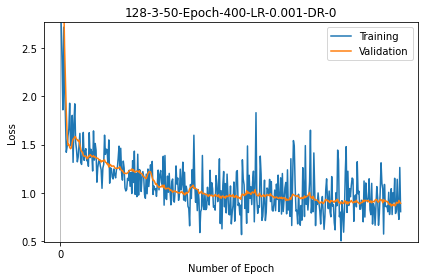

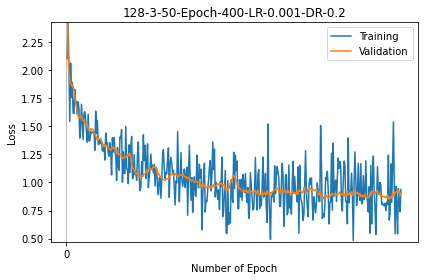

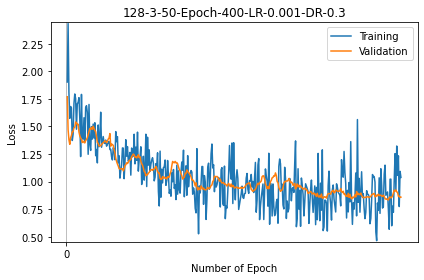

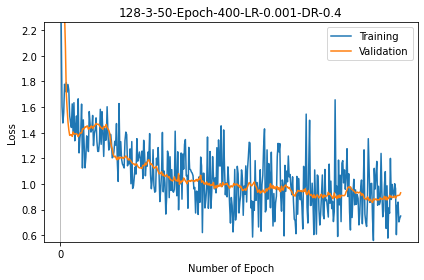

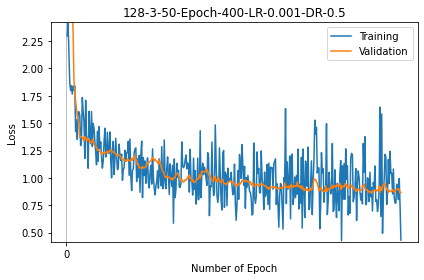

In [3]:
#>> 128-3-50, Epoch: 400, LR: 0.001, DR: 0
Train_Loss= [2.7565176486968994, 2.369175434112549, 1.8598263263702393, 2.717586040496826, 2.1040003299713135, 1.791377305984497, 1.419616937637329, 1.478074312210083, 1.5890920162200928, 1.6624133586883545, 1.928057074546814, 1.5187407732009888, 1.4808285236358643, 1.8024671077728271, 1.3151319026947021, 1.7183395624160767, 1.9218876361846924, 1.5237722396850586, 1.4525343179702759, 1.3204771280288696, 1.3707711696624756, 1.5014382600784302, 1.6152667999267578, 1.316103219985962, 1.2935892343521118, 1.4348465204238892, 1.6254308223724365, 1.336059331893921, 1.421470046043396, 1.4568641185760498, 1.331479549407959, 1.355214238166809, 1.2746797800064087, 1.623138666152954, 1.3636908531188965, 1.45051908493042, 1.4155808687210083, 1.2252684831619263, 1.6409265995025635, 1.3386056423187256, 1.5109105110168457, 1.4403153657913208, 1.1093220710754395, 1.2606298923492432, 1.319442868232727, 1.3426061868667603, 1.2763293981552124, 1.2390620708465576, 1.045691728591919, 1.2560595273971558, 1.2948822975158691, 1.5971324443817139, 1.3978180885314941, 1.4517698287963867, 1.4465909004211426, 1.2894232273101807, 1.5476406812667847, 1.0990420579910278, 1.2570464611053467, 1.2486217021942139, 1.163440465927124, 1.1430867910385132, 1.2471504211425781, 1.184888243675232, 1.1543097496032715, 1.2436821460723877, 1.2540702819824219, 1.357296109199524, 1.4832733869552612, 1.2378878593444824, 1.4613869190216064, 1.2063312530517578, 1.1306358575820923, 1.3280773162841797, 1.255710244178772, 1.0497652292251587, 1.0184170007705688, 1.0331461429595947, 1.1483582258224487, 1.1269285678863525, 1.2336547374725342, 1.0671875476837158, 1.2085469961166382, 0.9917068481445312, 1.3327033519744873, 1.1058952808380127, 1.4313417673110962, 0.9822575449943542, 1.198297142982483, 0.9590741395950317, 1.3995637893676758, 0.975684642791748, 1.240128755569458, 1.2262881994247437, 1.0131198167800903, 1.1570724248886108, 1.2194006443023682, 1.1666184663772583, 0.9785270690917969, 0.9419488906860352, 1.1933338642120361, 0.9893001317977905, 1.24587881565094, 1.0644097328186035, 1.1829279661178589, 1.2890667915344238, 1.205378532409668, 1.3250033855438232, 0.9818823933601379, 1.0695159435272217, 1.0321762561798096, 1.0431616306304932, 0.96202152967453, 1.086229681968689, 1.2348066568374634, 1.0301724672317505, 1.1892712116241455, 1.2301005125045776, 1.104186773300171, 1.0822594165802002, 1.3779609203338623, 0.8710693120956421, 1.3860702514648438, 0.9408939480781555, 0.9298394918441772, 1.1725739240646362, 1.004592776298523, 1.2005295753479004, 1.014108419418335, 0.8743391036987305, 1.1149699687957764, 1.1423307657241821, 0.9173150062561035, 0.9022294282913208, 1.025771975517273, 1.2780277729034424, 1.089469313621521, 1.1522741317749023, 0.9212554693222046, 0.9871424436569214, 1.2443639039993286, 1.029252052307129, 1.0939255952835083, 1.3168799877166748, 0.9240864515304565, 1.2120318412780762, 0.9131197929382324, 1.067291021347046, 1.0140151977539062, 0.8603127598762512, 0.8365368843078613, 0.6571236848831177, 1.0855207443237305, 0.9401814341545105, 1.2401795387268066, 1.05282723903656, 1.596308708190918, 1.1054357290267944, 0.9015312194824219, 1.034430742263794, 0.8144921064376831, 1.0326049327850342, 0.9285823702812195, 0.5869045853614807, 0.8040741682052612, 0.8314894437789917, 1.3864270448684692, 0.8626477122306824, 0.8253885507583618, 0.9909995198249817, 0.8245207667350769, 0.8410377502441406, 1.0566089153289795, 0.9268099665641785, 0.8730193376541138, 1.2325444221496582, 0.975683331489563, 1.103888750076294, 1.0413134098052979, 0.8503834009170532, 0.8638545870780945, 0.8194559216499329, 1.177291989326477, 1.099352240562439, 0.9075905084609985, 1.033805251121521, 1.3514779806137085, 0.6803718209266663, 1.021099328994751, 0.6257782578468323, 1.0728203058242798, 1.2199904918670654, 0.8540830612182617, 1.0952823162078857, 0.7906624674797058, 1.1930383443832397, 0.9879575967788696, 0.7773218154907227, 0.7707023024559021, 1.0698418617248535, 0.6768553256988525, 0.7923310995101929, 0.8682432174682617, 1.1114485263824463, 0.7047752141952515, 0.8798469305038452, 1.2175827026367188, 1.2292051315307617, 0.8677259683609009, 0.8929705619812012, 0.7707865834236145, 0.8710517883300781, 0.5657010078430176, 1.341379165649414, 1.140230417251587, 1.0827739238739014, 0.837114155292511, 0.9738017320632935, 0.6827008128166199, 1.4849315881729126, 0.7951358556747437, 1.181283712387085, 0.9411052465438843, 1.0615909099578857, 0.8773391842842102, 1.1095454692840576, 1.2231132984161377, 0.6979185342788696, 1.1006126403808594, 1.8303089141845703, 0.9288037419319153, 0.7858723402023315, 0.8625994920730591, 0.8499463796615601, 1.3800244331359863, 1.1919407844543457, 0.7132056951522827, 0.7555878758430481, 0.9180892705917358, 1.130486249923706, 0.7117161750793457, 0.7950459718704224, 1.0491122007369995, 1.0309972763061523, 0.9781535863876343, 1.1382172107696533, 0.908318042755127, 1.1152942180633545, 0.8202689290046692, 0.8093565106391907, 0.8778581619262695, 1.0276527404785156, 0.8139716386795044, 1.0896713733673096, 0.9302284121513367, 1.1824275255203247, 0.8054283261299133, 0.9515334367752075, 1.1542021036148071, 0.778497576713562, 1.1995326280593872, 0.8050645589828491, 0.9218921661376953, 1.0511763095855713, 1.1066205501556396, 0.7810028791427612, 1.2373279333114624, 0.8209093809127808, 0.9204537272453308, 0.7550438642501831, 1.35267174243927, 0.6600554585456848, 1.1042182445526123, 1.5407854318618774, 1.4794503450393677, 1.0778850317001343, 0.8100441098213196, 0.8180796504020691, 0.6766518354415894, 0.9840790629386902, 0.8040006756782532, 0.663034975528717, 0.8674513697624207, 0.7153723835945129, 1.2597243785858154, 1.056143879890442, 0.7531065940856934, 1.4887256622314453, 0.8803420066833496, 0.9671169519424438, 0.8203008770942688, 0.9444875717163086, 1.1126277446746826, 1.6481930017471313, 0.7894644737243652, 0.9157961010932922, 0.8027868270874023, 1.4127302169799805, 1.022411584854126, 0.6590067744255066, 0.911992073059082, 0.8780261278152466, 0.9978528022766113, 0.8920496106147766, 0.8114668130874634, 0.6750994920730591, 0.87303626537323, 0.9605599641799927, 0.7999314069747925, 0.6205570101737976, 0.7535050511360168, 1.0323835611343384, 1.1440985202789307, 0.9302510023117065, 0.8350009918212891, 1.0173070430755615, 0.8024762272834778, 0.7502769827842712, 1.1675611734390259, 0.8614544868469238, 0.8746219873428345, 0.6900849938392639, 0.6148848533630371, 0.9996031522750854, 0.8641571998596191, 1.4422690868377686, 1.3358865976333618, 0.7507743239402771, 0.7991993427276611, 0.5010482668876648, 0.917290210723877, 0.7853736877441406, 0.5907260179519653, 0.8360109329223633, 1.2221860885620117, 1.4780652523040771, 0.7955247163772583, 1.2229360342025757, 0.867622971534729, 1.0432020425796509, 0.9580848813056946, 1.0740904808044434, 1.15217125415802, 1.1411805152893066, 0.7034405469894409, 0.9606978297233582, 0.9764572381973267, 0.8537470102310181, 1.3214211463928223, 0.9888651967048645, 1.0155415534973145, 0.8282453417778015, 0.8316053152084351, 0.9221636652946472, 0.8966168165206909, 0.6984503865242004, 1.121488332748413, 0.7477096319198608, 1.1014174222946167, 0.9495421648025513, 0.9058517217636108, 0.9448121190071106, 1.144450068473816, 0.8219747543334961, 0.7723182439804077, 1.0973671674728394, 0.6751269102096558, 0.8884841799736023, 0.8494827151298523, 0.6629201769828796, 0.868120551109314, 1.0638052225112915, 0.9493705630302429, 0.6629208326339722, 0.7824345827102661, 1.0153076648712158, 1.3102118968963623, 1.0961439609527588, 1.0389072895050049, 0.5712598562240601, 1.0860811471939087, 0.8595120310783386, 0.8555442094802856, 0.8623649477958679, 0.8020699620246887, 1.004169225692749, 0.774222731590271, 0.8912712335586548, 1.0420587062835693, 0.7738856673240662, 0.9995155334472656, 0.904253363609314, 1.149924397468567, 0.7847579717636108, 0.8193011283874512, 1.1390483379364014, 0.8269408345222473, 0.7237345576286316, 1.2619272470474243, 0.8039934039115906]
Test_Loss= [4.6363067626953125, 4.022829532623291, 3.468778610229492, 2.9833312034606934, 2.518404960632324, 2.162013530731201, 1.8378231525421143, 1.608139991760254, 1.494537115097046, 1.5036664009094238, 1.4697116613388062, 1.4565467834472656, 1.465724229812622, 1.522188663482666, 1.5551124811172485, 1.5621085166931152, 1.5823866128921509, 1.5778217315673828, 1.5543348789215088, 1.5503891706466675, 1.535053014755249, 1.5447266101837158, 1.4977343082427979, 1.447629451751709, 1.4268039464950562, 1.4221539497375488, 1.3882770538330078, 1.3787860870361328, 1.3799753189086914, 1.3791382312774658, 1.360414743423462, 1.352120280265808, 1.3776700496673584, 1.3759217262268066, 1.3952990770339966, 1.3871620893478394, 1.3743810653686523, 1.3738068342208862, 1.3856124877929688, 1.3687405586242676, 1.372032880783081, 1.3633182048797607, 1.3584431409835815, 1.3575894832611084, 1.3473460674285889, 1.3367664813995361, 1.3385145664215088, 1.3185713291168213, 1.3297703266143799, 1.326653003692627, 1.3369390964508057, 1.3398001194000244, 1.3163652420043945, 1.3132092952728271, 1.2965551614761353, 1.3040904998779297, 1.2661523818969727, 1.2880935668945312, 1.2923437356948853, 1.2750582695007324, 1.2754344940185547, 1.2780377864837646, 1.2768445014953613, 1.256883978843689, 1.252314567565918, 1.2557075023651123, 1.2525238990783691, 1.2535473108291626, 1.2616994380950928, 1.2693639993667603, 1.2456555366516113, 1.2291396856307983, 1.2302205562591553, 1.2122066020965576, 1.2022531032562256, 1.199697494506836, 1.202143907546997, 1.1986331939697266, 1.204704761505127, 1.2152669429779053, 1.2273796796798706, 1.2317551374435425, 1.2341454029083252, 1.2471182346343994, 1.2239878177642822, 1.2391246557235718, 1.2162110805511475, 1.2140566110610962, 1.2215993404388428, 1.2259407043457031, 1.2213151454925537, 1.2150087356567383, 1.2280030250549316, 1.2010302543640137, 1.200478196144104, 1.1952800750732422, 1.178061842918396, 1.1653974056243896, 1.1600227355957031, 1.1507278680801392, 1.1463027000427246, 1.1721034049987793, 1.198899745941162, 1.2162697315216064, 1.2165312767028809, 1.2178118228912354, 1.1908621788024902, 1.1566441059112549, 1.1274423599243164, 1.1280745267868042, 1.1098909378051758, 1.087587833404541, 1.0920263528823853, 1.0784988403320312, 1.0632719993591309, 1.0543673038482666, 1.0637203454971313, 1.0595630407333374, 1.0630030632019043, 1.0782029628753662, 1.0534616708755493, 1.079190731048584, 1.0438735485076904, 1.0380908250808716, 1.0462470054626465, 1.0425400733947754, 1.0483605861663818, 1.0410311222076416, 1.0242514610290527, 1.0296690464019775, 1.020556092262268, 1.0043922662734985, 1.0147056579589844, 1.0178587436676025, 1.01680326461792, 1.0080418586730957, 1.0117467641830444, 0.9988032579421997, 0.9997085928916931, 0.9970790147781372, 1.0004878044128418, 1.0072522163391113, 1.0114253759384155, 0.9903964400291443, 0.9973678588867188, 0.9785165786743164, 0.9813925623893738, 1.0035306215286255, 0.9909201860427856, 1.0021368265151978, 1.0107558965682983, 1.0405747890472412, 1.0520029067993164, 1.060056209564209, 1.0653120279312134, 1.078796148300171, 1.0449085235595703, 1.0510003566741943, 1.0427793264389038, 1.0368895530700684, 1.0337469577789307, 1.026052474975586, 0.9912214279174805, 0.995740532875061, 1.0055458545684814, 1.0158624649047852, 0.9896296262741089, 0.9914036989212036, 0.9940729141235352, 0.9844743609428406, 0.9790242910385132, 0.9831741452217102, 0.9735403060913086, 0.9610825777053833, 0.9801293015480042, 0.9703904390335083, 0.9716556072235107, 0.9757503271102905, 0.9609161019325256, 0.9647136926651001, 0.9657935500144958, 0.9813151359558105, 0.975350558757782, 0.962112545967102, 0.9654973149299622, 0.9792500734329224, 0.9490429759025574, 0.9628407955169678, 0.9415922164916992, 0.9630467295646667, 0.9667001962661743, 0.9513959288597107, 0.9568583369255066, 0.9428426623344421, 0.967999279499054, 0.958687424659729, 0.9636616706848145, 0.9675959348678589, 0.9807418584823608, 0.9591459035873413, 0.9691681861877441, 0.965106725692749, 0.9796255826950073, 0.9535204768180847, 0.9528471231460571, 0.9692548513412476, 0.9691268801689148, 0.9457077980041504, 0.9582159519195557, 0.94593346118927, 0.9482673406600952, 0.9325131773948669, 0.9718859791755676, 0.9863407015800476, 0.9805946350097656, 0.9695705771446228, 0.9864910840988159, 0.977923572063446, 1.0207518339157104, 0.9910793304443359, 1.0065672397613525, 0.9977996349334717, 0.9958658814430237, 0.9815555810928345, 0.9995574355125427, 1.0088491439819336, 0.9957629442214966, 1.0038678646087646, 1.0314605236053467, 0.9845740795135498, 0.9723436832427979, 0.9702252745628357, 0.9671711921691895, 0.9947943687438965, 0.9743726253509521, 0.9586544036865234, 0.964730978012085, 0.9683818817138672, 0.9801025986671448, 0.9604018330574036, 0.9596697092056274, 0.9770501852035522, 0.9780982732772827, 0.9714953303337097, 0.9770618081092834, 0.9667173624038696, 0.9894512891769409, 0.9705134630203247, 0.9671359062194824, 0.9565972685813904, 0.9596742391586304, 0.9444433450698853, 0.951021671295166, 0.9560693502426147, 0.9500539302825928, 0.9411308765411377, 0.9425991177558899, 0.9525787830352783, 0.942430853843689, 0.9531697630882263, 0.9363870620727539, 0.9444134831428528, 0.9483887553215027, 0.9444646835327148, 0.9194362759590149, 0.9364145398139954, 0.9233611822128296, 0.9246604442596436, 0.9264534711837769, 0.9492369890213013, 0.9291545152664185, 0.9573387503623962, 0.9819524884223938, 0.9826041460037231, 0.9729774594306946, 0.967052698135376, 0.9696568250656128, 0.9608909487724304, 0.971626341342926, 0.9587348699569702, 0.9465664029121399, 0.945368230342865, 0.9360737800598145, 0.9528599381446838, 0.9434304237365723, 0.941664457321167, 0.9667333364486694, 0.9492859244346619, 0.958833634853363, 0.9651025533676147, 0.9707667827606201, 0.9842638969421387, 1.0019786357879639, 0.9541121125221252, 0.9548872709274292, 0.9404544830322266, 0.9625633955001831, 0.9440134763717651, 0.9237972497940063, 0.925227701663971, 0.9246255159378052, 0.921746551990509, 0.9112957715988159, 0.9010789394378662, 0.8905394673347473, 0.8989238739013672, 0.9057307243347168, 0.8983690738677979, 0.8872760534286499, 0.8998327255249023, 0.9150223731994629, 0.9305548071861267, 0.9264917373657227, 0.9149675965309143, 0.9201875925064087, 0.9031997323036194, 0.8968685865402222, 0.9202502965927124, 0.9118775129318237, 0.9151910543441772, 0.9059903621673584, 0.9008396863937378, 0.9171441793441772, 0.9104747176170349, 0.928970217704773, 0.9310202598571777, 0.8990241289138794, 0.9011770486831665, 0.8845134973526001, 0.9058337211608887, 0.897302508354187, 0.8883143663406372, 0.892333447933197, 0.916617751121521, 0.9141219854354858, 0.8861819505691528, 0.9070892333984375, 0.8827688694000244, 0.901666522026062, 0.8974325656890869, 0.9072663187980652, 0.9197970032691956, 0.9047033786773682, 0.8956525325775146, 0.9033849835395813, 0.908723771572113, 0.9002445936203003, 0.9212358593940735, 0.9033169746398926, 0.8999679684638977, 0.8915454149246216, 0.8843133449554443, 0.8929697275161743, 0.9010385274887085, 0.8984256982803345, 0.9223724603652954, 0.9064669609069824, 0.9222824573516846, 0.9179474115371704, 0.9172984957695007, 0.9161079525947571, 0.9216004610061646, 0.9035239219665527, 0.9006713032722473, 0.9162993431091309, 0.8959530591964722, 0.9107692837715149, 0.9090906977653503, 0.9047627449035645, 0.9231522083282471, 0.9307230114936829, 0.9253582954406738, 0.9063280820846558, 0.902256429195404, 0.9150813817977905, 0.9296253323554993, 0.9281625747680664, 0.9184678792953491, 0.8959897756576538, 0.9290704727172852, 0.9140886068344116, 0.9129633903503418, 0.9134907722473145, 0.9053665399551392, 0.9071472883224487, 0.8860289454460144, 0.876171350479126, 0.8852540254592896, 0.86121666431427, 0.8787262439727783, 0.8672356009483337, 0.8826246857643127, 0.8659608364105225, 0.8667086362838745, 0.9002028107643127, 0.8951514959335327, 0.8916754722595215, 0.9198895692825317, 0.9044058322906494, 0.8901786208152771]
lossGraph(Train_Loss, Test_Loss, '128-3-50-Epoch-400-LR-0.001-DR-0')
#>> 128-3-50, Epoch: 400, LR: 0.001, DR: 0.2
Train_Loss= [2.1044890880584717, 2.416781187057495, 2.0536911487579346, 1.543370008468628, 2.0642476081848145, 1.7574619054794312, 1.8911828994750977, 1.6200683116912842, 1.6130077838897705, 1.8289645910263062, 1.7018827199935913, 1.7227901220321655, 1.6081459522247314, 1.718287706375122, 1.653083086013794, 1.3948001861572266, 1.483384132385254, 1.697481393814087, 1.5335196256637573, 1.3816921710968018, 1.6173301935195923, 1.630872368812561, 1.5539608001708984, 1.4484797716140747, 1.3595505952835083, 1.6093740463256836, 1.369534969329834, 1.3725700378417969, 1.4544109106063843, 1.4415948390960693, 1.4431037902832031, 1.4515376091003418, 1.4540374279022217, 1.2872931957244873, 1.635881781578064, 1.4357397556304932, 1.5528391599655151, 1.3400259017944336, 1.3385794162750244, 1.3809566497802734, 1.3473325967788696, 1.3599793910980225, 1.281131386756897, 1.2814358472824097, 1.3238952159881592, 1.1995843648910522, 1.4409081935882568, 1.3415981531143188, 1.3533540964126587, 1.2618552446365356, 1.2340619564056396, 1.3538535833358765, 1.279331922531128, 1.0667178630828857, 1.3990648984909058, 1.2722245454788208, 1.401626706123352, 1.2766339778900146, 1.2367428541183472, 1.0168383121490479, 1.312765121459961, 1.146535873413086, 1.1084920167922974, 1.4023854732513428, 1.3930224180221558, 1.4715372323989868, 1.0021823644638062, 1.2726261615753174, 1.081201434135437, 1.08026921749115, 1.4999793767929077, 1.1258583068847656, 1.1136009693145752, 0.9888315200805664, 1.335817813873291, 1.0884511470794678, 1.3284714221954346, 1.4101874828338623, 1.034222960472107, 1.0477371215820312, 1.2473723888397217, 1.0694286823272705, 1.0944653749465942, 1.0198382139205933, 1.2582290172576904, 1.3614426851272583, 1.0523970127105713, 0.92668616771698, 0.9609453082084656, 1.1848007440567017, 1.053484559059143, 1.424745798110962, 1.1964999437332153, 1.3316004276275635, 1.0360479354858398, 1.1661971807479858, 1.3438446521759033, 0.953814685344696, 1.0470173358917236, 1.1257109642028809, 1.2521333694458008, 1.1186727285385132, 1.1543810367584229, 1.0864275693893433, 1.1578540802001953, 0.9688749313354492, 1.1374253034591675, 1.1237117052078247, 0.9454516172409058, 0.891186535358429, 1.041857361793518, 1.0427886247634888, 0.8586810231208801, 1.0146678686141968, 1.24330735206604, 1.2923165559768677, 1.1288259029388428, 1.0363214015960693, 1.0890710353851318, 1.0789973735809326, 1.216127872467041, 1.3078643083572388, 0.8667894601821899, 1.1646101474761963, 1.2238601446151733, 1.168953537940979, 1.075993299484253, 1.108974814414978, 0.956924319267273, 0.7989529371261597, 1.0137404203414917, 0.9973723292350769, 1.4533811807632446, 1.0913400650024414, 0.828181266784668, 1.0261811017990112, 1.266248106956482, 1.0274114608764648, 0.9630230665206909, 1.0203534364700317, 1.1202971935272217, 0.9560831785202026, 1.0645358562469482, 1.1371572017669678, 0.7067307829856873, 1.0852410793304443, 1.3325374126434326, 1.0363659858703613, 0.8419884443283081, 1.0420937538146973, 0.732608437538147, 0.9716976881027222, 1.0494362115859985, 0.8815668821334839, 0.8769397735595703, 1.2449471950531006, 1.0345032215118408, 0.9518144726753235, 1.163197636604309, 1.0404928922653198, 1.117268681526184, 0.5784423351287842, 0.8595319986343384, 1.0555447340011597, 1.1703834533691406, 0.736266016960144, 0.8397251963615417, 0.8297079205513, 0.9380910992622375, 1.0193063020706177, 1.1336432695388794, 1.1956872940063477, 0.9256317019462585, 1.0709148645401, 1.360654592514038, 1.1150351762771606, 1.2978936433792114, 0.8713628649711609, 0.9998599290847778, 0.9300892949104309, 0.8491712808609009, 0.9330798983573914, 0.7592315077781677, 1.0071579217910767, 0.9636504054069519, 1.2259305715560913, 0.6961110830307007, 0.7493574619293213, 0.939051628112793, 1.1073076725006104, 0.550086498260498, 0.5457496643066406, 1.0165296792984009, 0.6252474188804626, 0.7296426892280579, 0.6397384405136108, 1.023543119430542, 0.8824567794799805, 0.8217185139656067, 1.2693259716033936, 0.9449893236160278, 1.2427016496658325, 1.1061118841171265, 1.1906068325042725, 0.7659080624580383, 0.7673810720443726, 1.0235823392868042, 0.8707941770553589, 1.0298610925674438, 0.8394527435302734, 1.0705201625823975, 1.0009294748306274, 0.9108608365058899, 1.0789763927459717, 0.9057844877243042, 0.8227666616439819, 0.9539653062820435, 0.6797100901603699, 0.7585581541061401, 1.08798348903656, 0.9755158424377441, 0.8678056597709656, 0.7540046572685242, 0.7653971314430237, 0.9542031288146973, 1.2213366031646729, 0.9053742289543152, 0.7540808916091919, 1.070618748664856, 1.114648461341858, 0.7661768794059753, 0.8818825483322144, 0.7907031774520874, 0.9523485898971558, 1.2258291244506836, 0.8689374923706055, 0.9114561080932617, 1.0806540250778198, 0.7810798287391663, 0.6433815956115723, 1.5207921266555786, 0.9036225080490112, 0.7129817605018616, 0.49168577790260315, 0.8838895559310913, 0.8730121850967407, 0.9073423147201538, 0.8254000544548035, 1.14927077293396, 0.8987084627151489, 1.049208164215088, 1.1409063339233398, 1.0959123373031616, 1.0435696840286255, 0.7860320806503296, 0.7896746397018433, 0.9642336964607239, 1.1695678234100342, 1.0586469173431396, 0.607735812664032, 0.8573364019393921, 1.0649564266204834, 1.0695937871932983, 0.711410403251648, 0.7320823073387146, 1.1548532247543335, 0.7716344594955444, 0.8763097524642944, 0.7178571820259094, 0.9879869222640991, 1.1875314712524414, 0.9013773202896118, 1.053157091140747, 0.9164495468139648, 0.9016110301017761, 0.8268502950668335, 1.138222098350525, 0.5470770597457886, 1.1531128883361816, 0.8593779802322388, 0.8381561040878296, 0.7887706756591797, 0.6618725657463074, 0.7249001264572144, 1.0048508644104004, 1.2835639715194702, 0.9067665338516235, 0.7910574674606323, 0.6944204568862915, 0.9630346298217773, 1.0372443199157715, 0.9801810383796692, 1.0408283472061157, 0.8191369771957397, 0.6644957065582275, 0.8719485402107239, 0.805755615234375, 0.7291467785835266, 0.8235452771186829, 0.9952184557914734, 0.9178334474563599, 0.8299514651298523, 0.8307923078536987, 1.5066288709640503, 1.1500059366226196, 0.6799981594085693, 0.7199146747589111, 0.6908085942268372, 0.7839597463607788, 1.0441524982452393, 1.0232330560684204, 1.100358247756958, 0.9504234194755554, 0.6301611661911011, 0.8202786445617676, 0.8269283175468445, 1.2595417499542236, 0.753818929195404, 1.3510334491729736, 0.8781448602676392, 0.9848380088806152, 1.0211389064788818, 0.8302523493766785, 1.0472233295440674, 1.218087911605835, 1.125633716583252, 1.187333345413208, 1.1466865539550781, 0.8045152425765991, 0.745233416557312, 1.002579927444458, 1.190922498703003, 1.1588799953460693, 0.8303095102310181, 0.8308942914009094, 0.6313132047653198, 1.3977587223052979, 0.8173060417175293, 0.9179059267044067, 0.9224473237991333, 1.0831838846206665, 0.8868644833564758, 0.4811159074306488, 0.9914107322692871, 1.273275375366211, 1.0373750925064087, 0.7937582731246948, 0.8930146098136902, 1.170925498008728, 0.8896750211715698, 0.8405821919441223, 1.168512225151062, 0.8110677599906921, 0.8194602727890015, 1.0607272386550903, 0.8468424081802368, 0.8933394551277161, 1.1919711828231812, 0.8989432454109192, 0.8318197131156921, 0.7371052503585815, 0.9623432159423828, 0.5478474497795105, 1.1510947942733765, 0.6304299235343933, 1.033342719078064, 1.2353774309158325, 0.9230579137802124, 0.7864076495170593, 0.5347029566764832, 0.8716333508491516, 1.1417133808135986, 0.9088951945304871, 0.8923800587654114, 1.00028395652771, 0.973924458026886, 0.8031219244003296, 0.8157906532287598, 0.7963632345199585, 0.7934252023696899, 0.8142322301864624, 0.748757541179657, 0.8242337107658386, 0.8025471568107605, 1.2432944774627686, 0.6642574667930603, 0.7189307808876038, 1.1662424802780151, 0.8234113454818726, 1.1147295236587524, 1.5403351783752441, 1.0316994190216064, 0.5433103442192078, 0.9650666117668152, 0.7900403738021851, 0.5416153073310852, 0.9444342851638794, 0.825040340423584, 0.7378565073013306, 0.9375888705253601]
Test_Loss= [3.061948299407959, 2.1273629665374756, 1.9906184673309326, 1.9044634103775024, 1.875040054321289, 1.8757163286209106, 1.853774070739746, 1.8622100353240967, 1.8200085163116455, 1.7606475353240967, 1.7160781621932983, 1.6600016355514526, 1.6070178747177124, 1.5935736894607544, 1.5751922130584717, 1.5807691812515259, 1.5892877578735352, 1.5811048746109009, 1.567136526107788, 1.5488801002502441, 1.5527458190917969, 1.526526927947998, 1.5267767906188965, 1.5187523365020752, 1.5236455202102661, 1.4734455347061157, 1.4637099504470825, 1.4669227600097656, 1.4814074039459229, 1.4664684534072876, 1.4754794836044312, 1.4727458953857422, 1.4432780742645264, 1.4307175874710083, 1.4164354801177979, 1.3981437683105469, 1.3754535913467407, 1.3879752159118652, 1.3867177963256836, 1.3859208822250366, 1.3940812349319458, 1.37131667137146, 1.3493964672088623, 1.3384345769882202, 1.3149592876434326, 1.3404340744018555, 1.31632661819458, 1.3190391063690186, 1.3154101371765137, 1.3075106143951416, 1.302635669708252, 1.2964320182800293, 1.2836806774139404, 1.2974073886871338, 1.3027093410491943, 1.3173211812973022, 1.3052024841308594, 1.2947537899017334, 1.2842315435409546, 1.2835125923156738, 1.2565540075302124, 1.2600914239883423, 1.2496087551116943, 1.2482657432556152, 1.253251314163208, 1.2236822843551636, 1.222790002822876, 1.2142741680145264, 1.2230491638183594, 1.2335608005523682, 1.2261019945144653, 1.2351441383361816, 1.2343776226043701, 1.2524217367172241, 1.2392699718475342, 1.258893609046936, 1.2182514667510986, 1.172784686088562, 1.128568410873413, 1.127342939376831, 1.1139047145843506, 1.0945444107055664, 1.0721800327301025, 1.0847595930099487, 1.0756186246871948, 1.061245322227478, 1.052645206451416, 1.0478676557540894, 1.0631955862045288, 1.0542984008789062, 1.062180995941162, 1.0630590915679932, 1.0773227214813232, 1.077828049659729, 1.0873647928237915, 1.1113427877426147, 1.102089524269104, 1.1008400917053223, 1.1168696880340576, 1.1270092725753784, 1.1198358535766602, 1.1135330200195312, 1.1262211799621582, 1.1444361209869385, 1.136696457862854, 1.1330020427703857, 1.1341404914855957, 1.091207504272461, 1.0736613273620605, 1.0830740928649902, 1.0693488121032715, 1.0492665767669678, 1.0517306327819824, 1.0427913665771484, 1.0294663906097412, 1.0262694358825684, 1.0197060108184814, 1.0176630020141602, 1.026237964630127, 1.0324596166610718, 1.035476565361023, 1.032423734664917, 1.056957721710205, 1.0645567178726196, 1.0659674406051636, 1.0737175941467285, 1.077404260635376, 1.0635093450546265, 1.0603896379470825, 1.0798115730285645, 1.072465419769287, 1.0713324546813965, 1.0555386543273926, 1.0492079257965088, 1.0620664358139038, 1.0703974962234497, 1.0661139488220215, 1.0631844997406006, 1.0695302486419678, 1.0731232166290283, 1.0525238513946533, 1.0501290559768677, 1.0516853332519531, 1.0326550006866455, 1.0447466373443604, 1.0425333976745605, 1.0309271812438965, 1.0166147947311401, 1.02359938621521, 1.0105749368667603, 1.0236438512802124, 1.013793706893921, 1.0030462741851807, 1.0059936046600342, 1.0161285400390625, 1.0030512809753418, 0.9988141655921936, 1.0051993131637573, 1.0061020851135254, 0.9984669089317322, 0.9591466188430786, 0.9732720851898193, 0.9778932929039001, 0.9842984080314636, 0.9622020721435547, 0.9576327204704285, 0.9524173736572266, 0.9615526795387268, 0.969508707523346, 0.965975284576416, 0.9669342637062073, 0.9461043477058411, 0.954900860786438, 0.972465991973877, 0.9612698554992676, 0.9813182353973389, 0.9596995115280151, 0.9670381546020508, 0.9717949032783508, 0.9812690019607544, 0.9888436794281006, 0.9786319136619568, 0.980095624923706, 0.9931749701499939, 0.9949101209640503, 0.971373438835144, 0.9708769917488098, 0.981391191482544, 0.9753749370574951, 0.9356703758239746, 0.9281738996505737, 0.9501286745071411, 0.9290276169776917, 0.941449761390686, 0.9569974541664124, 0.9959261417388916, 1.0145398378372192, 1.0180732011795044, 1.0527338981628418, 1.0589311122894287, 1.053256869316101, 1.0349657535552979, 1.020370602607727, 0.9875137805938721, 0.9622746109962463, 0.9596655368804932, 0.9450584053993225, 0.9451067447662354, 0.93422532081604, 0.9241196513175964, 0.92516028881073, 0.9234609603881836, 0.9157449007034302, 0.9314002394676208, 0.9205918312072754, 0.926354706287384, 0.9043194651603699, 0.9148119688034058, 0.934211254119873, 0.9227080345153809, 0.9189367294311523, 0.9126256704330444, 0.9106100797653198, 0.9171472787857056, 0.9292309880256653, 0.9135723114013672, 0.8992986679077148, 0.9183753132820129, 0.930922269821167, 0.8994470834732056, 0.892001748085022, 0.8878926634788513, 0.8917920589447021, 0.9053598046302795, 0.8919781446456909, 0.8960437774658203, 0.9114993214607239, 0.8959035873413086, 0.8914065957069397, 0.9266881942749023, 0.9031733274459839, 0.8873213529586792, 0.8789038062095642, 0.9083577394485474, 0.9022862315177917, 0.9179056882858276, 0.9196127653121948, 0.931570291519165, 0.9311579465866089, 0.9374843835830688, 0.9495655298233032, 0.951988935470581, 0.9482394456863403, 0.9185335636138916, 0.9106032848358154, 0.9257327914237976, 0.9279934167861938, 0.9316501021385193, 0.9046375751495361, 0.9244223833084106, 0.9312001466751099, 0.9294345378875732, 0.9132660627365112, 0.9122759103775024, 0.9301126003265381, 0.9078102111816406, 0.9049060344696045, 0.8965635299682617, 0.9075782299041748, 0.9220885038375854, 0.9041061401367188, 0.9103906154632568, 0.9073541164398193, 0.904940664768219, 0.8928563594818115, 0.9193738698959351, 0.8974950313568115, 0.9355846047401428, 0.9213149547576904, 0.92256760597229, 0.9155083894729614, 0.9055891633033752, 0.9183135032653809, 0.9537025690078735, 0.9445202350616455, 0.9044886231422424, 0.9051164388656616, 0.9169186353683472, 0.9395428895950317, 0.9538789987564087, 0.9513286352157593, 0.9472213387489319, 0.9287347197532654, 0.931525707244873, 0.9383484125137329, 0.9314610958099365, 0.926703691482544, 0.930212676525116, 0.9279677867889404, 0.9135061502456665, 0.8922095894813538, 0.8884161710739136, 0.9201416969299316, 0.8957163095474243, 0.8679744005203247, 0.8643996715545654, 0.8530144691467285, 0.8702712059020996, 0.8799571990966797, 0.8755931854248047, 0.8786784410476685, 0.8785306215286255, 0.8597410321235657, 0.8684648275375366, 0.8714878559112549, 0.8881720900535583, 0.8820773363113403, 0.9055960178375244, 0.8875494003295898, 0.8954720497131348, 0.8911619186401367, 0.8811267018318176, 0.8948444128036499, 0.8997642993927002, 0.8974194526672363, 0.9054224491119385, 0.91562420129776, 0.8974348306655884, 0.8893147110939026, 0.8903937339782715, 0.9015910625457764, 0.8990859389305115, 0.8758392930030823, 0.8957817554473877, 0.8884778618812561, 0.9227020144462585, 0.8893189430236816, 0.8931047916412354, 0.9073095917701721, 0.9153650999069214, 0.9047980904579163, 0.8837674856185913, 0.9208366870880127, 0.9281406402587891, 0.9197941422462463, 0.9123206734657288, 0.9034347534179688, 0.9127000570297241, 0.8939771056175232, 0.8890243768692017, 0.902588963508606, 0.8757242560386658, 0.8758679032325745, 0.8841432332992554, 0.8716667890548706, 0.8777916431427002, 0.8921983242034912, 0.8685687780380249, 0.8629733324050903, 0.8696364164352417, 0.867855429649353, 0.8642597794532776, 0.9074957370758057, 0.885891318321228, 0.9245263934135437, 0.917992353439331, 0.9056310653686523, 0.8992879986763, 0.8931203484535217, 0.9105851650238037, 0.9317643642425537, 0.9205865263938904, 0.9072780609130859, 0.9003236889839172, 0.8951107859611511, 0.8777947425842285, 0.8782635927200317, 0.8772968053817749, 0.8739073872566223, 0.874549150466919, 0.8650348782539368, 0.868535578250885, 0.8674431443214417, 0.8859374523162842, 0.847886323928833, 0.852878212928772, 0.8721774816513062, 0.8605281114578247, 0.8699608445167542, 0.9052512645721436, 0.8918713331222534, 0.8825551271438599, 0.9096055030822754, 0.9166536331176758, 0.9169985055923462, 0.9383713006973267, 0.9216471314430237, 0.903965950012207, 0.9045627117156982, 0.882390022277832]
lossGraph(Train_Loss, Test_Loss, '128-3-50-Epoch-400-LR-0.001-DR-0.2')
#>> 128-3-50, Epoch: 400, LR: 0.001, DR: 0.3
Train_Loss= [1.9033478498458862, 2.4343838691711426, 1.808176040649414, 1.573870062828064, 1.681200385093689, 1.6691982746124268, 1.3728309869766235, 1.4307093620300293, 1.7084153890609741, 1.7950351238250732, 1.754171371459961, 1.4754573106765747, 1.7075287103652954, 1.7182201147079468, 1.7615972757339478, 1.5697855949401855, 1.2269840240478516, 1.791221261024475, 1.3959767818450928, 1.3841444253921509, 1.5794084072113037, 1.359763741493225, 1.6713851690292358, 1.6888606548309326, 1.6257612705230713, 1.2478103637695312, 1.6999645233154297, 1.3355671167373657, 1.2828501462936401, 1.499138593673706, 1.3857442140579224, 1.5222866535186768, 1.395552396774292, 1.5339019298553467, 1.234748363494873, 1.2913568019866943, 1.1698309183120728, 1.5138616561889648, 1.31658136844635, 1.407470464706421, 1.6297649145126343, 1.3115078210830688, 1.3578031063079834, 1.4086456298828125, 1.3534033298492432, 1.3455604314804077, 1.376903772354126, 1.3213396072387695, 1.339761734008789, 1.3535757064819336, 1.3634992837905884, 1.2905442714691162, 1.2922008037567139, 1.2250171899795532, 1.1965506076812744, 1.3078019618988037, 1.294857144355774, 1.198920488357544, 1.453787088394165, 1.362335443496704, 1.4081814289093018, 1.1703355312347412, 1.2342264652252197, 1.031673789024353, 1.0999557971954346, 1.1500451564788818, 1.3055890798568726, 1.3036417961120605, 1.0264625549316406, 1.1664068698883057, 1.3800398111343384, 1.2308411598205566, 1.3175543546676636, 1.1850025653839111, 1.2037100791931152, 1.2649494409561157, 1.0587621927261353, 1.3045986890792847, 1.2246403694152832, 1.2353092432022095, 1.4299265146255493, 1.1609196662902832, 1.312921404838562, 1.1936217546463013, 1.4486594200134277, 1.0950567722320557, 1.1960773468017578, 1.221884846687317, 1.3158257007598877, 0.9740208387374878, 1.0755369663238525, 1.2296106815338135, 1.0134141445159912, 1.1440351009368896, 1.4299004077911377, 0.9553765058517456, 1.4025769233703613, 1.1496549844741821, 1.2877492904663086, 1.0936191082000732, 1.1563512086868286, 1.1957824230194092, 1.216774821281433, 1.167256236076355, 1.0068093538284302, 1.0403831005096436, 1.1629244089126587, 1.1384930610656738, 1.2613255977630615, 0.9096506834030151, 0.7788873910903931, 1.2764532566070557, 0.8584707975387573, 1.1128610372543335, 0.9884214401245117, 1.1282470226287842, 1.1334922313690186, 1.1960408687591553, 0.9660070538520813, 1.0107589960098267, 1.1914098262786865, 1.058315396308899, 0.8932808637619019, 0.9258459806442261, 0.8674629330635071, 1.0797889232635498, 0.9987157583236694, 1.1096762418746948, 0.9383662343025208, 0.9707491993904114, 0.8367753028869629, 1.149285912513733, 0.8858687281608582, 1.098554015159607, 0.9244529008865356, 0.8952404260635376, 1.0848075151443481, 1.1779849529266357, 1.1035449504852295, 1.2852636575698853, 0.8626254796981812, 1.019028902053833, 1.1431028842926025, 0.8762258291244507, 1.2357580661773682, 0.9536056518554688, 1.058856725692749, 1.0724201202392578, 1.1002665758132935, 1.0860894918441772, 0.8859767913818359, 0.9420763850212097, 0.9066448211669922, 0.7578872442245483, 0.7162643671035767, 1.2990108728408813, 0.8439537882804871, 0.5264096260070801, 0.9607861638069153, 0.8969910740852356, 0.9841567873954773, 1.1370683908462524, 1.1363842487335205, 0.7935718297958374, 1.0546224117279053, 0.9980350732803345, 0.6568911671638489, 0.8354637026786804, 1.1300634145736694, 1.1673444509506226, 0.9317182302474976, 1.036346435546875, 1.2533377408981323, 1.3409444093704224, 1.1235986948013306, 1.1530286073684692, 0.9086554646492004, 1.037010908126831, 0.9504987597465515, 0.9702614545822144, 1.0131874084472656, 1.0369173288345337, 1.0208144187927246, 0.769956648349762, 1.1083921194076538, 1.1267402172088623, 0.7988923788070679, 0.7839038372039795, 1.1405129432678223, 0.6636260747909546, 0.7766174674034119, 0.7595658898353577, 0.9196552038192749, 1.0715479850769043, 1.3274452686309814, 1.0999681949615479, 1.0225012302398682, 1.3504455089569092, 0.8010798692703247, 1.352821707725525, 0.957354724407196, 0.8344868421554565, 1.0345733165740967, 1.1074639558792114, 1.0279111862182617, 0.7475582361221313, 0.7933737635612488, 0.8442815542221069, 0.8884002566337585, 0.9587957262992859, 0.856421172618866, 0.847527801990509, 0.8911533355712891, 0.8940529823303223, 1.0318790674209595, 1.0737539529800415, 0.93194580078125, 0.8933483362197876, 1.0084998607635498, 1.0057213306427002, 1.064933180809021, 0.9510644674301147, 1.0020745992660522, 0.9008806347846985, 1.0391403436660767, 1.1739602088928223, 0.7224737405776978, 0.8326658010482788, 1.150555968284607, 1.2090266942977905, 0.6549614667892456, 0.7749590277671814, 0.855785071849823, 0.9179112315177917, 0.9783547520637512, 0.6561264395713806, 0.9146877527236938, 1.1149646043777466, 1.0526785850524902, 1.0017949342727661, 0.7774024605751038, 1.2573391199111938, 0.613447368144989, 0.9875763058662415, 0.9542899131774902, 0.6880185008049011, 0.9786803126335144, 0.7780992388725281, 0.6913183927536011, 0.707703709602356, 0.8133150935173035, 0.839708685874939, 0.622458815574646, 1.1385834217071533, 1.204807996749878, 1.1615993976593018, 0.9282732009887695, 0.9769879579544067, 0.787980854511261, 0.7521694898605347, 1.130228877067566, 1.0276877880096436, 0.6654943823814392, 0.8235889673233032, 0.7246886491775513, 0.7568673491477966, 1.0285584926605225, 0.9688242077827454, 0.8259439468383789, 0.9356511235237122, 0.9458287954330444, 0.9021355509757996, 1.162509560585022, 1.369114637374878, 0.5910416841506958, 0.6667162179946899, 1.1167348623275757, 0.7505879998207092, 0.9204623103141785, 0.5943841338157654, 1.032505750656128, 0.9629735946655273, 0.8840006589889526, 0.6886101961135864, 0.8131160736083984, 0.9800580143928528, 0.9580475091934204, 0.9361368417739868, 0.9100359082221985, 0.6209266781806946, 0.792364239692688, 0.9298341870307922, 1.0140421390533447, 0.8522208333015442, 0.7205808758735657, 0.8420947194099426, 0.9609402418136597, 0.6095013618469238, 0.9474127888679504, 0.6541438102722168, 1.2557517290115356, 0.8103693723678589, 0.6452412605285645, 0.986153244972229, 0.7413433790206909, 1.2882245779037476, 0.5553833246231079, 0.5870884656906128, 0.8317944407463074, 0.8296821713447571, 0.80311518907547, 0.5514774322509766, 0.9664349555969238, 1.0949324369430542, 0.8710368275642395, 0.7985156178474426, 0.6510672569274902, 0.9254531860351562, 0.9692281484603882, 0.8432470560073853, 0.780573308467865, 0.7243210077285767, 0.9799059629440308, 0.949853241443634, 0.9017755389213562, 0.891289234161377, 0.8750808835029602, 0.7798132300376892, 1.1990540027618408, 1.0550258159637451, 1.039850115776062, 1.2735846042633057, 1.0827293395996094, 0.9823005795478821, 0.6698726415634155, 0.9208089113235474, 0.7247966527938843, 0.9918590784072876, 0.81602942943573, 1.3628520965576172, 0.8283834457397461, 0.6119407415390015, 0.8080182075500488, 0.7502475380897522, 0.8610942959785461, 1.0782049894332886, 0.6892409324645996, 1.562933087348938, 0.8118688464164734, 1.0293524265289307, 0.7223232984542847, 0.8996207118034363, 1.089329719543457, 0.859854519367218, 0.8916621208190918, 0.7575392723083496, 0.66376793384552, 0.7224226593971252, 0.9176824688911438, 0.8849655389785767, 0.8836891055107117, 0.8629247546195984, 0.6178264021873474, 0.6651871800422668, 0.8332990407943726, 1.0640777349472046, 1.043205976486206, 1.0462137460708618, 0.9957207441329956, 0.5432665348052979, 0.4639188349246979, 0.805395245552063, 0.7387690544128418, 1.0342423915863037, 0.7119272351264954, 1.1167819499969482, 0.9639942049980164, 0.7600952386856079, 0.7718563079833984, 1.0666015148162842, 1.1494606733322144, 0.8756536245346069, 0.8898962736129761, 0.9059799313545227, 0.7490571141242981, 0.5677475929260254, 1.0219117403030396, 1.02205228805542, 0.5992163419723511, 0.7775908708572388, 0.7214937210083008, 1.0130735635757446, 1.2538151741027832, 0.921576976776123, 1.323040246963501, 1.0564281940460205, 1.2337572574615479, 0.7734671235084534, 1.093109369277954, 1.038153886795044]
Test_Loss= [1.769852876663208, 1.4709762334823608, 1.380954623222351, 1.3380564451217651, 1.3980867862701416, 1.418239712715149, 1.4522569179534912, 1.4534095525741577, 1.4884132146835327, 1.4933445453643799, 1.540867567062378, 1.5325204133987427, 1.5173557996749878, 1.52056884765625, 1.449517011642456, 1.4156920909881592, 1.396956205368042, 1.382401466369629, 1.3545479774475098, 1.3674122095108032, 1.3551968336105347, 1.3511602878570557, 1.3727118968963623, 1.3816580772399902, 1.3980796337127686, 1.4265787601470947, 1.4537436962127686, 1.4817447662353516, 1.475311517715454, 1.491540551185608, 1.4743518829345703, 1.5019710063934326, 1.4835748672485352, 1.4642276763916016, 1.4527302980422974, 1.4075956344604492, 1.3536975383758545, 1.3466906547546387, 1.3221337795257568, 1.3253681659698486, 1.323750376701355, 1.3409349918365479, 1.342451810836792, 1.35490083694458, 1.3592878580093384, 1.3705856800079346, 1.3647152185440063, 1.3532018661499023, 1.3679810762405396, 1.3858411312103271, 1.395750641822815, 1.4357960224151611, 1.3213707208633423, 1.340844750404358, 1.3361397981643677, 1.3285022974014282, 1.2895376682281494, 1.2638084888458252, 1.2122279405593872, 1.182258129119873, 1.1593656539916992, 1.1413748264312744, 1.117790699005127, 1.1138525009155273, 1.1164730787277222, 1.1158678531646729, 1.1184331178665161, 1.097602367401123, 1.1160471439361572, 1.1466292142868042, 1.1522724628448486, 1.1705057621002197, 1.163719654083252, 1.1760653257369995, 1.191899299621582, 1.1939759254455566, 1.2031810283660889, 1.2254300117492676, 1.2382816076278687, 1.2504820823669434, 1.242427110671997, 1.2203943729400635, 1.2268146276474, 1.2144066095352173, 1.2277659177780151, 1.2439260482788086, 1.2179337739944458, 1.2260310649871826, 1.1852260828018188, 1.1623144149780273, 1.149294137954712, 1.1231322288513184, 1.0917266607284546, 1.0828839540481567, 1.0532069206237793, 1.0651659965515137, 1.0624322891235352, 1.0767652988433838, 1.0840152502059937, 1.0990307331085205, 1.1081150770187378, 1.109708547592163, 1.1010900735855103, 1.1141642332077026, 1.1121814250946045, 1.1226062774658203, 1.1382209062576294, 1.1173362731933594, 1.0921555757522583, 1.0783586502075195, 1.0794479846954346, 1.02996826171875, 1.019150972366333, 1.0224486589431763, 1.0453190803527832, 1.0315349102020264, 1.041825532913208, 1.031095266342163, 1.0330634117126465, 1.0236787796020508, 1.044702172279358, 1.0406293869018555, 1.040887475013733, 1.0712528228759766, 1.0933549404144287, 1.1423453092575073, 1.182727575302124, 1.1735656261444092, 1.1710227727890015, 1.1835527420043945, 1.1694862842559814, 1.172973394393921, 1.1620476245880127, 1.1326920986175537, 1.1081533432006836, 1.0981156826019287, 1.072421669960022, 1.0534906387329102, 1.022918462753296, 1.0353684425354004, 1.0394558906555176, 1.0738937854766846, 1.0737041234970093, 1.1062591075897217, 1.0941740274429321, 1.0808944702148438, 1.0749108791351318, 1.0579948425292969, 1.0445339679718018, 1.015108346939087, 1.0150971412658691, 1.007662057876587, 0.9896379709243774, 0.9607170224189758, 0.9892113208770752, 0.9465229511260986, 0.92472243309021, 0.9463331699371338, 0.9323902726173401, 0.9261926412582397, 0.9608837366104126, 0.9457412362098694, 0.93083256483078, 0.9422402381896973, 0.9290051460266113, 0.9250811338424683, 0.9272556304931641, 0.9309911727905273, 0.9473937153816223, 0.9344223737716675, 0.9394810199737549, 0.9462885856628418, 0.9651343822479248, 0.9692652225494385, 1.0008070468902588, 1.0113989114761353, 1.0494561195373535, 1.0459856986999512, 1.0423123836517334, 1.0474764108657837, 1.0389344692230225, 1.0227454900741577, 1.0038306713104248, 1.0229454040527344, 0.998180091381073, 0.9866572022438049, 0.989822506904602, 0.9916830658912659, 0.9768836498260498, 0.9772361516952515, 0.9715964794158936, 0.9597650170326233, 0.9696617722511292, 0.9838294386863708, 0.966535747051239, 0.9554035663604736, 0.9785010814666748, 0.9517049789428711, 0.9664318561553955, 0.9572672843933105, 0.9407856464385986, 0.9464259147644043, 0.9501277208328247, 0.9497348070144653, 0.9376582503318787, 0.9441361427307129, 0.938591480255127, 0.9416857957839966, 0.9497693777084351, 0.9375114440917969, 0.9465323686599731, 0.9437004327774048, 0.948096752166748, 0.9618301391601562, 0.9732198715209961, 0.9775180816650391, 0.9814562797546387, 0.9871823787689209, 0.9877252578735352, 0.9634621143341064, 0.9296474456787109, 0.9214422702789307, 0.9107372760772705, 0.919585108757019, 0.9241834878921509, 0.9295232892036438, 0.9471877813339233, 0.9724658727645874, 0.9855124354362488, 0.9735419750213623, 0.9904404878616333, 0.9963824152946472, 1.0061359405517578, 1.044935703277588, 1.0525181293487549, 1.0519592761993408, 1.0221580266952515, 0.9789680242538452, 0.961653470993042, 0.9363911747932434, 0.9541343450546265, 0.9351050853729248, 0.9725177884101868, 0.9990368485450745, 1.0120887756347656, 1.034505009651184, 1.0379270315170288, 1.0530407428741455, 1.0503461360931396, 1.078959345817566, 1.0552644729614258, 0.9998449087142944, 0.9912676811218262, 0.9448581337928772, 0.9296360611915588, 0.9114526510238647, 0.9188357591629028, 0.9240137338638306, 0.9477974772453308, 0.9866445064544678, 1.0009384155273438, 0.9996424317359924, 1.0068116188049316, 1.0049024820327759, 1.0087814331054688, 1.0277371406555176, 1.0149383544921875, 0.9891360998153687, 0.9969292879104614, 0.988094687461853, 0.967387318611145, 0.9694600105285645, 0.9835320711135864, 0.9349837899208069, 0.9466593265533447, 0.9780495166778564, 0.9536882042884827, 0.967535138130188, 0.9496184587478638, 0.9619725942611694, 0.9466941356658936, 0.9429563283920288, 0.9306773543357849, 0.9371728897094727, 0.9416675567626953, 0.9273595809936523, 0.9296481609344482, 0.9173466563224792, 0.8926171660423279, 0.8969030380249023, 0.9039193391799927, 0.9108458757400513, 0.9028293490409851, 0.8882975578308105, 0.8904603719711304, 0.8970173597335815, 0.8812234401702881, 0.8866264820098877, 0.8649010062217712, 0.8937970399856567, 0.8693040609359741, 0.8583651781082153, 0.8727836608886719, 0.8587396740913391, 0.8873584270477295, 0.8505119681358337, 0.8500280380249023, 0.8621235489845276, 0.8619790077209473, 0.8595472574234009, 0.8501555919647217, 0.8784393072128296, 0.890978217124939, 0.8912092447280884, 0.8913042545318604, 0.8849756717681885, 0.9098117351531982, 0.9112417697906494, 0.9219200611114502, 0.8979637622833252, 0.9035005569458008, 0.9231512546539307, 0.9200374484062195, 0.9129177927970886, 0.9119762778282166, 0.9140946865081787, 0.9158488512039185, 0.9365249872207642, 0.9089982509613037, 0.9005690813064575, 0.9123654365539551, 0.8862420320510864, 0.887603759765625, 0.8674375414848328, 0.8747588396072388, 0.8642679452896118, 0.8939399123191833, 0.8571425676345825, 0.8848145604133606, 0.8546966314315796, 0.84293133020401, 0.8591939210891724, 0.8533577919006348, 0.8616435527801514, 0.8790946006774902, 0.8608683347702026, 0.9097692370414734, 0.8817809820175171, 0.893634021282196, 0.8814494609832764, 0.8834104537963867, 0.8959276676177979, 0.874301552772522, 0.8647794127464294, 0.8535962104797363, 0.8547530174255371, 0.857933521270752, 0.8568274974822998, 0.8609926700592041, 0.8615476489067078, 0.8626395463943481, 0.8557083010673523, 0.8603123426437378, 0.8662037253379822, 0.8809999227523804, 0.8849437832832336, 0.8908295631408691, 0.8916052579879761, 0.8636718988418579, 0.8639271259307861, 0.877885639667511, 0.8708657026290894, 0.8859280943870544, 0.8722584843635559, 0.8763483762741089, 0.8771243095397949, 0.8679059147834778, 0.8660037517547607, 0.8763772249221802, 0.8660489320755005, 0.8452647924423218, 0.8408483266830444, 0.8439053297042847, 0.8359189033508301, 0.8339442014694214, 0.8561726808547974, 0.8613598346710205, 0.8520182967185974, 0.8575748205184937, 0.871634840965271, 0.8986046314239502, 0.9213733673095703, 0.9143933057785034, 0.924462616443634, 0.9060814380645752, 0.9023351073265076, 0.8658527135848999, 0.8694195747375488, 0.8565977811813354, 0.8586387038230896]
lossGraph(Train_Loss, Test_Loss, '128-3-50-Epoch-400-LR-0.001-DR-0.3')
#>> 128-3-50, Epoch: 400, LR: 0.001, DR: 0.4
Train_Loss= [2.2508087158203125, 1.6043866872787476, 1.4760215282440186, 1.556891679763794, 1.7782580852508545, 1.720777153968811, 1.7909252643585205, 1.7172515392303467, 1.7761638164520264, 1.7301079034805298, 1.532752275466919, 1.4802392721176147, 1.4411574602127075, 1.6252425909042358, 1.389305830001831, 1.6343806982040405, 1.337202787399292, 1.445465326309204, 1.5310676097869873, 1.3902158737182617, 1.6645886898040771, 1.2427741289138794, 1.3583552837371826, 1.4102116823196411, 1.6234029531478882, 1.1251423358917236, 1.5004078149795532, 1.3235054016113281, 1.1264607906341553, 1.2080917358398438, 1.3757569789886475, 1.3297536373138428, 1.2535409927368164, 1.565319538116455, 1.4663397073745728, 1.4052234888076782, 1.4251621961593628, 1.5349711179733276, 1.2999169826507568, 1.3942404985427856, 1.424678087234497, 1.516107201576233, 1.3334994316101074, 1.254744291305542, 1.25453519821167, 1.333534598350525, 1.5828449726104736, 1.3099000453948975, 1.5639973878860474, 1.4063862562179565, 1.2153894901275635, 1.4355885982513428, 1.3408344984054565, 1.3442749977111816, 1.6029987335205078, 1.3945324420928955, 1.2651129961013794, 1.2823944091796875, 1.3882087469100952, 1.3377840518951416, 1.204372763633728, 1.2117464542388916, 1.252465844154358, 1.3332104682922363, 1.3037279844284058, 1.471771478652954, 1.1704462766647339, 1.0203301906585693, 1.627763032913208, 1.2185287475585938, 1.330574631690979, 1.1942766904830933, 1.1557486057281494, 1.1432443857192993, 1.1250669956207275, 1.3394176959991455, 1.4049886465072632, 1.38563871383667, 1.142077922821045, 1.1852037906646729, 1.1576762199401855, 1.2741737365722656, 1.0022192001342773, 1.3311837911605835, 0.9654003381729126, 0.9845300912857056, 1.0556151866912842, 1.1329838037490845, 1.0775572061538696, 1.3538177013397217, 1.1784100532531738, 1.205031156539917, 1.2498445510864258, 1.1997730731964111, 1.1354806423187256, 1.2569377422332764, 1.0426658391952515, 1.3411734104156494, 1.239076018333435, 1.0643675327301025, 1.1692602634429932, 1.1386821269989014, 1.2493114471435547, 1.191016674041748, 1.3934693336486816, 1.0761704444885254, 0.963411808013916, 1.0326555967330933, 1.2678545713424683, 0.9886496663093567, 0.9362341165542603, 0.9430017471313477, 1.2012372016906738, 1.1480448246002197, 1.2844340801239014, 1.088242530822754, 0.8630312085151672, 0.9588770866394043, 1.0877459049224854, 1.4025070667266846, 0.9392856359481812, 1.1010855436325073, 1.007604718208313, 0.7655290961265564, 0.8989050984382629, 1.2566403150558472, 1.2247745990753174, 0.8937961459159851, 1.212958574295044, 0.9501649141311646, 1.112176775932312, 0.9481789469718933, 0.9361950755119324, 0.9568842649459839, 1.412392497062683, 1.0225032567977905, 0.9082291722297668, 1.2512961626052856, 0.7990542650222778, 1.0636156797409058, 1.0016686916351318, 1.2422291040420532, 0.8818944096565247, 1.2344493865966797, 1.1165498495101929, 1.3099730014801025, 1.3470025062561035, 1.0646687746047974, 1.0685909986495972, 0.8110955357551575, 1.2860006093978882, 1.1174647808074951, 1.112450122833252, 1.0946755409240723, 1.0854285955429077, 1.0642534494400024, 0.9623345136642456, 0.9734900593757629, 0.7739985585212708, 0.9445686340332031, 0.9412754774093628, 0.762805700302124, 1.0553163290023804, 0.8572627902030945, 1.2105391025543213, 1.1416045427322388, 0.6210469007492065, 1.0847612619400024, 1.0823147296905518, 0.8130672574043274, 0.8741995096206665, 0.9705691337585449, 1.3667572736740112, 0.810745358467102, 0.9387062191963196, 1.253986120223999, 0.8110977411270142, 0.9413434267044067, 1.2140800952911377, 1.056215763092041, 0.9620094299316406, 1.048087477684021, 0.9307841062545776, 1.2836861610412598, 0.9800823926925659, 1.3440148830413818, 1.1423457860946655, 1.1408272981643677, 1.4537875652313232, 0.9800620079040527, 0.9965030550956726, 1.4220482110977173, 1.1272467374801636, 0.9159646034240723, 1.007542610168457, 0.8999446034431458, 1.133852243423462, 1.0099736452102661, 0.8338264226913452, 0.6955824494361877, 0.8948968648910522, 0.8305241465568542, 0.6259011626243591, 0.7594870328903198, 1.1142351627349854, 0.7190801501274109, 0.7818474769592285, 1.13814115524292, 1.0800912380218506, 0.7740486264228821, 0.8588660955429077, 0.9129403829574585, 1.1101593971252441, 1.046474575996399, 0.7559607028961182, 0.9838880300521851, 0.9192591905593872, 1.1415858268737793, 0.8598213195800781, 1.1144518852233887, 1.2101638317108154, 1.3255795240402222, 1.3196252584457397, 0.8134528994560242, 0.8686763644218445, 0.5864761471748352, 0.8603866696357727, 0.7945133447647095, 1.1827037334442139, 0.872522234916687, 1.012197494506836, 0.9682995676994324, 0.6647703051567078, 0.9887990951538086, 1.1113600730895996, 0.631895899772644, 0.9944393038749695, 1.0673372745513916, 1.296827793121338, 1.430213451385498, 0.7824504971504211, 0.8002657890319824, 1.266570806503296, 0.8819297552108765, 1.1597239971160889, 1.0762566328048706, 0.814864456653595, 1.2483110427856445, 0.9293309450149536, 0.6722429394721985, 0.9261031150817871, 0.7058420181274414, 0.8532130122184753, 0.9049498438835144, 1.2139503955841064, 1.317190170288086, 1.2504632472991943, 1.315326452255249, 0.9091485738754272, 0.7885016798973083, 1.0316667556762695, 0.9887905120849609, 0.5950272679328918, 1.145729660987854, 0.9433761835098267, 1.100684404373169, 1.0174751281738281, 1.218721628189087, 1.0559937953948975, 1.0743701457977295, 0.983832061290741, 0.9173938632011414, 1.056342363357544, 0.8692545890808105, 0.7258493900299072, 0.7145258188247681, 0.6121577024459839, 1.0593899488449097, 0.7641536593437195, 1.0433669090270996, 0.9220239520072937, 0.8777371644973755, 0.9462889432907104, 0.8208186030387878, 0.6496616005897522, 1.137938141822815, 0.963269054889679, 0.982629656791687, 1.5454708337783813, 0.819929301738739, 0.6957646608352661, 1.1477980613708496, 1.4978116750717163, 0.8325584530830383, 0.8354898691177368, 1.0065855979919434, 0.8552241325378418, 0.6055587530136108, 1.1100945472717285, 0.8456511497497559, 0.6090661287307739, 1.0704538822174072, 1.0624772310256958, 0.8009470701217651, 0.6802783608436584, 0.7674385905265808, 0.9229934811592102, 1.070592999458313, 0.7582067251205444, 0.728793740272522, 1.113737940788269, 0.8696386218070984, 0.876177191734314, 0.8077699542045593, 0.742421567440033, 1.1554383039474487, 0.8506251573562622, 1.0227934122085571, 0.8080004453659058, 0.8650927543640137, 0.7071280479431152, 0.7843445539474487, 1.6571584939956665, 0.9295927882194519, 0.9837238192558289, 0.5907502770423889, 1.1867754459381104, 0.8370734453201294, 1.0687631368637085, 0.7065536975860596, 1.1629607677459717, 1.1824288368225098, 1.0088882446289062, 1.110060453414917, 0.9591354131698608, 1.0627422332763672, 1.2755467891693115, 0.9029132127761841, 1.0804439783096313, 0.7800370454788208, 0.6414186954498291, 0.9677761793136597, 0.738782525062561, 0.9290364384651184, 1.036998987197876, 0.8375387191772461, 0.9543987512588501, 0.841415286064148, 0.9164208173751831, 0.887704074382782, 0.6810411214828491, 0.7709212899208069, 0.959070086479187, 1.031124472618103, 0.6902660131454468, 0.9402927160263062, 1.2666568756103516, 0.7645010948181152, 0.7023917436599731, 0.6691049933433533, 0.8622602224349976, 1.353824496269226, 1.1050846576690674, 0.8566460609436035, 1.0014187097549438, 1.005353331565857, 0.7285602688789368, 0.5593500137329102, 1.122382640838623, 0.9609042406082153, 1.0598047971725464, 1.1766711473464966, 0.8346498608589172, 0.9826700091362, 0.8397436141967773, 0.8611384630203247, 1.238921880722046, 0.9328407049179077, 0.74461430311203, 0.7904032468795776, 0.9947364926338196, 1.0970733165740967, 0.6536733508110046, 0.9863840937614441, 0.5782946348190308, 0.8135570287704468, 0.7720362544059753, 1.2001030445098877, 0.879438579082489, 0.996868908405304, 0.9293577075004578, 0.8977513313293457, 1.0023139715194702, 0.9655992388725281, 0.6049723029136658, 0.8272018432617188, 0.8590344190597534, 0.7045277953147888, 0.7331551313400269, 0.7501503825187683]
Test_Loss= [8.190118789672852, 5.020376682281494, 3.613365650177002, 2.8296728134155273, 2.318237781524658, 2.0680794715881348, 1.7107611894607544, 1.5863003730773926, 1.484783411026001, 1.4213478565216064, 1.3796002864837646, 1.3836870193481445, 1.3844969272613525, 1.371778130531311, 1.4063336849212646, 1.3909780979156494, 1.3907207250595093, 1.391756296157837, 1.3908395767211914, 1.3868978023529053, 1.3695542812347412, 1.380615472793579, 1.39463472366333, 1.3996001482009888, 1.3974307775497437, 1.4268009662628174, 1.433450698852539, 1.4298300743103027, 1.4457476139068604, 1.4430235624313354, 1.4515742063522339, 1.452735424041748, 1.427081823348999, 1.4372062683105469, 1.4356107711791992, 1.4527344703674316, 1.4498882293701172, 1.4334160089492798, 1.4498001337051392, 1.448848009109497, 1.4618936777114868, 1.4725966453552246, 1.4663400650024414, 1.4667338132858276, 1.4657890796661377, 1.4556422233581543, 1.4476382732391357, 1.4386012554168701, 1.4347374439239502, 1.4270739555358887, 1.4501841068267822, 1.441851019859314, 1.4469475746154785, 1.4648478031158447, 1.4401872158050537, 1.430001139640808, 1.418493628501892, 1.396484136581421, 1.3416097164154053, 1.2951722145080566, 1.27556312084198, 1.2339928150177002, 1.2175782918930054, 1.2118500471115112, 1.2172775268554688, 1.1926685571670532, 1.1895556449890137, 1.2099499702453613, 1.1955825090408325, 1.2080293893814087, 1.2054624557495117, 1.204179286956787, 1.208972692489624, 1.1991829872131348, 1.2066197395324707, 1.209073543548584, 1.2186295986175537, 1.2108392715454102, 1.1966233253479004, 1.1873925924301147, 1.1976094245910645, 1.186816930770874, 1.1791926622390747, 1.1679797172546387, 1.1610052585601807, 1.1564586162567139, 1.156410574913025, 1.145774006843567, 1.1576749086380005, 1.1532639265060425, 1.1394851207733154, 1.1295132637023926, 1.125935435295105, 1.1264452934265137, 1.1249622106552124, 1.1220061779022217, 1.144653081893921, 1.1467983722686768, 1.1420012712478638, 1.1639258861541748, 1.1504137516021729, 1.166898250579834, 1.1841462850570679, 1.1903311014175415, 1.1737205982208252, 1.1520791053771973, 1.1578818559646606, 1.1488207578659058, 1.1371876001358032, 1.1233117580413818, 1.1259994506835938, 1.1333123445510864, 1.1369006633758545, 1.114800214767456, 1.0995798110961914, 1.08036208152771, 1.081641674041748, 1.081996202468872, 1.0957940816879272, 1.0669052600860596, 1.0781497955322266, 1.065605640411377, 1.0595669746398926, 1.0649080276489258, 1.0731086730957031, 1.0591249465942383, 1.0507899522781372, 1.0576869249343872, 1.0380899906158447, 1.0322039127349854, 1.0286931991577148, 1.023366928100586, 1.0325665473937988, 1.0561213493347168, 1.0340182781219482, 1.0246789455413818, 1.0290303230285645, 1.0220979452133179, 1.0812430381774902, 0.9983195662498474, 1.0221409797668457, 1.0110242366790771, 1.0253515243530273, 1.0229418277740479, 1.047200083732605, 1.036958932876587, 1.0243422985076904, 1.0153281688690186, 1.002356767654419, 1.0263628959655762, 1.0213308334350586, 1.026972770690918, 1.0202734470367432, 1.0302895307540894, 1.0248908996582031, 1.0252944231033325, 1.023924469947815, 1.019465446472168, 1.0305125713348389, 1.0355305671691895, 1.0216926336288452, 1.0380613803863525, 1.0332049131393433, 1.0495126247406006, 1.06825852394104, 1.0137590169906616, 1.0243165493011475, 1.0187342166900635, 0.9997977018356323, 1.0073349475860596, 0.9985571503639221, 1.0158261060714722, 0.9957883358001709, 0.9940297603607178, 1.005396842956543, 0.9890768527984619, 0.9887710809707642, 0.995926022529602, 0.9895620942115784, 1.012397289276123, 0.9671468138694763, 0.9703404903411865, 0.9875751733779907, 0.9702744483947754, 0.990903377532959, 0.9818344712257385, 0.9839282035827637, 1.0036358833312988, 0.9806003570556641, 0.9815806746482849, 1.0110620260238647, 0.994728147983551, 0.994695782661438, 1.0016794204711914, 0.9976077079772949, 1.0053292512893677, 0.988874077796936, 0.9807471632957458, 0.9670472145080566, 0.9834854602813721, 0.9858263731002808, 0.9764541983604431, 0.9865221977233887, 1.0042715072631836, 0.9915177822113037, 0.995858371257782, 1.0007668733596802, 0.9980653524398804, 0.985289454460144, 0.991063117980957, 0.972353994846344, 0.9837884902954102, 0.9710196256637573, 0.950115442276001, 0.9505174160003662, 0.9561828374862671, 0.9624320864677429, 0.9498791694641113, 0.9637327194213867, 0.977851927280426, 0.9963635802268982, 1.0115514993667603, 1.0045841932296753, 0.9879282116889954, 0.9859049320220947, 0.9964122772216797, 1.0042805671691895, 1.0165495872497559, 0.9881271123886108, 0.9825594425201416, 0.9641811847686768, 0.9354201555252075, 0.9498913884162903, 0.9534622430801392, 0.9282774925231934, 0.9419294595718384, 0.9378960132598877, 0.9538424015045166, 0.9437054395675659, 0.9322013258934021, 0.9349470138549805, 0.9629616141319275, 0.9456993937492371, 0.9619698524475098, 0.9704912304878235, 0.9604482650756836, 1.0019282102584839, 0.9804776906967163, 0.9670131802558899, 0.988659143447876, 0.9659085273742676, 0.97716224193573, 0.9600441455841064, 0.9802582263946533, 0.9792497158050537, 0.9560894966125488, 0.9722394943237305, 0.9444655776023865, 0.9409626126289368, 0.9832671880722046, 0.9553576707839966, 0.9520554542541504, 0.9790043234825134, 0.9860649108886719, 0.9926929473876953, 0.9766452312469482, 0.9792654514312744, 0.9674991369247437, 0.9736047387123108, 0.960038959980011, 0.9498909711837769, 0.9428225159645081, 0.9241350889205933, 0.9107387065887451, 0.9134935736656189, 0.9052122235298157, 0.9314944744110107, 0.9329908490180969, 0.9505438208580017, 0.9450065493583679, 0.9471480250358582, 0.9429047703742981, 0.9489938020706177, 0.9409454464912415, 0.9404493570327759, 0.9553234577178955, 0.9420561790466309, 0.9633122682571411, 0.9229303598403931, 0.9174048900604248, 0.9350165128707886, 0.949561595916748, 0.9180055856704712, 0.9121164083480835, 0.9190279841423035, 0.9047396183013916, 0.8934166431427002, 0.9177871942520142, 0.8967758417129517, 0.8920205235481262, 0.9122685194015503, 0.9157360792160034, 0.905741810798645, 0.893081784248352, 0.8952780961990356, 0.9152218103408813, 0.9202582240104675, 0.9017766714096069, 0.8929430246353149, 0.915424108505249, 0.9008702635765076, 0.9068068265914917, 0.905968189239502, 0.9101198315620422, 0.9358528256416321, 0.9187168478965759, 0.9260537624359131, 0.9091353416442871, 0.9057928323745728, 0.8873189687728882, 0.890978991985321, 0.9310709238052368, 0.8974318504333496, 0.9005670547485352, 0.8863204121589661, 0.9078165292739868, 0.8936693668365479, 0.9139214754104614, 0.8932924270629883, 0.9124616384506226, 0.9093897342681885, 0.910825252532959, 0.9093025326728821, 0.909575343132019, 0.9192899465560913, 0.9409612417221069, 0.9532825946807861, 0.9727296829223633, 0.977562665939331, 0.9710769653320312, 0.9788365960121155, 0.9627457857131958, 0.955390453338623, 0.9530011415481567, 0.9447376728057861, 0.9394075870513916, 0.9288648366928101, 0.9339524507522583, 0.9371973276138306, 0.9308451414108276, 0.9341508746147156, 0.9369757175445557, 0.9311014413833618, 0.9106366634368896, 0.9240411520004272, 0.917314887046814, 0.891686201095581, 0.8849302530288696, 0.8850135803222656, 0.8782013654708862, 0.9000648856163025, 0.8902961015701294, 0.8700636625289917, 0.881023645401001, 0.8703391551971436, 0.8635305166244507, 0.8553646802902222, 0.8844573497772217, 0.8762930631637573, 0.8786303400993347, 0.8851516246795654, 0.8749229311943054, 0.877914547920227, 0.8764101266860962, 0.8769217729568481, 0.8913339376449585, 0.8857461810112, 0.8806370496749878, 0.8813681602478027, 0.8923238515853882, 0.9032710194587708, 0.8785914778709412, 0.9003318548202515, 0.8754066824913025, 0.8916509747505188, 0.8861891031265259, 0.911590576171875, 0.8974917531013489, 0.9050403237342834, 0.8940061330795288, 0.8960874080657959, 0.9018759727478027, 0.9079524874687195, 0.890214204788208, 0.9028517007827759, 0.91051185131073, 0.9103190898895264, 0.9119839668273926, 0.9151158332824707, 0.9314066171646118]
lossGraph(Train_Loss, Test_Loss, '128-3-50-Epoch-400-LR-0.001-DR-0.4')
#>> 128-3-50, Epoch: 400, LR: 0.001, DR: 0.5
Train_Loss= [2.298276424407959, 2.4112772941589355, 2.125056028366089, 1.8677695989608765, 1.7985292673110962, 1.8413766622543335, 1.766491174697876, 1.8405647277832031, 1.8020856380462646, 1.8383071422576904, 1.4223688840866089, 1.5299835205078125, 1.351395606994629, 1.6016082763671875, 1.6045475006103516, 1.5683833360671997, 1.2950997352600098, 1.3433747291564941, 1.7350025177001953, 1.6079050302505493, 1.510070562362671, 1.177638292312622, 1.709388017654419, 1.3887211084365845, 1.3502495288848877, 1.0882924795150757, 1.6075694561004639, 1.4008499383926392, 1.313183069229126, 1.6064059734344482, 1.2869248390197754, 1.498537302017212, 1.4517977237701416, 1.3332011699676514, 1.2405657768249512, 1.1197984218597412, 1.4253323078155518, 1.15105402469635, 1.468214511871338, 1.270378589630127, 1.3285953998565674, 1.191115140914917, 1.0888749361038208, 1.1549413204193115, 1.3301918506622314, 1.4544317722320557, 1.1904385089874268, 1.2383811473846436, 1.4161949157714844, 1.2250831127166748, 1.226346731185913, 1.419959545135498, 1.1630843877792358, 1.000306487083435, 1.2540175914764404, 1.3345048427581787, 1.0305030345916748, 1.1764849424362183, 1.361758828163147, 1.1938422918319702, 1.0751421451568604, 1.0902767181396484, 1.3080875873565674, 1.2043296098709106, 1.1596753597259521, 1.2174328565597534, 0.9774700403213501, 1.0802381038665771, 1.092066764831543, 1.252173662185669, 1.1522548198699951, 1.2282081842422485, 1.233141541481018, 1.335322618484497, 1.0226824283599854, 1.3557392358779907, 1.0237157344818115, 0.8842779994010925, 1.0680646896362305, 1.082436203956604, 1.2315534353256226, 1.2636315822601318, 1.2740775346755981, 0.9664725065231323, 1.1735762357711792, 1.0053865909576416, 1.205622911453247, 0.8685413599014282, 1.2050549983978271, 1.3361165523529053, 0.8197588920593262, 1.1849112510681152, 1.021518349647522, 1.1548984050750732, 0.950783908367157, 1.0582078695297241, 1.1830613613128662, 0.9579203724861145, 0.9085336923599243, 1.048758864402771, 1.1155670881271362, 0.94318026304245, 1.2649914026260376, 1.0076218843460083, 0.9074001312255859, 0.84412682056427, 0.9267984628677368, 0.9641030430793762, 1.0640814304351807, 0.9056442975997925, 1.1735814809799194, 1.0414559841156006, 0.9277693033218384, 1.285261869430542, 0.9016650319099426, 0.9060699343681335, 1.34676992893219, 0.9783150553703308, 0.9014245271682739, 1.084812879562378, 1.1917701959609985, 1.0180531740188599, 0.8482184410095215, 1.1281002759933472, 1.0066040754318237, 0.9230519533157349, 1.1137944459915161, 0.5851556062698364, 1.1730704307556152, 0.8199005126953125, 0.9005478024482727, 1.1338058710098267, 1.006155252456665, 1.0703094005584717, 0.9147510528564453, 0.9132977724075317, 0.9514764547348022, 1.329097867012024, 1.11116623878479, 1.0929315090179443, 1.108925223350525, 1.165836215019226, 1.2095774412155151, 1.0824534893035889, 1.1365467309951782, 1.1210918426513672, 0.8700600862503052, 1.2608580589294434, 0.9760592579841614, 0.9639785885810852, 0.8427605628967285, 1.1813358068466187, 0.892624020576477, 1.067346453666687, 0.7603204250335693, 0.8362340927124023, 1.1801259517669678, 0.7998157143592834, 0.8971565365791321, 1.4312080144882202, 0.8192254304885864, 1.0524855852127075, 1.1347215175628662, 1.0292985439300537, 1.0974200963974, 1.0667225122451782, 0.9923984408378601, 0.9316560626029968, 1.2303590774536133, 1.1861597299575806, 0.6545480489730835, 0.9248902201652527, 0.9167250394821167, 1.3274286985397339, 0.9725608825683594, 0.8392192721366882, 0.8754810094833374, 1.4840612411499023, 1.1623718738555908, 0.8431927561759949, 0.7751949429512024, 0.8503552675247192, 1.273658037185669, 1.045161485671997, 0.791174590587616, 0.7056695818901062, 1.2256596088409424, 1.2496604919433594, 0.7308431267738342, 1.05220627784729, 1.025383710861206, 0.7458573579788208, 1.0888358354568481, 0.9687809944152832, 0.9899490475654602, 0.9682267904281616, 1.0504610538482666, 0.9289227724075317, 0.8455188870429993, 0.8569796681404114, 1.1260826587677002, 0.7699949741363525, 0.6128304600715637, 0.7663465142250061, 1.0675119161605835, 0.8041097521781921, 1.2143871784210205, 1.1128931045532227, 0.9939574003219604, 1.3037227392196655, 1.1030935049057007, 0.9316490292549133, 1.1062225103378296, 0.7231048941612244, 1.0025051832199097, 0.914117693901062, 1.0223240852355957, 0.9523552060127258, 0.87666255235672, 0.8667330741882324, 0.8082601428031921, 0.6608412265777588, 0.6733869314193726, 1.3189303874969482, 0.8261715769767761, 0.7663567066192627, 0.8265610933303833, 1.2373861074447632, 1.0423778295516968, 1.0869700908660889, 0.863724410533905, 0.8637146949768066, 1.2464330196380615, 0.9909542798995972, 0.9321543574333191, 0.7119503617286682, 1.0529510974884033, 0.8305642008781433, 0.8661306500434875, 1.122424840927124, 0.7567567825317383, 1.1349035501480103, 0.7132793664932251, 1.098569631576538, 1.0911840200424194, 1.093726634979248, 0.8964242935180664, 1.1280356645584106, 1.1524558067321777, 1.1739367246627808, 0.7569217085838318, 0.9451896548271179, 0.7485653162002563, 0.549423336982727, 0.8401069641113281, 0.9488486051559448, 0.9375196695327759, 0.7349380254745483, 0.5315796136856079, 1.0015696287155151, 0.9452289342880249, 1.6331043243408203, 0.7643052935600281, 1.146203637123108, 0.8988875150680542, 0.9334424138069153, 1.1988708972930908, 0.6256178617477417, 1.2059454917907715, 1.2173963785171509, 0.7577356696128845, 0.824989914894104, 1.0070160627365112, 0.8191521763801575, 1.0222901105880737, 0.8515154123306274, 1.263940691947937, 0.7150679230690002, 0.940193772315979, 0.7696861624717712, 1.1882340908050537, 0.5414489507675171, 1.2643383741378784, 0.915500283241272, 0.6364631652832031, 1.1532472372055054, 1.0823583602905273, 0.9213947057723999, 1.2815337181091309, 0.710568368434906, 0.7307940721511841, 0.930590033531189, 1.1555519104003906, 0.6642824411392212, 0.9591043591499329, 1.1673537492752075, 1.5280382633209229, 1.4011342525482178, 1.4631526470184326, 1.0443602800369263, 1.0923348665237427, 1.0904290676116943, 0.5351830124855042, 0.7340786457061768, 1.2306413650512695, 1.0475338697433472, 1.083695650100708, 0.7775784730911255, 0.9095008969306946, 0.8884846568107605, 1.4951906204223633, 0.664724588394165, 0.7884489893913269, 1.0504392385482788, 0.940287709236145, 0.8528369069099426, 0.8906896710395813, 1.3146753311157227, 0.6928795576095581, 0.7077422142028809, 1.0736585855484009, 0.8177839517593384, 0.6380223035812378, 0.9515918493270874, 0.8156647682189941, 0.6990870237350464, 1.0321422815322876, 1.1575325727462769, 0.4257672429084778, 1.1101109981536865, 0.8051291704177856, 1.1305464506149292, 0.804488480091095, 1.2652369737625122, 0.987744152545929, 1.1102492809295654, 0.6609567403793335, 0.8253787159919739, 0.6761911511421204, 1.18337082862854, 1.2243036031723022, 1.206591248512268, 0.7821558117866516, 0.8219829797744751, 0.9001603126525879, 1.0861995220184326, 0.6097732782363892, 0.9506133198738098, 1.0634281635284424, 1.0021010637283325, 0.8745511770248413, 0.7972507476806641, 0.8572203516960144, 0.7628212571144104, 1.3144841194152832, 1.052704095840454, 1.376631736755371, 0.7548529505729675, 0.7812913656234741, 1.000089406967163, 0.9933827519416809, 0.7833899259567261, 1.0525219440460205, 0.826879620552063, 0.9117448925971985, 0.6968690156936646, 0.958778977394104, 0.8993741273880005, 1.1089261770248413, 0.7835841774940491, 0.7995890378952026, 0.6923038363456726, 0.7498570084571838, 0.9090379476547241, 1.6463139057159424, 0.64847731590271, 1.5839439630508423, 0.4934946894645691, 0.8571041822433472, 0.9890292882919312, 1.215153694152832, 1.1891486644744873, 0.7576006054878235, 0.860274612903595, 1.168660044670105, 0.9489536285400391, 1.2436236143112183, 1.0387160778045654, 1.0425540208816528, 0.8525446057319641, 1.079878568649292, 0.8240865468978882, 0.7691388130187988, 0.7704480290412903, 0.942470908164978, 0.8946420550346375, 0.8019660115242004, 0.9949725866317749, 0.7340362071990967, 0.4310521185398102]
Test_Loss= [6.961574554443359, 5.111987113952637, 4.489912033081055, 3.8721351623535156, 3.3626885414123535, 2.877720832824707, 2.567775249481201, 2.322294235229492, 1.8991494178771973, 1.7739827632904053, 1.701901912689209, 1.6242008209228516, 1.5611077547073364, 1.5195256471633911, 1.4903624057769775, 1.3690563440322876, 1.3726305961608887, 1.3733930587768555, 1.3689210414886475, 1.3596367835998535, 1.336015224456787, 1.376089334487915, 1.3632583618164062, 1.3407506942749023, 1.3432477712631226, 1.363853096961975, 1.3473389148712158, 1.3287380933761597, 1.330766201019287, 1.317499041557312, 1.3471691608428955, 1.3486659526824951, 1.3047881126403809, 1.2941594123840332, 1.2868441343307495, 1.282318115234375, 1.2509050369262695, 1.2557638883590698, 1.2520177364349365, 1.243708848953247, 1.2435896396636963, 1.2107863426208496, 1.222180724143982, 1.2291133403778076, 1.2325009107589722, 1.2206227779388428, 1.2325125932693481, 1.2342395782470703, 1.2445871829986572, 1.2283952236175537, 1.2391135692596436, 1.245300531387329, 1.260064721107483, 1.2479758262634277, 1.241382122039795, 1.2327241897583008, 1.2355217933654785, 1.2229777574539185, 1.2190563678741455, 1.2026865482330322, 1.209123134613037, 1.21211838722229, 1.2102136611938477, 1.2020190954208374, 1.1917098760604858, 1.171172022819519, 1.1674814224243164, 1.1629648208618164, 1.1726378202438354, 1.154155969619751, 1.158876895904541, 1.1534721851348877, 1.1740398406982422, 1.1632616519927979, 1.1599763631820679, 1.1538615226745605, 1.160847544670105, 1.1767266988754272, 1.159935474395752, 1.1875910758972168, 1.2023965120315552, 1.191947340965271, 1.1625632047653198, 1.165993571281433, 1.1185953617095947, 1.1288044452667236, 1.0903432369232178, 1.0954930782318115, 1.092881202697754, 1.0829088687896729, 1.1040433645248413, 1.090804100036621, 1.0911178588867188, 1.095645546913147, 1.1081910133361816, 1.1246227025985718, 1.1355900764465332, 1.1345646381378174, 1.1419566869735718, 1.1518220901489258, 1.1538604497909546, 1.1743505001068115, 1.187629222869873, 1.1690683364868164, 1.1571760177612305, 1.1725393533706665, 1.1540943384170532, 1.149345874786377, 1.1498584747314453, 1.1256463527679443, 1.1681313514709473, 1.1274714469909668, 1.1174278259277344, 1.0847303867340088, 1.0589632987976074, 1.05678391456604, 1.0298218727111816, 1.008137583732605, 1.0021100044250488, 1.016282081604004, 1.006667971611023, 1.0031344890594482, 1.007779836654663, 0.9975440502166748, 0.985152006149292, 0.9989218711853027, 0.9803564548492432, 0.9970183372497559, 0.9977258443832397, 1.0119407176971436, 1.0327134132385254, 1.0427525043487549, 1.0446760654449463, 1.021442174911499, 1.001179814338684, 0.98421710729599, 0.9807986617088318, 0.9848870635032654, 0.9712076187133789, 0.9606293439865112, 0.9689940810203552, 0.9819818735122681, 0.9785089492797852, 0.9897063374519348, 1.0101866722106934, 0.9999398589134216, 1.0275027751922607, 0.9944756031036377, 0.9914847612380981, 0.9711682796478271, 0.9835354089736938, 0.9630776643753052, 0.9566943049430847, 0.9680185317993164, 0.9771666526794434, 0.9966384172439575, 0.986517071723938, 0.9937107563018799, 1.029589295387268, 0.9989786148071289, 1.03463876247406, 1.0630109310150146, 1.0537058115005493, 1.0560446977615356, 1.053271770477295, 1.059893012046814, 1.0709787607192993, 1.0787913799285889, 1.0559425354003906, 1.0296292304992676, 1.0231578350067139, 1.0014622211456299, 1.000649094581604, 0.9778441190719604, 0.9674888253211975, 0.982812225818634, 1.0150073766708374, 0.9958826899528503, 0.9738577604293823, 0.961647629737854, 1.007545828819275, 0.9960329532623291, 0.9728516340255737, 0.958234429359436, 0.9655863046646118, 0.9836175441741943, 0.9783468246459961, 0.9457941055297852, 0.9492385983467102, 0.9495240449905396, 0.9350100755691528, 0.948369026184082, 0.9614589214324951, 0.9610422849655151, 0.9686393141746521, 0.973347544670105, 0.9620171189308167, 0.9620572328567505, 0.9530288577079773, 0.9625781774520874, 0.9413961172103882, 0.9251306056976318, 0.9333384037017822, 0.9389223456382751, 0.9279042482376099, 0.9490692615509033, 0.9520942568778992, 0.9431071281433105, 0.9626820087432861, 0.9746546149253845, 0.9731441736221313, 0.9783833026885986, 0.9642245769500732, 0.9797189235687256, 0.9718813896179199, 0.9713888168334961, 0.9621375203132629, 0.9566936492919922, 0.9616140127182007, 0.9667639136314392, 0.934133768081665, 0.9365333318710327, 0.9575814008712769, 0.9316891431808472, 0.9212285280227661, 0.9239545464515686, 0.9413425922393799, 0.939298152923584, 0.9364396929740906, 0.9239891767501831, 0.9348310232162476, 0.9474130868911743, 0.9444777965545654, 0.9452790021896362, 0.9335185289382935, 0.9355498552322388, 0.9270330667495728, 0.9253226518630981, 0.9263436794281006, 0.9048444032669067, 0.9135539531707764, 0.8928492665290833, 0.9118567705154419, 0.9129782915115356, 0.9150588512420654, 0.9114431142807007, 0.9201576709747314, 0.9146307706832886, 0.9191174507141113, 0.9035763740539551, 0.9148030281066895, 0.9022448062896729, 0.8944876194000244, 0.909896969795227, 0.9085887670516968, 0.9076106548309326, 0.9081688523292542, 0.9012292623519897, 0.9181057214736938, 0.9201613664627075, 0.9563099145889282, 0.9146758317947388, 0.9248474836349487, 0.9118824005126953, 0.9130492210388184, 0.927293062210083, 0.8987998366355896, 0.9288700819015503, 0.938854455947876, 0.9126707315444946, 0.9175262451171875, 0.9306570291519165, 0.9188822507858276, 0.9283291101455688, 0.924643874168396, 0.9618750810623169, 0.9204676151275635, 0.9281420707702637, 0.9153662919998169, 0.9282890558242798, 0.8983055353164673, 0.9254613518714905, 0.9044795632362366, 0.8826358318328857, 0.9001623392105103, 0.8989896178245544, 0.8870881795883179, 0.9022089838981628, 0.8837882280349731, 0.8798027038574219, 0.887750506401062, 0.9056347012519836, 0.8865439891815186, 0.9112386703491211, 0.9372387528419495, 0.9894348382949829, 0.9868638515472412, 0.9859914779663086, 0.9630993604660034, 0.9516575336456299, 0.917615532875061, 0.8814209699630737, 0.8920718431472778, 0.9133604764938354, 0.8995725512504578, 0.8888156414031982, 0.8745999336242676, 0.8761417269706726, 0.8793354630470276, 0.9267158508300781, 0.8755484819412231, 0.8788316249847412, 0.9031398296356201, 0.9001856446266174, 0.9038792848587036, 0.8993761539459229, 0.9334264993667603, 0.9091129899024963, 0.9068607091903687, 0.9296536445617676, 0.9232859015464783, 0.9167563319206238, 0.9351375102996826, 0.9343452453613281, 0.9216281175613403, 0.9371514916419983, 0.9509590864181519, 0.8920567035675049, 0.9296401739120483, 0.9133347272872925, 0.922821044921875, 0.9170000553131104, 0.9467552304267883, 0.9294700622558594, 0.9412034153938293, 0.9043901562690735, 0.9096187353134155, 0.9056731462478638, 0.9362530708312988, 0.9288203120231628, 0.9323167204856873, 0.9124113321304321, 0.9083425998687744, 0.906521201133728, 0.9087290167808533, 0.8735947012901306, 0.8940618634223938, 0.8875658512115479, 0.8991665244102478, 0.8879004716873169, 0.8838719725608826, 0.8891727924346924, 0.8859673738479614, 0.93004310131073, 0.9243949055671692, 0.9414594173431396, 0.905465304851532, 0.8912709951400757, 0.8923237323760986, 0.8861325979232788, 0.8705976605415344, 0.8787568807601929, 0.8691914677619934, 0.8753427267074585, 0.8573825359344482, 0.8810181617736816, 0.8821964263916016, 0.8915414810180664, 0.8851761817932129, 0.8864419460296631, 0.8776000142097473, 0.8885109424591064, 0.8864197731018066, 0.9266606569290161, 0.8654316663742065, 0.9177941083908081, 0.8842154741287231, 0.912121593952179, 0.9387332201004028, 0.945286750793457, 0.9483659267425537, 0.9175012707710266, 0.8958877325057983, 0.899122953414917, 0.86729896068573, 0.8882189989089966, 0.8762446045875549, 0.8744790554046631, 0.8784621953964233, 0.893212080001831, 0.8812693357467651, 0.8703016638755798, 0.8708139657974243, 0.8943822979927063, 0.8964716196060181, 0.8957189917564392, 0.9030773043632507, 0.8823240995407104, 0.8611060380935669, 0.8677891492843628]
lossGraph(Train_Loss, Test_Loss, '128-3-50-Epoch-400-LR-0.001-DR-0.5')


test_loss_min: 0.8346895575523376 test_loss_min_epoch: 399
test_loss_min: 1.2552294731140137 test_loss_min_epoch: 399
test_loss_min: 1.708418369293213 test_loss_min_epoch: 353


/tmp/ipykernel_91218/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_91218/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_91218/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


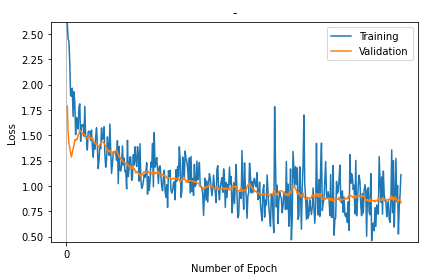

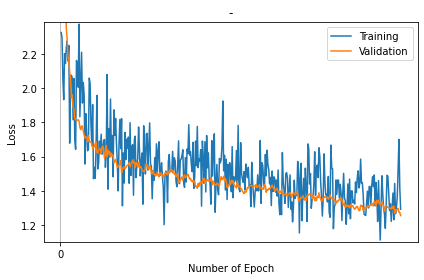

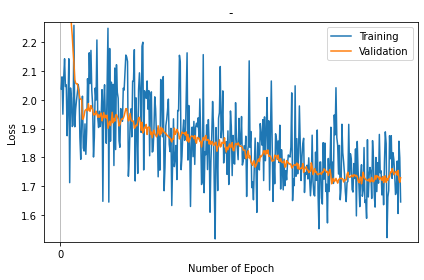

In [10]:
# >> 128-4-50, Epoch: 400, LR: 0.001, DR: 0
Train_Loss= [2.602579355239868, 2.4529056549072266, 2.4218428134918213, 2.2097764015197754, 1.891537070274353, 1.8837283849716187, 1.9636001586914062, 1.6848652362823486, 1.9285333156585693, 1.8254324197769165, 1.505394697189331, 1.6757333278656006, 1.645796537399292, 1.5600788593292236, 1.7794477939605713, 1.8092809915542603, 1.4398826360702515, 1.6008020639419556, 1.5935742855072021, 1.6059471368789673, 1.4901524782180786, 1.7841373682022095, 1.4748494625091553, 1.4841114282608032, 1.3535510301589966, 1.5331847667694092, 1.5405000448226929, 1.532627820968628, 1.4479022026062012, 1.5510727167129517, 1.3830115795135498, 1.2833468914031982, 1.4249114990234375, 1.3620073795318604, 1.4850380420684814, 1.5737934112548828, 1.3928706645965576, 1.1702196598052979, 1.2519009113311768, 1.403842806816101, 1.3680483102798462, 1.5714986324310303, 1.4563112258911133, 1.4671872854232788, 1.5828900337219238, 1.3068745136260986, 1.1848008632659912, 1.2608038187026978, 1.4833699464797974, 1.3613388538360596, 1.3013731241226196, 1.609494924545288, 1.3326900005340576, 1.1231440305709839, 1.229127049446106, 1.3233753442764282, 1.338015079498291, 1.328535795211792, 1.3201370239257812, 1.2532926797866821, 1.4456883668899536, 1.0218470096588135, 1.390025019645691, 1.155476450920105, 1.146776795387268, 1.2021018266677856, 1.394463062286377, 1.2060500383377075, 1.2721612453460693, 1.1411629915237427, 1.1455061435699463, 0.9708045721054077, 1.4492390155792236, 1.0916520357131958, 1.1811145544052124, 1.2871094942092896, 1.277129888534546, 1.05415940284729, 1.0930984020233154, 1.306612253189087, 1.2076069116592407, 1.3859174251556396, 1.251569151878357, 1.1902450323104858, 1.3871796131134033, 1.3145456314086914, 1.0465712547302246, 1.416042685508728, 1.061375617980957, 0.9760212898254395, 0.9944050908088684, 1.0440833568572998, 1.1107803583145142, 1.084348440170288, 1.1323773860931396, 1.2281520366668701, 0.9187297821044922, 1.0914552211761475, 0.956220805644989, 1.047939658164978, 1.2327625751495361, 1.1872422695159912, 1.4185367822647095, 0.9911258816719055, 1.5259548425674438, 1.1851890087127686, 1.2192171812057495, 1.2792565822601318, 1.161460518836975, 1.0227303504943848, 1.1874420642852783, 1.1979330778121948, 1.0918298959732056, 0.9916184544563293, 0.9529775381088257, 1.0864896774291992, 1.153573989868164, 0.9476175308227539, 0.8891026377677917, 1.0106172561645508, 0.7894781231880188, 1.1482510566711426, 1.0969061851501465, 1.1531997919082642, 0.9611819386482239, 0.9283062815666199, 0.9538981318473816, 1.0244554281234741, 1.0428001880645752, 0.8632877469062805, 1.1594690084457397, 1.047370195388794, 1.1922252178192139, 1.0948140621185303, 1.3847596645355225, 1.2602388858795166, 0.8880574107170105, 0.9429131746292114, 1.285818338394165, 1.2055766582489014, 1.0855228900909424, 1.3438622951507568, 1.2661011219024658, 1.2375218868255615, 1.1710679531097412, 1.0348219871520996, 1.2765655517578125, 0.9290977716445923, 1.2907283306121826, 0.945015549659729, 1.073067545890808, 0.906046986579895, 1.2119252681732178, 0.9948333501815796, 1.0147823095321655, 1.2438279390335083, 1.0589181184768677, 1.1088885068893433, 1.2315744161605835, 0.9925109148025513, 0.992697536945343, 0.977634608745575, 0.9212206602096558, 0.7095662951469421, 0.9225723147392273, 1.0757877826690674, 0.8592774271965027, 1.0495774745941162, 0.8406838178634644, 1.0240617990493774, 1.1218762397766113, 1.0755279064178467, 0.9742670059204102, 0.901933491230011, 0.9889524579048157, 1.1059441566467285, 0.9890672564506531, 0.9346470832824707, 0.8361580967903137, 1.1627357006072998, 1.1992398500442505, 0.9492038488388062, 0.8619629144668579, 0.9876292943954468, 1.0395641326904297, 1.0811374187469482, 0.9365897178649902, 1.167751669883728, 1.071347951889038, 0.7874937653541565, 1.0348544120788574, 0.8861166834831238, 1.0150824785232544, 0.9854660034179688, 1.1845942735671997, 1.0160105228424072, 1.09162175655365, 0.734200656414032, 0.8487405776977539, 1.0319938659667969, 0.8251605033874512, 1.0426092147827148, 1.210388422012329, 0.9092852473258972, 0.6855723261833191, 0.7132455706596375, 0.9385607838630676, 0.8806994557380676, 0.8758061528205872, 1.3488967418670654, 0.9579928517341614, 0.7695633172988892, 1.2267346382141113, 0.9826246500015259, 0.9030057191848755, 0.6807289123535156, 0.8980189561843872, 0.9368694424629211, 1.2238008975982666, 1.107895851135254, 0.931593120098114, 1.0434236526489258, 0.9322038888931274, 1.0586144924163818, 1.0747663974761963, 1.0065780878067017, 0.9929672479629517, 1.1302201747894287, 0.8648421168327332, 0.878138542175293, 1.037132978439331, 0.82130366563797, 0.7277184724807739, 0.6571981310844421, 0.9575322270393372, 1.0107611417770386, 0.6916435956954956, 0.8584343194961548, 0.8105824589729309, 1.1076020002365112, 0.9442402720451355, 0.7939943075180054, 0.7076607942581177, 0.6024247407913208, 0.9108071327209473, 0.9217516779899597, 0.6891793608665466, 0.5395658016204834, 1.7808926105499268, 1.244692087173462, 0.792178750038147, 1.007001519203186, 0.6283615827560425, 0.8512839078903198, 0.9392204284667969, 0.8997611999511719, 0.8818081021308899, 0.734960675239563, 0.7994754910469055, 0.9347389936447144, 0.9380017518997192, 0.7664920091629028, 1.2405211925506592, 0.7715905904769897, 1.0182691812515259, 0.6022756695747375, 0.745834231376648, 1.1673712730407715, 0.46765223145484924, 0.666349470615387, 1.34012770652771, 1.1643034219741821, 1.0049984455108643, 1.1896480321884155, 1.0176042318344116, 1.1776210069656372, 0.6702243089675903, 0.7063685059547424, 1.1882941722869873, 0.9229534268379211, 0.5725383758544922, 0.9907361268997192, 1.2100244760513306, 1.6999521255493164, 1.0154263973236084, 0.8869813680648804, 0.6704035401344299, 0.8849390149116516, 0.6816142797470093, 0.7171013355255127, 0.8624610900878906, 0.7796837091445923, 0.7191486954689026, 0.7894405126571655, 0.9789358973503113, 0.7870201468467712, 0.6309813261032104, 0.7928611040115356, 1.419478416442871, 0.9418498873710632, 0.7129479050636292, 1.0632820129394531, 0.6994145512580872, 1.1762187480926514, 1.4220470190048218, 0.7562085390090942, 0.8302298784255981, 0.8684881925582886, 1.046065092086792, 1.2411212921142578, 0.9129694104194641, 0.8824308514595032, 0.9423640966415405, 0.8805161714553833, 0.7059493660926819, 1.1122379302978516, 0.6910465359687805, 0.6891420483589172, 1.2009141445159912, 0.5138987302780151, 0.6646665334701538, 0.6899868845939636, 1.044041395187378, 0.9259623289108276, 0.9467214345932007, 1.0578110218048096, 1.2050482034683228, 0.9019735455513, 0.8314933776855469, 0.9500589370727539, 0.7402677536010742, 0.890863299369812, 0.71632319688797, 0.6962913274765015, 0.7323817014694214, 0.6383659839630127, 0.8436844944953918, 0.5613060593605042, 1.3079173564910889, 1.0235387086868286, 1.1200681924819946, 1.0863040685653687, 0.9636605381965637, 1.0072453022003174, 0.7244362235069275, 1.2512480020523071, 0.7046380043029785, 0.8429325222969055, 1.0050663948059082, 1.1051234006881714, 1.0454432964324951, 0.8023573160171509, 0.7055855989456177, 0.9246939420700073, 0.7313328981399536, 0.953980565071106, 1.0126827955245972, 0.9497638940811157, 0.5033289790153503, 0.957072913646698, 0.9819811582565308, 0.7409319281578064, 0.715129017829895, 1.1214079856872559, 0.4586579203605652, 0.5789228677749634, 0.6327992081642151, 0.5573848485946655, 0.7862482666969299, 0.6005005240440369, 0.8119581937789917, 0.743144154548645, 0.7214064598083496, 1.28874933719635, 1.074796438217163, 0.83839350938797, 1.0882470607757568, 0.7212092876434326, 1.146380066871643, 0.9173881411552429, 0.8506320714950562, 0.8540980219841003, 0.6956857442855835, 0.8049169778823853, 0.8446906208992004, 0.672154426574707, 0.6406139135360718, 0.8398599624633789, 1.3551290035247803, 0.7345075607299805, 1.248213768005371, 0.5941910743713379, 0.8752584457397461, 1.2707372903823853, 0.8434957265853882, 1.0040953159332275, 0.5251930952072144, 0.7958921790122986, 0.915607750415802, 1.1107169389724731]
Test_Loss= [1.7888702154159546, 1.5366379022598267, 1.4207013845443726, 1.3768271207809448, 1.3224549293518066, 1.2865636348724365, 1.3305679559707642, 1.3672950267791748, 1.4009597301483154, 1.4547120332717896, 1.447037696838379, 1.4614506959915161, 1.4598057270050049, 1.5049622058868408, 1.516742467880249, 1.5432380437850952, 1.5403116941452026, 1.5411931276321411, 1.5068631172180176, 1.5126376152038574, 1.505312204360962, 1.5033513307571411, 1.4770292043685913, 1.4728271961212158, 1.4680581092834473, 1.4858160018920898, 1.4911220073699951, 1.4710344076156616, 1.4773935079574585, 1.463587999343872, 1.482429027557373, 1.4522852897644043, 1.4272818565368652, 1.4233731031417847, 1.4142279624938965, 1.4148836135864258, 1.3998970985412598, 1.3876264095306396, 1.3827084302902222, 1.4110641479492188, 1.4142570495605469, 1.432604193687439, 1.4340858459472656, 1.429668664932251, 1.4215701818466187, 1.4019849300384521, 1.392335295677185, 1.3774805068969727, 1.3447571992874146, 1.3585411310195923, 1.3376491069793701, 1.3468036651611328, 1.3284591436386108, 1.3352493047714233, 1.3330893516540527, 1.3217885494232178, 1.3211225271224976, 1.3312647342681885, 1.348081111907959, 1.353464961051941, 1.3186430931091309, 1.3185285329818726, 1.2841641902923584, 1.284332513809204, 1.260614037513733, 1.2619853019714355, 1.2533018589019775, 1.238933801651001, 1.2316476106643677, 1.2259856462478638, 1.2169535160064697, 1.223442554473877, 1.2073712348937988, 1.2071757316589355, 1.186915636062622, 1.1874668598175049, 1.1822702884674072, 1.1690703630447388, 1.189953088760376, 1.1704673767089844, 1.1707680225372314, 1.1557798385620117, 1.1270194053649902, 1.1424249410629272, 1.1397876739501953, 1.1180100440979004, 1.1241326332092285, 1.107917308807373, 1.0921835899353027, 1.1089061498641968, 1.1158041954040527, 1.1340091228485107, 1.1408096551895142, 1.129682183265686, 1.1310057640075684, 1.138197660446167, 1.1462032794952393, 1.1402673721313477, 1.127689003944397, 1.1296954154968262, 1.128089427947998, 1.1298439502716064, 1.1034140586853027, 1.1356337070465088, 1.123274564743042, 1.118017554283142, 1.134622573852539, 1.1261208057403564, 1.1253366470336914, 1.1452702283859253, 1.117765188217163, 1.1087608337402344, 1.10854172706604, 1.1020796298980713, 1.114149570465088, 1.111877202987671, 1.0977994203567505, 1.0987496376037598, 1.0968067646026611, 1.077548861503601, 1.0804293155670166, 1.0773874521255493, 1.0781259536743164, 1.0772353410720825, 1.0660994052886963, 1.0646902322769165, 1.0732207298278809, 1.0741767883300781, 1.0673654079437256, 1.0769836902618408, 1.0685852766036987, 1.069756031036377, 1.0650429725646973, 1.0802545547485352, 1.0575666427612305, 1.0392241477966309, 1.048161506652832, 1.0699328184127808, 1.0667682886123657, 1.0617055892944336, 1.083631992340088, 1.0575177669525146, 1.0363799333572388, 1.0543618202209473, 1.0381009578704834, 1.052701711654663, 1.0458747148513794, 1.0510528087615967, 1.051953911781311, 1.050011396408081, 1.038356065750122, 1.0512412786483765, 1.0368218421936035, 1.0350909233093262, 1.041477084159851, 1.0273232460021973, 1.0291837453842163, 1.0244851112365723, 1.0066803693771362, 1.0028448104858398, 0.9982686042785645, 0.988348126411438, 0.9714052677154541, 0.9639291763305664, 0.9896884560585022, 0.9771785140037537, 0.9899150133132935, 0.9883684515953064, 0.9920754432678223, 1.007080316543579, 1.0081887245178223, 1.0054889917373657, 0.9967825412750244, 0.9953732490539551, 0.9886816740036011, 0.9742916822433472, 0.969896674156189, 0.9636003971099854, 0.9832555055618286, 0.9917044639587402, 0.9838309288024902, 0.9624583721160889, 0.9712666273117065, 0.9641704559326172, 0.9668668508529663, 0.9681720733642578, 0.9788030982017517, 0.9751168489456177, 0.9636419415473938, 0.9823871850967407, 0.967393159866333, 0.9709221124649048, 0.975877046585083, 0.9761577844619751, 0.9591372013092041, 0.9746170043945312, 0.9653712511062622, 0.9788815379142761, 0.9997595548629761, 0.9877716898918152, 0.991133451461792, 0.9975061416625977, 0.9921082258224487, 0.9658174514770508, 0.9471479654312134, 0.9526264667510986, 0.9564685821533203, 0.9545032382011414, 0.9833822250366211, 0.950374960899353, 0.9456766247749329, 0.956838846206665, 0.9552280902862549, 0.9638810753822327, 0.961814284324646, 0.9919085502624512, 1.0048983097076416, 1.0245636701583862, 1.0218005180358887, 1.0040719509124756, 0.9973099231719971, 0.9779098033905029, 0.9699971675872803, 0.9662117958068848, 0.9463622570037842, 0.9442909955978394, 0.9481408596038818, 0.9301594495773315, 0.9257866144180298, 0.9295992851257324, 0.9188320636749268, 0.9101100564002991, 0.9059961438179016, 0.9224666357040405, 0.9226800203323364, 0.9103033542633057, 0.9145209193229675, 0.9185540676116943, 0.9254903793334961, 0.9197241067886353, 0.9135316014289856, 0.9038106799125671, 0.9016153812408447, 0.9193670749664307, 0.9217186570167542, 0.9179843664169312, 0.9101124405860901, 0.9599171876907349, 0.9448479413986206, 0.9223377704620361, 0.9264952540397644, 0.907430112361908, 0.9290587902069092, 0.9463680982589722, 0.9500846862792969, 0.9507776498794556, 0.952989935874939, 0.9492292404174805, 0.9395511150360107, 0.9316868185997009, 0.9170505404472351, 0.9286612868309021, 0.9046775102615356, 0.9208340644836426, 0.9031341075897217, 0.9221069812774658, 0.9504003524780273, 0.9224206209182739, 0.938847541809082, 0.9989078640937805, 0.9902724027633667, 0.9870389103889465, 0.9914991855621338, 0.9693782329559326, 0.9591865539550781, 0.9244481325149536, 0.917447566986084, 0.9320622682571411, 0.9183523654937744, 0.8909722566604614, 0.8934735059738159, 0.9145591855049133, 0.9279820322990417, 0.8910179138183594, 0.8822537660598755, 0.8725453615188599, 0.8798519372940063, 0.8695915937423706, 0.8775277137756348, 0.8807675838470459, 0.8825609683990479, 0.8764305114746094, 0.883769154548645, 0.9121331572532654, 0.8998523950576782, 0.8889610767364502, 0.8926131725311279, 0.9286117553710938, 0.9100747108459473, 0.8990849256515503, 0.9235959053039551, 0.8885670304298401, 0.9212173223495483, 0.9243729114532471, 0.8642564415931702, 0.8726107478141785, 0.8739928603172302, 0.874243438243866, 0.881665825843811, 0.8691061735153198, 0.8749626874923706, 0.8790568113327026, 0.8801863789558411, 0.8625359535217285, 0.8803869485855103, 0.8563200235366821, 0.8598692417144775, 0.8777952194213867, 0.8491249084472656, 0.8630820512771606, 0.8619726300239563, 0.8810612559318542, 0.8703446388244629, 0.8707138895988464, 0.8668378591537476, 0.885552167892456, 0.8509547114372253, 0.8576682806015015, 0.867479681968689, 0.86338210105896, 0.8694676160812378, 0.8720989227294922, 0.8654277920722961, 0.8719444274902344, 0.8718713521957397, 0.8895182013511658, 0.8758640885353088, 0.9125891327857971, 0.9045926928520203, 0.904068112373352, 0.8977318406105042, 0.8876875638961792, 0.8916840553283691, 0.8804324865341187, 0.9042041897773743, 0.8806412220001221, 0.8859236240386963, 0.9054857492446899, 0.9053270220756531, 0.9066723585128784, 0.8912686109542847, 0.9016121625900269, 0.9076012372970581, 0.8946635723114014, 0.9056520462036133, 0.8949178457260132, 0.8702651858329773, 0.8523482084274292, 0.8653253316879272, 0.8665820956230164, 0.8486188650131226, 0.8456566333770752, 0.8731780052185059, 0.8476892709732056, 0.8534297943115234, 0.8576380014419556, 0.8518235087394714, 0.8567599654197693, 0.8436069488525391, 0.8575760722160339, 0.8562643527984619, 0.8488776087760925, 0.8728684186935425, 0.86846923828125, 0.8559035658836365, 0.8686290383338928, 0.8562833070755005, 0.8833067417144775, 0.8683130145072937, 0.866230845451355, 0.8730533123016357, 0.8581005334854126, 0.8534160256385803, 0.8659884929656982, 0.8643972873687744, 0.8603353500366211, 0.871178925037384, 0.9030470848083496, 0.8666319847106934, 0.89080810546875, 0.854453444480896, 0.8687053918838501, 0.8943067193031311, 0.867508590221405, 0.8696392178535461, 0.8406374454498291, 0.8554786443710327, 0.8562209606170654, 0.8658446669578552, 0.8346895575523376]
lossGraph(Train_Loss, Test_Loss)

# >> 128-4-50, Epoch: 400, LR: 0.0001, DR: 0
Train_Loss= [2.324867010116577, 2.29622220993042, 2.056462526321411, 1.9323604106903076, 2.201564311981201, 2.1438965797424316, 2.235252857208252, 2.27510142326355, 2.1577563285827637, 2.24934458732605, 1.6782958507537842, 1.9767792224884033, 2.075432300567627, 2.0574119091033936, 1.8150336742401123, 2.0564732551574707, 1.6967837810516357, 1.6428817510604858, 2.1615819931030273, 2.1290626525878906, 2.005462408065796, 2.3741822242736816, 1.8322778940200806, 2.0143649578094482, 2.209700584411621, 1.9126255512237549, 2.0331602096557617, 1.9607393741607666, 1.5562273263931274, 1.8505245447158813, 1.7307913303375244, 1.6337658166885376, 1.6420177221298218, 2.058711290359497, 2.0271358489990234, 1.7905609607696533, 1.6661040782928467, 1.9040272235870361, 1.4705173969268799, 1.5363938808441162, 1.4730116128921509, 1.6436669826507568, 1.957405686378479, 1.5275356769561768, 1.560023307800293, 1.690220594406128, 1.621190071105957, 1.7306969165802002, 1.6138896942138672, 1.643280267715454, 1.696001648902893, 1.6993739604949951, 1.5370994806289673, 1.614467978477478, 2.0799639225006104, 1.4094035625457764, 1.7638251781463623, 1.5977050065994263, 1.9360910654067993, 1.6118805408477783, 1.7229340076446533, 1.4815658330917358, 1.8730074167251587, 1.724108338356018, 1.8229577541351318, 1.6762611865997314, 1.5627638101577759, 1.3991856575012207, 1.6765114068984985, 1.8171600103378296, 1.6462361812591553, 1.8217029571533203, 1.3121113777160645, 1.6209537982940674, 1.4451627731323242, 1.740997552871704, 1.582432746887207, 1.7017345428466797, 1.649526596069336, 1.7139842510223389, 1.443795919418335, 1.798168420791626, 1.4899688959121704, 1.6570022106170654, 1.6693865060806274, 1.374011754989624, 1.6991548538208008, 1.7189794778823853, 1.4769752025604248, 1.556066870689392, 1.5876100063323975, 1.7729343175888062, 1.6425660848617554, 1.486893653869629, 1.5723845958709717, 1.6210052967071533, 1.3214893341064453, 1.779701590538025, 1.6256777048110962, 1.497918725013733, 1.7304906845092773, 1.7353293895721436, 1.5202308893203735, 1.6654586791992188, 1.7964979410171509, 1.5579534769058228, 1.541358232498169, 1.353152871131897, 1.5183160305023193, 1.4602857828140259, 1.5926120281219482, 1.5008485317230225, 1.674567461013794, 1.5005146265029907, 1.632416009902954, 1.6863062381744385, 1.489591360092163, 1.5123815536499023, 1.5633294582366943, 1.4819562435150146, 1.4248292446136475, 1.2011876106262207, 1.4883713722229004, 1.5148255825042725, 1.4999603033065796, 1.3311327695846558, 1.5715398788452148, 1.611964464187622, 1.5145022869110107, 1.51223886013031, 1.5165408849716187, 1.630292534828186, 1.5144463777542114, 1.5926989316940308, 1.5745604038238525, 1.4542676210403442, 1.4235570430755615, 1.5576777458190918, 1.6915251016616821, 1.4413381814956665, 1.5781207084655762, 1.585425853729248, 1.6047834157943726, 1.6397511959075928, 1.4487011432647705, 1.4197736978530884, 1.5940850973129272, 1.4512584209442139, 1.644126296043396, 1.6177972555160522, 1.786507248878479, 1.6083790063858032, 1.6289317607879639, 1.554076075553894, 1.5117788314819336, 1.6829407215118408, 1.4143702983856201, 1.4907691478729248, 1.690797209739685, 1.546649694442749, 1.7758853435516357, 1.5352157354354858, 1.5852329730987549, 1.5744366645812988, 1.640384316444397, 1.3101624250411987, 1.690679907798767, 1.5978233814239502, 1.4438598155975342, 1.6873817443847656, 1.393043875694275, 1.7227563858032227, 1.5336519479751587, 1.6216821670532227, 1.4728175401687622, 1.4404006004333496, 1.3213191032409668, 1.6930803060531616, 1.4861615896224976, 1.6549813747406006, 1.732954978942871, 1.274440050125122, 1.4394996166229248, 1.5536398887634277, 1.4108449220657349, 1.3767956495285034, 1.5889846086502075, 1.5626654624938965, 1.5805683135986328, 1.6606594324111938, 1.9249508380889893, 1.51633882522583, 1.6072704792022705, 1.403960108757019, 1.5849339962005615, 1.3487696647644043, 1.55454421043396, 1.4396002292633057, 1.5639923810958862, 1.529319405555725, 1.3944189548492432, 1.6579898595809937, 1.359203577041626, 1.4814918041229248, 1.4545501470565796, 1.4792060852050781, 1.635631799697876, 1.444838285446167, 1.7820066213607788, 1.4114553928375244, 1.3942025899887085, 1.6805102825164795, 1.5004017353057861, 1.4681589603424072, 1.44918692111969, 1.512125015258789, 1.4048765897750854, 1.5563995838165283, 1.5104960203170776, 1.4766045808792114, 1.537078857421875, 1.425119161605835, 1.4356263875961304, 1.3077797889709473, 1.5660134553909302, 1.4502466917037964, 1.3806744813919067, 1.3047678470611572, 1.3960387706756592, 1.4232242107391357, 1.3996412754058838, 1.493354082107544, 1.3988738059997559, 1.4378825426101685, 1.6938625574111938, 1.3265564441680908, 1.5636829137802124, 1.5461472272872925, 1.447164535522461, 1.4261248111724854, 1.6122347116470337, 1.4872417449951172, 1.6370728015899658, 1.5532176494598389, 1.5241222381591797, 1.4403398036956787, 1.4781852960586548, 1.313274621963501, 1.515683650970459, 1.3963096141815186, 1.4816043376922607, 1.4721614122390747, 1.3918923139572144, 1.462527871131897, 1.3688081502914429, 1.5210859775543213, 1.32393479347229, 1.2602663040161133, 1.3773022890090942, 1.2603124380111694, 1.6229130029678345, 1.4513370990753174, 1.4026035070419312, 1.3261067867279053, 1.4988863468170166, 1.5060595273971558, 1.4728598594665527, 1.3028357028961182, 1.3965842723846436, 1.4929604530334473, 1.292422890663147, 1.3351719379425049, 1.2184922695159912, 1.305602788925171, 1.4616960287094116, 1.35546875, 1.3787732124328613, 1.3742225170135498, 1.5714555978775024, 1.5292770862579346, 1.1535227298736572, 1.4716796875, 1.5604830980300903, 1.2248529195785522, 1.3714330196380615, 1.4724843502044678, 1.3474441766738892, 1.532346487045288, 1.4139806032180786, 1.2207188606262207, 1.6740049123764038, 1.6472504138946533, 1.4393374919891357, 1.50088632106781, 1.2979086637496948, 1.3518420457839966, 1.3622336387634277, 1.4335094690322876, 1.6276862621307373, 1.3723872900009155, 1.5345245599746704, 1.549689531326294, 1.477277398109436, 1.6514228582382202, 1.6012086868286133, 1.4512134790420532, 1.3685362339019775, 1.2521685361862183, 1.3623549938201904, 1.6157737970352173, 1.4478567838668823, 1.3761100769042969, 1.3796069622039795, 1.3345463275909424, 1.4833800792694092, 1.2750519514083862, 1.2450149059295654, 1.6671139001846313, 1.5328052043914795, 1.5288877487182617, 1.1781609058380127, 1.3049696683883667, 1.3185762166976929, 1.4633300304412842, 1.3793892860412598, 1.4631693363189697, 1.461592435836792, 1.356998085975647, 1.4377622604370117, 1.3871114253997803, 1.226011872291565, 1.3847731351852417, 1.502074122428894, 1.3582422733306885, 1.3408957719802856, 1.2042285203933716, 1.3046319484710693, 1.4399410486221313, 1.265313744544983, 1.4683287143707275, 1.2365750074386597, 1.3988715410232544, 1.3992046117782593, 1.3293406963348389, 1.3440507650375366, 1.3225500583648682, 1.4512665271759033, 1.3893344402313232, 1.4750959873199463, 1.5163785219192505, 1.416553258895874, 1.443284273147583, 1.5850410461425781, 1.446236491203308, 1.4473695755004883, 1.3742725849151611, 1.2631886005401611, 1.2581160068511963, 1.2556383609771729, 1.3304369449615479, 1.3973922729492188, 1.2990888357162476, 1.4243041276931763, 1.4252779483795166, 1.314679503440857, 1.4291164875030518, 1.4822450876235962, 1.4240517616271973, 1.4926655292510986, 1.3127957582473755, 1.4485763311386108, 1.3675429821014404, 1.2204099893569946, 1.4593472480773926, 1.290891170501709, 1.1117093563079834, 1.2972408533096313, 1.4875637292861938, 1.3805702924728394, 1.2982141971588135, 1.2641583681106567, 1.180803656578064, 1.3088663816452026, 1.490614891052246, 1.4850536584854126, 1.3891452550888062, 1.283940315246582, 1.323636770248413, 1.2211321592330933, 1.3083821535110474, 1.3865500688552856, 1.2302531003952026, 1.4427144527435303, 1.2657203674316406, 1.3008321523666382, 1.3602864742279053, 1.517494797706604, 1.7006006240844727, 1.4179975986480713, 1.2922042608261108]
Test_Loss= [8.395126342773438, 6.067591190338135, 4.587405204772949, 3.888241767883301, 3.0785865783691406, 2.772853374481201, 2.351898670196533, 2.287351608276367, 2.181061029434204, 2.1675238609313965, 2.0939176082611084, 2.059882879257202, 1.9466445446014404, 1.9608769416809082, 1.8873579502105713, 1.8781025409698486, 1.8210850954055786, 1.8181967735290527, 1.8110815286636353, 1.8128360509872437, 1.815575122833252, 1.8078675270080566, 1.769090175628662, 1.7572503089904785, 1.7789442539215088, 1.7776501178741455, 1.7488141059875488, 1.7267653942108154, 1.707726001739502, 1.715071678161621, 1.7126293182373047, 1.6846098899841309, 1.7223002910614014, 1.6901192665100098, 1.6846349239349365, 1.6864182949066162, 1.6742380857467651, 1.646756887435913, 1.6552544832229614, 1.6561872959136963, 1.6753588914871216, 1.6863274574279785, 1.6247260570526123, 1.6196078062057495, 1.6382498741149902, 1.6461926698684692, 1.643922209739685, 1.613853931427002, 1.6576247215270996, 1.6605550050735474, 1.6298611164093018, 1.5897481441497803, 1.619712233543396, 1.6654548645019531, 1.6011368036270142, 1.6373608112335205, 1.614365577697754, 1.6281054019927979, 1.5986253023147583, 1.6188018321990967, 1.6061644554138184, 1.6071993112564087, 1.5614635944366455, 1.5720276832580566, 1.5835871696472168, 1.5640263557434082, 1.5364718437194824, 1.541567325592041, 1.5490078926086426, 1.5528991222381592, 1.5771251916885376, 1.5039961338043213, 1.523252010345459, 1.5360230207443237, 1.5397241115570068, 1.5273828506469727, 1.534632921218872, 1.5454200506210327, 1.5501360893249512, 1.5518147945404053, 1.5650522708892822, 1.5392601490020752, 1.5604817867279053, 1.564310073852539, 1.5812187194824219, 1.5634716749191284, 1.5639344453811646, 1.5342488288879395, 1.5658944845199585, 1.5577757358551025, 1.5373003482818604, 1.5667810440063477, 1.5449798107147217, 1.5351170301437378, 1.5390374660491943, 1.5212825536727905, 1.5182008743286133, 1.5122933387756348, 1.5157651901245117, 1.5276719331741333, 1.5571845769882202, 1.5471761226654053, 1.541276454925537, 1.5235761404037476, 1.5453002452850342, 1.536285400390625, 1.506369948387146, 1.4984201192855835, 1.517807126045227, 1.5034037828445435, 1.49220871925354, 1.4863935708999634, 1.49074125289917, 1.5091211795806885, 1.4902458190917969, 1.481474757194519, 1.5059497356414795, 1.4951781034469604, 1.4977061748504639, 1.492694616317749, 1.4774113893508911, 1.4949756860733032, 1.5002031326293945, 1.5089530944824219, 1.4937208890914917, 1.4940109252929688, 1.5132477283477783, 1.5022249221801758, 1.5111558437347412, 1.5265190601348877, 1.5232791900634766, 1.5049114227294922, 1.5167598724365234, 1.4966682195663452, 1.498370885848999, 1.4806663990020752, 1.4902948141098022, 1.5014363527297974, 1.4483227729797363, 1.4532755613327026, 1.4624390602111816, 1.4727540016174316, 1.4812231063842773, 1.459656000137329, 1.479385256767273, 1.4933898448944092, 1.4772346019744873, 1.4807751178741455, 1.4914882183074951, 1.4969539642333984, 1.4821679592132568, 1.468184471130371, 1.472987174987793, 1.4559025764465332, 1.460477352142334, 1.449002742767334, 1.457939863204956, 1.454346776008606, 1.4238909482955933, 1.4264700412750244, 1.4145286083221436, 1.4428349733352661, 1.4261422157287598, 1.448207139968872, 1.438643217086792, 1.4515297412872314, 1.4497947692871094, 1.4699527025222778, 1.4731169939041138, 1.441286325454712, 1.462241291999817, 1.4558913707733154, 1.464914083480835, 1.4603080749511719, 1.4528805017471313, 1.4588812589645386, 1.477182388305664, 1.4593133926391602, 1.4350254535675049, 1.4562320709228516, 1.4451770782470703, 1.4334778785705566, 1.4321024417877197, 1.4449915885925293, 1.4423819780349731, 1.4285929203033447, 1.4339635372161865, 1.4605108499526978, 1.4824563264846802, 1.4645655155181885, 1.4735188484191895, 1.4847865104675293, 1.456386685371399, 1.4707887172698975, 1.456713318824768, 1.4191588163375854, 1.4257831573486328, 1.4260599613189697, 1.4446465969085693, 1.4348777532577515, 1.461235761642456, 1.4457635879516602, 1.4593219757080078, 1.4361042976379395, 1.430692434310913, 1.4231433868408203, 1.415877342224121, 1.4570300579071045, 1.4221950769424438, 1.4268381595611572, 1.425563931465149, 1.411572813987732, 1.4124605655670166, 1.3962434530258179, 1.391496181488037, 1.383584976196289, 1.3976738452911377, 1.390236496925354, 1.4022538661956787, 1.41986882686615, 1.4158328771591187, 1.4225811958312988, 1.4289615154266357, 1.4331889152526855, 1.4298968315124512, 1.421996831893921, 1.4222358465194702, 1.4274852275848389, 1.4275250434875488, 1.4360713958740234, 1.4187747240066528, 1.4259302616119385, 1.4254333972930908, 1.4354263544082642, 1.4149219989776611, 1.418018102645874, 1.4126999378204346, 1.4151015281677246, 1.4082610607147217, 1.4352468252182007, 1.4283798933029175, 1.3910491466522217, 1.4071619510650635, 1.4038031101226807, 1.4126043319702148, 1.407975435256958, 1.4206411838531494, 1.4205701351165771, 1.4332005977630615, 1.417278528213501, 1.4157440662384033, 1.3981871604919434, 1.400313138961792, 1.41382896900177, 1.4119083881378174, 1.3943464756011963, 1.3880348205566406, 1.3964076042175293, 1.389005422592163, 1.4063069820404053, 1.3833898305892944, 1.3823633193969727, 1.372876524925232, 1.3780375719070435, 1.3854005336761475, 1.3719695806503296, 1.3688586950302124, 1.3793033361434937, 1.3849694728851318, 1.3887885808944702, 1.3772921562194824, 1.360470175743103, 1.3787380456924438, 1.3881020545959473, 1.385784387588501, 1.3754055500030518, 1.378150224685669, 1.3953248262405396, 1.3844636678695679, 1.3397941589355469, 1.342570424079895, 1.359068512916565, 1.354282021522522, 1.360040545463562, 1.3721665143966675, 1.3598172664642334, 1.3473719358444214, 1.3568191528320312, 1.3436670303344727, 1.368805170059204, 1.3787736892700195, 1.3751399517059326, 1.3813090324401855, 1.3783270120620728, 1.3825018405914307, 1.3530688285827637, 1.3734959363937378, 1.3679689168930054, 1.3420398235321045, 1.35938560962677, 1.3420131206512451, 1.3663510084152222, 1.3599025011062622, 1.3882715702056885, 1.364152193069458, 1.3516312837600708, 1.3361845016479492, 1.346817135810852, 1.3594586849212646, 1.3593969345092773, 1.3660032749176025, 1.364487886428833, 1.3569414615631104, 1.3636106252670288, 1.3507444858551025, 1.3553025722503662, 1.376575231552124, 1.3586201667785645, 1.3595452308654785, 1.348334550857544, 1.3559443950653076, 1.3476917743682861, 1.3417004346847534, 1.3241511583328247, 1.3406964540481567, 1.3348954916000366, 1.344454050064087, 1.349372148513794, 1.345820426940918, 1.3619364500045776, 1.3461449146270752, 1.3230594396591187, 1.316516399383545, 1.328359603881836, 1.303856611251831, 1.3162152767181396, 1.3073492050170898, 1.3158729076385498, 1.3072468042373657, 1.2998110055923462, 1.3180251121520996, 1.30532705783844, 1.3145997524261475, 1.3116710186004639, 1.299439549446106, 1.2918941974639893, 1.2962493896484375, 1.3062982559204102, 1.3084361553192139, 1.2972214221954346, 1.2848129272460938, 1.283107042312622, 1.3161227703094482, 1.3115949630737305, 1.3136759996414185, 1.2859704494476318, 1.2985398769378662, 1.3024871349334717, 1.2939260005950928, 1.3037259578704834, 1.3104209899902344, 1.312475562095642, 1.304189682006836, 1.3157458305358887, 1.3177838325500488, 1.325878620147705, 1.3224537372589111, 1.3108078241348267, 1.3393089771270752, 1.3340950012207031, 1.3103225231170654, 1.3439428806304932, 1.3293243646621704, 1.344021201133728, 1.323222279548645, 1.3234996795654297, 1.3204238414764404, 1.3344224691390991, 1.3244290351867676, 1.306396722793579, 1.2841745615005493, 1.3078062534332275, 1.3130954504013062, 1.3096201419830322, 1.301621675491333, 1.300941824913025, 1.2995092868804932, 1.2966787815093994, 1.2931874990463257, 1.3088831901550293, 1.2959177494049072, 1.310145378112793, 1.2678682804107666, 1.2899236679077148, 1.2864882946014404, 1.2903797626495361, 1.2974834442138672, 1.2745542526245117, 1.2735531330108643, 1.2552294731140137]
lossGraph(Train_Loss, Test_Loss)

# >> 128-4-50, Epoch: 400, LR: 1e-05, DR: 0
Train_Loss= [2.0376460552215576, 2.079313278198242, 1.9499471187591553, 2.0780441761016846, 2.14186429977417, 2.0458390712738037, 2.0516114234924316, 1.8753345012664795, 1.9804811477661133, 2.142007350921631, 1.7126214504241943, 2.0407752990722656, 2.006291389465332, 1.9071277379989624, 1.9121215343475342, 2.2580034732818604, 1.9061920642852783, 1.9669349193572998, 1.9978584051132202, 2.022961378097534, 2.0528512001037598, 2.0330166816711426, 1.8688881397247314, 1.7933772802352905, 1.944711446762085, 2.012251615524292, 1.8330177068710327, 1.8221356868743896, 1.9163219928741455, 1.8107246160507202, 1.8929296731948853, 2.072805404663086, 1.9906877279281616, 2.162670135498047, 2.0558812618255615, 2.170954465866089, 2.0320193767547607, 1.9796316623687744, 1.8014862537384033, 1.8686649799346924, 2.040294647216797, 1.9988489151000977, 2.2071104049682617, 1.936873197555542, 1.9036922454833984, 1.9601246118545532, 1.907217264175415, 1.9422237873077393, 2.0348825454711914, 1.647897481918335, 1.9895317554473877, 2.0517399311065674, 1.9285005331039429, 1.849217176437378, 2.0478744506835938, 2.2476720809936523, 1.6451565027236938, 2.1775999069213867, 1.8564236164093018, 2.060917854309082, 1.9330337047576904, 2.053311347961426, 1.7720353603363037, 2.1097633838653564, 1.8273662328720093, 2.1214706897735596, 2.025468111038208, 2.0055606365203857, 1.8579127788543701, 1.8352587223052979, 1.9693162441253662, 1.9558982849121094, 1.9253631830215454, 2.039769411087036, 2.033294916152954, 2.0935559272766113, 2.154796838760376, 2.1484105587005615, 2.132594585418701, 1.7349354028701782, 1.7975080013275146, 1.9139206409454346, 1.968248724937439, 1.8713926076889038, 2.064305305480957, 2.0638203620910645, 2.1734461784362793, 1.7184187173843384, 2.006415843963623, 1.89407479763031, 1.744604468345642, 2.036121368408203, 2.0932490825653076, 2.022716760635376, 1.8866952657699585, 2.185413360595703, 2.1992855072021484, 1.7566983699798584, 2.0309014320373535, 2.0104434490203857, 2.005093812942505, 2.065100908279419, 1.967372179031372, 2.0313899517059326, 1.805797815322876, 1.996278166770935, 2.0272114276885986, 1.8188384771347046, 1.8216584920883179, 1.8916467428207397, 2.010011672973633, 1.9684165716171265, 1.8777475357055664, 1.9012959003448486, 1.7329387664794922, 1.8828738927841187, 1.7559611797332764, 2.0701589584350586, 2.036902904510498, 1.8716516494750977, 2.0803306102752686, 1.6846269369125366, 1.7651970386505127, 1.909585952758789, 1.9309972524642944, 1.9624630212783813, 2.0021300315856934, 1.8453563451766968, 1.8202717304229736, 1.900892972946167, 1.633423089981079, 1.7828762531280518, 1.9338436126708984, 1.768243432044983, 1.794748067855835, 1.8415706157684326, 1.72323739528656, 1.9630416631698608, 1.9620497226715088, 2.1540448665618896, 2.1296794414520264, 1.7576277256011963, 1.8035876750946045, 1.887820839881897, 1.9300651550292969, 1.8592007160186768, 1.8638849258422852, 2.0192368030548096, 2.1625871658325195, 1.790967345237732, 1.9799299240112305, 1.8711837530136108, 1.6300837993621826, 1.8344695568084717, 1.905260682106018, 1.8026268482208252, 1.9248368740081787, 1.7758152484893799, 1.9045146703720093, 1.9184738397598267, 1.9061235189437866, 1.9371395111083984, 1.8646173477172852, 2.0025737285614014, 1.8763020038604736, 1.7062069177627563, 1.720342993736267, 2.156341791152954, 1.6779006719589233, 1.820112943649292, 1.8094112873077393, 1.912891149520874, 1.7580047845840454, 1.931024193763733, 1.8432071208953857, 1.6101539134979248, 1.7846314907073975, 1.874629020690918, 1.9939203262329102, 1.9114049673080444, 1.6840862035751343, 1.51766037940979, 1.9033571481704712, 1.8233356475830078, 1.6851459741592407, 1.9362436532974243, 1.9551836252212524, 2.115117311477661, 1.8681955337524414, 1.9057964086532593, 2.0306344032287598, 1.7810090780258179, 1.8320558071136475, 1.8158546686172485, 1.854962944984436, 1.741363286972046, 1.892012596130371, 1.7062116861343384, 1.8021814823150635, 1.9610048532485962, 1.907309889793396, 1.7371498346328735, 1.8762058019638062, 1.7798036336898804, 1.7770891189575195, 1.9898096323013306, 1.871117353439331, 1.8326079845428467, 1.7923393249511719, 1.935397744178772, 1.8443267345428467, 1.849265694618225, 1.94174063205719, 1.7736995220184326, 1.787833571434021, 1.8404372930526733, 1.7960506677627563, 1.8735673427581787, 1.6646846532821655, 1.8195037841796875, 1.8392902612686157, 2.1347832679748535, 1.8348060846328735, 1.8898727893829346, 1.6954015493392944, 1.715110182762146, 1.6532585620880127, 1.7690560817718506, 1.8671766519546509, 1.7661536931991577, 1.6096417903900146, 1.851767897605896, 1.767576813697815, 1.7567222118377686, 1.9171472787857056, 1.8770307302474976, 1.8427610397338867, 1.9307082891464233, 1.7199347019195557, 1.9404840469360352, 1.7886884212493896, 1.883249282836914, 2.0076119899749756, 1.8171234130859375, 1.9270576238632202, 1.6865758895874023, 1.8775447607040405, 2.0649561882019043, 1.8476444482803345, 1.6476562023162842, 1.7931140661239624, 1.708862066268921, 1.8819557428359985, 1.864195466041565, 1.7928228378295898, 1.8573157787322998, 1.7824904918670654, 1.911743402481079, 1.6904547214508057, 1.8267228603363037, 1.770448923110962, 1.687564492225647, 1.7939834594726562, 1.702211618423462, 1.753862738609314, 1.722369909286499, 1.7767919301986694, 1.808635950088501, 1.8039041757583618, 1.8014986515045166, 1.8350927829742432, 2.023787498474121, 1.6502679586410522, 1.7252696752548218, 1.7023162841796875, 2.0483157634735107, 1.7347800731658936, 1.865201711654663, 1.7432353496551514, 1.815761923789978, 1.9785473346710205, 1.8404229879379272, 1.7199747562408447, 1.801190733909607, 1.8476263284683228, 1.8664655685424805, 1.678532361984253, 1.7470003366470337, 1.7415059804916382, 1.7731225490570068, 1.7255141735076904, 1.7987321615219116, 1.7283233404159546, 1.6672239303588867, 1.7147891521453857, 1.877145528793335, 1.7178795337677002, 1.6708812713623047, 1.6665033102035522, 1.8183578252792358, 1.7204678058624268, 1.8950694799423218, 1.6661646366119385, 1.5527255535125732, 1.7834141254425049, 1.7844369411468506, 1.6595451831817627, 1.6385765075683594, 1.8512624502182007, 1.724510908126831, 1.8498458862304688, 1.6820036172866821, 1.7071415185928345, 1.5731538534164429, 1.7964874505996704, 1.6818370819091797, 1.779410719871521, 1.90469491481781, 1.7219154834747314, 1.7837803363800049, 1.7098509073257446, 1.9472522735595703, 1.8783115148544312, 2.0416998863220215, 1.8681602478027344, 1.8422181606292725, 1.7424675226211548, 1.8418042659759521, 1.6532827615737915, 1.6937795877456665, 1.9151172637939453, 1.8162122964859009, 1.7841622829437256, 1.7437589168548584, 1.6814525127410889, 1.646995186805725, 1.7129051685333252, 1.7170288562774658, 1.9146324396133423, 1.7397632598876953, 1.8127838373184204, 1.7956647872924805, 1.688692331314087, 1.6800075769424438, 1.7787830829620361, 1.7270864248275757, 1.8294918537139893, 1.5974886417388916, 1.8555190563201904, 1.7523332834243774, 1.702981948852539, 1.6294841766357422, 1.735171914100647, 1.774818778038025, 1.6656240224838257, 1.6849544048309326, 1.834316611289978, 1.6438630819320679, 1.6517183780670166, 1.5889394283294678, 1.8615143299102783, 1.6630239486694336, 1.738244652748108, 1.7652597427368164, 1.7498325109481812, 1.65777587890625, 1.8582534790039062, 1.7993650436401367, 1.6697906255722046, 1.6279408931732178, 1.7997539043426514, 1.6817340850830078, 1.782022476196289, 1.711031198501587, 1.879797339439392, 1.7467899322509766, 1.7538048028945923, 1.6700141429901123, 1.7277272939682007, 1.6360374689102173, 1.784173607826233, 1.8886667490005493, 1.8475139141082764, 1.5221205949783325, 1.6628787517547607, 1.6848154067993164, 1.875234603881836, 1.7955694198608398, 1.8752696514129639, 1.7273164987564087, 1.8164138793945312, 1.7933298349380493, 1.742932915687561, 1.6716127395629883, 1.6821775436401367, 1.7876427173614502, 1.6057641506195068, 1.8562488555908203, 1.7982498407363892, 1.6457246541976929]
Test_Loss= [4.574155807495117, 4.009126663208008, 3.792848825454712, 3.638181209564209, 3.4303081035614014, 3.180081605911255, 3.027987480163574, 2.770237445831299, 2.6421475410461426, 2.548959970474243, 2.4361448287963867, 2.3761510848999023, 2.260641574859619, 2.222133159637451, 2.1693167686462402, 2.129037857055664, 2.069729804992676, 2.0576677322387695, 2.0554518699645996, 2.055483341217041, 2.039675235748291, 2.0235488414764404, 2.0053279399871826, 2.0016520023345947, 2.001765727996826, 1.9323209524154663, 1.9343676567077637, 1.9459104537963867, 1.962514877319336, 1.9654468297958374, 1.9677996635437012, 1.9611364603042603, 1.9863345623016357, 1.9637244939804077, 1.9599555730819702, 1.9797636270523071, 1.9707525968551636, 1.9663066864013672, 1.9467763900756836, 1.9519405364990234, 1.948098063468933, 1.9606084823608398, 1.9519765377044678, 1.9393130540847778, 1.9476584196090698, 1.9391980171203613, 1.9481242895126343, 1.9536890983581543, 1.9265142679214478, 1.9373011589050293, 1.9554450511932373, 1.9380125999450684, 1.9461700916290283, 1.9369192123413086, 1.9462727308273315, 1.9007365703582764, 1.9138420820236206, 1.9252671003341675, 1.9105027914047241, 1.9273955821990967, 1.9566059112548828, 1.9197444915771484, 1.9349088668823242, 1.9258017539978027, 1.9461750984191895, 1.948958396911621, 1.9411290884017944, 1.9330097436904907, 1.9092259407043457, 1.9136402606964111, 1.9253021478652954, 1.9334490299224854, 1.9320497512817383, 1.9364856481552124, 1.9439362287521362, 1.9572803974151611, 1.9691383838653564, 1.9688717126846313, 1.946022391319275, 1.9266952276229858, 1.930592656135559, 1.9525190591812134, 1.9323104619979858, 1.9264627695083618, 1.9257965087890625, 1.9260069131851196, 1.9009113311767578, 1.9047253131866455, 1.9118449687957764, 1.9099907875061035, 1.9231603145599365, 1.9365156888961792, 1.939123511314392, 1.9204354286193848, 1.893960952758789, 1.922168493270874, 1.8844820261001587, 1.8908817768096924, 1.9051768779754639, 1.9020298719406128, 1.9145550727844238, 1.8796306848526, 1.903669834136963, 1.9056369066238403, 1.903780460357666, 1.8802489042282104, 1.8881738185882568, 1.868592619895935, 1.8863880634307861, 1.8947758674621582, 1.8810954093933105, 1.8775138854980469, 1.871385097503662, 1.8787227869033813, 1.9097514152526855, 1.88558030128479, 1.877337098121643, 1.9044380187988281, 1.8831017017364502, 1.9009368419647217, 1.8924164772033691, 1.8876430988311768, 1.8848419189453125, 1.8833487033843994, 1.8770575523376465, 1.8766565322875977, 1.871198058128357, 1.869888186454773, 1.866885781288147, 1.8606042861938477, 1.8537262678146362, 1.8652753829956055, 1.8635048866271973, 1.9015780687332153, 1.8799545764923096, 1.8856456279754639, 1.8972666263580322, 1.8898226022720337, 1.8840773105621338, 1.8641250133514404, 1.8724945783615112, 1.8767458200454712, 1.8880945444107056, 1.8848037719726562, 1.8835877180099487, 1.8853766918182373, 1.877403974533081, 1.888784646987915, 1.8566687107086182, 1.8794525861740112, 1.8530051708221436, 1.8612194061279297, 1.8702131509780884, 1.8739266395568848, 1.8738617897033691, 1.8733291625976562, 1.8651801347732544, 1.8755204677581787, 1.8567514419555664, 1.8493120670318604, 1.8693947792053223, 1.8659414052963257, 1.8668489456176758, 1.855589509010315, 1.8538174629211426, 1.8362537622451782, 1.8584812879562378, 1.8694164752960205, 1.8595136404037476, 1.8696422576904297, 1.8761906623840332, 1.858708381652832, 1.8603508472442627, 1.8622572422027588, 1.8460948467254639, 1.857797622680664, 1.8456192016601562, 1.8541206121444702, 1.853880763053894, 1.8412216901779175, 1.8446052074432373, 1.8513579368591309, 1.8532549142837524, 1.821531057357788, 1.8356108665466309, 1.842128038406372, 1.8611843585968018, 1.8362822532653809, 1.838626503944397, 1.8527895212173462, 1.8505584001541138, 1.8486199378967285, 1.8680503368377686, 1.8352470397949219, 1.8187274932861328, 1.8359248638153076, 1.8269363641738892, 1.8380680084228516, 1.8468565940856934, 1.8338561058044434, 1.8381695747375488, 1.8516137599945068, 1.8248827457427979, 1.8228671550750732, 1.837841272354126, 1.8478655815124512, 1.846785545349121, 1.8433496952056885, 1.850588321685791, 1.8443386554718018, 1.8385365009307861, 1.8392112255096436, 1.8383334875106812, 1.8349894285202026, 1.8253440856933594, 1.8254601955413818, 1.8254562616348267, 1.7982923984527588, 1.796240210533142, 1.8133749961853027, 1.823178768157959, 1.7981839179992676, 1.8055834770202637, 1.7832586765289307, 1.779325008392334, 1.7726342678070068, 1.7870880365371704, 1.7880539894104004, 1.7660307884216309, 1.7713419198989868, 1.7796368598937988, 1.7880088090896606, 1.7948284149169922, 1.7854632139205933, 1.805524230003357, 1.8025000095367432, 1.8065295219421387, 1.811642050743103, 1.8228042125701904, 1.8224979639053345, 1.8092494010925293, 1.8240385055541992, 1.8136515617370605, 1.825991153717041, 1.8033390045166016, 1.8054507970809937, 1.804235577583313, 1.795127272605896, 1.7867474555969238, 1.789336085319519, 1.7886335849761963, 1.807955265045166, 1.803189754486084, 1.8056528568267822, 1.7947795391082764, 1.8080836534500122, 1.7890691757202148, 1.7860546112060547, 1.796025276184082, 1.7849622964859009, 1.7817394733428955, 1.7841124534606934, 1.7881830930709839, 1.7661490440368652, 1.7680847644805908, 1.7891753911972046, 1.7813420295715332, 1.7826956510543823, 1.776484489440918, 1.777858853340149, 1.7763018608093262, 1.763291597366333, 1.7659114599227905, 1.7724545001983643, 1.7746586799621582, 1.7729668617248535, 1.7748427391052246, 1.780471920967102, 1.7608306407928467, 1.7766481637954712, 1.7581408023834229, 1.760887861251831, 1.763427495956421, 1.7617826461791992, 1.7790945768356323, 1.7481393814086914, 1.7584168910980225, 1.7629270553588867, 1.7679928541183472, 1.7572650909423828, 1.7563892602920532, 1.747431755065918, 1.751874327659607, 1.7523301839828491, 1.7813971042633057, 1.7679126262664795, 1.7404682636260986, 1.7504183053970337, 1.761491298675537, 1.7482497692108154, 1.7508922815322876, 1.7415751218795776, 1.7401453256607056, 1.7433245182037354, 1.743422508239746, 1.7460005283355713, 1.741490364074707, 1.750285267829895, 1.7487123012542725, 1.7606585025787354, 1.7572333812713623, 1.7534009218215942, 1.7481105327606201, 1.7508544921875, 1.7378065586090088, 1.7496163845062256, 1.7580831050872803, 1.7386829853057861, 1.7085118293762207, 1.722080111503601, 1.7277131080627441, 1.715956449508667, 1.7198749780654907, 1.7274818420410156, 1.7184120416641235, 1.7108428478240967, 1.7223517894744873, 1.7259410619735718, 1.7280949354171753, 1.7261239290237427, 1.727553129196167, 1.7254080772399902, 1.7150804996490479, 1.7224042415618896, 1.7222111225128174, 1.7221221923828125, 1.7407828569412231, 1.7489768266677856, 1.7332329750061035, 1.7308911085128784, 1.7323088645935059, 1.7360973358154297, 1.7388676404953003, 1.7324843406677246, 1.7398197650909424, 1.7395384311676025, 1.7350258827209473, 1.7382572889328003, 1.7326102256774902, 1.7193529605865479, 1.7122395038604736, 1.723868727684021, 1.7324069738388062, 1.708418369293213, 1.723757028579712, 1.7489864826202393, 1.7320654392242432, 1.7275173664093018, 1.7236182689666748, 1.7216659784317017, 1.7205379009246826, 1.718661904335022, 1.7257866859436035, 1.7153031826019287, 1.7164249420166016, 1.730398416519165, 1.7170546054840088, 1.7159982919692993, 1.7209457159042358, 1.7374145984649658, 1.7245371341705322, 1.7372326850891113, 1.732558012008667, 1.7337809801101685, 1.7236121892929077, 1.7316603660583496, 1.7273240089416504, 1.7209391593933105, 1.7338626384735107, 1.7129981517791748, 1.72622811794281, 1.7361871004104614, 1.7134466171264648, 1.7265355587005615, 1.7214391231536865, 1.7353907823562622, 1.7318211793899536, 1.7490350008010864, 1.7477896213531494, 1.7612555027008057, 1.7531712055206299, 1.7402284145355225, 1.7461612224578857, 1.7512457370758057, 1.7499876022338867, 1.7390849590301514, 1.7550358772277832, 1.7244136333465576, 1.713775873184204, 1.7299904823303223]
lossGraph(Train_Loss, Test_Loss)



/tmp/ipykernel_91218/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_91218/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_91218/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_91218/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_91218/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_91218/4288951258.py:

test_loss_min: 0.803727388381958 test_loss_min_epoch: 339
test_loss_min: 0.8113819360733032 test_loss_min_epoch: 385
test_loss_min: 0.8118427991867065 test_loss_min_epoch: 388
test_loss_min: 0.8363843560218811 test_loss_min_epoch: 371
test_loss_min: 0.8189409971237183 test_loss_min_epoch: 375
test_loss_min: 1.2652580738067627 test_loss_min_epoch: 383
test_loss_min: 1.580780029296875 test_loss_min_epoch: 361


/tmp/ipykernel_91218/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


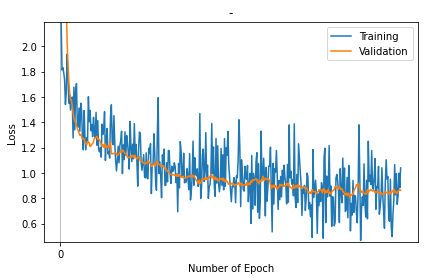

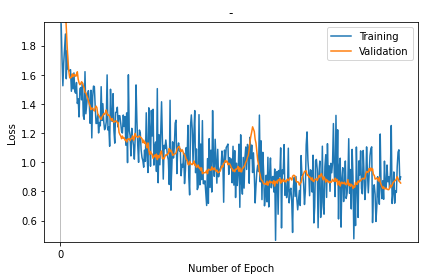

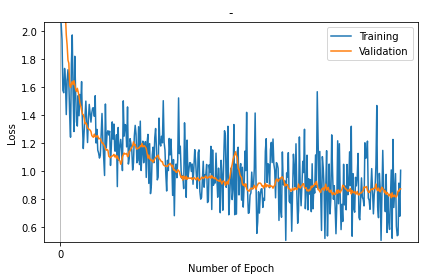

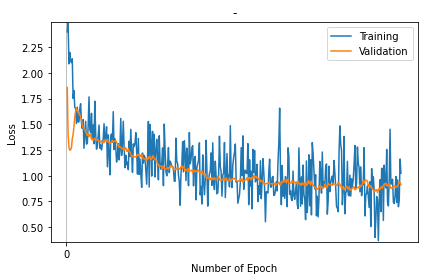

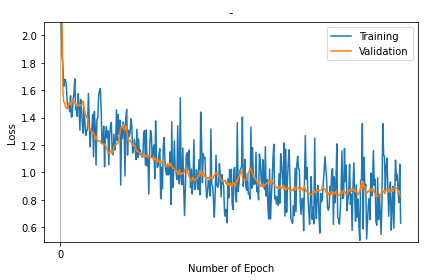

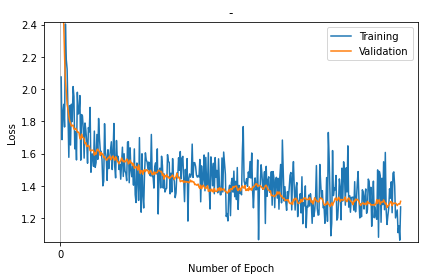

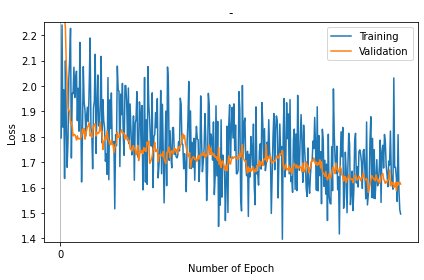

In [9]:
# >> 128-2-50, Epoch: 400, LR: 0.001, DR: 0
Train_Loss= [2.1774497032165527, 1.8127752542495728, 1.8311408758163452, 1.7911994457244873, 1.7365764379501343, 1.539959192276001, 1.634056806564331, 1.9379075765609741, 1.7709718942642212, 1.5502129793167114, 1.6142677068710327, 1.49607515335083, 1.586313009262085, 1.5983439683914185, 1.2759597301483154, 1.6760390996932983, 1.3398363590240479, 1.6507946252822876, 1.7050873041152954, 1.376161813735962, 1.361094355583191, 1.5110933780670166, 1.3287006616592407, 1.5501205921173096, 1.4889891147613525, 1.2852970361709595, 1.1818894147872925, 1.4918912649154663, 1.2768309116363525, 1.1821154356002808, 1.2789978981018066, 1.2471668720245361, 1.6013939380645752, 1.4033244848251343, 1.4927617311477661, 1.3323824405670166, 1.3810569047927856, 1.2861214876174927, 1.438313603401184, 1.326128363609314, 1.2769603729248047, 1.4774681329727173, 1.2184250354766846, 1.4128034114837646, 1.1895396709442139, 1.1660414934158325, 1.1978175640106201, 1.1244020462036133, 1.3843677043914795, 1.3038121461868286, 1.3502318859100342, 1.4835222959518433, 1.0984690189361572, 1.2600265741348267, 1.350440263748169, 1.1508808135986328, 1.167863130569458, 1.1173005104064941, 1.4418399333953857, 1.5370463132858276, 1.242450475692749, 1.2227134704589844, 1.451711893081665, 1.2341821193695068, 1.1003680229187012, 1.0155209302902222, 1.0975381135940552, 1.2105889320373535, 1.0794662237167358, 1.214914083480835, 1.255881428718567, 1.3288474082946777, 0.9939470291137695, 1.2207385301589966, 1.1047145128250122, 1.3239548206329346, 1.1385180950164795, 1.294814944267273, 1.2361161708831787, 1.1522469520568848, 1.0303313732147217, 1.4062683582305908, 1.2153247594833374, 1.0890370607376099, 1.2260653972625732, 1.1113640069961548, 1.3887192010879517, 1.1415050029754639, 1.2245488166809082, 1.086146354675293, 0.8953931927680969, 1.1802794933319092, 1.3214731216430664, 1.3135473728179932, 1.0765613317489624, 1.020745873451233, 1.0822136402130127, 1.1438920497894287, 0.9720988273620605, 0.9605147242546082, 1.1582200527191162, 0.9601171612739563, 0.9541002511978149, 1.1951847076416016, 1.1534526348114014, 1.2302029132843018, 0.8366244435310364, 1.0648906230926514, 1.0662373304367065, 1.3084113597869873, 1.156541347503662, 0.9314303398132324, 0.8630889654159546, 1.2969980239868164, 1.5931724309921265, 0.9946316480636597, 1.0868984460830688, 0.9667007327079773, 0.8043649792671204, 1.142266035079956, 1.0643012523651123, 1.1884181499481201, 0.9005878567695618, 0.903093695640564, 1.0806630849838257, 0.929843544960022, 1.1771292686462402, 1.1750943660736084, 1.0069643259048462, 0.9169191122055054, 1.0526938438415527, 1.010202169418335, 1.0209314823150635, 1.0795753002166748, 1.048279047012329, 0.9238182902336121, 0.991141140460968, 0.6933220624923706, 1.0743482112884521, 0.8821498155593872, 1.2463191747665405, 1.1640790700912476, 0.9714436531066895, 0.9810119867324829, 1.1548360586166382, 0.9217206835746765, 0.9615582227706909, 0.9271649122238159, 1.0330612659454346, 0.9662278890609741, 0.8679990768432617, 1.152282953262329, 0.786429762840271, 0.8560068011283875, 0.9809724688529968, 1.2509849071502686, 0.9026966094970703, 1.119775652885437, 1.000015377998352, 0.9769889116287231, 1.0321651697158813, 0.893353283405304, 0.9176443815231323, 1.4678704738616943, 0.7980787754058838, 0.8862838745117188, 1.144946575164795, 1.1878974437713623, 0.933415412902832, 1.011950135231018, 1.3177344799041748, 0.9529460668563843, 1.0612529516220093, 0.8000728487968445, 0.8873425722122192, 0.9112523198127747, 0.9915607571601868, 1.3903582096099854, 0.9932692646980286, 1.204528570175171, 0.8919659852981567, 0.8147794604301453, 1.2716158628463745, 0.9194304347038269, 1.2141112089157104, 0.9197271466255188, 0.8509508967399597, 0.9229686856269836, 1.192399024963379, 0.9002575874328613, 1.1430449485778809, 0.8661423921585083, 1.2707159519195557, 0.8951226472854614, 1.1978721618652344, 1.1395071744918823, 1.3273741006851196, 1.0646734237670898, 0.9612609148025513, 0.8717153668403625, 0.7723009586334229, 0.894160270690918, 0.8880772590637207, 0.9626744389533997, 0.9313467741012573, 0.7641000747680664, 0.976590633392334, 0.9614039659500122, 1.0965697765350342, 1.4191712141036987, 1.2029377222061157, 0.7334567308425903, 1.1028165817260742, 0.9950594902038574, 0.8711611032485962, 0.8562472462654114, 1.052032709121704, 0.9663679003715515, 0.9475268125534058, 1.0591652393341064, 0.7725054025650024, 0.9002016186714172, 0.9964431524276733, 0.6010205149650574, 1.1375077962875366, 0.7152067422866821, 0.9957931637763977, 0.944851279258728, 0.7450264692306519, 1.0864503383636475, 1.1591323614120483, 0.6889830231666565, 1.0732370615005493, 0.6411553025245667, 0.7703167200088501, 1.3294055461883545, 0.9546793103218079, 0.9795914888381958, 1.1154760122299194, 0.9515829086303711, 0.6601726412773132, 1.0438157320022583, 0.7766296863555908, 0.8923587799072266, 1.0538623332977295, 1.0534517765045166, 1.2026525735855103, 0.8487579226493835, 0.5343706011772156, 1.0753028392791748, 0.7544816732406616, 1.0338001251220703, 1.0066014528274536, 1.1768449544906616, 0.969696044921875, 0.7120426297187805, 0.9397352933883667, 0.7886229753494263, 0.9717334508895874, 0.8107334971427917, 1.020519733428955, 0.893251895904541, 1.0613033771514893, 0.9629068374633789, 0.9143147468566895, 0.7556780576705933, 1.0667779445648193, 0.7691894769668579, 1.3786054849624634, 0.9613438844680786, 1.0127737522125244, 0.9110272526741028, 0.9468733668327332, 0.8191355466842651, 1.3869216442108154, 0.8058794140815735, 0.7266514897346497, 0.9882255792617798, 0.7665008306503296, 1.2300399541854858, 1.116412878036499, 1.0171735286712646, 0.9059419631958008, 0.6639496088027954, 0.8727943301200867, 0.8410884141921997, 0.9010125398635864, 0.703706681728363, 0.7999716997146606, 0.9980555772781372, 0.9704510569572449, 0.7164761424064636, 0.7673877477645874, 0.6540271043777466, 0.7471684813499451, 0.4910860061645508, 1.183834195137024, 0.8059646487236023, 0.8713238835334778, 0.9418132901191711, 0.8343433141708374, 0.5229280591011047, 0.8347689509391785, 0.7418220639228821, 0.8581067323684692, 0.7740064263343811, 0.9222990870475769, 0.8856932520866394, 0.48471084237098694, 1.1235343217849731, 1.194422721862793, 0.6077354550361633, 0.9748431444168091, 0.8110381960868835, 0.9106169939041138, 1.2158968448638916, 0.8158508539199829, 0.896954357624054, 0.5773248672485352, 0.8122882843017578, 0.8062193989753723, 0.5818281173706055, 0.6083196997642517, 0.9577315449714661, 0.9874312281608582, 0.9329068064689636, 0.8492454290390015, 0.6085655093193054, 1.0325361490249634, 0.8435853719711304, 0.7641924619674683, 1.1163538694381714, 0.831282913684845, 1.0384299755096436, 0.695451021194458, 0.7087035775184631, 0.9635388255119324, 0.6458160877227783, 1.05880868434906, 0.9209254384040833, 0.5423591136932373, 0.7597078084945679, 0.6670538187026978, 0.9403495788574219, 0.688773512840271, 0.8224213719367981, 0.808205246925354, 0.6875717043876648, 0.6061421632766724, 0.8501801490783691, 1.3790889978408813, 0.9771674871444702, 0.46631526947021484, 0.7155470252037048, 0.8107870221138, 0.7435977458953857, 1.0710303783416748, 0.7648764848709106, 0.6520875692367554, 0.9415535926818848, 0.6376312375068665, 1.2501254081726074, 0.9323375821113586, 0.9808637499809265, 0.9081112146377563, 1.1762512922286987, 0.8848775029182434, 0.8713730573654175, 0.9742804765701294, 1.1131874322891235, 0.7129648923873901, 0.8928238153457642, 0.8827916383743286, 1.0510908365249634, 0.6742575764656067, 0.7338451147079468, 0.8191863894462585, 1.0400993824005127, 0.821220874786377, 0.7027765512466431, 0.5631374716758728, 0.9279104471206665, 1.1039321422576904, 0.9506551623344421, 0.9713214635848999, 0.630353569984436, 0.6180074214935303, 0.9499890208244324, 0.5675114393234253, 0.4976300597190857, 0.6746565103530884, 0.7810086607933044, 1.0654828548431396, 0.8257744908332825, 0.9929677844047546, 0.752306342124939, 0.8228245973587036, 0.9980684518814087, 0.8825192451477051, 1.0394413471221924]
Test_Loss= [14.917155265808105, 9.408278465270996, 6.535037040710449, 4.948625564575195, 3.5207533836364746, 2.888493537902832, 2.347064733505249, 2.0344600677490234, 1.8625632524490356, 1.7261731624603271, 1.636296272277832, 1.5753694772720337, 1.5768169164657593, 1.5224671363830566, 1.474761724472046, 1.430779218673706, 1.4042094945907593, 1.4011313915252686, 1.374739646911621, 1.3502109050750732, 1.3347735404968262, 1.3165488243103027, 1.2965189218521118, 1.3039183616638184, 1.2887059450149536, 1.266400933265686, 1.2733638286590576, 1.264601469039917, 1.2439687252044678, 1.2312347888946533, 1.2190344333648682, 1.2484973669052124, 1.240275502204895, 1.2395939826965332, 1.2081109285354614, 1.2122089862823486, 1.2276653051376343, 1.229508399963379, 1.2459369897842407, 1.2717978954315186, 1.2783833742141724, 1.2790024280548096, 1.2881978750228882, 1.2649037837982178, 1.2657856941223145, 1.2620656490325928, 1.2457776069641113, 1.231503963470459, 1.2121437788009644, 1.2249360084533691, 1.2042957544326782, 1.1988502740859985, 1.228903889656067, 1.196671485900879, 1.204829454421997, 1.2135069370269775, 1.202305555343628, 1.2250958681106567, 1.2490103244781494, 1.1518422365188599, 1.1499733924865723, 1.1542879343032837, 1.152139663696289, 1.153899908065796, 1.1587307453155518, 1.1507954597473145, 1.1386483907699585, 1.140472412109375, 1.1546112298965454, 1.159205675125122, 1.1786866188049316, 1.1612672805786133, 1.1810252666473389, 1.1750355958938599, 1.1647632122039795, 1.1520144939422607, 1.1491398811340332, 1.1477715969085693, 1.1208932399749756, 1.1210616827011108, 1.1228868961334229, 1.1256396770477295, 1.120163917541504, 1.1387004852294922, 1.1343132257461548, 1.1228747367858887, 1.1409283876419067, 1.130097508430481, 1.119699239730835, 1.1093688011169434, 1.1201136112213135, 1.122391939163208, 1.1260219812393188, 1.0925912857055664, 1.0903340578079224, 1.089869737625122, 1.0837769508361816, 1.0770761966705322, 1.0695669651031494, 1.0736725330352783, 1.0769675970077515, 1.079230785369873, 1.0960979461669922, 1.083786129951477, 1.0863838195800781, 1.0687059164047241, 1.0546427965164185, 1.0497589111328125, 1.0655567646026611, 1.067542552947998, 1.0614540576934814, 1.0551695823669434, 1.0886218547821045, 1.0946543216705322, 1.0699138641357422, 1.0684623718261719, 1.0650436878204346, 1.0518563985824585, 1.0595027208328247, 1.0536911487579346, 1.0580811500549316, 1.0440664291381836, 1.0317350625991821, 1.035480260848999, 1.017998456954956, 1.0119608640670776, 1.00968337059021, 0.9981974363327026, 0.987528920173645, 0.9887062311172485, 0.9840067625045776, 0.9845098257064819, 0.9870234727859497, 0.9831689596176147, 0.9772363901138306, 0.9863712191581726, 0.9720942974090576, 0.9905353784561157, 0.9722810983657837, 0.9878158569335938, 0.9788906574249268, 0.9652225971221924, 0.9675250053405762, 0.972540020942688, 0.9603976607322693, 0.9601352214813232, 0.9561374187469482, 0.9663927555084229, 0.9635952711105347, 0.9688876271247864, 0.9784073829650879, 0.9687596559524536, 0.9762884974479675, 0.9767731428146362, 0.9834794402122498, 0.9684370160102844, 0.9812025427818298, 0.9645398855209351, 0.9512629508972168, 0.9388452768325806, 0.9303991198539734, 0.9188394546508789, 0.9439364671707153, 0.9153522253036499, 0.9192909002304077, 0.9402478933334351, 0.9576697945594788, 0.9483287930488586, 0.947458028793335, 0.9612574577331543, 0.9457372426986694, 0.9625272750854492, 0.9486555457115173, 0.964279294013977, 0.959669828414917, 0.9724692106246948, 0.9830718040466309, 0.9679073095321655, 0.976199746131897, 0.9492772221565247, 0.9509738683700562, 0.9681552648544312, 0.945466160774231, 0.9576630592346191, 0.9396380186080933, 0.9371016025543213, 0.9520065188407898, 0.9553964734077454, 0.9465814232826233, 0.9577838182449341, 0.9399725198745728, 0.9585598707199097, 0.9293924570083618, 0.9436466693878174, 0.9364421367645264, 0.9348965883255005, 0.9204098582267761, 0.9103443622589111, 0.9086320400238037, 0.9047812819480896, 0.917701244354248, 0.9156128168106079, 0.9172332882881165, 0.90995192527771, 0.8987792134284973, 0.9050297737121582, 0.9088976979255676, 0.9111886024475098, 0.9241639971733093, 0.9139554500579834, 0.8964002132415771, 0.9193836450576782, 0.910192608833313, 0.9051955342292786, 0.901000440120697, 0.9064448475837708, 0.9079161882400513, 0.9013481140136719, 0.9244617819786072, 0.8978538513183594, 0.9094020128250122, 0.9219878315925598, 0.9090031981468201, 0.9372711181640625, 0.9239073991775513, 0.9466283321380615, 0.9457195401191711, 0.9417324066162109, 0.9481778144836426, 0.9551733732223511, 0.9396596550941467, 0.9442057013511658, 0.9129606485366821, 0.9240530729293823, 0.938809871673584, 0.936498761177063, 0.9345667362213135, 0.9723860621452332, 0.9481639862060547, 0.9392802715301514, 0.9603151082992554, 0.9489909410476685, 0.9492506384849548, 0.9564472436904907, 0.9475593566894531, 0.9393317103385925, 0.9090924263000488, 0.8775476813316345, 0.9022237062454224, 0.8865618705749512, 0.9034997224807739, 0.8846690654754639, 0.9008293151855469, 0.88701331615448, 0.8684240579605103, 0.8818122148513794, 0.8893864750862122, 0.9103220701217651, 0.898047924041748, 0.9092073440551758, 0.8950288891792297, 0.9048682451248169, 0.8945004940032959, 0.8974771499633789, 0.8972345590591431, 0.9184801578521729, 0.9023391008377075, 0.9201874136924744, 0.8955974578857422, 0.8889733552932739, 0.8831775188446045, 0.8776514530181885, 0.8729735016822815, 0.9066364765167236, 0.8803753852844238, 0.8821122646331787, 0.899804413318634, 0.885595977306366, 0.9067854285240173, 0.8979177474975586, 0.9012051820755005, 0.8847273588180542, 0.8776376247406006, 0.8869635462760925, 0.8862310647964478, 0.8933289051055908, 0.8791524171829224, 0.8877438306808472, 0.8825092315673828, 0.8732903003692627, 0.8460670709609985, 0.8487054109573364, 0.8407050371170044, 0.8500247597694397, 0.8343479633331299, 0.8675726056098938, 0.8536409735679626, 0.8530063629150391, 0.8516813516616821, 0.8498173952102661, 0.8329875469207764, 0.8479899168014526, 0.8499871492385864, 0.8670912981033325, 0.8612380027770996, 0.8682525157928467, 0.8658270239830017, 0.8403002619743347, 0.8730735778808594, 0.8753833770751953, 0.8387598991394043, 0.8590080738067627, 0.846094012260437, 0.8496400117874146, 0.8695797920227051, 0.8346735239028931, 0.8421520590782166, 0.8346754312515259, 0.8537100553512573, 0.8575726747512817, 0.8639200925827026, 0.8662985563278198, 0.892316460609436, 0.8835591077804565, 0.8840187788009644, 0.8783460855484009, 0.870063066482544, 0.8954987525939941, 0.8833173513412476, 0.8684327602386475, 0.8758469223976135, 0.8510186076164246, 0.8540692925453186, 0.830542802810669, 0.8264854550361633, 0.8419694304466248, 0.8198206424713135, 0.8401479721069336, 0.8397058844566345, 0.803727388381958, 0.8242674469947815, 0.8243808746337891, 0.8309425115585327, 0.8294050693511963, 0.8581922054290771, 0.8733360767364502, 0.8826518654823303, 0.9067350029945374, 0.9004220962524414, 0.918561577796936, 0.9053930640220642, 0.8606069087982178, 0.8647576570510864, 0.8519853949546814, 0.8434945940971375, 0.8568673133850098, 0.839252233505249, 0.8365620374679565, 0.8325018882751465, 0.831822395324707, 0.8667076826095581, 0.8441745042800903, 0.8609322905540466, 0.8608068227767944, 0.8706001043319702, 0.8636022806167603, 0.8562965393066406, 0.8599167466163635, 0.8612881302833557, 0.8424406051635742, 0.8489097356796265, 0.8487576246261597, 0.8603743314743042, 0.8379849195480347, 0.8431292772293091, 0.8417918682098389, 0.846001923084259, 0.8351784944534302, 0.8285542726516724, 0.8262671232223511, 0.8437416553497314, 0.8536931276321411, 0.8441305160522461, 0.8452231884002686, 0.8382713794708252, 0.837352991104126, 0.8531911969184875, 0.8346911668777466, 0.8373008370399475, 0.8537659645080566, 0.8570512533187866, 0.8746620416641235, 0.8440462350845337, 0.8573006391525269, 0.8354635834693909, 0.8411457538604736, 0.8579927682876587, 0.8609815835952759, 0.8676432371139526, 0.8628004193305969]
lossGraph(Train_Loss, Test_Loss)

# >> 128-2-50, Epoch: 400, LR: 0.001, DR: 0.3
Train_Loss= [1.9496028423309326, 1.7102638483047485, 1.524789810180664, 1.682491660118103, 1.7877861261367798, 1.8799927234649658, 1.5727475881576538, 1.7640905380249023, 1.6399908065795898, 1.6303632259368896, 1.6271657943725586, 1.6350005865097046, 1.4867922067642212, 1.6010822057724, 1.5034592151641846, 1.61294686794281, 1.484911561012268, 1.4737508296966553, 1.5471079349517822, 1.4034090042114258, 1.4352062940597534, 1.3108168840408325, 1.5046180486679077, 1.5124118328094482, 1.428144931793213, 1.5448194742202759, 1.3190515041351318, 1.2945235967636108, 1.6214923858642578, 1.3325307369232178, 1.399662733078003, 1.4580962657928467, 1.4913017749786377, 1.4156543016433716, 1.267187476158142, 1.4939460754394531, 1.1668260097503662, 1.4478461742401123, 1.5224899053573608, 1.519376516342163, 1.3819937705993652, 1.2653234004974365, 1.2681148052215576, 1.3299105167388916, 1.20096755027771, 1.2726885080337524, 1.2496130466461182, 1.5183700323104858, 1.2866308689117432, 1.4013584852218628, 1.282433271408081, 1.2231380939483643, 1.2351163625717163, 1.2784299850463867, 1.5992933511734009, 1.2206032276153564, 1.2432284355163574, 1.1096428632736206, 1.5008572340011597, 1.3083723783493042, 1.2799888849258423, 1.4705030918121338, 1.2159347534179688, 1.1308484077453613, 1.3416197299957275, 1.3442766666412354, 1.37738835811615, 1.2408183813095093, 1.3199058771133423, 1.3182666301727295, 1.2683990001678467, 1.2101287841796875, 1.2006338834762573, 1.3238847255706787, 1.2455482482910156, 1.3135963678359985, 1.1165645122528076, 1.3383616209030151, 0.997215747833252, 1.6000072956085205, 1.220008134841919, 1.1835987567901611, 1.0430164337158203, 1.2325613498687744, 1.1631091833114624, 1.1139347553253174, 1.0211751461029053, 1.1670252084732056, 1.5305113792419434, 1.2907047271728516, 1.1165369749069214, 0.9992710947990417, 1.2206652164459229, 1.198848843574524, 1.0841584205627441, 1.0324885845184326, 1.010603427886963, 0.9658114314079285, 1.0826929807662964, 1.0063865184783936, 1.3392549753189087, 1.0451377630233765, 0.9293943643569946, 1.3733325004577637, 1.2348650693893433, 0.9726864099502563, 1.3553597927093506, 1.1802237033843994, 1.3634557723999023, 0.9802907705307007, 1.104650616645813, 1.1390111446380615, 0.936590850353241, 1.5052684545516968, 0.8592469096183777, 1.1882925033569336, 0.9822848439216614, 1.1951024532318115, 1.4148242473602295, 1.1585283279418945, 0.8840562701225281, 1.116159200668335, 1.0930404663085938, 1.1525180339813232, 1.0942580699920654, 1.0415327548980713, 1.015166997909546, 0.847181499004364, 1.4251105785369873, 0.8080415725708008, 0.960408091545105, 1.1397982835769653, 1.02870774269104, 1.103837251663208, 1.2678253650665283, 1.2884695529937744, 0.9218908548355103, 1.0975406169891357, 1.1322697401046753, 1.0774309635162354, 1.0916709899902344, 0.9073953628540039, 0.9855896234512329, 0.967068076133728, 1.063594937324524, 0.8533940315246582, 0.9404964447021484, 1.1004396677017212, 1.0117506980895996, 1.2530076503753662, 0.8993682861328125, 0.7757936716079712, 1.2502915859222412, 1.3245997428894043, 1.2290306091308594, 0.9984301328659058, 1.1945774555206299, 1.3545223474502563, 0.9281121492385864, 1.0910637378692627, 0.8122069239616394, 0.8279598355293274, 1.326451063156128, 0.844764232635498, 1.1248472929000854, 0.8808210492134094, 1.2855243682861328, 0.8540342450141907, 0.8523103594779968, 0.8729413747787476, 0.7899187803268433, 0.7030105590820312, 1.0250481367111206, 0.7176441550254822, 1.1619826555252075, 0.8270206451416016, 1.0827754735946655, 0.7954179048538208, 1.3543570041656494, 1.0220361948013306, 0.9027450680732727, 1.1576567888259888, 0.9990704655647278, 0.8561419248580933, 1.0883195400238037, 0.9001744985580444, 0.9383109211921692, 0.9581526517868042, 0.9751803278923035, 1.0767910480499268, 1.018842101097107, 0.7253936529159546, 1.0832349061965942, 1.000537395477295, 1.1012879610061646, 1.1110163927078247, 1.1246817111968994, 0.9165641665458679, 1.0314793586730957, 0.96271812915802, 1.022244930267334, 0.8589301109313965, 1.1095261573791504, 0.8428443074226379, 1.0797092914581299, 0.7576847076416016, 0.9934799075126648, 0.8402656316757202, 0.9355095028877258, 1.1241042613983154, 0.6905905604362488, 1.1880345344543457, 0.8580533266067505, 0.7811525464057922, 1.0329813957214355, 0.8221684694290161, 1.0307608842849731, 1.1045949459075928, 0.9503809213638306, 1.122380018234253, 1.0949903726577759, 0.8556908369064331, 1.171477198600769, 1.0250647068023682, 1.1177760362625122, 0.9294099807739258, 1.0644891262054443, 0.9169260263442993, 0.7206836938858032, 0.8399977684020996, 0.9361039996147156, 0.9790131449699402, 0.9367354512214661, 1.3234418630599976, 0.8651399612426758, 1.146599531173706, 0.7435301542282104, 1.06800377368927, 0.9295891523361206, 0.7006443738937378, 0.7766314744949341, 0.9104076623916626, 0.7280157804489136, 1.0339256525039673, 0.6930387020111084, 0.9197238087654114, 1.0289644002914429, 0.8244655728340149, 0.8960562944412231, 0.9022367596626282, 0.7955737709999084, 0.9535744786262512, 0.4638664126396179, 0.925934910774231, 0.9370337724685669, 0.6431124210357666, 0.943309485912323, 0.9038981199264526, 1.0984572172164917, 0.548934817314148, 0.947422206401825, 0.9207132458686829, 1.120813012123108, 0.7731906175613403, 0.862769603729248, 0.7568939924240112, 0.8000127077102661, 1.096440076828003, 0.721015989780426, 0.8049885630607605, 0.8215968012809753, 0.7365659475326538, 0.5179458260536194, 0.836182713508606, 0.8964358568191528, 0.7647014856338501, 0.9016949534416199, 0.7486924529075623, 0.6733869314193726, 0.7359911799430847, 0.8060266375541687, 0.7028997540473938, 1.0455492734909058, 0.910636305809021, 0.9139106869697571, 0.8473798632621765, 0.7098819017410278, 0.8006361126899719, 1.11843740940094, 1.207944631576538, 1.015112280845642, 0.9291497468948364, 0.770170271396637, 0.9479134678840637, 0.9391091465950012, 0.7953135967254639, 1.0482182502746582, 0.5832656621932983, 0.6920076012611389, 1.009642481803894, 1.0189759731292725, 0.9492894411087036, 0.5506292581558228, 0.9197147488594055, 1.007947564125061, 0.6211165189743042, 0.7258403301239014, 1.1100807189941406, 0.6949955224990845, 0.6433671116828918, 0.9705802202224731, 1.0508872270584106, 0.7586669325828552, 1.1273186206817627, 0.8693541288375854, 0.9751055836677551, 0.8004517555236816, 0.9924399256706238, 0.9277326464653015, 0.9975183606147766, 1.2653908729553223, 0.926709771156311, 0.7642796039581299, 1.3215363025665283, 0.8703049421310425, 1.2223821878433228, 0.6106039881706238, 0.9722113609313965, 1.027766466140747, 0.5546537637710571, 0.8872097730636597, 0.9621394872665405, 0.7301928400993347, 0.8331920504570007, 1.008287787437439, 0.7515068054199219, 0.7840174436569214, 0.8681332468986511, 1.161442518234253, 0.7861016988754272, 0.9500967264175415, 0.6796377897262573, 1.0880247354507446, 0.9012210965156555, 0.47435617446899414, 0.837042510509491, 0.5654005408287048, 1.10440194606781, 0.8291885256767273, 0.6212552785873413, 1.0091674327850342, 0.9122522473335266, 1.0777804851531982, 0.8200654983520508, 0.7833844423294067, 1.0807292461395264, 0.9260045886039734, 0.7439174652099609, 0.8401336669921875, 1.105137825012207, 0.9267274141311646, 0.790023922920227, 0.9102944135665894, 1.0442427396774292, 1.093110203742981, 1.1055591106414795, 0.585817813873291, 0.8091645240783691, 0.8449563980102539, 0.778040885925293, 0.5934867858886719, 0.6944693326950073, 0.900173544883728, 0.7684891223907471, 0.7113985419273376, 1.193738341331482, 0.8351970911026001, 0.7505092620849609, 0.8736953735351562, 0.7452783584594727, 1.0074801445007324, 0.830340564250946, 0.8196905255317688, 0.9810096621513367, 0.8660750389099121, 0.9003573656082153, 0.8224331736564636, 0.9332548975944519, 1.2519806623458862, 0.7168641686439514, 0.7871766090393066, 0.9332107305526733, 0.7188714742660522, 0.8023033142089844, 0.793387234210968, 0.9699870347976685, 1.0693409442901611, 1.0852365493774414, 0.8773984909057617, 0.8989885449409485]
Test_Loss= [4.174563407897949, 3.199336051940918, 2.6528499126434326, 2.4114065170288086, 2.2154157161712646, 2.045046806335449, 1.9146020412445068, 1.8009045124053955, 1.6960351467132568, 1.6236804723739624, 1.5796711444854736, 1.5782721042633057, 1.5821208953857422, 1.6064496040344238, 1.5875080823898315, 1.6010005474090576, 1.602703332901001, 1.5899202823638916, 1.5946636199951172, 1.6205896139144897, 1.5694553852081299, 1.545661449432373, 1.53208327293396, 1.540246605873108, 1.5527231693267822, 1.5433858633041382, 1.525006890296936, 1.506854772567749, 1.479224681854248, 1.4766404628753662, 1.4587830305099487, 1.4403691291809082, 1.422165870666504, 1.4003428220748901, 1.3856850862503052, 1.3606414794921875, 1.3711743354797363, 1.3704272508621216, 1.3621282577514648, 1.351544976234436, 1.3718369007110596, 1.3850703239440918, 1.3742214441299438, 1.3310003280639648, 1.3204368352890015, 1.3148751258850098, 1.3017966747283936, 1.294187307357788, 1.3109376430511475, 1.320556879043579, 1.3331892490386963, 1.32789945602417, 1.341469168663025, 1.358513355255127, 1.3345723152160645, 1.3217122554779053, 1.32364821434021, 1.3154592514038086, 1.2975091934204102, 1.2871036529541016, 1.3002703189849854, 1.2814466953277588, 1.2736624479293823, 1.2820664644241333, 1.2801767587661743, 1.2833106517791748, 1.2704577445983887, 1.2725086212158203, 1.205066204071045, 1.1903598308563232, 1.1803348064422607, 1.1612675189971924, 1.1796845197677612, 1.1634652614593506, 1.1686514616012573, 1.1518876552581787, 1.1522154808044434, 1.139085054397583, 1.1587024927139282, 1.158937692642212, 1.1614116430282593, 1.1482646465301514, 1.1608531475067139, 1.1636511087417603, 1.1811609268188477, 1.1506659984588623, 1.1626819372177124, 1.1974766254425049, 1.1771557331085205, 1.1757967472076416, 1.1701653003692627, 1.1751422882080078, 1.1809923648834229, 1.171776294708252, 1.1685734987258911, 1.1613638401031494, 1.133831262588501, 1.151971459388733, 1.1292831897735596, 1.138015627861023, 1.1138567924499512, 1.0985329151153564, 1.1328482627868652, 1.0807174444198608, 1.0527284145355225, 1.0735735893249512, 1.0601632595062256, 1.0546224117279053, 1.0274487733840942, 1.0380200147628784, 1.0492892265319824, 1.0357435941696167, 1.055976152420044, 1.0177985429763794, 1.045076847076416, 1.0308358669281006, 1.0471959114074707, 1.0688793659210205, 1.07725191116333, 1.023378610610962, 1.0282182693481445, 1.023376226425171, 1.0403443574905396, 1.0503102540969849, 1.047660231590271, 1.0568444728851318, 1.058384895324707, 1.093937873840332, 1.07168710231781, 1.0831643342971802, 1.0722911357879639, 1.0475375652313232, 1.051086664199829, 1.0567412376403809, 1.0576800107955933, 1.0635530948638916, 1.0854196548461914, 1.0987707376480103, 1.1060945987701416, 1.107593059539795, 1.0791645050048828, 1.0733318328857422, 1.0867674350738525, 1.0763225555419922, 1.0569230318069458, 1.052973747253418, 1.0408254861831665, 1.0186009407043457, 1.0144977569580078, 0.9869089126586914, 0.98111891746521, 1.0064435005187988, 0.9897247552871704, 0.9870588779449463, 0.9833522439002991, 0.9928699135780334, 1.0088554620742798, 0.9792577624320984, 0.9867977499961853, 0.9641095399856567, 0.9703863263130188, 0.980399489402771, 0.9615722894668579, 0.9638780355453491, 0.9437012672424316, 0.9612996578216553, 0.9215023517608643, 0.9288196563720703, 0.9285001754760742, 0.9269862174987793, 0.9320152401924133, 0.9439836740493774, 0.9214376211166382, 0.9519751667976379, 0.9488740563392639, 0.9492260217666626, 0.9442150592803955, 0.9680019617080688, 0.9528541564941406, 0.9483256340026855, 0.961240291595459, 0.9480740427970886, 0.9382619261741638, 0.9462711811065674, 0.9285712838172913, 0.9291694164276123, 0.9341062307357788, 0.9404560327529907, 0.9590657949447632, 0.9743406772613525, 0.9672802686691284, 0.9931340217590332, 0.9953530430793762, 1.011954665184021, 1.0030850172042847, 1.007883071899414, 0.9831680655479431, 0.9930424690246582, 0.9891574382781982, 0.9783282279968262, 0.9618423581123352, 0.9548252820968628, 0.9382333755493164, 0.9458126425743103, 0.9348761439323425, 0.9516993761062622, 0.9522773027420044, 0.9574534893035889, 0.9707565903663635, 0.9376024603843689, 0.9617762565612793, 0.9354753494262695, 0.9339760541915894, 0.9590393304824829, 0.9603363275527954, 0.9711278676986694, 0.9812883138656616, 1.0000174045562744, 1.0121369361877441, 1.033357858657837, 1.0479836463928223, 1.0889992713928223, 1.144909381866455, 1.1813726425170898, 1.20914888381958, 1.2429347038269043, 1.228044033050537, 1.211326241493225, 1.1575942039489746, 1.131260633468628, 1.0753257274627686, 1.0150539875030518, 0.9838220477104187, 0.933319628238678, 0.9118186235427856, 0.8790215253829956, 0.8763383626937866, 0.8652325868606567, 0.8512523174285889, 0.8510304689407349, 0.8552755117416382, 0.8465590476989746, 0.8697513341903687, 0.8418631553649902, 0.8616117238998413, 0.8713738322257996, 0.8570546507835388, 0.864479660987854, 0.864375650882721, 0.8529620170593262, 0.8730108737945557, 0.8361687064170837, 0.8644342422485352, 0.8705064654350281, 0.8555121421813965, 0.8799529075622559, 0.8736290335655212, 0.887447714805603, 0.8558573722839355, 0.8765458464622498, 0.8663204908370972, 0.8836572170257568, 0.8671767711639404, 0.8714475035667419, 0.8644380569458008, 0.8762633800506592, 0.8845369219779968, 0.8728405237197876, 0.8813165426254272, 0.893929660320282, 0.8869242668151855, 0.8773390054702759, 0.902560293674469, 0.9103413820266724, 0.9096214771270752, 0.9036011099815369, 0.8726131916046143, 0.8640538454055786, 0.8651251792907715, 0.8630810379981995, 0.8434213399887085, 0.8561722040176392, 0.8607290983200073, 0.8897579908370972, 0.910014271736145, 0.9215128421783447, 0.936568021774292, 0.9383625388145447, 0.9406635761260986, 0.9113925099372864, 0.9136494994163513, 0.8997417092323303, 0.901565432548523, 0.8899656534194946, 0.8776513934135437, 0.8936113715171814, 0.8697950839996338, 0.867464542388916, 0.880321741104126, 0.8832906484603882, 0.8851479887962341, 0.8744208216667175, 0.8900087475776672, 0.9090838432312012, 0.8980331420898438, 0.9132760167121887, 0.921772301197052, 0.8962174654006958, 0.8789910078048706, 0.8997291326522827, 0.8867685198783875, 0.8630727529525757, 0.8817716836929321, 0.867314338684082, 0.8706257939338684, 0.8585327863693237, 0.8684680461883545, 0.8604694604873657, 0.8676696419715881, 0.8823215961456299, 0.8705604672431946, 0.8689526319503784, 0.8909413814544678, 0.8684244751930237, 0.8833601474761963, 0.8436682224273682, 0.8674119710922241, 0.870175838470459, 0.8363047242164612, 0.8570342063903809, 0.8636167049407959, 0.853500485420227, 0.8538554906845093, 0.8629990816116333, 0.8460477590560913, 0.8489061594009399, 0.849989652633667, 0.8808420896530151, 0.8402693271636963, 0.8542206287384033, 0.8349564075469971, 0.8484607934951782, 0.8415888547897339, 0.8195538520812988, 0.8366298675537109, 0.8285576701164246, 0.8622591495513916, 0.8507437109947205, 0.847407877445221, 0.8710002303123474, 0.8635611534118652, 0.8764113783836365, 0.8716772794723511, 0.8821978569030762, 0.8885158896446228, 0.8896169662475586, 0.8839964866638184, 0.8927521705627441, 0.9191169738769531, 0.9370734691619873, 0.9306347370147705, 0.932712197303772, 0.9566673636436462, 0.9393075704574585, 0.9604045152664185, 0.9439011812210083, 0.9551666975021362, 0.914830207824707, 0.910456657409668, 0.8839913606643677, 0.8861549496650696, 0.8919106721878052, 0.8847733736038208, 0.8705897927284241, 0.8977883458137512, 0.8636646270751953, 0.8484938740730286, 0.8324611186981201, 0.8206290006637573, 0.83109050989151, 0.8170616626739502, 0.8183627128601074, 0.8223201036453247, 0.8149482011795044, 0.8123170137405396, 0.8113819360733032, 0.8218475580215454, 0.842589259147644, 0.8304933905601501, 0.8421777486801147, 0.8592731356620789, 0.8649395704269409, 0.8725826740264893, 0.8746062517166138, 0.8853313326835632, 0.9004800319671631, 0.8868162631988525, 0.8708840608596802, 0.8649964332580566, 0.857201874256134]
lossGraph(Train_Loss, Test_Loss)

# >> 128-2-50, Epoch: 400, LR: 0.001, DR: 0.4
Train_Loss= [2.0549237728118896, 1.9408349990844727, 1.579599380493164, 1.5623859167099, 1.7359542846679688, 1.6517616510391235, 1.4063374996185303, 1.6516956090927124, 1.7266381978988647, 1.6374902725219727, 1.4009979963302612, 1.2446389198303223, 1.7642751932144165, 1.9751886129379272, 1.5631039142608643, 1.285036325454712, 1.8227355480194092, 1.5643116235733032, 1.354299783706665, 1.3241132497787476, 1.541942834854126, 1.3979527950286865, 1.5493910312652588, 1.4693963527679443, 1.6417458057403564, 1.3318681716918945, 1.1633518934249878, 1.2850935459136963, 1.3873775005340576, 1.5024946928024292, 1.3579949140548706, 1.206536054611206, 1.3697564601898193, 1.4789412021636963, 1.4134409427642822, 1.3525575399398804, 1.4175904989242554, 1.4532215595245361, 1.4546453952789307, 1.3935773372650146, 1.5408260822296143, 1.2030565738677979, 1.3003379106521606, 1.152203917503357, 1.1316001415252686, 1.0954800844192505, 1.1127729415893555, 1.2608739137649536, 1.4140739440917969, 1.2196869850158691, 1.1014788150787354, 0.9710365533828735, 1.4816426038742065, 1.1677004098892212, 1.2740846872329712, 1.290869116783142, 1.2601951360702515, 1.2873790264129639, 1.0427844524383545, 1.1855913400650024, 1.3538668155670166, 1.2306745052337646, 1.3385827541351318, 1.1458446979522705, 1.1454579830169678, 1.262197494506836, 0.8915935754776001, 1.314028024673462, 1.0795929431915283, 1.1704320907592773, 1.2287839651107788, 1.1645886898040771, 1.0060927867889404, 1.5042409896850586, 1.2525525093078613, 1.334950566291809, 1.3294821977615356, 1.1752969026565552, 1.4608385562896729, 1.052804708480835, 1.094818353652954, 1.2341068983078003, 1.1987065076828003, 1.153362512588501, 1.010137915611267, 1.061134696006775, 1.2548171281814575, 1.3290374279022217, 1.266545057296753, 1.0619558095932007, 1.0782877206802368, 1.3193877935409546, 1.049058198928833, 1.3594305515289307, 1.0065654516220093, 1.1422450542449951, 1.2164506912231445, 1.0618442296981812, 1.1693576574325562, 1.2131702899932861, 0.9571679830551147, 1.2070363759994507, 1.2646782398223877, 0.9143165349960327, 1.1989307403564453, 0.8414226770401001, 0.9032415151596069, 1.1156246662139893, 1.1729753017425537, 1.0620921850204468, 1.2409073114395142, 1.3065364360809326, 1.1632072925567627, 0.9396872520446777, 0.9593433141708374, 1.38132643699646, 1.2046109437942505, 1.1814138889312744, 1.2512564659118652, 1.204393982887268, 1.5055184364318848, 1.206895112991333, 1.1534101963043213, 0.9818421602249146, 0.8601603507995605, 1.0791239738464355, 1.0062239170074463, 1.235658884048462, 1.1183134317398071, 1.2311756610870361, 1.0801101922988892, 0.8288416862487793, 1.0846836566925049, 0.6836015582084656, 1.0181337594985962, 1.0525932312011719, 0.9548447728157043, 1.0847162008285522, 1.525254487991333, 1.127488374710083, 1.180377721786499, 1.0037835836410522, 0.9502733945846558, 0.9685229063034058, 0.8772163391113281, 1.3471601009368896, 1.1093839406967163, 0.8146075010299683, 1.2236837148666382, 0.9537802934646606, 1.003376841545105, 1.0623763799667358, 1.061354160308838, 0.9997020959854126, 1.0526788234710693, 0.9082431793212891, 1.0342419147491455, 1.155427098274231, 1.077483892440796, 0.9602950811386108, 0.8787243962287903, 1.1336041688919067, 1.1540677547454834, 0.8578044176101685, 0.8017114400863647, 0.8144054412841797, 0.9421122670173645, 1.072323203086853, 0.8872469067573547, 0.9760563969612122, 0.9742856025695801, 1.0498944520950317, 0.7777329683303833, 0.7889369130134583, 1.0471664667129517, 0.9934825897216797, 1.1792218685150146, 0.7279021739959717, 1.1534370183944702, 0.9014943242073059, 0.9414532780647278, 0.9173530340194702, 1.1307686567306519, 0.9503899812698364, 0.815888524055481, 1.0236170291900635, 0.9061328768730164, 0.7049322128295898, 1.0793184041976929, 0.9755171537399292, 0.7229480743408203, 1.0734002590179443, 1.2905369997024536, 1.2592309713363647, 0.8864629864692688, 0.9803746342658997, 1.3224756717681885, 0.6898931264877319, 0.8071914911270142, 0.9562387466430664, 1.0250605344772339, 0.7988446950912476, 0.8766533732414246, 1.3349273204803467, 0.6905825734138489, 1.052083969116211, 0.6948508620262146, 1.1417922973632812, 1.1729300022125244, 0.8319655656814575, 0.9923189878463745, 1.0558578968048096, 0.7951262593269348, 1.0294185876846313, 0.7451853156089783, 0.8913614153862, 1.1450308561325073, 1.0057331323623657, 1.42218017578125, 0.8748483657836914, 0.7007583975791931, 0.7048004865646362, 0.8302786946296692, 0.8466529846191406, 0.9949965476989746, 0.8760194778442383, 0.8832976222038269, 1.0177686214447021, 1.4174458980560303, 0.934775173664093, 0.5573502779006958, 0.6393465995788574, 0.8544467687606812, 0.702366292476654, 0.8298135995864868, 0.8736388087272644, 0.8764172792434692, 0.7427189946174622, 0.8079325556755066, 0.7931114435195923, 1.1443523168563843, 1.233812689781189, 0.9215337038040161, 1.0553196668624878, 1.0468260049819946, 0.8834294080734253, 1.1542882919311523, 1.207632303237915, 1.063143014907837, 1.231589913368225, 1.0519765615463257, 1.009069561958313, 0.8112683296203613, 1.06300687789917, 1.0513242483139038, 1.0214992761611938, 0.649937093257904, 0.9519912600517273, 0.726888120174408, 0.6727801561355591, 1.1391139030456543, 0.9072331190109253, 0.9015318155288696, 0.9326784014701843, 0.5071449875831604, 0.9891940355300903, 0.9600769877433777, 1.1341639757156372, 0.7867009043693542, 0.7756569385528564, 0.850096583366394, 0.5726624131202698, 0.8382730484008789, 1.1230870485305786, 1.0232435464859009, 0.8898792266845703, 1.197554111480713, 0.8396297693252563, 0.6298287510871887, 0.7202379107475281, 1.2463468313217163, 0.8800519704818726, 0.754779577255249, 0.9004594683647156, 1.0723812580108643, 0.9919112324714661, 1.3013324737548828, 0.7338715195655823, 0.8630515933036804, 1.1161237955093384, 0.7250514030456543, 0.9473055601119995, 0.8378947377204895, 0.9415740966796875, 0.7124552130699158, 1.0546993017196655, 0.7325303554534912, 0.8913677930831909, 0.8457146883010864, 1.117696762084961, 0.8861356973648071, 1.5696648359298706, 1.2408268451690674, 0.87480628490448, 1.1427547931671143, 0.8452455401420593, 0.5781084895133972, 1.1056663990020752, 1.0284062623977661, 0.8877280950546265, 0.5211840271949768, 0.8751711845397949, 1.1480869054794312, 0.5387541055679321, 0.8154333233833313, 1.052787184715271, 0.6963881254196167, 0.8078421354293823, 1.2611196041107178, 0.9940956830978394, 0.8010474443435669, 0.8975205421447754, 0.7465215921401978, 0.5546761751174927, 0.7730664014816284, 1.2188771963119507, 0.7690868973731995, 1.1978559494018555, 0.8193955421447754, 0.5841429829597473, 0.7649942636489868, 0.6424187421798706, 1.0509999990463257, 0.7608632445335388, 0.8957381248474121, 0.7257816195487976, 1.049756407737732, 0.8333271145820618, 0.9033738970756531, 1.1399670839309692, 0.8982950448989868, 1.3227254152297974, 0.5370242595672607, 0.9839011430740356, 0.7347391843795776, 0.7087094187736511, 0.9578186869621277, 0.8969012498855591, 0.9643006324768066, 1.1285916566848755, 0.671126127243042, 0.6547852158546448, 0.808116614818573, 0.9535716772079468, 0.8152840733528137, 0.8002960085868835, 0.7534786462783813, 1.2045507431030273, 1.0939204692840576, 1.1201502084732056, 1.2165075540542603, 0.809424877166748, 0.794671893119812, 0.7293893098831177, 0.8667184710502625, 1.0200951099395752, 0.8595120310783386, 0.696719765663147, 0.8372297286987305, 0.890386700630188, 1.0476914644241333, 1.4710285663604736, 0.745589554309845, 0.6695693731307983, 0.9861311912536621, 0.8774335980415344, 0.5071045160293579, 0.846993088722229, 1.1503560543060303, 0.8766706585884094, 0.8698565363883972, 0.7126973271369934, 0.9790207743644714, 0.5640679597854614, 0.8258358836174011, 0.6380071043968201, 0.5854176878929138, 0.8094738721847534, 1.0106369256973267, 0.522396981716156, 1.2286226749420166, 0.7422429323196411, 0.8677164316177368, 0.9845415353775024, 0.6090413331985474, 0.5406941771507263, 0.5457070469856262, 0.9164568185806274, 0.6798768043518066, 1.0082194805145264]
Test_Loss= [7.863407611846924, 5.369505882263184, 3.418689250946045, 2.7148284912109375, 2.3388218879699707, 2.11832857131958, 1.975598692893982, 1.9023619890213013, 1.7949349880218506, 1.77322256565094, 1.618234634399414, 1.6000192165374756, 1.6258177757263184, 1.6416494846343994, 1.620367169380188, 1.6486120223999023, 1.6195435523986816, 1.5863264799118042, 1.571791410446167, 1.5938951969146729, 1.5679104328155518, 1.5371146202087402, 1.490405797958374, 1.466871976852417, 1.4381802082061768, 1.4097144603729248, 1.4058557748794556, 1.3825101852416992, 1.34084153175354, 1.3465412855148315, 1.3331506252288818, 1.3098607063293457, 1.3055849075317383, 1.3002666234970093, 1.295099139213562, 1.285662055015564, 1.256287693977356, 1.2486257553100586, 1.2442591190338135, 1.266444206237793, 1.2506930828094482, 1.2455236911773682, 1.25433349609375, 1.2543516159057617, 1.2325823307037354, 1.2358543872833252, 1.2333317995071411, 1.217816710472107, 1.2029528617858887, 1.2039833068847656, 1.190727949142456, 1.1838003396987915, 1.1630640029907227, 1.1515085697174072, 1.156398892402649, 1.1497948169708252, 1.1073843240737915, 1.103830337524414, 1.0984909534454346, 1.1068414449691772, 1.1096298694610596, 1.1130706071853638, 1.1214693784713745, 1.1040740013122559, 1.1155414581298828, 1.0942018032073975, 1.110170602798462, 1.0914671421051025, 1.0808629989624023, 1.0765267610549927, 1.0513224601745605, 1.0661379098892212, 1.104971170425415, 1.1181598901748657, 1.1310937404632568, 1.1243994235992432, 1.1255927085876465, 1.1291725635528564, 1.105095624923706, 1.1113677024841309, 1.1423819065093994, 1.1467275619506836, 1.1638033390045166, 1.1709285974502563, 1.1834402084350586, 1.211796760559082, 1.1877124309539795, 1.1930855512619019, 1.1685019731521606, 1.1598198413848877, 1.1640039682388306, 1.168166995048523, 1.169691801071167, 1.18155038356781, 1.1791311502456665, 1.1996777057647705, 1.1753844022750854, 1.1809442043304443, 1.1829488277435303, 1.1742924451828003, 1.1626532077789307, 1.1289726495742798, 1.095243215560913, 1.1166578531265259, 1.089289665222168, 1.0860024690628052, 1.0761520862579346, 1.0808844566345215, 1.0662672519683838, 1.0756585597991943, 1.0910323858261108, 1.0983457565307617, 1.1046130657196045, 1.110835075378418, 1.116869330406189, 1.0907108783721924, 1.0881118774414062, 1.0771360397338867, 1.0703693628311157, 1.0698134899139404, 1.0483660697937012, 1.0424714088439941, 1.0394927263259888, 1.0368306636810303, 1.038827657699585, 1.0345604419708252, 1.0495545864105225, 1.0496342182159424, 1.0578830242156982, 1.047994613647461, 1.0334360599517822, 1.0443439483642578, 1.0104091167449951, 1.012467384338379, 1.0030848979949951, 0.9949594736099243, 0.9925009608268738, 1.012041449546814, 1.0061426162719727, 0.9958761930465698, 0.9714587926864624, 0.955909252166748, 0.9666699171066284, 0.9383230209350586, 0.9666405916213989, 0.9545643925666809, 0.944312334060669, 0.9658958911895752, 0.9435118436813354, 0.9529799222946167, 0.9534744024276733, 0.9507280588150024, 0.9508910775184631, 0.954872727394104, 0.9417445063591003, 0.9477295279502869, 0.9563637971878052, 0.9509219527244568, 0.9424136281013489, 0.9411449432373047, 0.9570413827896118, 0.9506497383117676, 0.9328786134719849, 0.9419854283332825, 0.944599986076355, 0.9577392935752869, 0.9587993025779724, 0.9486045241355896, 0.9560978412628174, 0.9578088521957397, 0.9676865339279175, 0.9544308185577393, 0.9505259990692139, 0.9597600102424622, 0.9579980373382568, 0.9668066501617432, 0.9512219429016113, 0.9699758887290955, 0.9559293389320374, 0.9574899673461914, 0.9472546577453613, 0.9548113346099854, 0.9468597769737244, 0.9373065829277039, 0.9376169443130493, 0.9315698146820068, 0.9294886589050293, 0.9457695484161377, 0.924723744392395, 0.9104991555213928, 0.9284804463386536, 0.9321495890617371, 0.9246045351028442, 0.9002928733825684, 0.9173086881637573, 0.926303505897522, 0.9091180562973022, 0.9384510517120361, 0.9486801028251648, 0.9847180843353271, 1.0254857540130615, 1.0491100549697876, 1.0844080448150635, 1.1039960384368896, 1.1190952062606812, 1.1406358480453491, 1.1152805089950562, 1.0980730056762695, 1.0189294815063477, 1.0132851600646973, 0.9802278280258179, 0.9636706709861755, 0.95807945728302, 0.909741997718811, 0.9008625745773315, 0.9099146127700806, 0.8915769457817078, 0.9114192724227905, 0.8757766485214233, 0.8661482334136963, 0.8618125319480896, 0.8586932420730591, 0.8728822469711304, 0.8775832653045654, 0.8816244602203369, 0.8741340041160583, 0.8820289969444275, 0.9013392925262451, 0.8873082399368286, 0.8729677796363831, 0.8942831754684448, 0.9050599932670593, 0.9160047769546509, 0.91634202003479, 0.916428804397583, 0.9108411073684692, 0.8955259919166565, 0.8992241621017456, 0.881309986114502, 0.8982570171356201, 0.9140697121620178, 0.888931393623352, 0.9037230014801025, 0.8990209698677063, 0.8883746266365051, 0.9038184881210327, 0.8931912183761597, 0.895820677280426, 0.8932075500488281, 0.8803059458732605, 0.8945021033287048, 0.8975434303283691, 0.9273273944854736, 0.9453485012054443, 0.9437557458877563, 0.9283393025398254, 0.9413254261016846, 0.9429029226303101, 0.9518691897392273, 0.958838701248169, 0.9602739214897156, 0.944969892501831, 0.9319970607757568, 0.8950198292732239, 0.9094060659408569, 0.9017812013626099, 0.9053939580917358, 0.8781580924987793, 0.8757957220077515, 0.874267578125, 0.8586044907569885, 0.8644136190414429, 0.8805818557739258, 0.8674900531768799, 0.8690894842147827, 0.8836876749992371, 0.8744444847106934, 0.8700183629989624, 0.8831257820129395, 0.9099345207214355, 0.8877366185188293, 0.8810100555419922, 0.8934280872344971, 0.8987158536911011, 0.9108222723007202, 0.9120239019393921, 0.8829930424690247, 0.8805276155471802, 0.8838664293289185, 0.8613377213478088, 0.8659031391143799, 0.858953058719635, 0.872340977191925, 0.8674062490463257, 0.8947080969810486, 0.8845847845077515, 0.8984039425849915, 0.8961664438247681, 0.914206862449646, 0.9074482917785645, 0.928166389465332, 0.8966621160507202, 0.8698046207427979, 0.8696252703666687, 0.8548465967178345, 0.8492933511734009, 0.8733483552932739, 0.8751886487007141, 0.8832006454467773, 0.8643287420272827, 0.8864365816116333, 0.9093039631843567, 0.8656312823295593, 0.8792398571968079, 0.885685384273529, 0.8557127118110657, 0.8523485064506531, 0.8658319711685181, 0.845421552658081, 0.8334503769874573, 0.8494733572006226, 0.8409227132797241, 0.8343492746353149, 0.845014214515686, 0.8662898540496826, 0.8434740304946899, 0.8675081729888916, 0.8543339967727661, 0.8470620512962341, 0.8628109097480774, 0.8704291582107544, 0.9014507532119751, 0.8971148729324341, 0.8871403932571411, 0.8779400587081909, 0.8730394840240479, 0.8662797212600708, 0.858513355255127, 0.8683761358261108, 0.8585575819015503, 0.8783864974975586, 0.8392627239227295, 0.863640308380127, 0.8489996194839478, 0.847812294960022, 0.8571423888206482, 0.839423418045044, 0.8402376770973206, 0.8571620583534241, 0.8345859050750732, 0.831579327583313, 0.8428917527198792, 0.8468651175498962, 0.8462153673171997, 0.8562140464782715, 0.8610193133354187, 0.8893558979034424, 0.8844760656356812, 0.8878607749938965, 0.8923201560974121, 0.8647181987762451, 0.8547894954681396, 0.848616361618042, 0.8606353998184204, 0.8728600740432739, 0.8731821775436401, 0.8698763847351074, 0.8786922693252563, 0.8772655725479126, 0.8827540874481201, 0.9103513956069946, 0.8702466487884521, 0.8619086742401123, 0.8815798759460449, 0.8615302443504333, 0.8538967370986938, 0.8705230951309204, 0.8867295980453491, 0.8750506639480591, 0.8702099323272705, 0.8495171666145325, 0.8608335256576538, 0.8368098735809326, 0.8501341342926025, 0.8420753479003906, 0.8241891860961914, 0.8346052169799805, 0.839251697063446, 0.8118427991867065, 0.847182035446167, 0.8188995718955994, 0.8240392208099365, 0.8313418626785278, 0.8177846670150757, 0.8182648420333862, 0.8328390121459961, 0.8604180812835693, 0.8577175140380859, 0.8754688501358032, 0.8753714561462402]
lossGraph(Train_Loss, Test_Loss)

# >> 128-2-50, Epoch: 400, LR: 0.001, DR: 0.5
Train_Loss= [2.4027819633483887, 2.4828972816467285, 2.088432788848877, 2.2006402015686035, 2.1214165687561035, 2.101271629333496, 2.1385104656219482, 1.7525930404663086, 1.8297994136810303, 1.6645629405975342, 1.6574748754501343, 1.5083801746368408, 1.6664516925811768, 1.5228081941604614, 1.525009274482727, 1.6527776718139648, 1.7005503177642822, 1.511798620223999, 1.4602363109588623, 1.5457466840744019, 1.2669649124145508, 1.407314419746399, 1.5305200815200806, 1.308058261871338, 1.3146870136260986, 1.481489658355713, 1.767601728439331, 1.4496593475341797, 1.418190360069275, 1.6070747375488281, 1.3540375232696533, 1.4941554069519043, 1.3112268447875977, 1.7247766256332397, 1.4041446447372437, 1.2588825225830078, 1.293691873550415, 1.4005482196807861, 1.4931762218475342, 1.2680822610855103, 1.2989819049835205, 1.2502915859222412, 1.3105618953704834, 1.357933759689331, 1.5060819387435913, 1.3477263450622559, 1.3412818908691406, 1.4761879444122314, 1.086651086807251, 1.397637128829956, 1.2238081693649292, 1.0087512731552124, 1.3893189430236816, 1.406429648399353, 1.3266226053237915, 1.623411774635315, 1.2550899982452393, 1.36116623878479, 1.2736536264419556, 1.1332428455352783, 1.201460599899292, 1.3132998943328857, 1.1542073488235474, 1.255982518196106, 1.5583337545394897, 1.1979426145553589, 1.3074924945831299, 1.530235767364502, 1.2809107303619385, 1.077929973602295, 1.1996532678604126, 1.1060397624969482, 1.1315717697143555, 1.0598688125610352, 1.3358076810836792, 1.1859530210494995, 1.4516828060150146, 1.2204655408859253, 1.033215880393982, 1.3103423118591309, 1.2838516235351562, 1.3168567419052124, 1.4191311597824097, 1.2341530323028564, 1.0155822038650513, 1.3632546663284302, 1.0130480527877808, 1.1632920503616333, 1.011115550994873, 0.8868955373764038, 1.2214231491088867, 1.1228532791137695, 1.195837378501892, 1.1770586967468262, 1.0529865026474, 0.9177315831184387, 1.1673752069473267, 1.5286297798156738, 0.8900147676467896, 1.4987809658050537, 1.3361620903015137, 0.9966617822647095, 1.431814432144165, 1.1550719738006592, 1.402362585067749, 0.9873090982437134, 1.2261931896209717, 1.3539373874664307, 1.1898891925811768, 0.9609943628311157, 1.3889509439468384, 1.1262503862380981, 1.0622317790985107, 1.125093936920166, 1.2705626487731934, 0.9032891392707825, 1.5029881000518799, 1.2470897436141968, 1.0444600582122803, 0.9989966154098511, 1.1014964580535889, 1.2739953994750977, 1.0295490026474, 1.1421414613723755, 1.1213312149047852, 1.0950276851654053, 1.0878374576568604, 1.063010573387146, 0.9459757804870605, 0.9469283223152161, 1.365703821182251, 1.1403110027313232, 1.1180474758148193, 1.0054851770401, 0.939599871635437, 0.7129358053207397, 1.0251191854476929, 1.102329969406128, 1.3298115730285645, 1.0378886461257935, 1.3400605916976929, 1.2152549028396606, 0.9531106948852539, 1.269123911857605, 1.1639738082885742, 0.9031710624694824, 1.420649528503418, 1.1157275438308716, 1.15874183177948, 1.2728447914123535, 1.2931005954742432, 0.9014838337898254, 1.1594018936157227, 1.1880075931549072, 0.7651655673980713, 1.0789176225662231, 1.1170457601547241, 1.1479161977767944, 1.3200080394744873, 0.8141242265701294, 0.8959771394729614, 0.7247660160064697, 1.2023005485534668, 0.9405597448348999, 0.8143090009689331, 0.9572760462760925, 1.3447576761245728, 1.0536795854568481, 0.7047519087791443, 0.9622871279716492, 1.0198702812194824, 1.0443018674850464, 1.2220184803009033, 0.9065926671028137, 1.3206101655960083, 0.9636880159378052, 0.864926815032959, 1.1416863203048706, 1.0000855922698975, 0.8243195414543152, 0.8354271650314331, 0.9971017837524414, 1.3844764232635498, 1.0919138193130493, 1.0419042110443115, 0.8012174367904663, 1.0084877014160156, 1.0235066413879395, 1.3232357501983643, 0.7870551943778992, 1.0057750940322876, 1.2159674167633057, 0.9594146609306335, 1.0068762302398682, 0.8916620016098022, 1.4879822731018066, 0.9826340675354004, 0.8859981298446655, 1.106370449066162, 1.1778297424316406, 1.2289893627166748, 1.3085308074951172, 0.9376587867736816, 0.9506168365478516, 0.7320621013641357, 0.7754594087600708, 0.8182719349861145, 0.9432021975517273, 1.2735917568206787, 1.0025335550308228, 1.3880031108856201, 0.8671306371688843, 1.0516717433929443, 1.0529340505599976, 1.0215504169464111, 1.0253726243972778, 1.3122597932815552, 0.7180315256118774, 1.15534508228302, 0.9005901217460632, 1.0436002016067505, 0.6778581142425537, 1.2565100193023682, 1.0321130752563477, 1.2450990676879883, 0.9403179883956909, 0.9694835543632507, 1.1109226942062378, 0.7491571307182312, 0.902125358581543, 0.8175473213195801, 1.1462960243225098, 0.7765347361564636, 0.9468423128128052, 1.166339635848999, 1.0342334508895874, 0.8792486190795898, 0.5519782304763794, 0.8447025418281555, 0.8361555337905884, 0.8313987851142883, 1.0335742235183716, 1.1610897779464722, 0.8905845880508423, 0.8894481658935547, 0.9819242358207703, 0.9929893612861633, 0.8081812858581543, 0.8129908442497253, 0.8568530082702637, 0.9399186372756958, 0.8515468835830688, 1.133216142654419, 1.324263334274292, 1.6585102081298828, 1.0153944492340088, 0.7172268629074097, 1.0995442867279053, 0.8008068799972534, 0.9493511915206909, 0.7796429991722107, 0.991683304309845, 0.8276238441467285, 0.6983702182769775, 1.2719119787216187, 1.1941673755645752, 0.8188411593437195, 0.8534196019172668, 0.7706050276756287, 0.7585869431495667, 1.0460355281829834, 0.8106635808944702, 0.7697216272354126, 0.8498193621635437, 0.9370964765548706, 0.7239778637886047, 0.680595874786377, 1.2707850933074951, 0.9742090106010437, 0.7029684782028198, 0.9892100095748901, 0.7250439524650574, 1.1041107177734375, 0.8217188715934753, 0.7679734826087952, 0.5721983909606934, 1.1438007354736328, 0.642655074596405, 0.8289430737495422, 1.2037028074264526, 0.7068443298339844, 1.1566370725631714, 0.6190705299377441, 1.3225682973861694, 1.2148189544677734, 1.0426888465881348, 0.8724231719970703, 1.0091181993484497, 0.6097291707992554, 0.8013226389884949, 0.5992196798324585, 0.7841526865959167, 1.139471411705017, 1.0421538352966309, 0.8304257392883301, 1.2307562828063965, 0.8812677264213562, 0.9367262125015259, 0.8919399976730347, 1.08194899559021, 1.1152284145355225, 0.6260883212089539, 0.7584152221679688, 1.0935590267181396, 0.8451333045959473, 0.9272244572639465, 0.970770537853241, 0.9959200620651245, 0.9261205792427063, 1.1483409404754639, 1.031548261642456, 0.8916572332382202, 0.6987131834030151, 0.6846780180931091, 0.6497609615325928, 1.220093846321106, 1.4854153394699097, 1.3104746341705322, 1.2446938753128052, 0.7175025343894958, 0.8690673112869263, 1.3829517364501953, 0.6291022896766663, 0.8346518278121948, 0.8465358018875122, 1.1400102376937866, 0.8150019645690918, 0.8041082620620728, 1.0062499046325684, 0.8018648028373718, 0.9695890545845032, 0.8921524882316589, 0.9688940048217773, 1.111940622329712, 1.2947015762329102, 0.8777015805244446, 0.9265562295913696, 1.2799274921417236, 1.1206341981887817, 1.0780140161514282, 0.8434926867485046, 1.0866426229476929, 0.8057456016540527, 0.9057475328445435, 0.9200243949890137, 1.273486852645874, 0.6083959937095642, 0.8113300204277039, 0.8287960886955261, 0.9014460444450378, 0.7946664690971375, 0.6918525695800781, 0.9407410621643066, 0.5050886273384094, 1.069021463394165, 0.8739749789237976, 0.9910160303115845, 0.8555518388748169, 0.39952507615089417, 0.5726017355918884, 0.7972015738487244, 0.7683222889900208, 0.36668720841407776, 0.7305911779403687, 0.9608173370361328, 0.6497331261634827, 1.0713988542556763, 1.069813847541809, 0.5651151537895203, 1.1029911041259766, 0.9461461901664734, 0.8811362981796265, 1.2561954259872437, 0.7429807782173157, 0.7061516642570496, 0.9657987356185913, 1.4523550271987915, 0.9172518849372864, 0.9377630352973938, 0.96538245677948, 0.7419617176055908, 0.7300366163253784, 0.8047070503234863, 0.9921201467514038, 0.7375918626785278, 0.9594063758850098, 0.6980080008506775, 0.7632454633712769, 1.1629598140716553, 1.0251067876815796]
Test_Loss= [1.8587636947631836, 1.3950525522232056, 1.282247543334961, 1.2479853630065918, 1.2534781694412231, 1.2732830047607422, 1.359095811843872, 1.4018101692199707, 1.4773404598236084, 1.5741552114486694, 1.628187656402588, 1.6551239490509033, 1.6354308128356934, 1.6132819652557373, 1.6209156513214111, 1.5897583961486816, 1.5767927169799805, 1.5337707996368408, 1.5022135972976685, 1.467433214187622, 1.457031488418579, 1.4511476755142212, 1.4266018867492676, 1.4097082614898682, 1.3901395797729492, 1.4106433391571045, 1.3782942295074463, 1.4040838479995728, 1.395581841468811, 1.3526172637939453, 1.3643524646759033, 1.344470500946045, 1.353374719619751, 1.3647044897079468, 1.345022439956665, 1.3507298231124878, 1.3449821472167969, 1.3448035717010498, 1.3357504606246948, 1.333092451095581, 1.3287714719772339, 1.339446783065796, 1.3219704627990723, 1.329245924949646, 1.3227312564849854, 1.3435297012329102, 1.351036548614502, 1.3344647884368896, 1.3541361093521118, 1.3287529945373535, 1.3235960006713867, 1.313460111618042, 1.3215384483337402, 1.3294000625610352, 1.3441777229309082, 1.3251733779907227, 1.3376973867416382, 1.338712453842163, 1.3411085605621338, 1.3206088542938232, 1.311872959136963, 1.295295238494873, 1.2767037153244019, 1.2830708026885986, 1.277601718902588, 1.262459397315979, 1.2646429538726807, 1.2581936120986938, 1.2483887672424316, 1.2737853527069092, 1.269884467124939, 1.2425270080566406, 1.2352689504623413, 1.2631934881210327, 1.2378355264663696, 1.2292160987854004, 1.2121765613555908, 1.18180251121521, 1.1930397748947144, 1.1950902938842773, 1.18333101272583, 1.1841615438461304, 1.1846108436584473, 1.1888154745101929, 1.2095880508422852, 1.1980977058410645, 1.2095675468444824, 1.194822072982788, 1.1839287281036377, 1.213514804840088, 1.179718017578125, 1.1655789613723755, 1.1642611026763916, 1.1648433208465576, 1.1473603248596191, 1.1505146026611328, 1.1726022958755493, 1.1629139184951782, 1.188586950302124, 1.179131031036377, 1.1554455757141113, 1.1606926918029785, 1.1930913925170898, 1.1912022829055786, 1.1644957065582275, 1.1656391620635986, 1.1475988626480103, 1.1473703384399414, 1.1147464513778687, 1.1079812049865723, 1.0885491371154785, 1.0901894569396973, 1.0952708721160889, 1.091354250907898, 1.071682333946228, 1.0956544876098633, 1.0743547677993774, 1.0653328895568848, 1.0654077529907227, 1.0659499168395996, 1.0806884765625, 1.0657914876937866, 1.0783648490905762, 1.0915210247039795, 1.1005570888519287, 1.0852078199386597, 1.0902531147003174, 1.0594477653503418, 1.0563920736312866, 1.063723087310791, 1.060758113861084, 1.0749797821044922, 1.0723354816436768, 1.07297945022583, 1.0616509914398193, 1.0684947967529297, 1.0845801830291748, 1.0977767705917358, 1.0750291347503662, 1.0875669717788696, 1.0775877237319946, 1.0483677387237549, 1.0626037120819092, 1.0524917840957642, 1.037606954574585, 1.0689663887023926, 1.0475473403930664, 1.0467451810836792, 1.0496667623519897, 1.0548425912857056, 1.0323511362075806, 1.051387071609497, 1.0527064800262451, 1.0359458923339844, 1.0456337928771973, 1.0468350648880005, 1.0544475317001343, 1.0532283782958984, 1.0303081274032593, 1.0309545993804932, 1.025338888168335, 1.0495219230651855, 1.0263316631317139, 1.008619785308838, 1.006319522857666, 1.0199170112609863, 0.9868952035903931, 0.975675642490387, 0.9818588495254517, 0.9765978455543518, 0.9662485122680664, 0.9752870798110962, 0.9586009383201599, 0.9817280173301697, 0.9642934799194336, 0.9625018835067749, 0.9823747873306274, 0.9657629728317261, 0.9616926908493042, 0.9601126909255981, 0.99338698387146, 0.9791995286941528, 0.9676151275634766, 0.9549455046653748, 0.9517598152160645, 0.9619210958480835, 0.9673892259597778, 0.9767797589302063, 0.949052095413208, 0.959185004234314, 0.9756252765655518, 0.9622865915298462, 0.950600266456604, 0.94681715965271, 0.9772195816040039, 0.9482837915420532, 0.946684718132019, 0.9684754610061646, 0.9694993495941162, 0.9741144180297852, 0.9740656614303589, 0.9622414112091064, 0.9571457505226135, 0.9489789605140686, 0.9445079565048218, 0.9495073556900024, 0.9488140344619751, 0.9679040908813477, 0.9478985071182251, 0.9685097932815552, 0.9369304180145264, 0.9565088152885437, 0.9562976360321045, 0.9571272134780884, 0.9643514156341553, 0.9813393354415894, 0.9535815715789795, 0.9823708534240723, 0.9742661714553833, 0.9775099754333496, 0.9586519002914429, 0.9853134155273438, 0.9745105504989624, 1.000307559967041, 0.9803634881973267, 0.9901657104492188, 0.9944896697998047, 0.9772994518280029, 0.9786789417266846, 0.9627603888511658, 0.9680878520011902, 0.9429783821105957, 0.9489626288414001, 0.9509563446044922, 0.9322741031646729, 0.9328123331069946, 0.9143133163452148, 0.922298789024353, 0.9259740710258484, 0.9233104586601257, 0.9242215156555176, 0.9343149065971375, 0.9231078624725342, 0.9208756685256958, 0.9238852262496948, 0.9185740947723389, 0.924714207649231, 0.9239242076873779, 0.9267637729644775, 0.9051839113235474, 0.9147790670394897, 0.9232664704322815, 0.9271799921989441, 0.9378674030303955, 0.9179742336273193, 0.9045559167861938, 0.9428707361221313, 0.9326484203338623, 0.9511505365371704, 0.9402140378952026, 0.9466692209243774, 0.9552814960479736, 0.9323229193687439, 0.9621646404266357, 0.956253707408905, 0.9239734411239624, 0.9250136613845825, 0.9294255971908569, 0.9291917085647583, 0.9549016952514648, 0.932357668876648, 0.9316398501396179, 0.9395819902420044, 0.9330267310142517, 0.9264050722122192, 0.9236477613449097, 0.9460328817367554, 0.9288386106491089, 0.9103770852088928, 0.9235386848449707, 0.9061885476112366, 0.9305555820465088, 0.915632963180542, 0.9193904399871826, 0.9021553993225098, 0.9382883310317993, 0.9044100046157837, 0.9164904356002808, 0.9532131552696228, 0.9236406087875366, 0.9454022645950317, 0.9093170166015625, 0.9464820623397827, 0.9228135347366333, 0.9074705839157104, 0.8942897319793701, 0.8944954872131348, 0.8755362033843994, 0.8792930841445923, 0.8696098327636719, 0.8748749494552612, 0.8996436595916748, 0.8900820016860962, 0.8789913654327393, 0.8961747884750366, 0.8812199831008911, 0.8842087984085083, 0.886523962020874, 0.916785717010498, 0.906980574131012, 0.8813164234161377, 0.8944091796875, 0.926216185092926, 0.9124253392219543, 0.9105105400085449, 0.9154349565505981, 0.9123973250389099, 0.9071967601776123, 0.922585666179657, 0.9174435138702393, 0.9181166291236877, 0.9094131588935852, 0.9086298942565918, 0.9048744440078735, 0.9350497722625732, 0.9290162324905396, 0.918363094329834, 0.9025132060050964, 0.8782035112380981, 0.8801084160804749, 0.8948687314987183, 0.8617181777954102, 0.8803772330284119, 0.8890756368637085, 0.900894284248352, 0.8796768188476562, 0.8683996796607971, 0.8926993608474731, 0.8594409227371216, 0.860589861869812, 0.8684041500091553, 0.8781278133392334, 0.8828423023223877, 0.8928877115249634, 0.8635449409484863, 0.8680634498596191, 0.8805196285247803, 0.8846043348312378, 0.8887953758239746, 0.8787826299667358, 0.9086990356445312, 0.8921710848808289, 0.9052231311798096, 0.9205498099327087, 0.9509962797164917, 0.9279476404190063, 0.9562644958496094, 0.9554474949836731, 0.9550466537475586, 0.9458101987838745, 0.8981641530990601, 0.908722996711731, 0.8848006725311279, 0.9046340584754944, 0.8852524757385254, 0.8717599511146545, 0.8670896291732788, 0.8443544507026672, 0.8505587577819824, 0.8626636266708374, 0.8644533753395081, 0.8363843560218811, 0.8618727922439575, 0.8778432607650757, 0.8646063804626465, 0.8871863484382629, 0.895627498626709, 0.879517138004303, 0.9049347639083862, 0.9210255146026611, 0.9107245206832886, 0.9269186854362488, 0.9040184020996094, 0.8985863924026489, 0.9149926900863647, 0.9241231679916382, 0.8944709897041321, 0.8784274458885193, 0.8801088929176331, 0.883084237575531, 0.8955811262130737, 0.8954153060913086, 0.898264467716217, 0.8858544826507568, 0.8893742561340332, 0.9053677320480347, 0.9192396402359009, 0.9372419714927673, 0.9334890246391296, 0.9113860726356506]
lossGraph(Train_Loss, Test_Loss)

# >> 128-2-50, Epoch: 400, LR: 0.001, DR: 0
Train_Loss= [2.084143877029419, 1.8515571355819702, 1.7883899211883545, 1.6266984939575195, 1.678362488746643, 1.6772279739379883, 1.6399348974227905, 1.5190767049789429, 1.473643183708191, 1.5018107891082764, 1.4409602880477905, 1.5583750009536743, 1.402710199356079, 1.408734679222107, 1.5322673320770264, 1.5704931020736694, 1.681764006614685, 1.4566590785980225, 1.4771713018417358, 1.4082282781600952, 1.5733917951583862, 1.4855706691741943, 1.308763027191162, 1.533031702041626, 1.4625324010849, 1.3479926586151123, 1.2858772277832031, 1.4732378721237183, 1.3483538627624512, 1.270329236984253, 1.300437569618225, 1.3215657472610474, 1.5752081871032715, 1.3645480871200562, 1.1873055696487427, 1.2972095012664795, 1.3085377216339111, 1.4208712577819824, 1.1124306917190552, 1.4451768398284912, 1.3243223428726196, 1.0538909435272217, 1.388603925704956, 1.392492413520813, 1.5541492700576782, 1.5962828397750854, 1.610912561416626, 1.4677404165267944, 1.2119412422180176, 1.2168893814086914, 1.337276816368103, 1.040172815322876, 1.257061243057251, 1.334625005722046, 1.2512168884277344, 1.3023905754089355, 1.0543712377548218, 1.2725759744644165, 1.3380465507507324, 1.363616704940796, 1.1342971324920654, 1.1293747425079346, 1.2789350748062134, 1.1636029481887817, 1.2051900625228882, 1.4556149244308472, 1.2325513362884521, 1.422721266746521, 1.2801343202590942, 1.3810179233551025, 0.9063318371772766, 1.322983741760254, 1.2470414638519287, 1.3671910762786865, 1.3338875770568848, 0.9744788408279419, 1.3968342542648315, 1.4585453271865845, 1.1257984638214111, 1.3076027631759644, 1.2607479095458984, 1.2885897159576416, 1.3902535438537598, 1.3427940607070923, 1.1412341594696045, 1.1618214845657349, 1.240070104598999, 1.1753226518630981, 1.0933369398117065, 1.3144004344940186, 1.1069732904434204, 1.2436392307281494, 1.1332050561904907, 1.1628769636154175, 1.1263681650161743, 1.1138746738433838, 1.1112568378448486, 1.28858482837677, 1.3036043643951416, 1.0535240173339844, 1.3104820251464844, 1.0457212924957275, 1.1224792003631592, 0.8424932360649109, 1.1695489883422852, 1.3055455684661865, 1.282217264175415, 1.1065250635147095, 1.1651601791381836, 1.2000951766967773, 0.9543933868408203, 1.3754198551177979, 1.11418879032135, 1.0349222421646118, 1.0477768182754517, 1.13742995262146, 1.1721909046173096, 0.8069054484367371, 1.0391132831573486, 0.8791675567626953, 1.1882696151733398, 1.2541534900665283, 1.0803145170211792, 1.0039230585098267, 0.9804353713989258, 1.0605014562606812, 0.9815915822982788, 0.9917758107185364, 1.148628830909729, 0.7655961513519287, 1.3683431148529053, 0.8878927230834961, 0.9663666486740112, 1.2292706966400146, 1.022495985031128, 0.9989689588546753, 0.9476385116577148, 1.3390611410140991, 0.9788368344306946, 0.9150641560554504, 1.5447684526443481, 0.9611567258834839, 0.9112534523010254, 1.1768460273742676, 0.8942724466323853, 0.6849291920661926, 0.8787830471992493, 1.1175819635391235, 1.14264714717865, 1.0141839981079102, 1.1628351211547852, 1.0615862607955933, 0.8873543739318848, 1.0237289667129517, 0.8422255516052246, 0.9348977208137512, 1.2368450164794922, 0.8739815950393677, 0.8930676579475403, 1.0180174112319946, 0.9680684804916382, 0.8746573328971863, 1.0916078090667725, 0.8363707661628723, 1.4397741556167603, 1.2394272089004517, 0.9236171841621399, 1.1370790004730225, 1.1031956672668457, 1.1086370944976807, 0.9118095636367798, 0.8141269683837891, 0.8533716201782227, 0.9428085088729858, 0.9135805368423462, 0.8269810676574707, 1.3166807889938354, 0.9118626713752747, 0.895004391670227, 0.7980755567550659, 0.6736196279525757, 0.8407824635505676, 1.1254481077194214, 0.9075191617012024, 0.8902386426925659, 0.9157007336616516, 1.0642504692077637, 0.9795314073562622, 0.8197444677352905, 0.9832879900932312, 0.9275687336921692, 0.902927041053772, 0.7082456350326538, 0.6794219613075256, 0.7301713824272156, 0.6313315033912659, 0.9512082934379578, 0.8131725192070007, 1.021209478378296, 0.9169691801071167, 1.022596836090088, 0.7660168409347534, 0.7284970879554749, 1.021679162979126, 1.0362924337387085, 0.8288918733596802, 0.7836706638336182, 1.3621755838394165, 0.8596649169921875, 0.9188545942306519, 1.0107457637786865, 1.0258471965789795, 1.040010929107666, 1.4041378498077393, 0.8985311388969421, 0.9715691804885864, 1.095529317855835, 0.8993644714355469, 0.8691179156303406, 0.9886451959609985, 0.8428452610969543, 0.8471827507019043, 0.8050344586372375, 1.3298014402389526, 0.8834241032600403, 1.179824948310852, 0.9089047312736511, 0.9451114535331726, 0.9143843650817871, 1.1464952230453491, 0.8593328595161438, 0.8916311264038086, 0.79975825548172, 1.133182168006897, 1.0841760635375977, 0.9524605870246887, 0.90312659740448, 1.0918883085250854, 0.9625873565673828, 0.8767770528793335, 1.186673879623413, 0.8272309303283691, 0.9483950734138489, 0.7466050386428833, 0.659035325050354, 1.0245811939239502, 0.6594076156616211, 0.8149646520614624, 0.935745358467102, 1.1115984916687012, 1.2051668167114258, 0.8061736226081848, 0.8263593912124634, 0.7699955701828003, 0.8208713531494141, 0.7597191333770752, 0.9892826080322266, 0.7748388051986694, 1.135652780532837, 1.0711697340011597, 0.9598435163497925, 0.9071123003959656, 1.2146016359329224, 0.6812211275100708, 1.169638991355896, 0.7086309194564819, 0.9514964818954468, 1.0777692794799805, 1.1643240451812744, 0.9295330047607422, 0.6620986461639404, 0.645756721496582, 0.6270362138748169, 0.7573605179786682, 0.683961033821106, 1.0306901931762695, 0.711867094039917, 1.0539017915725708, 1.1176230907440186, 1.0270030498504639, 1.0202438831329346, 0.7856047749519348, 0.6948097348213196, 0.80620938539505, 0.8100554347038269, 0.5745807886123657, 0.9546551704406738, 1.2682398557662964, 0.9507248997688293, 1.0357348918914795, 0.832569420337677, 0.7183243036270142, 0.6210724711418152, 0.8144007921218872, 0.9686834216117859, 0.6570583581924438, 0.7441444993019104, 0.6237374544143677, 1.2499148845672607, 0.7665618658065796, 0.6627281904220581, 0.8455379605293274, 0.9045472145080566, 0.6912574768066406, 0.5566887855529785, 0.8471239805221558, 0.7855618596076965, 0.8086134195327759, 0.9178178906440735, 1.00346040725708, 1.115522027015686, 1.0332107543945312, 0.9544129371643066, 0.7448452115058899, 0.7241729497909546, 0.7477308511734009, 0.8989631533622742, 0.8423236608505249, 1.0092123746871948, 1.0276029109954834, 0.6199046969413757, 0.9671230316162109, 0.7777782678604126, 0.9122915267944336, 1.2075039148330688, 0.6695513129234314, 0.6590933203697205, 0.6220855712890625, 0.715782880783081, 0.85859215259552, 1.1567634344100952, 0.808283805847168, 0.8229376077651978, 1.1740782260894775, 0.9323771595954895, 1.0532004833221436, 0.7201514840126038, 0.7975083589553833, 0.8472590446472168, 1.058855414390564, 0.7682552337646484, 0.8401886224746704, 0.576711893081665, 0.8905838131904602, 1.0694454908370972, 0.8396083116531372, 0.6433913111686707, 0.9069315195083618, 0.6735168099403381, 0.8044004440307617, 0.5993426442146301, 0.5032030344009399, 0.938765823841095, 0.9516733288764954, 1.3548429012298584, 0.5874508619308472, 1.1102802753448486, 0.879165530204773, 0.9127704501152039, 0.5129574537277222, 0.6436992883682251, 0.7590808868408203, 0.8086687922477722, 0.6564103364944458, 0.9950021505355835, 0.8283279538154602, 0.9117316007614136, 1.158867597579956, 0.905551552772522, 0.9500347375869751, 0.6383497714996338, 0.6141356229782104, 0.9602572321891785, 0.6540933847427368, 0.8368493914604187, 0.7143617868423462, 0.5471439957618713, 0.7596816420555115, 1.356376051902771, 1.1299774646759033, 1.1134045124053955, 0.8659688830375671, 1.0429551601409912, 1.1038870811462402, 0.8774679899215698, 0.6806317567825317, 0.8525745272636414, 0.9287241101264954, 0.5783052444458008, 0.7538240551948547, 0.8974596261978149, 0.5927883386611938, 0.8507064580917358, 1.0892040729522705, 0.9427477717399597, 0.9866287112236023, 0.867697536945343, 0.7794287204742432, 1.0597727298736572, 0.6294364333152771]
Test_Loss= [4.094879150390625, 2.1144516468048096, 1.59649658203125, 1.5134000778198242, 1.5092074871063232, 1.4769811630249023, 1.473546028137207, 1.4632420539855957, 1.4692871570587158, 1.505495309829712, 1.4971486330032349, 1.5017014741897583, 1.5125783681869507, 1.5152713060379028, 1.5299532413482666, 1.519817590713501, 1.511136770248413, 1.5006439685821533, 1.4865529537200928, 1.4987660646438599, 1.4829139709472656, 1.4866060018539429, 1.4936178922653198, 1.4920928478240967, 1.48473060131073, 1.5120811462402344, 1.5192809104919434, 1.4592921733856201, 1.4294426441192627, 1.4162604808807373, 1.4009742736816406, 1.4014966487884521, 1.3351233005523682, 1.3222367763519287, 1.3217546939849854, 1.3011536598205566, 1.2982678413391113, 1.2874317169189453, 1.2892028093338013, 1.2749590873718262, 1.2402490377426147, 1.2633814811706543, 1.2392005920410156, 1.2277014255523682, 1.231917381286621, 1.2272047996520996, 1.2303051948547363, 1.2128139734268188, 1.20753014087677, 1.2069811820983887, 1.2028744220733643, 1.2050273418426514, 1.2037063837051392, 1.179547905921936, 1.1730499267578125, 1.1406493186950684, 1.1406917572021484, 1.150650978088379, 1.1573965549468994, 1.14097261428833, 1.1433186531066895, 1.1572831869125366, 1.1883635520935059, 1.200128436088562, 1.2033543586730957, 1.2047024965286255, 1.208641529083252, 1.2173569202423096, 1.256861686706543, 1.2827363014221191, 1.3217402696609497, 1.3320860862731934, 1.337712049484253, 1.3482227325439453, 1.3170132637023926, 1.3069050312042236, 1.3394429683685303, 1.2939549684524536, 1.2700352668762207, 1.2284495830535889, 1.226062297821045, 1.234459638595581, 1.223591923713684, 1.207588791847229, 1.1990082263946533, 1.208155870437622, 1.1912755966186523, 1.1928197145462036, 1.1625888347625732, 1.1541061401367188, 1.155224084854126, 1.1453700065612793, 1.1443161964416504, 1.1436593532562256, 1.1264501810073853, 1.1201510429382324, 1.1286859512329102, 1.1210060119628906, 1.1138756275177002, 1.1241978406906128, 1.115875244140625, 1.1291615962982178, 1.1059300899505615, 1.1156582832336426, 1.122105360031128, 1.1143438816070557, 1.1068233251571655, 1.1078790426254272, 1.0997058153152466, 1.0879688262939453, 1.102400779724121, 1.103110909461975, 1.0829395055770874, 1.071974277496338, 1.0945194959640503, 1.0822643041610718, 1.074668526649475, 1.0781863927841187, 1.0703996419906616, 1.084862232208252, 1.077960729598999, 1.0571529865264893, 1.052290916442871, 1.0477708578109741, 1.04618501663208, 1.0504164695739746, 1.0483964681625366, 1.0585176944732666, 1.046829342842102, 1.0660611391067505, 1.0453742742538452, 1.0277700424194336, 1.0316705703735352, 1.0259127616882324, 1.0189709663391113, 1.0030344724655151, 1.0124847888946533, 0.9893121719360352, 0.9839096069335938, 1.0198681354522705, 0.9919742941856384, 0.9844253063201904, 0.9969353079795837, 0.9911608695983887, 0.9922886490821838, 1.0191760063171387, 1.0289214849472046, 1.0245074033737183, 1.0166651010513306, 0.9986584186553955, 0.9776273965835571, 0.9613706469535828, 0.9496802091598511, 0.9365627765655518, 0.9401553273200989, 0.9636716842651367, 0.948340892791748, 0.9372280240058899, 0.9482171535491943, 0.958450198173523, 0.9515805244445801, 0.9766358137130737, 0.9728251695632935, 1.011312484741211, 0.9884527921676636, 0.9740493297576904, 0.9962061047554016, 0.9965596795082092, 0.9891017079353333, 0.9710458517074585, 0.9534269571304321, 0.9514392018318176, 0.9624649286270142, 0.9544598460197449, 0.9569361209869385, 0.9805186986923218, 0.9561872482299805, 0.9589182138442993, 0.9523780345916748, 0.965035080909729, 0.9786895513534546, 0.9923762083053589, 0.9874478578567505, 0.9950516223907471, 0.9830768704414368, 0.9869275093078613, 0.9739061594009399, 0.9556036591529846, 0.9521491527557373, 0.9327847957611084, 0.9326788783073425, 0.9358779191970825, 0.9345800280570984, 0.9426184296607971, 0.9141527414321899, 0.9317612051963806, 0.9116458296775818, 0.9211903214454651, 0.906924843788147, 0.9196240901947021, 0.8988256454467773, 0.8988988995552063, 0.9222957491874695, 0.9222952127456665, 0.9027328491210938, 0.8962506055831909, 0.9424183368682861, 0.9325263500213623, 0.9558943510055542, 0.9698131680488586, 0.9861643314361572, 1.0055948495864868, 1.0102064609527588, 0.9671549797058105, 0.9491153359413147, 0.9449000358581543, 0.9387632012367249, 0.9448498487472534, 0.9472439289093018, 0.9582080245018005, 0.9985290765762329, 1.0075769424438477, 1.0344730615615845, 1.0162745714187622, 1.0131022930145264, 0.9929996132850647, 0.9721320867538452, 0.9632075428962708, 0.9628798961639404, 0.942554771900177, 0.9344327449798584, 0.9184272289276123, 0.9336037635803223, 0.9140230417251587, 0.9071861505508423, 0.8971543908119202, 0.9139416813850403, 0.8948460817337036, 0.894773542881012, 0.9091026186943054, 0.9098665118217468, 0.9177848100662231, 0.9225541353225708, 0.9273232817649841, 0.9413802623748779, 0.9236042499542236, 0.9381868839263916, 0.9392239451408386, 0.9397783875465393, 0.9314326047897339, 0.913623571395874, 0.9045201539993286, 0.8950824737548828, 0.8900394439697266, 0.8825762271881104, 0.8927053213119507, 0.8815978169441223, 0.9005199074745178, 0.8886873126029968, 0.8836907148361206, 0.8914549350738525, 0.9057705402374268, 0.8722657561302185, 0.8950808048248291, 0.873929500579834, 0.8806020617485046, 0.8874850273132324, 0.8883038759231567, 0.8780673742294312, 0.869930624961853, 0.8661088943481445, 0.8675682544708252, 0.8742988109588623, 0.8653957843780518, 0.8952552080154419, 0.8683764338493347, 0.8919387459754944, 0.8890984058380127, 0.8897529244422913, 0.8867948651313782, 0.8714798092842102, 0.8721635937690735, 0.8864017724990845, 0.8841750621795654, 0.8648804426193237, 0.8821156620979309, 0.9003831148147583, 0.8758049011230469, 0.8611449003219604, 0.8611699342727661, 0.8435467481613159, 0.8416551351547241, 0.848888099193573, 0.8411383628845215, 0.8379113674163818, 0.8428165912628174, 0.8451939821243286, 0.871258556842804, 0.8565177917480469, 0.8533318638801575, 0.8637833595275879, 0.8756378889083862, 0.8662353754043579, 0.8642346858978271, 0.8682918548583984, 0.8678233027458191, 0.874074399471283, 0.8961633443832397, 0.8876791000366211, 0.8808980584144592, 0.8795164227485657, 0.8556657433509827, 0.8533834218978882, 0.8357672095298767, 0.8366376161575317, 0.8549460172653198, 0.8473367691040039, 0.852475643157959, 0.8628466129302979, 0.8309296369552612, 0.853976845741272, 0.8444029092788696, 0.8494275808334351, 0.8642814755439758, 0.8304849863052368, 0.8277217745780945, 0.8306823372840881, 0.8360387086868286, 0.8470264673233032, 0.8624424934387207, 0.8415876626968384, 0.8463698625564575, 0.870359480381012, 0.8613929152488708, 0.8515186309814453, 0.8372412919998169, 0.84477698802948, 0.84622722864151, 0.8665353059768677, 0.8677555322647095, 0.8771816492080688, 0.8604550361633301, 0.8810599446296692, 0.8795496225357056, 0.8750353455543518, 0.8602861166000366, 0.8724460601806641, 0.8572999238967896, 0.8518486022949219, 0.8429944515228271, 0.8354517817497253, 0.8695207834243774, 0.886982798576355, 0.9210090637207031, 0.8788307309150696, 0.9325578212738037, 0.8988387584686279, 0.8960452675819397, 0.8520244359970093, 0.8466240763664246, 0.860679030418396, 0.857659101486206, 0.8671766519546509, 0.87679523229599, 0.8677006959915161, 0.8643454313278198, 0.8836039304733276, 0.8581741452217102, 0.8607597351074219, 0.842376708984375, 0.8239243626594543, 0.8358829021453857, 0.8262681365013123, 0.8291454315185547, 0.8274822235107422, 0.8189409971237183, 0.835419774055481, 0.8764016032218933, 0.8645632266998291, 0.8631895780563354, 0.8439795970916748, 0.8583678603172302, 0.8780025243759155, 0.872917890548706, 0.8551005125045776, 0.8686800003051758, 0.8765254616737366, 0.8562302589416504, 0.8704074621200562, 0.878240704536438, 0.860751211643219, 0.885410487651825, 0.8908892869949341, 0.8905760645866394, 0.88459312915802, 0.8812087774276733, 0.8513092994689941, 0.8662097454071045, 0.8336741924285889, 0.8237608671188354]
lossGraph(Train_Loss, Test_Loss)

# >> 128-2-50, Epoch: 400, LR: 0.0001, DR: 0
Train_Loss= [2.0750436782836914, 1.6862328052520752, 1.8528400659561157, 1.905818223953247, 1.7648789882659912, 2.4038305282592773, 2.1830241680145264, 2.1236343383789062, 1.8578970432281494, 1.5767122507095337, 1.897479772567749, 1.6529051065444946, 1.906137228012085, 1.7986446619033813, 2.015632390975952, 1.9538114070892334, 1.6292213201522827, 1.734466314315796, 1.5603797435760498, 1.9803333282470703, 1.8453691005706787, 1.8546499013900757, 1.9599487781524658, 1.558949589729309, 1.842055082321167, 1.8339548110961914, 1.7517223358154297, 1.5718027353286743, 1.7896770238876343, 1.746075987815857, 1.6740490198135376, 1.5400530099868774, 1.7609882354736328, 1.7342908382415771, 1.8863074779510498, 1.4840209484100342, 1.595322608947754, 1.5973631143569946, 1.5206385850906372, 1.7394607067108154, 1.514398217201233, 1.5433355569839478, 1.7185701131820679, 1.5637129545211792, 1.817713975906372, 1.6957565546035767, 1.6164028644561768, 1.613781213760376, 1.5606882572174072, 1.3996330499649048, 1.4280860424041748, 1.7851636409759521, 1.6088135242462158, 1.575711965560913, 1.4335806369781494, 1.6235742568969727, 1.5067667961120605, 1.5733639001846313, 1.62460196018219, 1.6730448007583618, 1.5007315874099731, 1.6067756414413452, 1.7866350412368774, 1.5172661542892456, 1.4492599964141846, 1.6809543371200562, 1.5612143278121948, 1.582837462425232, 1.5011149644851685, 1.533671259880066, 1.4410791397094727, 1.5452625751495361, 1.6395925283432007, 1.4580059051513672, 1.598944067955017, 1.491011619567871, 1.478255271911621, 1.4319698810577393, 1.6710948944091797, 1.6739381551742554, 1.418986439704895, 1.6354624032974243, 1.4992783069610596, 1.4563519954681396, 1.5220404863357544, 1.4041043519973755, 1.628975510597229, 1.345443606376648, 1.296207070350647, 1.5413658618927002, 1.4357045888900757, 1.3092896938323975, 1.699047327041626, 1.3777579069137573, 1.236161231994629, 1.598613977432251, 1.3391214609146118, 1.2623287439346313, 1.4759749174118042, 1.60442316532135, 1.5598523616790771, 1.5482529401779175, 1.5025007724761963, 1.5471681356430054, 1.4693145751953125, 1.4616200923919678, 1.7185580730438232, 1.4573665857315063, 1.4605295658111572, 1.3858420848846436, 1.521445870399475, 1.5424082279205322, 1.4742679595947266, 1.6289856433868408, 1.2251406908035278, 1.4882657527923584, 1.509332537651062, 1.3869291543960571, 1.5833474397659302, 1.5278152227401733, 1.3856384754180908, 1.4738655090332031, 1.3614462614059448, 1.3783791065216064, 1.385552167892456, 1.593275785446167, 1.5502192974090576, 1.545731544494629, 1.350100040435791, 1.4781769514083862, 1.3615424633026123, 1.5686241388320923, 1.4474818706512451, 1.4288784265518188, 1.3264857530593872, 1.354939341545105, 1.478874921798706, 1.4514267444610596, 1.5735647678375244, 1.4964354038238525, 1.612659215927124, 1.443310022354126, 1.5715129375457764, 1.5826287269592285, 1.4343931674957275, 1.3017581701278687, 1.5015519857406616, 1.4257270097732544, 1.568796157836914, 1.181053876876831, 1.4458091259002686, 1.4737427234649658, 1.453711986541748, 1.470731496810913, 1.6586620807647705, 1.4519798755645752, 1.5436577796936035, 1.5433080196380615, 1.5204054117202759, 1.4670219421386719, 1.4536995887756348, 1.4633516073226929, 1.4549462795257568, 1.5633708238601685, 1.3005353212356567, 1.523546576499939, 1.3966447114944458, 1.4391446113586426, 1.5912443399429321, 1.3691686391830444, 1.5761772394180298, 1.4012163877487183, 1.3986268043518066, 1.604813814163208, 1.3813145160675049, 1.2560136318206787, 1.5794037580490112, 1.5051259994506836, 1.4004689455032349, 1.539569616317749, 1.350531816482544, 1.5751014947891235, 1.4533417224884033, 1.495652437210083, 1.3566852807998657, 1.5673435926437378, 1.4061965942382812, 1.3440687656402588, 1.345533847808838, 1.5728576183319092, 1.3615018129348755, 1.6092802286148071, 1.5402120351791382, 1.4720430374145508, 1.2099530696868896, 1.2276982069015503, 1.1819210052490234, 1.3700098991394043, 1.4034621715545654, 1.2147153615951538, 1.4172160625457764, 1.4465359449386597, 1.3608181476593018, 1.4909650087356567, 1.3324238061904907, 1.4276721477508545, 1.314700722694397, 1.5132420063018799, 1.2536017894744873, 1.4025628566741943, 1.3552401065826416, 1.3620661497116089, 1.3440898656845093, 1.616575837135315, 1.7674436569213867, 1.4295547008514404, 1.4080064296722412, 1.4164865016937256, 1.4444878101348877, 1.3966978788375854, 1.4854581356048584, 1.4519050121307373, 1.5505645275115967, 1.44809889793396, 1.6035854816436768, 1.3705381155014038, 1.2633036375045776, 1.4042985439300537, 1.4487913846969604, 1.3740146160125732, 1.3818470239639282, 1.5603996515274048, 1.0653482675552368, 1.3829457759857178, 1.4047189950942993, 1.5302153825759888, 1.4706026315689087, 1.3780275583267212, 1.412878155708313, 1.487359881401062, 1.1662521362304688, 1.5206245183944702, 1.3348021507263184, 1.433281660079956, 1.455763816833496, 1.360085368156433, 1.3626173734664917, 1.4874751567840576, 1.2797119617462158, 1.4884328842163086, 1.4494054317474365, 1.2646280527114868, 1.4385864734649658, 1.4524295330047607, 1.3234527111053467, 1.44617760181427, 1.2549335956573486, 1.4554097652435303, 1.5323988199234009, 1.2941848039627075, 1.6839573383331299, 1.495198130607605, 1.3053942918777466, 1.3944073915481567, 1.300469160079956, 1.2476931810379028, 1.3638111352920532, 1.3192338943481445, 1.3825148344039917, 1.464012861251831, 1.4825340509414673, 1.2501970529556274, 1.4578227996826172, 1.5499770641326904, 1.3804677724838257, 1.2494806051254272, 1.388612151145935, 1.4197542667388916, 1.2085946798324585, 1.2998921871185303, 1.3147751092910767, 1.3504551649093628, 1.2313659191131592, 1.4560062885284424, 1.1645641326904297, 1.296238660812378, 1.2758123874664307, 1.3992400169372559, 1.1402630805969238, 1.2725117206573486, 1.2675659656524658, 1.3420511484146118, 1.274341344833374, 1.3505102396011353, 1.3006484508514404, 1.1670706272125244, 1.305251121520996, 1.2095015048980713, 1.2467925548553467, 1.320270299911499, 1.5254080295562744, 1.2600187063217163, 1.2177232503890991, 1.2208707332611084, 1.5325343608856201, 1.4152002334594727, 1.321596384048462, 1.3699365854263306, 1.264093041419983, 1.2722673416137695, 1.16730797290802, 1.2419710159301758, 1.4510002136230469, 1.1792975664138794, 1.7308712005615234, 1.5688369274139404, 1.3471052646636963, 1.0897743701934814, 1.1677924394607544, 1.618600606918335, 1.3389859199523926, 1.3857357501983643, 1.374511480331421, 1.464032530784607, 1.186920404434204, 1.2008717060089111, 1.2952646017074585, 1.4427481889724731, 1.3879033327102661, 1.1886698007583618, 1.5094865560531616, 1.3050267696380615, 1.54871666431427, 1.4803130626678467, 1.2797969579696655, 1.5112650394439697, 1.3618496656417847, 1.6477687358856201, 1.2677206993103027, 1.3391138315200806, 1.2360442876815796, 1.3268216848373413, 1.3279982805252075, 1.3295111656188965, 1.2489969730377197, 1.4254378080368042, 1.2384331226348877, 1.3100361824035645, 1.408890962600708, 1.4882937669754028, 1.316742181777954, 1.2004282474517822, 1.28806471824646, 1.208096981048584, 1.3752577304840088, 1.3626331090927124, 1.255918264389038, 1.3350344896316528, 1.380427598953247, 1.2290064096450806, 1.2509196996688843, 1.441601037979126, 1.4277746677398682, 1.2914645671844482, 1.3906506299972534, 1.1488466262817383, 1.3034961223602295, 1.428678035736084, 1.2017937898635864, 1.2687408924102783, 1.2061165571212769, 1.1924667358398438, 1.498553991317749, 1.0806171894073486, 1.4889824390411377, 1.4627703428268433, 1.1737287044525146, 1.4469444751739502, 1.2828648090362549, 1.5490366220474243, 1.2516133785247803, 1.6069653034210205, 1.248108148574829, 1.1600580215454102, 1.2150671482086182, 1.260979175567627, 1.3811542987823486, 1.3233247995376587, 1.4246909618377686, 1.232954978942871, 1.4780749082565308, 1.4862697124481201, 1.3990648984909058, 1.2006516456604004, 1.2253060340881348, 1.25002920627594, 1.1092479228973389, 1.150957465171814, 1.0624901056289673, 1.269015908241272]
Test_Loss= [4.645143032073975, 3.580420970916748, 2.9155545234680176, 2.4049899578094482, 2.20194149017334, 2.0545754432678223, 1.986131191253662, 1.905479907989502, 1.874685525894165, 1.8329246044158936, 1.803633451461792, 1.7877216339111328, 1.769527792930603, 1.7748116254806519, 1.7764568328857422, 1.7531429529190063, 1.7485086917877197, 1.7560789585113525, 1.7485034465789795, 1.7325873374938965, 1.7339668273925781, 1.7280097007751465, 1.6940195560455322, 1.6888283491134644, 1.7203857898712158, 1.7007784843444824, 1.6997690200805664, 1.6919403076171875, 1.6619166135787964, 1.6673483848571777, 1.6440551280975342, 1.6445293426513672, 1.6516222953796387, 1.644360065460205, 1.6183518171310425, 1.6169377565383911, 1.6212506294250488, 1.6211284399032593, 1.6184991598129272, 1.5899271965026855, 1.6038066148757935, 1.596355676651001, 1.622880458831787, 1.6277813911437988, 1.6168241500854492, 1.613591194152832, 1.5881586074829102, 1.606248140335083, 1.5971814393997192, 1.5968728065490723, 1.5753182172775269, 1.5801897048950195, 1.569481611251831, 1.5594587326049805, 1.560378074645996, 1.5730552673339844, 1.575360894203186, 1.5848478078842163, 1.5621979236602783, 1.5655125379562378, 1.5797269344329834, 1.5849244594573975, 1.565686821937561, 1.5587859153747559, 1.5806118249893188, 1.569890022277832, 1.5517311096191406, 1.5470622777938843, 1.5360066890716553, 1.5498359203338623, 1.5535845756530762, 1.5727109909057617, 1.560498595237732, 1.5487197637557983, 1.555118203163147, 1.547712802886963, 1.552617073059082, 1.5661447048187256, 1.5614542961120605, 1.535553216934204, 1.542131781578064, 1.5591260194778442, 1.5420199632644653, 1.5428969860076904, 1.5268199443817139, 1.537470817565918, 1.5082980394363403, 1.5133044719696045, 1.5194883346557617, 1.5149242877960205, 1.4979331493377686, 1.5292612314224243, 1.5063287019729614, 1.4761624336242676, 1.4935349225997925, 1.493399739265442, 1.4713122844696045, 1.4943112134933472, 1.4998021125793457, 1.4879229068756104, 1.4998281002044678, 1.4971551895141602, 1.4942703247070312, 1.4756537675857544, 1.4856492280960083, 1.496287226676941, 1.4822540283203125, 1.4699249267578125, 1.4696228504180908, 1.4864662885665894, 1.47156822681427, 1.4836831092834473, 1.480322241783142, 1.4826395511627197, 1.4949042797088623, 1.4956862926483154, 1.491849422454834, 1.4857614040374756, 1.489539623260498, 1.4638440608978271, 1.4729430675506592, 1.4411137104034424, 1.463375449180603, 1.4571313858032227, 1.4699928760528564, 1.4531440734863281, 1.457348346710205, 1.4454048871994019, 1.449126958847046, 1.4545707702636719, 1.460579752922058, 1.467254638671875, 1.4535943269729614, 1.4398996829986572, 1.4505516290664673, 1.4573149681091309, 1.4778602123260498, 1.4482687711715698, 1.451439619064331, 1.4530270099639893, 1.4255367517471313, 1.4281246662139893, 1.4314652681350708, 1.4309368133544922, 1.4196933507919312, 1.4295045137405396, 1.4226462841033936, 1.4263352155685425, 1.4219640493392944, 1.4253027439117432, 1.418982982635498, 1.4218083620071411, 1.4350361824035645, 1.424891710281372, 1.4287408590316772, 1.4235631227493286, 1.4238965511322021, 1.4069393873214722, 1.4099818468093872, 1.404130458831787, 1.4055378437042236, 1.410733938217163, 1.391446828842163, 1.3836829662322998, 1.4040892124176025, 1.381325364112854, 1.3962512016296387, 1.403626799583435, 1.3937089443206787, 1.3842406272888184, 1.383923888206482, 1.3883471488952637, 1.4013221263885498, 1.3655792474746704, 1.3668571710586548, 1.3781764507293701, 1.3663779497146606, 1.378927230834961, 1.3655561208724976, 1.3606536388397217, 1.383348822593689, 1.3666856288909912, 1.3655283451080322, 1.3650481700897217, 1.3821474313735962, 1.3733360767364502, 1.3878486156463623, 1.3692957162857056, 1.385603904724121, 1.3737280368804932, 1.3747751712799072, 1.3822370767593384, 1.3729326725006104, 1.3637440204620361, 1.3627583980560303, 1.3544715642929077, 1.357649326324463, 1.3746254444122314, 1.3629659414291382, 1.3809411525726318, 1.382805585861206, 1.375976800918579, 1.3952503204345703, 1.3882107734680176, 1.3961896896362305, 1.397049903869629, 1.3985815048217773, 1.3784632682800293, 1.3699367046356201, 1.382315993309021, 1.385051965713501, 1.3688157796859741, 1.389540672302246, 1.3995944261550903, 1.388010025024414, 1.3864103555679321, 1.401910662651062, 1.3711879253387451, 1.3720546960830688, 1.381162166595459, 1.3702502250671387, 1.3941603899002075, 1.37497878074646, 1.3824248313903809, 1.3725850582122803, 1.3930907249450684, 1.3913580179214478, 1.3988101482391357, 1.4048014879226685, 1.4130527973175049, 1.412068486213684, 1.3958930969238281, 1.4023444652557373, 1.401376724243164, 1.4010398387908936, 1.3946828842163086, 1.3893442153930664, 1.3803879022598267, 1.379157543182373, 1.390160322189331, 1.4012720584869385, 1.403359293937683, 1.3919012546539307, 1.3761670589447021, 1.373502254486084, 1.36865234375, 1.3683429956436157, 1.3380309343338013, 1.3412213325500488, 1.3394944667816162, 1.3330038785934448, 1.3341716527938843, 1.3424851894378662, 1.3434646129608154, 1.3622714281082153, 1.3492683172225952, 1.3618699312210083, 1.357086181640625, 1.3356025218963623, 1.3400967121124268, 1.3253653049468994, 1.3215726613998413, 1.323758602142334, 1.3076927661895752, 1.3105473518371582, 1.3141463994979858, 1.3070456981658936, 1.3141834735870361, 1.295149564743042, 1.2901387214660645, 1.2884440422058105, 1.2980883121490479, 1.2842178344726562, 1.3166484832763672, 1.3072973489761353, 1.3220012187957764, 1.3220546245574951, 1.3127769231796265, 1.2945841550827026, 1.2901949882507324, 1.2936190366744995, 1.2954838275909424, 1.3149535655975342, 1.3011537790298462, 1.3107542991638184, 1.3234481811523438, 1.3204047679901123, 1.3259751796722412, 1.3144879341125488, 1.3147826194763184, 1.3167965412139893, 1.3136142492294312, 1.327701449394226, 1.3149408102035522, 1.2970596551895142, 1.3060200214385986, 1.2868449687957764, 1.302659273147583, 1.3261537551879883, 1.3154584169387817, 1.3051605224609375, 1.3048443794250488, 1.300452709197998, 1.3003084659576416, 1.3202247619628906, 1.3255821466445923, 1.3202733993530273, 1.3177883625030518, 1.3003108501434326, 1.284153699874878, 1.2785054445266724, 1.2868869304656982, 1.285335898399353, 1.30137300491333, 1.2870944738388062, 1.2829548120498657, 1.2712767124176025, 1.2831923961639404, 1.2948729991912842, 1.2776626348495483, 1.2936917543411255, 1.3043930530548096, 1.3207147121429443, 1.3242201805114746, 1.3086767196655273, 1.313223123550415, 1.3284475803375244, 1.3217740058898926, 1.3024877309799194, 1.312762975692749, 1.315171480178833, 1.3107171058654785, 1.3111295700073242, 1.3197822570800781, 1.3302812576293945, 1.3031513690948486, 1.302033543586731, 1.3178633451461792, 1.3247332572937012, 1.3165905475616455, 1.3050378561019897, 1.3030660152435303, 1.2942166328430176, 1.2830653190612793, 1.304900884628296, 1.30167818069458, 1.317427158355713, 1.3117085695266724, 1.3165533542633057, 1.310807704925537, 1.3018063306808472, 1.2866442203521729, 1.2778173685073853, 1.2881755828857422, 1.2904977798461914, 1.2943329811096191, 1.2842283248901367, 1.2903172969818115, 1.2909646034240723, 1.2819314002990723, 1.3031632900238037, 1.2919259071350098, 1.293717622756958, 1.2900679111480713, 1.281205654144287, 1.281224012374878, 1.2823649644851685, 1.2785053253173828, 1.285589337348938, 1.2802603244781494, 1.2893810272216797, 1.3144347667694092, 1.2906882762908936, 1.3107637166976929, 1.3122100830078125, 1.2854154109954834, 1.297205924987793, 1.3006432056427002, 1.2979583740234375, 1.3126251697540283, 1.3017590045928955, 1.2881169319152832, 1.2912575006484985, 1.2652580738067627, 1.2742503881454468, 1.278741717338562, 1.2900378704071045, 1.2999839782714844, 1.3027878999710083, 1.2763175964355469, 1.2937662601470947, 1.2895407676696777, 1.2920379638671875, 1.293191909790039, 1.2873343229293823, 1.2768853902816772, 1.2853420972824097, 1.2891230583190918, 1.2858390808105469, 1.3035787343978882]
lossGraph(Train_Loss, Test_Loss)

# >> 128-2-50, Epoch: 400, LR: 1e-05, DR: 0
Train_Loss= [1.7953578233718872, 2.2406721115112305, 1.8381038904190063, 1.9847185611724854, 1.6357492208480835, 2.0994057655334473, 1.8536293506622314, 1.679901361465454, 1.7815072536468506, 2.0307793617248535, 2.1058921813964844, 2.22703218460083, 1.7164442539215088, 1.971318244934082, 1.9695940017700195, 2.074028730392456, 1.9547160863876343, 2.0307810306549072, 2.0584630966186523, 1.8635871410369873, 1.9912277460098267, 1.8221094608306885, 2.1719393730163574, 1.9196758270263672, 1.6219629049301147, 1.8039867877960205, 2.076158046722412, 1.9364995956420898, 1.9052181243896484, 1.802925705909729, 1.888060212135315, 1.9165337085723877, 1.859509825706482, 2.0069165229797363, 2.1891350746154785, 1.8338184356689453, 1.8124701976776123, 1.6741424798965454, 1.9139413833618164, 1.9398599863052368, 2.1250030994415283, 1.7346715927124023, 1.9132064580917358, 2.043370008468628, 1.8449201583862305, 1.8408159017562866, 1.9295183420181274, 2.11685848236084, 1.776050329208374, 1.9466562271118164, 1.8645626306533813, 1.8349072933197021, 1.704043984413147, 1.732773780822754, 1.6519620418548584, 2.033190965652466, 1.63088059425354, 1.9452050924301147, 1.8326956033706665, 1.9726260900497437, 1.7724872827529907, 1.7697120904922485, 1.7819770574569702, 1.5163074731826782, 1.8080718517303467, 1.764969825744629, 2.0783934593200684, 1.9858815670013428, 1.9791259765625, 1.682802438735962, 1.9683231115341187, 1.8871686458587646, 2.010126829147339, 1.7983977794647217, 1.727128267288208, 2.001957416534424, 2.001657485961914, 1.9333299398422241, 1.7872155904769897, 1.9922508001327515, 1.7720870971679688, 1.9293922185897827, 1.8269942998886108, 1.7286792993545532, 1.7898709774017334, 1.8821957111358643, 1.629058599472046, 1.854950189590454, 1.8689873218536377, 1.9779107570648193, 1.7207132577896118, 1.7268041372299194, 1.9374735355377197, 1.8914058208465576, 1.7487369775772095, 1.9229427576065063, 1.590726375579834, 1.745074987411499, 2.0334885120391846, 1.6216093301773071, 1.8668138980865479, 1.6128259897232056, 2.0764505863189697, 1.9242241382598877, 1.8678299188613892, 1.7725893259048462, 1.7636001110076904, 1.97318434715271, 1.599745273590088, 1.800479531288147, 1.8086096048355103, 1.8953193426132202, 1.835780382156372, 1.9503443241119385, 1.6381256580352783, 1.6905391216278076, 1.7595767974853516, 1.982412576675415, 1.654374122619629, 1.9280198812484741, 1.7222179174423218, 1.5395978689193726, 1.717527985572815, 1.9012930393218994, 1.607425332069397, 2.0749659538269043, 2.0180482864379883, 1.7072937488555908, 1.8236720561981201, 1.7201564311981201, 1.677716612815857, 1.8357750177383423, 1.836642861366272, 1.730944275856018, 1.7506020069122314, 1.7230842113494873, 1.7169723510742188, 1.7257206439971924, 1.7800763845443726, 1.7444188594818115, 1.9523299932479858, 1.9289299249649048, 1.773773193359375, 1.7694053649902344, 1.6740535497665405, 1.7332572937011719, 1.6916357278823853, 1.5838615894317627, 1.7753417491912842, 1.8653514385223389, 2.0179381370544434, 1.6765601634979248, 1.9020057916641235, 1.6747804880142212, 1.7781503200531006, 1.679927110671997, 1.7942123413085938, 1.6290992498397827, 1.7721850872039795, 1.8412997722625732, 1.7911083698272705, 1.788639783859253, 1.6240103244781494, 1.6880567073822021, 1.9610309600830078, 1.7932202816009521, 1.6622741222381592, 1.7011293172836304, 1.7548166513442993, 1.891270637512207, 1.79244065284729, 1.5490317344665527, 1.666945457458496, 1.9710781574249268, 1.9256315231323242, 1.733397126197815, 1.8111045360565186, 1.7929846048355103, 1.7081972360610962, 1.858616828918457, 1.5724761486053467, 1.6430648565292358, 1.9223015308380127, 1.6461126804351807, 1.8607099056243896, 1.4469623565673828, 1.6908800601959229, 1.5309364795684814, 1.8669513463974, 1.5624215602874756, 1.7278518676757812, 1.6814731359481812, 1.679473638534546, 1.4699733257293701, 1.6248664855957031, 1.841850996017456, 1.5017964839935303, 1.8493626117706299, 1.9259388446807861, 1.7171332836151123, 1.8296270370483398, 1.9160531759262085, 1.7952079772949219, 1.9296718835830688, 1.7459865808486938, 1.8462778329849243, 1.6541011333465576, 1.6553796529769897, 1.6684224605560303, 1.9778655767440796, 1.9061495065689087, 1.5582914352416992, 1.507959008216858, 2.002103805541992, 1.7208168506622314, 1.8546377420425415, 1.8740707635879517, 1.6873700618743896, 1.6465702056884766, 1.7427942752838135, 1.486312985420227, 1.7311480045318604, 1.6417001485824585, 1.8008253574371338, 1.7521066665649414, 1.6848875284194946, 1.8500583171844482, 1.6006696224212646, 1.5322939157485962, 1.9179837703704834, 1.6540971994400024, 1.6609821319580078, 1.6097933053970337, 1.7414671182632446, 1.7722800970077515, 1.6727911233901978, 1.9348232746124268, 1.847776174545288, 1.6889312267303467, 1.832050085067749, 1.6667697429656982, 1.6925075054168701, 1.778607964515686, 1.7192089557647705, 1.8673372268676758, 1.7399117946624756, 1.7149215936660767, 1.4980418682098389, 1.643859624862671, 1.7989928722381592, 1.8916651010513306, 1.670000672340393, 1.824986457824707, 1.882077932357788, 1.8645931482315063, 1.5592114925384521, 1.7222646474838257, 1.8505882024765015, 1.7289594411849976, 1.761798620223999, 1.396366834640503, 1.8121877908706665, 1.9506868124008179, 1.6419973373413086, 1.701040506362915, 1.9343162775039673, 1.7923145294189453, 1.8900554180145264, 1.6541248559951782, 1.9465309381484985, 1.6236377954483032, 1.6414439678192139, 1.5811716318130493, 1.7896740436553955, 1.8302886486053467, 1.5927300453186035, 1.8111337423324585, 1.5878154039382935, 1.9635330438613892, 1.7136154174804688, 1.6680561304092407, 1.8001797199249268, 1.887565016746521, 1.780774712562561, 1.620770812034607, 1.8458582162857056, 1.7588090896606445, 1.697403907775879, 1.5977098941802979, 1.56494140625, 1.755934715270996, 1.6143696308135986, 1.5775238275527954, 1.6492652893066406, 1.6990970373153687, 1.7045934200286865, 1.7832304239273071, 1.7536802291870117, 1.8763368129730225, 1.7605136632919312, 1.589807391166687, 1.9183839559555054, 1.587031364440918, 1.80448317527771, 1.6467902660369873, 1.7411088943481445, 1.5362937450408936, 1.829702377319336, 1.7901556491851807, 1.6048082113265991, 1.7075002193450928, 1.5738239288330078, 1.6925519704818726, 1.470249891281128, 1.810112714767456, 1.5650569200515747, 1.538463830947876, 1.5354679822921753, 1.7613747119903564, 1.5877492427825928, 1.9887893199920654, 1.8097299337387085, 1.708905816078186, 1.6550967693328857, 1.7629296779632568, 1.591422438621521, 1.6421623229980469, 1.4171570539474487, 1.7033199071884155, 1.8199018239974976, 1.7214555740356445, 1.8371365070343018, 1.5185223817825317, 1.5586841106414795, 1.739474892616272, 1.6647971868515015, 1.500809907913208, 1.6818945407867432, 1.8138973712921143, 1.771714448928833, 1.5324503183364868, 1.5806207656860352, 1.664589285850525, 1.509482979774475, 1.5898280143737793, 1.7832750082015991, 1.8138633966445923, 1.6177780628204346, 1.6824105978012085, 1.6021493673324585, 1.7410167455673218, 1.748708963394165, 1.731532096862793, 1.6993515491485596, 1.5964572429656982, 1.7448139190673828, 1.7500035762786865, 1.66702401638031, 1.5559051036834717, 1.8584150075912476, 1.5317668914794922, 1.5707147121429443, 1.6114776134490967, 1.786942720413208, 1.8789905309677124, 1.5606029033660889, 1.7939313650131226, 1.558379888534546, 1.7494796514511108, 1.556461215019226, 1.625875473022461, 1.7100471258163452, 1.6070935726165771, 1.630754828453064, 1.6819312572479248, 1.7870359420776367, 1.541299819946289, 1.741283655166626, 1.7667402029037476, 1.6768953800201416, 1.8091367483139038, 1.7798757553100586, 1.6862165927886963, 1.6529390811920166, 1.6036030054092407, 1.7044893503189087, 1.6887569427490234, 1.8225486278533936, 1.6579729318618774, 1.6121593713760376, 1.5935640335083008, 2.031867265701294, 1.6795963048934937, 1.6793289184570312, 1.6372699737548828, 1.545181393623352, 1.8084909915924072, 1.5941165685653687, 1.5127636194229126, 1.4958791732788086]
Test_Loss= [4.243684768676758, 3.0252809524536133, 2.7813785076141357, 2.4634017944335938, 2.2716481685638428, 2.2257556915283203, 2.0843634605407715, 2.020613431930542, 1.9138118028640747, 1.901775598526001, 1.903603434562683, 1.8519940376281738, 1.858372449874878, 1.8369898796081543, 1.8034887313842773, 1.8094801902770996, 1.8085750341415405, 1.8008861541748047, 1.7874325513839722, 1.8039463758468628, 1.7912499904632568, 1.7937040328979492, 1.791345238685608, 1.7960536479949951, 1.8023192882537842, 1.83022141456604, 1.8138803243637085, 1.832939624786377, 1.7907658815383911, 1.8173151016235352, 1.8259687423706055, 1.8409191370010376, 1.843377709388733, 1.8548519611358643, 1.8036799430847168, 1.8117127418518066, 1.796798586845398, 1.827021837234497, 1.8400754928588867, 1.8502393960952759, 1.8497803211212158, 1.8032540082931519, 1.8161646127700806, 1.8158271312713623, 1.813188076019287, 1.8241710662841797, 1.8576114177703857, 1.819819688796997, 1.8214771747589111, 1.749577283859253, 1.7794551849365234, 1.7870707511901855, 1.802588939666748, 1.791105031967163, 1.8239448070526123, 1.7930006980895996, 1.7840228080749512, 1.7718801498413086, 1.768626093864441, 1.788705587387085, 1.770081877708435, 1.770246982574463, 1.7384939193725586, 1.7554466724395752, 1.7679557800292969, 1.7747437953948975, 1.8183847665786743, 1.7999114990234375, 1.7967783212661743, 1.8072642087936401, 1.8184468746185303, 1.8274426460266113, 1.8168859481811523, 1.816780924797058, 1.8132643699645996, 1.7907607555389404, 1.8071467876434326, 1.7962403297424316, 1.7970945835113525, 1.780954122543335, 1.7853033542633057, 1.75244140625, 1.7546151876449585, 1.7436394691467285, 1.7622654438018799, 1.7655742168426514, 1.7519612312316895, 1.7501273155212402, 1.729234218597412, 1.7378898859024048, 1.7658817768096924, 1.7057762145996094, 1.72367525100708, 1.7467257976531982, 1.7374472618103027, 1.7448710203170776, 1.7330121994018555, 1.7576162815093994, 1.7448511123657227, 1.7545185089111328, 1.7413700819015503, 1.7796354293823242, 1.771114468574524, 1.7830263376235962, 1.6954489946365356, 1.701634168624878, 1.7103261947631836, 1.7241878509521484, 1.7511284351348877, 1.7597997188568115, 1.7782628536224365, 1.7421002388000488, 1.7438299655914307, 1.7509429454803467, 1.7023050785064697, 1.72411048412323, 1.7290018796920776, 1.7294092178344727, 1.7305583953857422, 1.7232625484466553, 1.7425042390823364, 1.7126917839050293, 1.702667236328125, 1.6945018768310547, 1.7383171319961548, 1.7413299083709717, 1.7397074699401855, 1.759896993637085, 1.7173504829406738, 1.738919973373413, 1.7455767393112183, 1.7364388704299927, 1.7341114282608032, 1.754636287689209, 1.7533098459243774, 1.7404675483703613, 1.7492058277130127, 1.7359344959259033, 1.7599998712539673, 1.7535604238510132, 1.7650431394577026, 1.7708348035812378, 1.8011589050292969, 1.8112484216690063, 1.792932152748108, 1.8050750494003296, 1.775343656539917, 1.7590104341506958, 1.74052095413208, 1.7247307300567627, 1.721673607826233, 1.7377903461456299, 1.6791090965270996, 1.7033250331878662, 1.7148603200912476, 1.7203954458236694, 1.721101999282837, 1.7107319831848145, 1.715308666229248, 1.7035439014434814, 1.7066967487335205, 1.7255258560180664, 1.7122762203216553, 1.7271041870117188, 1.7294490337371826, 1.7276654243469238, 1.7356975078582764, 1.7269805669784546, 1.739392638206482, 1.7187323570251465, 1.7282277345657349, 1.7240736484527588, 1.7353426218032837, 1.7647262811660767, 1.767186164855957, 1.7298117876052856, 1.754662275314331, 1.730668306350708, 1.7361105680465698, 1.7245814800262451, 1.7326226234436035, 1.7196028232574463, 1.7223782539367676, 1.713200569152832, 1.706613302230835, 1.758478045463562, 1.6901559829711914, 1.712480068206787, 1.678685188293457, 1.7020750045776367, 1.7050626277923584, 1.6895325183868408, 1.6683940887451172, 1.6770038604736328, 1.688056230545044, 1.6661474704742432, 1.7014946937561035, 1.7252237796783447, 1.695101022720337, 1.6923751831054688, 1.7100799083709717, 1.7215321063995361, 1.7147588729858398, 1.7199183702468872, 1.720780372619629, 1.7164011001586914, 1.7140668630599976, 1.7200101613998413, 1.7118439674377441, 1.7290208339691162, 1.7344486713409424, 1.7202069759368896, 1.7486546039581299, 1.770029067993164, 1.7163081169128418, 1.70904541015625, 1.7032482624053955, 1.7067760229110718, 1.6756906509399414, 1.657128095626831, 1.6817584037780762, 1.663073182106018, 1.6762146949768066, 1.6638457775115967, 1.6701761484146118, 1.6816551685333252, 1.6672170162200928, 1.6612104177474976, 1.6731876134872437, 1.662672758102417, 1.6858859062194824, 1.689878225326538, 1.6845072507858276, 1.7061827182769775, 1.6836743354797363, 1.7011466026306152, 1.6981923580169678, 1.6867403984069824, 1.7102162837982178, 1.7125898599624634, 1.7092809677124023, 1.769294023513794, 1.701141357421875, 1.7214784622192383, 1.7145309448242188, 1.722362756729126, 1.7246448993682861, 1.7035380601882935, 1.6956532001495361, 1.703711748123169, 1.7066562175750732, 1.7027703523635864, 1.7081079483032227, 1.723644733428955, 1.7236485481262207, 1.7157385349273682, 1.7184280157089233, 1.7340503931045532, 1.7326558828353882, 1.7325892448425293, 1.747046709060669, 1.6876022815704346, 1.6695867776870728, 1.6837437152862549, 1.691918969154358, 1.6689189672470093, 1.6744582653045654, 1.6727674007415771, 1.6852033138275146, 1.6634577512741089, 1.6758613586425781, 1.6548166275024414, 1.6680760383605957, 1.6895012855529785, 1.6946146488189697, 1.6863222122192383, 1.676729679107666, 1.6891242265701294, 1.6781909465789795, 1.6749556064605713, 1.6851435899734497, 1.680288314819336, 1.678992748260498, 1.6617337465286255, 1.6968498229980469, 1.6678837537765503, 1.6614913940429688, 1.6740280389785767, 1.70231032371521, 1.682681918144226, 1.687791347503662, 1.6578580141067505, 1.67684006690979, 1.6765769720077515, 1.7005894184112549, 1.7074391841888428, 1.7043955326080322, 1.7170740365982056, 1.7033801078796387, 1.6923112869262695, 1.7001900672912598, 1.6873669624328613, 1.6968715190887451, 1.6910507678985596, 1.7094119787216187, 1.6772665977478027, 1.7011244297027588, 1.6621593236923218, 1.6575853824615479, 1.6535297632217407, 1.6439669132232666, 1.6637282371520996, 1.6418557167053223, 1.6297714710235596, 1.639874815940857, 1.654498815536499, 1.6382997035980225, 1.6388797760009766, 1.6591215133666992, 1.6742093563079834, 1.6813249588012695, 1.6655020713806152, 1.65504789352417, 1.6964190006256104, 1.674102783203125, 1.6680859327316284, 1.6611897945404053, 1.6743415594100952, 1.6826115846633911, 1.6733970642089844, 1.6491427421569824, 1.6489399671554565, 1.6256582736968994, 1.6422102451324463, 1.6436660289764404, 1.6191625595092773, 1.6353240013122559, 1.6380529403686523, 1.6499638557434082, 1.635965347290039, 1.6364494562149048, 1.6326463222503662, 1.6338317394256592, 1.6189486980438232, 1.6396065950393677, 1.6437784433364868, 1.6506009101867676, 1.6392402648925781, 1.629042625427246, 1.6351016759872437, 1.6442893743515015, 1.638798475265503, 1.6272940635681152, 1.63559889793396, 1.6387438774108887, 1.6571383476257324, 1.6412363052368164, 1.6294763088226318, 1.6314901113510132, 1.636006474494934, 1.6197822093963623, 1.580780029296875, 1.5960497856140137, 1.6136627197265625, 1.630422830581665, 1.6467657089233398, 1.641167402267456, 1.6357423067092896, 1.6329649686813354, 1.626223087310791, 1.6503124237060547, 1.6381405591964722, 1.6238682270050049, 1.632692813873291, 1.6171467304229736, 1.6219844818115234, 1.6421113014221191, 1.6504772901535034, 1.6555956602096558, 1.6340761184692383, 1.6272579431533813, 1.6163526773452759, 1.624077320098877, 1.621324062347412, 1.6295464038848877, 1.6317552328109741, 1.669048547744751, 1.6068358421325684, 1.6216785907745361, 1.6142079830169678, 1.6193609237670898, 1.6006298065185547, 1.6047900915145874, 1.6206071376800537, 1.5864249467849731, 1.6212962865829468, 1.609590768814087, 1.6209876537322998, 1.621079444885254, 1.6139554977416992]
lossGraph(Train_Loss, Test_Loss)

# 

test_loss_min: 0.803727388381958 test_loss_min_epoch: 339
test_loss_min: 0.8113819360733032 test_loss_min_epoch: 385
test_loss_min: 0.8118427991867065 test_loss_min_epoch: 388
test_loss_min: 0.8363843560218811 test_loss_min_epoch: 371


/tmp/ipykernel_91218/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_91218/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_91218/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_91218/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


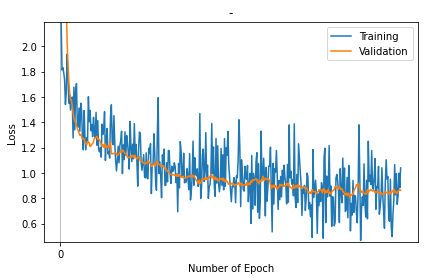

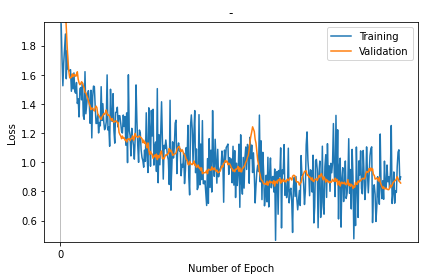

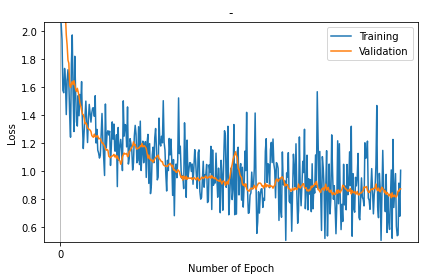

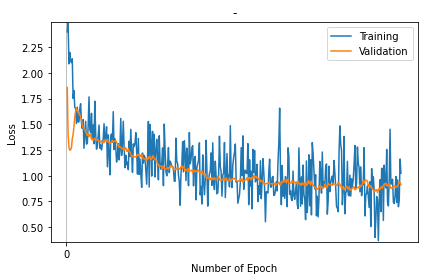

In [8]:
# >> 128-2-50, Epoch: 400, LR: 0.001, DR: 0
Train_Loss= [2.1774497032165527, 1.8127752542495728, 1.8311408758163452, 1.7911994457244873, 1.7365764379501343, 1.539959192276001, 1.634056806564331, 1.9379075765609741, 1.7709718942642212, 1.5502129793167114, 1.6142677068710327, 1.49607515335083, 1.586313009262085, 1.5983439683914185, 1.2759597301483154, 1.6760390996932983, 1.3398363590240479, 1.6507946252822876, 1.7050873041152954, 1.376161813735962, 1.361094355583191, 1.5110933780670166, 1.3287006616592407, 1.5501205921173096, 1.4889891147613525, 1.2852970361709595, 1.1818894147872925, 1.4918912649154663, 1.2768309116363525, 1.1821154356002808, 1.2789978981018066, 1.2471668720245361, 1.6013939380645752, 1.4033244848251343, 1.4927617311477661, 1.3323824405670166, 1.3810569047927856, 1.2861214876174927, 1.438313603401184, 1.326128363609314, 1.2769603729248047, 1.4774681329727173, 1.2184250354766846, 1.4128034114837646, 1.1895396709442139, 1.1660414934158325, 1.1978175640106201, 1.1244020462036133, 1.3843677043914795, 1.3038121461868286, 1.3502318859100342, 1.4835222959518433, 1.0984690189361572, 1.2600265741348267, 1.350440263748169, 1.1508808135986328, 1.167863130569458, 1.1173005104064941, 1.4418399333953857, 1.5370463132858276, 1.242450475692749, 1.2227134704589844, 1.451711893081665, 1.2341821193695068, 1.1003680229187012, 1.0155209302902222, 1.0975381135940552, 1.2105889320373535, 1.0794662237167358, 1.214914083480835, 1.255881428718567, 1.3288474082946777, 0.9939470291137695, 1.2207385301589966, 1.1047145128250122, 1.3239548206329346, 1.1385180950164795, 1.294814944267273, 1.2361161708831787, 1.1522469520568848, 1.0303313732147217, 1.4062683582305908, 1.2153247594833374, 1.0890370607376099, 1.2260653972625732, 1.1113640069961548, 1.3887192010879517, 1.1415050029754639, 1.2245488166809082, 1.086146354675293, 0.8953931927680969, 1.1802794933319092, 1.3214731216430664, 1.3135473728179932, 1.0765613317489624, 1.020745873451233, 1.0822136402130127, 1.1438920497894287, 0.9720988273620605, 0.9605147242546082, 1.1582200527191162, 0.9601171612739563, 0.9541002511978149, 1.1951847076416016, 1.1534526348114014, 1.2302029132843018, 0.8366244435310364, 1.0648906230926514, 1.0662373304367065, 1.3084113597869873, 1.156541347503662, 0.9314303398132324, 0.8630889654159546, 1.2969980239868164, 1.5931724309921265, 0.9946316480636597, 1.0868984460830688, 0.9667007327079773, 0.8043649792671204, 1.142266035079956, 1.0643012523651123, 1.1884181499481201, 0.9005878567695618, 0.903093695640564, 1.0806630849838257, 0.929843544960022, 1.1771292686462402, 1.1750943660736084, 1.0069643259048462, 0.9169191122055054, 1.0526938438415527, 1.010202169418335, 1.0209314823150635, 1.0795753002166748, 1.048279047012329, 0.9238182902336121, 0.991141140460968, 0.6933220624923706, 1.0743482112884521, 0.8821498155593872, 1.2463191747665405, 1.1640790700912476, 0.9714436531066895, 0.9810119867324829, 1.1548360586166382, 0.9217206835746765, 0.9615582227706909, 0.9271649122238159, 1.0330612659454346, 0.9662278890609741, 0.8679990768432617, 1.152282953262329, 0.786429762840271, 0.8560068011283875, 0.9809724688529968, 1.2509849071502686, 0.9026966094970703, 1.119775652885437, 1.000015377998352, 0.9769889116287231, 1.0321651697158813, 0.893353283405304, 0.9176443815231323, 1.4678704738616943, 0.7980787754058838, 0.8862838745117188, 1.144946575164795, 1.1878974437713623, 0.933415412902832, 1.011950135231018, 1.3177344799041748, 0.9529460668563843, 1.0612529516220093, 0.8000728487968445, 0.8873425722122192, 0.9112523198127747, 0.9915607571601868, 1.3903582096099854, 0.9932692646980286, 1.204528570175171, 0.8919659852981567, 0.8147794604301453, 1.2716158628463745, 0.9194304347038269, 1.2141112089157104, 0.9197271466255188, 0.8509508967399597, 0.9229686856269836, 1.192399024963379, 0.9002575874328613, 1.1430449485778809, 0.8661423921585083, 1.2707159519195557, 0.8951226472854614, 1.1978721618652344, 1.1395071744918823, 1.3273741006851196, 1.0646734237670898, 0.9612609148025513, 0.8717153668403625, 0.7723009586334229, 0.894160270690918, 0.8880772590637207, 0.9626744389533997, 0.9313467741012573, 0.7641000747680664, 0.976590633392334, 0.9614039659500122, 1.0965697765350342, 1.4191712141036987, 1.2029377222061157, 0.7334567308425903, 1.1028165817260742, 0.9950594902038574, 0.8711611032485962, 0.8562472462654114, 1.052032709121704, 0.9663679003715515, 0.9475268125534058, 1.0591652393341064, 0.7725054025650024, 0.9002016186714172, 0.9964431524276733, 0.6010205149650574, 1.1375077962875366, 0.7152067422866821, 0.9957931637763977, 0.944851279258728, 0.7450264692306519, 1.0864503383636475, 1.1591323614120483, 0.6889830231666565, 1.0732370615005493, 0.6411553025245667, 0.7703167200088501, 1.3294055461883545, 0.9546793103218079, 0.9795914888381958, 1.1154760122299194, 0.9515829086303711, 0.6601726412773132, 1.0438157320022583, 0.7766296863555908, 0.8923587799072266, 1.0538623332977295, 1.0534517765045166, 1.2026525735855103, 0.8487579226493835, 0.5343706011772156, 1.0753028392791748, 0.7544816732406616, 1.0338001251220703, 1.0066014528274536, 1.1768449544906616, 0.969696044921875, 0.7120426297187805, 0.9397352933883667, 0.7886229753494263, 0.9717334508895874, 0.8107334971427917, 1.020519733428955, 0.893251895904541, 1.0613033771514893, 0.9629068374633789, 0.9143147468566895, 0.7556780576705933, 1.0667779445648193, 0.7691894769668579, 1.3786054849624634, 0.9613438844680786, 1.0127737522125244, 0.9110272526741028, 0.9468733668327332, 0.8191355466842651, 1.3869216442108154, 0.8058794140815735, 0.7266514897346497, 0.9882255792617798, 0.7665008306503296, 1.2300399541854858, 1.116412878036499, 1.0171735286712646, 0.9059419631958008, 0.6639496088027954, 0.8727943301200867, 0.8410884141921997, 0.9010125398635864, 0.703706681728363, 0.7999716997146606, 0.9980555772781372, 0.9704510569572449, 0.7164761424064636, 0.7673877477645874, 0.6540271043777466, 0.7471684813499451, 0.4910860061645508, 1.183834195137024, 0.8059646487236023, 0.8713238835334778, 0.9418132901191711, 0.8343433141708374, 0.5229280591011047, 0.8347689509391785, 0.7418220639228821, 0.8581067323684692, 0.7740064263343811, 0.9222990870475769, 0.8856932520866394, 0.48471084237098694, 1.1235343217849731, 1.194422721862793, 0.6077354550361633, 0.9748431444168091, 0.8110381960868835, 0.9106169939041138, 1.2158968448638916, 0.8158508539199829, 0.896954357624054, 0.5773248672485352, 0.8122882843017578, 0.8062193989753723, 0.5818281173706055, 0.6083196997642517, 0.9577315449714661, 0.9874312281608582, 0.9329068064689636, 0.8492454290390015, 0.6085655093193054, 1.0325361490249634, 0.8435853719711304, 0.7641924619674683, 1.1163538694381714, 0.831282913684845, 1.0384299755096436, 0.695451021194458, 0.7087035775184631, 0.9635388255119324, 0.6458160877227783, 1.05880868434906, 0.9209254384040833, 0.5423591136932373, 0.7597078084945679, 0.6670538187026978, 0.9403495788574219, 0.688773512840271, 0.8224213719367981, 0.808205246925354, 0.6875717043876648, 0.6061421632766724, 0.8501801490783691, 1.3790889978408813, 0.9771674871444702, 0.46631526947021484, 0.7155470252037048, 0.8107870221138, 0.7435977458953857, 1.0710303783416748, 0.7648764848709106, 0.6520875692367554, 0.9415535926818848, 0.6376312375068665, 1.2501254081726074, 0.9323375821113586, 0.9808637499809265, 0.9081112146377563, 1.1762512922286987, 0.8848775029182434, 0.8713730573654175, 0.9742804765701294, 1.1131874322891235, 0.7129648923873901, 0.8928238153457642, 0.8827916383743286, 1.0510908365249634, 0.6742575764656067, 0.7338451147079468, 0.8191863894462585, 1.0400993824005127, 0.821220874786377, 0.7027765512466431, 0.5631374716758728, 0.9279104471206665, 1.1039321422576904, 0.9506551623344421, 0.9713214635848999, 0.630353569984436, 0.6180074214935303, 0.9499890208244324, 0.5675114393234253, 0.4976300597190857, 0.6746565103530884, 0.7810086607933044, 1.0654828548431396, 0.8257744908332825, 0.9929677844047546, 0.752306342124939, 0.8228245973587036, 0.9980684518814087, 0.8825192451477051, 1.0394413471221924]
Test_Loss= [14.917155265808105, 9.408278465270996, 6.535037040710449, 4.948625564575195, 3.5207533836364746, 2.888493537902832, 2.347064733505249, 2.0344600677490234, 1.8625632524490356, 1.7261731624603271, 1.636296272277832, 1.5753694772720337, 1.5768169164657593, 1.5224671363830566, 1.474761724472046, 1.430779218673706, 1.4042094945907593, 1.4011313915252686, 1.374739646911621, 1.3502109050750732, 1.3347735404968262, 1.3165488243103027, 1.2965189218521118, 1.3039183616638184, 1.2887059450149536, 1.266400933265686, 1.2733638286590576, 1.264601469039917, 1.2439687252044678, 1.2312347888946533, 1.2190344333648682, 1.2484973669052124, 1.240275502204895, 1.2395939826965332, 1.2081109285354614, 1.2122089862823486, 1.2276653051376343, 1.229508399963379, 1.2459369897842407, 1.2717978954315186, 1.2783833742141724, 1.2790024280548096, 1.2881978750228882, 1.2649037837982178, 1.2657856941223145, 1.2620656490325928, 1.2457776069641113, 1.231503963470459, 1.2121437788009644, 1.2249360084533691, 1.2042957544326782, 1.1988502740859985, 1.228903889656067, 1.196671485900879, 1.204829454421997, 1.2135069370269775, 1.202305555343628, 1.2250958681106567, 1.2490103244781494, 1.1518422365188599, 1.1499733924865723, 1.1542879343032837, 1.152139663696289, 1.153899908065796, 1.1587307453155518, 1.1507954597473145, 1.1386483907699585, 1.140472412109375, 1.1546112298965454, 1.159205675125122, 1.1786866188049316, 1.1612672805786133, 1.1810252666473389, 1.1750355958938599, 1.1647632122039795, 1.1520144939422607, 1.1491398811340332, 1.1477715969085693, 1.1208932399749756, 1.1210616827011108, 1.1228868961334229, 1.1256396770477295, 1.120163917541504, 1.1387004852294922, 1.1343132257461548, 1.1228747367858887, 1.1409283876419067, 1.130097508430481, 1.119699239730835, 1.1093688011169434, 1.1201136112213135, 1.122391939163208, 1.1260219812393188, 1.0925912857055664, 1.0903340578079224, 1.089869737625122, 1.0837769508361816, 1.0770761966705322, 1.0695669651031494, 1.0736725330352783, 1.0769675970077515, 1.079230785369873, 1.0960979461669922, 1.083786129951477, 1.0863838195800781, 1.0687059164047241, 1.0546427965164185, 1.0497589111328125, 1.0655567646026611, 1.067542552947998, 1.0614540576934814, 1.0551695823669434, 1.0886218547821045, 1.0946543216705322, 1.0699138641357422, 1.0684623718261719, 1.0650436878204346, 1.0518563985824585, 1.0595027208328247, 1.0536911487579346, 1.0580811500549316, 1.0440664291381836, 1.0317350625991821, 1.035480260848999, 1.017998456954956, 1.0119608640670776, 1.00968337059021, 0.9981974363327026, 0.987528920173645, 0.9887062311172485, 0.9840067625045776, 0.9845098257064819, 0.9870234727859497, 0.9831689596176147, 0.9772363901138306, 0.9863712191581726, 0.9720942974090576, 0.9905353784561157, 0.9722810983657837, 0.9878158569335938, 0.9788906574249268, 0.9652225971221924, 0.9675250053405762, 0.972540020942688, 0.9603976607322693, 0.9601352214813232, 0.9561374187469482, 0.9663927555084229, 0.9635952711105347, 0.9688876271247864, 0.9784073829650879, 0.9687596559524536, 0.9762884974479675, 0.9767731428146362, 0.9834794402122498, 0.9684370160102844, 0.9812025427818298, 0.9645398855209351, 0.9512629508972168, 0.9388452768325806, 0.9303991198539734, 0.9188394546508789, 0.9439364671707153, 0.9153522253036499, 0.9192909002304077, 0.9402478933334351, 0.9576697945594788, 0.9483287930488586, 0.947458028793335, 0.9612574577331543, 0.9457372426986694, 0.9625272750854492, 0.9486555457115173, 0.964279294013977, 0.959669828414917, 0.9724692106246948, 0.9830718040466309, 0.9679073095321655, 0.976199746131897, 0.9492772221565247, 0.9509738683700562, 0.9681552648544312, 0.945466160774231, 0.9576630592346191, 0.9396380186080933, 0.9371016025543213, 0.9520065188407898, 0.9553964734077454, 0.9465814232826233, 0.9577838182449341, 0.9399725198745728, 0.9585598707199097, 0.9293924570083618, 0.9436466693878174, 0.9364421367645264, 0.9348965883255005, 0.9204098582267761, 0.9103443622589111, 0.9086320400238037, 0.9047812819480896, 0.917701244354248, 0.9156128168106079, 0.9172332882881165, 0.90995192527771, 0.8987792134284973, 0.9050297737121582, 0.9088976979255676, 0.9111886024475098, 0.9241639971733093, 0.9139554500579834, 0.8964002132415771, 0.9193836450576782, 0.910192608833313, 0.9051955342292786, 0.901000440120697, 0.9064448475837708, 0.9079161882400513, 0.9013481140136719, 0.9244617819786072, 0.8978538513183594, 0.9094020128250122, 0.9219878315925598, 0.9090031981468201, 0.9372711181640625, 0.9239073991775513, 0.9466283321380615, 0.9457195401191711, 0.9417324066162109, 0.9481778144836426, 0.9551733732223511, 0.9396596550941467, 0.9442057013511658, 0.9129606485366821, 0.9240530729293823, 0.938809871673584, 0.936498761177063, 0.9345667362213135, 0.9723860621452332, 0.9481639862060547, 0.9392802715301514, 0.9603151082992554, 0.9489909410476685, 0.9492506384849548, 0.9564472436904907, 0.9475593566894531, 0.9393317103385925, 0.9090924263000488, 0.8775476813316345, 0.9022237062454224, 0.8865618705749512, 0.9034997224807739, 0.8846690654754639, 0.9008293151855469, 0.88701331615448, 0.8684240579605103, 0.8818122148513794, 0.8893864750862122, 0.9103220701217651, 0.898047924041748, 0.9092073440551758, 0.8950288891792297, 0.9048682451248169, 0.8945004940032959, 0.8974771499633789, 0.8972345590591431, 0.9184801578521729, 0.9023391008377075, 0.9201874136924744, 0.8955974578857422, 0.8889733552932739, 0.8831775188446045, 0.8776514530181885, 0.8729735016822815, 0.9066364765167236, 0.8803753852844238, 0.8821122646331787, 0.899804413318634, 0.885595977306366, 0.9067854285240173, 0.8979177474975586, 0.9012051820755005, 0.8847273588180542, 0.8776376247406006, 0.8869635462760925, 0.8862310647964478, 0.8933289051055908, 0.8791524171829224, 0.8877438306808472, 0.8825092315673828, 0.8732903003692627, 0.8460670709609985, 0.8487054109573364, 0.8407050371170044, 0.8500247597694397, 0.8343479633331299, 0.8675726056098938, 0.8536409735679626, 0.8530063629150391, 0.8516813516616821, 0.8498173952102661, 0.8329875469207764, 0.8479899168014526, 0.8499871492385864, 0.8670912981033325, 0.8612380027770996, 0.8682525157928467, 0.8658270239830017, 0.8403002619743347, 0.8730735778808594, 0.8753833770751953, 0.8387598991394043, 0.8590080738067627, 0.846094012260437, 0.8496400117874146, 0.8695797920227051, 0.8346735239028931, 0.8421520590782166, 0.8346754312515259, 0.8537100553512573, 0.8575726747512817, 0.8639200925827026, 0.8662985563278198, 0.892316460609436, 0.8835591077804565, 0.8840187788009644, 0.8783460855484009, 0.870063066482544, 0.8954987525939941, 0.8833173513412476, 0.8684327602386475, 0.8758469223976135, 0.8510186076164246, 0.8540692925453186, 0.830542802810669, 0.8264854550361633, 0.8419694304466248, 0.8198206424713135, 0.8401479721069336, 0.8397058844566345, 0.803727388381958, 0.8242674469947815, 0.8243808746337891, 0.8309425115585327, 0.8294050693511963, 0.8581922054290771, 0.8733360767364502, 0.8826518654823303, 0.9067350029945374, 0.9004220962524414, 0.918561577796936, 0.9053930640220642, 0.8606069087982178, 0.8647576570510864, 0.8519853949546814, 0.8434945940971375, 0.8568673133850098, 0.839252233505249, 0.8365620374679565, 0.8325018882751465, 0.831822395324707, 0.8667076826095581, 0.8441745042800903, 0.8609322905540466, 0.8608068227767944, 0.8706001043319702, 0.8636022806167603, 0.8562965393066406, 0.8599167466163635, 0.8612881302833557, 0.8424406051635742, 0.8489097356796265, 0.8487576246261597, 0.8603743314743042, 0.8379849195480347, 0.8431292772293091, 0.8417918682098389, 0.846001923084259, 0.8351784944534302, 0.8285542726516724, 0.8262671232223511, 0.8437416553497314, 0.8536931276321411, 0.8441305160522461, 0.8452231884002686, 0.8382713794708252, 0.837352991104126, 0.8531911969184875, 0.8346911668777466, 0.8373008370399475, 0.8537659645080566, 0.8570512533187866, 0.8746620416641235, 0.8440462350845337, 0.8573006391525269, 0.8354635834693909, 0.8411457538604736, 0.8579927682876587, 0.8609815835952759, 0.8676432371139526, 0.8628004193305969]
lossGraph(Train_Loss, Test_Loss)
# >> 128-2-50, Epoch: 400, LR: 0.001, DR: 0.3
Train_Loss= [1.9496028423309326, 1.7102638483047485, 1.524789810180664, 1.682491660118103, 1.7877861261367798, 1.8799927234649658, 1.5727475881576538, 1.7640905380249023, 1.6399908065795898, 1.6303632259368896, 1.6271657943725586, 1.6350005865097046, 1.4867922067642212, 1.6010822057724, 1.5034592151641846, 1.61294686794281, 1.484911561012268, 1.4737508296966553, 1.5471079349517822, 1.4034090042114258, 1.4352062940597534, 1.3108168840408325, 1.5046180486679077, 1.5124118328094482, 1.428144931793213, 1.5448194742202759, 1.3190515041351318, 1.2945235967636108, 1.6214923858642578, 1.3325307369232178, 1.399662733078003, 1.4580962657928467, 1.4913017749786377, 1.4156543016433716, 1.267187476158142, 1.4939460754394531, 1.1668260097503662, 1.4478461742401123, 1.5224899053573608, 1.519376516342163, 1.3819937705993652, 1.2653234004974365, 1.2681148052215576, 1.3299105167388916, 1.20096755027771, 1.2726885080337524, 1.2496130466461182, 1.5183700323104858, 1.2866308689117432, 1.4013584852218628, 1.282433271408081, 1.2231380939483643, 1.2351163625717163, 1.2784299850463867, 1.5992933511734009, 1.2206032276153564, 1.2432284355163574, 1.1096428632736206, 1.5008572340011597, 1.3083723783493042, 1.2799888849258423, 1.4705030918121338, 1.2159347534179688, 1.1308484077453613, 1.3416197299957275, 1.3442766666412354, 1.37738835811615, 1.2408183813095093, 1.3199058771133423, 1.3182666301727295, 1.2683990001678467, 1.2101287841796875, 1.2006338834762573, 1.3238847255706787, 1.2455482482910156, 1.3135963678359985, 1.1165645122528076, 1.3383616209030151, 0.997215747833252, 1.6000072956085205, 1.220008134841919, 1.1835987567901611, 1.0430164337158203, 1.2325613498687744, 1.1631091833114624, 1.1139347553253174, 1.0211751461029053, 1.1670252084732056, 1.5305113792419434, 1.2907047271728516, 1.1165369749069214, 0.9992710947990417, 1.2206652164459229, 1.198848843574524, 1.0841584205627441, 1.0324885845184326, 1.010603427886963, 0.9658114314079285, 1.0826929807662964, 1.0063865184783936, 1.3392549753189087, 1.0451377630233765, 0.9293943643569946, 1.3733325004577637, 1.2348650693893433, 0.9726864099502563, 1.3553597927093506, 1.1802237033843994, 1.3634557723999023, 0.9802907705307007, 1.104650616645813, 1.1390111446380615, 0.936590850353241, 1.5052684545516968, 0.8592469096183777, 1.1882925033569336, 0.9822848439216614, 1.1951024532318115, 1.4148242473602295, 1.1585283279418945, 0.8840562701225281, 1.116159200668335, 1.0930404663085938, 1.1525180339813232, 1.0942580699920654, 1.0415327548980713, 1.015166997909546, 0.847181499004364, 1.4251105785369873, 0.8080415725708008, 0.960408091545105, 1.1397982835769653, 1.02870774269104, 1.103837251663208, 1.2678253650665283, 1.2884695529937744, 0.9218908548355103, 1.0975406169891357, 1.1322697401046753, 1.0774309635162354, 1.0916709899902344, 0.9073953628540039, 0.9855896234512329, 0.967068076133728, 1.063594937324524, 0.8533940315246582, 0.9404964447021484, 1.1004396677017212, 1.0117506980895996, 1.2530076503753662, 0.8993682861328125, 0.7757936716079712, 1.2502915859222412, 1.3245997428894043, 1.2290306091308594, 0.9984301328659058, 1.1945774555206299, 1.3545223474502563, 0.9281121492385864, 1.0910637378692627, 0.8122069239616394, 0.8279598355293274, 1.326451063156128, 0.844764232635498, 1.1248472929000854, 0.8808210492134094, 1.2855243682861328, 0.8540342450141907, 0.8523103594779968, 0.8729413747787476, 0.7899187803268433, 0.7030105590820312, 1.0250481367111206, 0.7176441550254822, 1.1619826555252075, 0.8270206451416016, 1.0827754735946655, 0.7954179048538208, 1.3543570041656494, 1.0220361948013306, 0.9027450680732727, 1.1576567888259888, 0.9990704655647278, 0.8561419248580933, 1.0883195400238037, 0.9001744985580444, 0.9383109211921692, 0.9581526517868042, 0.9751803278923035, 1.0767910480499268, 1.018842101097107, 0.7253936529159546, 1.0832349061965942, 1.000537395477295, 1.1012879610061646, 1.1110163927078247, 1.1246817111968994, 0.9165641665458679, 1.0314793586730957, 0.96271812915802, 1.022244930267334, 0.8589301109313965, 1.1095261573791504, 0.8428443074226379, 1.0797092914581299, 0.7576847076416016, 0.9934799075126648, 0.8402656316757202, 0.9355095028877258, 1.1241042613983154, 0.6905905604362488, 1.1880345344543457, 0.8580533266067505, 0.7811525464057922, 1.0329813957214355, 0.8221684694290161, 1.0307608842849731, 1.1045949459075928, 0.9503809213638306, 1.122380018234253, 1.0949903726577759, 0.8556908369064331, 1.171477198600769, 1.0250647068023682, 1.1177760362625122, 0.9294099807739258, 1.0644891262054443, 0.9169260263442993, 0.7206836938858032, 0.8399977684020996, 0.9361039996147156, 0.9790131449699402, 0.9367354512214661, 1.3234418630599976, 0.8651399612426758, 1.146599531173706, 0.7435301542282104, 1.06800377368927, 0.9295891523361206, 0.7006443738937378, 0.7766314744949341, 0.9104076623916626, 0.7280157804489136, 1.0339256525039673, 0.6930387020111084, 0.9197238087654114, 1.0289644002914429, 0.8244655728340149, 0.8960562944412231, 0.9022367596626282, 0.7955737709999084, 0.9535744786262512, 0.4638664126396179, 0.925934910774231, 0.9370337724685669, 0.6431124210357666, 0.943309485912323, 0.9038981199264526, 1.0984572172164917, 0.548934817314148, 0.947422206401825, 0.9207132458686829, 1.120813012123108, 0.7731906175613403, 0.862769603729248, 0.7568939924240112, 0.8000127077102661, 1.096440076828003, 0.721015989780426, 0.8049885630607605, 0.8215968012809753, 0.7365659475326538, 0.5179458260536194, 0.836182713508606, 0.8964358568191528, 0.7647014856338501, 0.9016949534416199, 0.7486924529075623, 0.6733869314193726, 0.7359911799430847, 0.8060266375541687, 0.7028997540473938, 1.0455492734909058, 0.910636305809021, 0.9139106869697571, 0.8473798632621765, 0.7098819017410278, 0.8006361126899719, 1.11843740940094, 1.207944631576538, 1.015112280845642, 0.9291497468948364, 0.770170271396637, 0.9479134678840637, 0.9391091465950012, 0.7953135967254639, 1.0482182502746582, 0.5832656621932983, 0.6920076012611389, 1.009642481803894, 1.0189759731292725, 0.9492894411087036, 0.5506292581558228, 0.9197147488594055, 1.007947564125061, 0.6211165189743042, 0.7258403301239014, 1.1100807189941406, 0.6949955224990845, 0.6433671116828918, 0.9705802202224731, 1.0508872270584106, 0.7586669325828552, 1.1273186206817627, 0.8693541288375854, 0.9751055836677551, 0.8004517555236816, 0.9924399256706238, 0.9277326464653015, 0.9975183606147766, 1.2653908729553223, 0.926709771156311, 0.7642796039581299, 1.3215363025665283, 0.8703049421310425, 1.2223821878433228, 0.6106039881706238, 0.9722113609313965, 1.027766466140747, 0.5546537637710571, 0.8872097730636597, 0.9621394872665405, 0.7301928400993347, 0.8331920504570007, 1.008287787437439, 0.7515068054199219, 0.7840174436569214, 0.8681332468986511, 1.161442518234253, 0.7861016988754272, 0.9500967264175415, 0.6796377897262573, 1.0880247354507446, 0.9012210965156555, 0.47435617446899414, 0.837042510509491, 0.5654005408287048, 1.10440194606781, 0.8291885256767273, 0.6212552785873413, 1.0091674327850342, 0.9122522473335266, 1.0777804851531982, 0.8200654983520508, 0.7833844423294067, 1.0807292461395264, 0.9260045886039734, 0.7439174652099609, 0.8401336669921875, 1.105137825012207, 0.9267274141311646, 0.790023922920227, 0.9102944135665894, 1.0442427396774292, 1.093110203742981, 1.1055591106414795, 0.585817813873291, 0.8091645240783691, 0.8449563980102539, 0.778040885925293, 0.5934867858886719, 0.6944693326950073, 0.900173544883728, 0.7684891223907471, 0.7113985419273376, 1.193738341331482, 0.8351970911026001, 0.7505092620849609, 0.8736953735351562, 0.7452783584594727, 1.0074801445007324, 0.830340564250946, 0.8196905255317688, 0.9810096621513367, 0.8660750389099121, 0.9003573656082153, 0.8224331736564636, 0.9332548975944519, 1.2519806623458862, 0.7168641686439514, 0.7871766090393066, 0.9332107305526733, 0.7188714742660522, 0.8023033142089844, 0.793387234210968, 0.9699870347976685, 1.0693409442901611, 1.0852365493774414, 0.8773984909057617, 0.8989885449409485]
Test_Loss= [4.174563407897949, 3.199336051940918, 2.6528499126434326, 2.4114065170288086, 2.2154157161712646, 2.045046806335449, 1.9146020412445068, 1.8009045124053955, 1.6960351467132568, 1.6236804723739624, 1.5796711444854736, 1.5782721042633057, 1.5821208953857422, 1.6064496040344238, 1.5875080823898315, 1.6010005474090576, 1.602703332901001, 1.5899202823638916, 1.5946636199951172, 1.6205896139144897, 1.5694553852081299, 1.545661449432373, 1.53208327293396, 1.540246605873108, 1.5527231693267822, 1.5433858633041382, 1.525006890296936, 1.506854772567749, 1.479224681854248, 1.4766404628753662, 1.4587830305099487, 1.4403691291809082, 1.422165870666504, 1.4003428220748901, 1.3856850862503052, 1.3606414794921875, 1.3711743354797363, 1.3704272508621216, 1.3621282577514648, 1.351544976234436, 1.3718369007110596, 1.3850703239440918, 1.3742214441299438, 1.3310003280639648, 1.3204368352890015, 1.3148751258850098, 1.3017966747283936, 1.294187307357788, 1.3109376430511475, 1.320556879043579, 1.3331892490386963, 1.32789945602417, 1.341469168663025, 1.358513355255127, 1.3345723152160645, 1.3217122554779053, 1.32364821434021, 1.3154592514038086, 1.2975091934204102, 1.2871036529541016, 1.3002703189849854, 1.2814466953277588, 1.2736624479293823, 1.2820664644241333, 1.2801767587661743, 1.2833106517791748, 1.2704577445983887, 1.2725086212158203, 1.205066204071045, 1.1903598308563232, 1.1803348064422607, 1.1612675189971924, 1.1796845197677612, 1.1634652614593506, 1.1686514616012573, 1.1518876552581787, 1.1522154808044434, 1.139085054397583, 1.1587024927139282, 1.158937692642212, 1.1614116430282593, 1.1482646465301514, 1.1608531475067139, 1.1636511087417603, 1.1811609268188477, 1.1506659984588623, 1.1626819372177124, 1.1974766254425049, 1.1771557331085205, 1.1757967472076416, 1.1701653003692627, 1.1751422882080078, 1.1809923648834229, 1.171776294708252, 1.1685734987258911, 1.1613638401031494, 1.133831262588501, 1.151971459388733, 1.1292831897735596, 1.138015627861023, 1.1138567924499512, 1.0985329151153564, 1.1328482627868652, 1.0807174444198608, 1.0527284145355225, 1.0735735893249512, 1.0601632595062256, 1.0546224117279053, 1.0274487733840942, 1.0380200147628784, 1.0492892265319824, 1.0357435941696167, 1.055976152420044, 1.0177985429763794, 1.045076847076416, 1.0308358669281006, 1.0471959114074707, 1.0688793659210205, 1.07725191116333, 1.023378610610962, 1.0282182693481445, 1.023376226425171, 1.0403443574905396, 1.0503102540969849, 1.047660231590271, 1.0568444728851318, 1.058384895324707, 1.093937873840332, 1.07168710231781, 1.0831643342971802, 1.0722911357879639, 1.0475375652313232, 1.051086664199829, 1.0567412376403809, 1.0576800107955933, 1.0635530948638916, 1.0854196548461914, 1.0987707376480103, 1.1060945987701416, 1.107593059539795, 1.0791645050048828, 1.0733318328857422, 1.0867674350738525, 1.0763225555419922, 1.0569230318069458, 1.052973747253418, 1.0408254861831665, 1.0186009407043457, 1.0144977569580078, 0.9869089126586914, 0.98111891746521, 1.0064435005187988, 0.9897247552871704, 0.9870588779449463, 0.9833522439002991, 0.9928699135780334, 1.0088554620742798, 0.9792577624320984, 0.9867977499961853, 0.9641095399856567, 0.9703863263130188, 0.980399489402771, 0.9615722894668579, 0.9638780355453491, 0.9437012672424316, 0.9612996578216553, 0.9215023517608643, 0.9288196563720703, 0.9285001754760742, 0.9269862174987793, 0.9320152401924133, 0.9439836740493774, 0.9214376211166382, 0.9519751667976379, 0.9488740563392639, 0.9492260217666626, 0.9442150592803955, 0.9680019617080688, 0.9528541564941406, 0.9483256340026855, 0.961240291595459, 0.9480740427970886, 0.9382619261741638, 0.9462711811065674, 0.9285712838172913, 0.9291694164276123, 0.9341062307357788, 0.9404560327529907, 0.9590657949447632, 0.9743406772613525, 0.9672802686691284, 0.9931340217590332, 0.9953530430793762, 1.011954665184021, 1.0030850172042847, 1.007883071899414, 0.9831680655479431, 0.9930424690246582, 0.9891574382781982, 0.9783282279968262, 0.9618423581123352, 0.9548252820968628, 0.9382333755493164, 0.9458126425743103, 0.9348761439323425, 0.9516993761062622, 0.9522773027420044, 0.9574534893035889, 0.9707565903663635, 0.9376024603843689, 0.9617762565612793, 0.9354753494262695, 0.9339760541915894, 0.9590393304824829, 0.9603363275527954, 0.9711278676986694, 0.9812883138656616, 1.0000174045562744, 1.0121369361877441, 1.033357858657837, 1.0479836463928223, 1.0889992713928223, 1.144909381866455, 1.1813726425170898, 1.20914888381958, 1.2429347038269043, 1.228044033050537, 1.211326241493225, 1.1575942039489746, 1.131260633468628, 1.0753257274627686, 1.0150539875030518, 0.9838220477104187, 0.933319628238678, 0.9118186235427856, 0.8790215253829956, 0.8763383626937866, 0.8652325868606567, 0.8512523174285889, 0.8510304689407349, 0.8552755117416382, 0.8465590476989746, 0.8697513341903687, 0.8418631553649902, 0.8616117238998413, 0.8713738322257996, 0.8570546507835388, 0.864479660987854, 0.864375650882721, 0.8529620170593262, 0.8730108737945557, 0.8361687064170837, 0.8644342422485352, 0.8705064654350281, 0.8555121421813965, 0.8799529075622559, 0.8736290335655212, 0.887447714805603, 0.8558573722839355, 0.8765458464622498, 0.8663204908370972, 0.8836572170257568, 0.8671767711639404, 0.8714475035667419, 0.8644380569458008, 0.8762633800506592, 0.8845369219779968, 0.8728405237197876, 0.8813165426254272, 0.893929660320282, 0.8869242668151855, 0.8773390054702759, 0.902560293674469, 0.9103413820266724, 0.9096214771270752, 0.9036011099815369, 0.8726131916046143, 0.8640538454055786, 0.8651251792907715, 0.8630810379981995, 0.8434213399887085, 0.8561722040176392, 0.8607290983200073, 0.8897579908370972, 0.910014271736145, 0.9215128421783447, 0.936568021774292, 0.9383625388145447, 0.9406635761260986, 0.9113925099372864, 0.9136494994163513, 0.8997417092323303, 0.901565432548523, 0.8899656534194946, 0.8776513934135437, 0.8936113715171814, 0.8697950839996338, 0.867464542388916, 0.880321741104126, 0.8832906484603882, 0.8851479887962341, 0.8744208216667175, 0.8900087475776672, 0.9090838432312012, 0.8980331420898438, 0.9132760167121887, 0.921772301197052, 0.8962174654006958, 0.8789910078048706, 0.8997291326522827, 0.8867685198783875, 0.8630727529525757, 0.8817716836929321, 0.867314338684082, 0.8706257939338684, 0.8585327863693237, 0.8684680461883545, 0.8604694604873657, 0.8676696419715881, 0.8823215961456299, 0.8705604672431946, 0.8689526319503784, 0.8909413814544678, 0.8684244751930237, 0.8833601474761963, 0.8436682224273682, 0.8674119710922241, 0.870175838470459, 0.8363047242164612, 0.8570342063903809, 0.8636167049407959, 0.853500485420227, 0.8538554906845093, 0.8629990816116333, 0.8460477590560913, 0.8489061594009399, 0.849989652633667, 0.8808420896530151, 0.8402693271636963, 0.8542206287384033, 0.8349564075469971, 0.8484607934951782, 0.8415888547897339, 0.8195538520812988, 0.8366298675537109, 0.8285576701164246, 0.8622591495513916, 0.8507437109947205, 0.847407877445221, 0.8710002303123474, 0.8635611534118652, 0.8764113783836365, 0.8716772794723511, 0.8821978569030762, 0.8885158896446228, 0.8896169662475586, 0.8839964866638184, 0.8927521705627441, 0.9191169738769531, 0.9370734691619873, 0.9306347370147705, 0.932712197303772, 0.9566673636436462, 0.9393075704574585, 0.9604045152664185, 0.9439011812210083, 0.9551666975021362, 0.914830207824707, 0.910456657409668, 0.8839913606643677, 0.8861549496650696, 0.8919106721878052, 0.8847733736038208, 0.8705897927284241, 0.8977883458137512, 0.8636646270751953, 0.8484938740730286, 0.8324611186981201, 0.8206290006637573, 0.83109050989151, 0.8170616626739502, 0.8183627128601074, 0.8223201036453247, 0.8149482011795044, 0.8123170137405396, 0.8113819360733032, 0.8218475580215454, 0.842589259147644, 0.8304933905601501, 0.8421777486801147, 0.8592731356620789, 0.8649395704269409, 0.8725826740264893, 0.8746062517166138, 0.8853313326835632, 0.9004800319671631, 0.8868162631988525, 0.8708840608596802, 0.8649964332580566, 0.857201874256134]
lossGraph(Train_Loss, Test_Loss)
# >> 128-2-50, Epoch: 400, LR: 0.001, DR: 0.4
Train_Loss= [2.0549237728118896, 1.9408349990844727, 1.579599380493164, 1.5623859167099, 1.7359542846679688, 1.6517616510391235, 1.4063374996185303, 1.6516956090927124, 1.7266381978988647, 1.6374902725219727, 1.4009979963302612, 1.2446389198303223, 1.7642751932144165, 1.9751886129379272, 1.5631039142608643, 1.285036325454712, 1.8227355480194092, 1.5643116235733032, 1.354299783706665, 1.3241132497787476, 1.541942834854126, 1.3979527950286865, 1.5493910312652588, 1.4693963527679443, 1.6417458057403564, 1.3318681716918945, 1.1633518934249878, 1.2850935459136963, 1.3873775005340576, 1.5024946928024292, 1.3579949140548706, 1.206536054611206, 1.3697564601898193, 1.4789412021636963, 1.4134409427642822, 1.3525575399398804, 1.4175904989242554, 1.4532215595245361, 1.4546453952789307, 1.3935773372650146, 1.5408260822296143, 1.2030565738677979, 1.3003379106521606, 1.152203917503357, 1.1316001415252686, 1.0954800844192505, 1.1127729415893555, 1.2608739137649536, 1.4140739440917969, 1.2196869850158691, 1.1014788150787354, 0.9710365533828735, 1.4816426038742065, 1.1677004098892212, 1.2740846872329712, 1.290869116783142, 1.2601951360702515, 1.2873790264129639, 1.0427844524383545, 1.1855913400650024, 1.3538668155670166, 1.2306745052337646, 1.3385827541351318, 1.1458446979522705, 1.1454579830169678, 1.262197494506836, 0.8915935754776001, 1.314028024673462, 1.0795929431915283, 1.1704320907592773, 1.2287839651107788, 1.1645886898040771, 1.0060927867889404, 1.5042409896850586, 1.2525525093078613, 1.334950566291809, 1.3294821977615356, 1.1752969026565552, 1.4608385562896729, 1.052804708480835, 1.094818353652954, 1.2341068983078003, 1.1987065076828003, 1.153362512588501, 1.010137915611267, 1.061134696006775, 1.2548171281814575, 1.3290374279022217, 1.266545057296753, 1.0619558095932007, 1.0782877206802368, 1.3193877935409546, 1.049058198928833, 1.3594305515289307, 1.0065654516220093, 1.1422450542449951, 1.2164506912231445, 1.0618442296981812, 1.1693576574325562, 1.2131702899932861, 0.9571679830551147, 1.2070363759994507, 1.2646782398223877, 0.9143165349960327, 1.1989307403564453, 0.8414226770401001, 0.9032415151596069, 1.1156246662139893, 1.1729753017425537, 1.0620921850204468, 1.2409073114395142, 1.3065364360809326, 1.1632072925567627, 0.9396872520446777, 0.9593433141708374, 1.38132643699646, 1.2046109437942505, 1.1814138889312744, 1.2512564659118652, 1.204393982887268, 1.5055184364318848, 1.206895112991333, 1.1534101963043213, 0.9818421602249146, 0.8601603507995605, 1.0791239738464355, 1.0062239170074463, 1.235658884048462, 1.1183134317398071, 1.2311756610870361, 1.0801101922988892, 0.8288416862487793, 1.0846836566925049, 0.6836015582084656, 1.0181337594985962, 1.0525932312011719, 0.9548447728157043, 1.0847162008285522, 1.525254487991333, 1.127488374710083, 1.180377721786499, 1.0037835836410522, 0.9502733945846558, 0.9685229063034058, 0.8772163391113281, 1.3471601009368896, 1.1093839406967163, 0.8146075010299683, 1.2236837148666382, 0.9537802934646606, 1.003376841545105, 1.0623763799667358, 1.061354160308838, 0.9997020959854126, 1.0526788234710693, 0.9082431793212891, 1.0342419147491455, 1.155427098274231, 1.077483892440796, 0.9602950811386108, 0.8787243962287903, 1.1336041688919067, 1.1540677547454834, 0.8578044176101685, 0.8017114400863647, 0.8144054412841797, 0.9421122670173645, 1.072323203086853, 0.8872469067573547, 0.9760563969612122, 0.9742856025695801, 1.0498944520950317, 0.7777329683303833, 0.7889369130134583, 1.0471664667129517, 0.9934825897216797, 1.1792218685150146, 0.7279021739959717, 1.1534370183944702, 0.9014943242073059, 0.9414532780647278, 0.9173530340194702, 1.1307686567306519, 0.9503899812698364, 0.815888524055481, 1.0236170291900635, 0.9061328768730164, 0.7049322128295898, 1.0793184041976929, 0.9755171537399292, 0.7229480743408203, 1.0734002590179443, 1.2905369997024536, 1.2592309713363647, 0.8864629864692688, 0.9803746342658997, 1.3224756717681885, 0.6898931264877319, 0.8071914911270142, 0.9562387466430664, 1.0250605344772339, 0.7988446950912476, 0.8766533732414246, 1.3349273204803467, 0.6905825734138489, 1.052083969116211, 0.6948508620262146, 1.1417922973632812, 1.1729300022125244, 0.8319655656814575, 0.9923189878463745, 1.0558578968048096, 0.7951262593269348, 1.0294185876846313, 0.7451853156089783, 0.8913614153862, 1.1450308561325073, 1.0057331323623657, 1.42218017578125, 0.8748483657836914, 0.7007583975791931, 0.7048004865646362, 0.8302786946296692, 0.8466529846191406, 0.9949965476989746, 0.8760194778442383, 0.8832976222038269, 1.0177686214447021, 1.4174458980560303, 0.934775173664093, 0.5573502779006958, 0.6393465995788574, 0.8544467687606812, 0.702366292476654, 0.8298135995864868, 0.8736388087272644, 0.8764172792434692, 0.7427189946174622, 0.8079325556755066, 0.7931114435195923, 1.1443523168563843, 1.233812689781189, 0.9215337038040161, 1.0553196668624878, 1.0468260049819946, 0.8834294080734253, 1.1542882919311523, 1.207632303237915, 1.063143014907837, 1.231589913368225, 1.0519765615463257, 1.009069561958313, 0.8112683296203613, 1.06300687789917, 1.0513242483139038, 1.0214992761611938, 0.649937093257904, 0.9519912600517273, 0.726888120174408, 0.6727801561355591, 1.1391139030456543, 0.9072331190109253, 0.9015318155288696, 0.9326784014701843, 0.5071449875831604, 0.9891940355300903, 0.9600769877433777, 1.1341639757156372, 0.7867009043693542, 0.7756569385528564, 0.850096583366394, 0.5726624131202698, 0.8382730484008789, 1.1230870485305786, 1.0232435464859009, 0.8898792266845703, 1.197554111480713, 0.8396297693252563, 0.6298287510871887, 0.7202379107475281, 1.2463468313217163, 0.8800519704818726, 0.754779577255249, 0.9004594683647156, 1.0723812580108643, 0.9919112324714661, 1.3013324737548828, 0.7338715195655823, 0.8630515933036804, 1.1161237955093384, 0.7250514030456543, 0.9473055601119995, 0.8378947377204895, 0.9415740966796875, 0.7124552130699158, 1.0546993017196655, 0.7325303554534912, 0.8913677930831909, 0.8457146883010864, 1.117696762084961, 0.8861356973648071, 1.5696648359298706, 1.2408268451690674, 0.87480628490448, 1.1427547931671143, 0.8452455401420593, 0.5781084895133972, 1.1056663990020752, 1.0284062623977661, 0.8877280950546265, 0.5211840271949768, 0.8751711845397949, 1.1480869054794312, 0.5387541055679321, 0.8154333233833313, 1.052787184715271, 0.6963881254196167, 0.8078421354293823, 1.2611196041107178, 0.9940956830978394, 0.8010474443435669, 0.8975205421447754, 0.7465215921401978, 0.5546761751174927, 0.7730664014816284, 1.2188771963119507, 0.7690868973731995, 1.1978559494018555, 0.8193955421447754, 0.5841429829597473, 0.7649942636489868, 0.6424187421798706, 1.0509999990463257, 0.7608632445335388, 0.8957381248474121, 0.7257816195487976, 1.049756407737732, 0.8333271145820618, 0.9033738970756531, 1.1399670839309692, 0.8982950448989868, 1.3227254152297974, 0.5370242595672607, 0.9839011430740356, 0.7347391843795776, 0.7087094187736511, 0.9578186869621277, 0.8969012498855591, 0.9643006324768066, 1.1285916566848755, 0.671126127243042, 0.6547852158546448, 0.808116614818573, 0.9535716772079468, 0.8152840733528137, 0.8002960085868835, 0.7534786462783813, 1.2045507431030273, 1.0939204692840576, 1.1201502084732056, 1.2165075540542603, 0.809424877166748, 0.794671893119812, 0.7293893098831177, 0.8667184710502625, 1.0200951099395752, 0.8595120310783386, 0.696719765663147, 0.8372297286987305, 0.890386700630188, 1.0476914644241333, 1.4710285663604736, 0.745589554309845, 0.6695693731307983, 0.9861311912536621, 0.8774335980415344, 0.5071045160293579, 0.846993088722229, 1.1503560543060303, 0.8766706585884094, 0.8698565363883972, 0.7126973271369934, 0.9790207743644714, 0.5640679597854614, 0.8258358836174011, 0.6380071043968201, 0.5854176878929138, 0.8094738721847534, 1.0106369256973267, 0.522396981716156, 1.2286226749420166, 0.7422429323196411, 0.8677164316177368, 0.9845415353775024, 0.6090413331985474, 0.5406941771507263, 0.5457070469856262, 0.9164568185806274, 0.6798768043518066, 1.0082194805145264]
Test_Loss= [7.863407611846924, 5.369505882263184, 3.418689250946045, 2.7148284912109375, 2.3388218879699707, 2.11832857131958, 1.975598692893982, 1.9023619890213013, 1.7949349880218506, 1.77322256565094, 1.618234634399414, 1.6000192165374756, 1.6258177757263184, 1.6416494846343994, 1.620367169380188, 1.6486120223999023, 1.6195435523986816, 1.5863264799118042, 1.571791410446167, 1.5938951969146729, 1.5679104328155518, 1.5371146202087402, 1.490405797958374, 1.466871976852417, 1.4381802082061768, 1.4097144603729248, 1.4058557748794556, 1.3825101852416992, 1.34084153175354, 1.3465412855148315, 1.3331506252288818, 1.3098607063293457, 1.3055849075317383, 1.3002666234970093, 1.295099139213562, 1.285662055015564, 1.256287693977356, 1.2486257553100586, 1.2442591190338135, 1.266444206237793, 1.2506930828094482, 1.2455236911773682, 1.25433349609375, 1.2543516159057617, 1.2325823307037354, 1.2358543872833252, 1.2333317995071411, 1.217816710472107, 1.2029528617858887, 1.2039833068847656, 1.190727949142456, 1.1838003396987915, 1.1630640029907227, 1.1515085697174072, 1.156398892402649, 1.1497948169708252, 1.1073843240737915, 1.103830337524414, 1.0984909534454346, 1.1068414449691772, 1.1096298694610596, 1.1130706071853638, 1.1214693784713745, 1.1040740013122559, 1.1155414581298828, 1.0942018032073975, 1.110170602798462, 1.0914671421051025, 1.0808629989624023, 1.0765267610549927, 1.0513224601745605, 1.0661379098892212, 1.104971170425415, 1.1181598901748657, 1.1310937404632568, 1.1243994235992432, 1.1255927085876465, 1.1291725635528564, 1.105095624923706, 1.1113677024841309, 1.1423819065093994, 1.1467275619506836, 1.1638033390045166, 1.1709285974502563, 1.1834402084350586, 1.211796760559082, 1.1877124309539795, 1.1930855512619019, 1.1685019731521606, 1.1598198413848877, 1.1640039682388306, 1.168166995048523, 1.169691801071167, 1.18155038356781, 1.1791311502456665, 1.1996777057647705, 1.1753844022750854, 1.1809442043304443, 1.1829488277435303, 1.1742924451828003, 1.1626532077789307, 1.1289726495742798, 1.095243215560913, 1.1166578531265259, 1.089289665222168, 1.0860024690628052, 1.0761520862579346, 1.0808844566345215, 1.0662672519683838, 1.0756585597991943, 1.0910323858261108, 1.0983457565307617, 1.1046130657196045, 1.110835075378418, 1.116869330406189, 1.0907108783721924, 1.0881118774414062, 1.0771360397338867, 1.0703693628311157, 1.0698134899139404, 1.0483660697937012, 1.0424714088439941, 1.0394927263259888, 1.0368306636810303, 1.038827657699585, 1.0345604419708252, 1.0495545864105225, 1.0496342182159424, 1.0578830242156982, 1.047994613647461, 1.0334360599517822, 1.0443439483642578, 1.0104091167449951, 1.012467384338379, 1.0030848979949951, 0.9949594736099243, 0.9925009608268738, 1.012041449546814, 1.0061426162719727, 0.9958761930465698, 0.9714587926864624, 0.955909252166748, 0.9666699171066284, 0.9383230209350586, 0.9666405916213989, 0.9545643925666809, 0.944312334060669, 0.9658958911895752, 0.9435118436813354, 0.9529799222946167, 0.9534744024276733, 0.9507280588150024, 0.9508910775184631, 0.954872727394104, 0.9417445063591003, 0.9477295279502869, 0.9563637971878052, 0.9509219527244568, 0.9424136281013489, 0.9411449432373047, 0.9570413827896118, 0.9506497383117676, 0.9328786134719849, 0.9419854283332825, 0.944599986076355, 0.9577392935752869, 0.9587993025779724, 0.9486045241355896, 0.9560978412628174, 0.9578088521957397, 0.9676865339279175, 0.9544308185577393, 0.9505259990692139, 0.9597600102424622, 0.9579980373382568, 0.9668066501617432, 0.9512219429016113, 0.9699758887290955, 0.9559293389320374, 0.9574899673461914, 0.9472546577453613, 0.9548113346099854, 0.9468597769737244, 0.9373065829277039, 0.9376169443130493, 0.9315698146820068, 0.9294886589050293, 0.9457695484161377, 0.924723744392395, 0.9104991555213928, 0.9284804463386536, 0.9321495890617371, 0.9246045351028442, 0.9002928733825684, 0.9173086881637573, 0.926303505897522, 0.9091180562973022, 0.9384510517120361, 0.9486801028251648, 0.9847180843353271, 1.0254857540130615, 1.0491100549697876, 1.0844080448150635, 1.1039960384368896, 1.1190952062606812, 1.1406358480453491, 1.1152805089950562, 1.0980730056762695, 1.0189294815063477, 1.0132851600646973, 0.9802278280258179, 0.9636706709861755, 0.95807945728302, 0.909741997718811, 0.9008625745773315, 0.9099146127700806, 0.8915769457817078, 0.9114192724227905, 0.8757766485214233, 0.8661482334136963, 0.8618125319480896, 0.8586932420730591, 0.8728822469711304, 0.8775832653045654, 0.8816244602203369, 0.8741340041160583, 0.8820289969444275, 0.9013392925262451, 0.8873082399368286, 0.8729677796363831, 0.8942831754684448, 0.9050599932670593, 0.9160047769546509, 0.91634202003479, 0.916428804397583, 0.9108411073684692, 0.8955259919166565, 0.8992241621017456, 0.881309986114502, 0.8982570171356201, 0.9140697121620178, 0.888931393623352, 0.9037230014801025, 0.8990209698677063, 0.8883746266365051, 0.9038184881210327, 0.8931912183761597, 0.895820677280426, 0.8932075500488281, 0.8803059458732605, 0.8945021033287048, 0.8975434303283691, 0.9273273944854736, 0.9453485012054443, 0.9437557458877563, 0.9283393025398254, 0.9413254261016846, 0.9429029226303101, 0.9518691897392273, 0.958838701248169, 0.9602739214897156, 0.944969892501831, 0.9319970607757568, 0.8950198292732239, 0.9094060659408569, 0.9017812013626099, 0.9053939580917358, 0.8781580924987793, 0.8757957220077515, 0.874267578125, 0.8586044907569885, 0.8644136190414429, 0.8805818557739258, 0.8674900531768799, 0.8690894842147827, 0.8836876749992371, 0.8744444847106934, 0.8700183629989624, 0.8831257820129395, 0.9099345207214355, 0.8877366185188293, 0.8810100555419922, 0.8934280872344971, 0.8987158536911011, 0.9108222723007202, 0.9120239019393921, 0.8829930424690247, 0.8805276155471802, 0.8838664293289185, 0.8613377213478088, 0.8659031391143799, 0.858953058719635, 0.872340977191925, 0.8674062490463257, 0.8947080969810486, 0.8845847845077515, 0.8984039425849915, 0.8961664438247681, 0.914206862449646, 0.9074482917785645, 0.928166389465332, 0.8966621160507202, 0.8698046207427979, 0.8696252703666687, 0.8548465967178345, 0.8492933511734009, 0.8733483552932739, 0.8751886487007141, 0.8832006454467773, 0.8643287420272827, 0.8864365816116333, 0.9093039631843567, 0.8656312823295593, 0.8792398571968079, 0.885685384273529, 0.8557127118110657, 0.8523485064506531, 0.8658319711685181, 0.845421552658081, 0.8334503769874573, 0.8494733572006226, 0.8409227132797241, 0.8343492746353149, 0.845014214515686, 0.8662898540496826, 0.8434740304946899, 0.8675081729888916, 0.8543339967727661, 0.8470620512962341, 0.8628109097480774, 0.8704291582107544, 0.9014507532119751, 0.8971148729324341, 0.8871403932571411, 0.8779400587081909, 0.8730394840240479, 0.8662797212600708, 0.858513355255127, 0.8683761358261108, 0.8585575819015503, 0.8783864974975586, 0.8392627239227295, 0.863640308380127, 0.8489996194839478, 0.847812294960022, 0.8571423888206482, 0.839423418045044, 0.8402376770973206, 0.8571620583534241, 0.8345859050750732, 0.831579327583313, 0.8428917527198792, 0.8468651175498962, 0.8462153673171997, 0.8562140464782715, 0.8610193133354187, 0.8893558979034424, 0.8844760656356812, 0.8878607749938965, 0.8923201560974121, 0.8647181987762451, 0.8547894954681396, 0.848616361618042, 0.8606353998184204, 0.8728600740432739, 0.8731821775436401, 0.8698763847351074, 0.8786922693252563, 0.8772655725479126, 0.8827540874481201, 0.9103513956069946, 0.8702466487884521, 0.8619086742401123, 0.8815798759460449, 0.8615302443504333, 0.8538967370986938, 0.8705230951309204, 0.8867295980453491, 0.8750506639480591, 0.8702099323272705, 0.8495171666145325, 0.8608335256576538, 0.8368098735809326, 0.8501341342926025, 0.8420753479003906, 0.8241891860961914, 0.8346052169799805, 0.839251697063446, 0.8118427991867065, 0.847182035446167, 0.8188995718955994, 0.8240392208099365, 0.8313418626785278, 0.8177846670150757, 0.8182648420333862, 0.8328390121459961, 0.8604180812835693, 0.8577175140380859, 0.8754688501358032, 0.8753714561462402]
lossGraph(Train_Loss, Test_Loss)
# >> 128-2-50, Epoch: 400, LR: 0.001, DR: 0.5
Train_Loss= [2.4027819633483887, 2.4828972816467285, 2.088432788848877, 2.2006402015686035, 2.1214165687561035, 2.101271629333496, 2.1385104656219482, 1.7525930404663086, 1.8297994136810303, 1.6645629405975342, 1.6574748754501343, 1.5083801746368408, 1.6664516925811768, 1.5228081941604614, 1.525009274482727, 1.6527776718139648, 1.7005503177642822, 1.511798620223999, 1.4602363109588623, 1.5457466840744019, 1.2669649124145508, 1.407314419746399, 1.5305200815200806, 1.308058261871338, 1.3146870136260986, 1.481489658355713, 1.767601728439331, 1.4496593475341797, 1.418190360069275, 1.6070747375488281, 1.3540375232696533, 1.4941554069519043, 1.3112268447875977, 1.7247766256332397, 1.4041446447372437, 1.2588825225830078, 1.293691873550415, 1.4005482196807861, 1.4931762218475342, 1.2680822610855103, 1.2989819049835205, 1.2502915859222412, 1.3105618953704834, 1.357933759689331, 1.5060819387435913, 1.3477263450622559, 1.3412818908691406, 1.4761879444122314, 1.086651086807251, 1.397637128829956, 1.2238081693649292, 1.0087512731552124, 1.3893189430236816, 1.406429648399353, 1.3266226053237915, 1.623411774635315, 1.2550899982452393, 1.36116623878479, 1.2736536264419556, 1.1332428455352783, 1.201460599899292, 1.3132998943328857, 1.1542073488235474, 1.255982518196106, 1.5583337545394897, 1.1979426145553589, 1.3074924945831299, 1.530235767364502, 1.2809107303619385, 1.077929973602295, 1.1996532678604126, 1.1060397624969482, 1.1315717697143555, 1.0598688125610352, 1.3358076810836792, 1.1859530210494995, 1.4516828060150146, 1.2204655408859253, 1.033215880393982, 1.3103423118591309, 1.2838516235351562, 1.3168567419052124, 1.4191311597824097, 1.2341530323028564, 1.0155822038650513, 1.3632546663284302, 1.0130480527877808, 1.1632920503616333, 1.011115550994873, 0.8868955373764038, 1.2214231491088867, 1.1228532791137695, 1.195837378501892, 1.1770586967468262, 1.0529865026474, 0.9177315831184387, 1.1673752069473267, 1.5286297798156738, 0.8900147676467896, 1.4987809658050537, 1.3361620903015137, 0.9966617822647095, 1.431814432144165, 1.1550719738006592, 1.402362585067749, 0.9873090982437134, 1.2261931896209717, 1.3539373874664307, 1.1898891925811768, 0.9609943628311157, 1.3889509439468384, 1.1262503862380981, 1.0622317790985107, 1.125093936920166, 1.2705626487731934, 0.9032891392707825, 1.5029881000518799, 1.2470897436141968, 1.0444600582122803, 0.9989966154098511, 1.1014964580535889, 1.2739953994750977, 1.0295490026474, 1.1421414613723755, 1.1213312149047852, 1.0950276851654053, 1.0878374576568604, 1.063010573387146, 0.9459757804870605, 0.9469283223152161, 1.365703821182251, 1.1403110027313232, 1.1180474758148193, 1.0054851770401, 0.939599871635437, 0.7129358053207397, 1.0251191854476929, 1.102329969406128, 1.3298115730285645, 1.0378886461257935, 1.3400605916976929, 1.2152549028396606, 0.9531106948852539, 1.269123911857605, 1.1639738082885742, 0.9031710624694824, 1.420649528503418, 1.1157275438308716, 1.15874183177948, 1.2728447914123535, 1.2931005954742432, 0.9014838337898254, 1.1594018936157227, 1.1880075931549072, 0.7651655673980713, 1.0789176225662231, 1.1170457601547241, 1.1479161977767944, 1.3200080394744873, 0.8141242265701294, 0.8959771394729614, 0.7247660160064697, 1.2023005485534668, 0.9405597448348999, 0.8143090009689331, 0.9572760462760925, 1.3447576761245728, 1.0536795854568481, 0.7047519087791443, 0.9622871279716492, 1.0198702812194824, 1.0443018674850464, 1.2220184803009033, 0.9065926671028137, 1.3206101655960083, 0.9636880159378052, 0.864926815032959, 1.1416863203048706, 1.0000855922698975, 0.8243195414543152, 0.8354271650314331, 0.9971017837524414, 1.3844764232635498, 1.0919138193130493, 1.0419042110443115, 0.8012174367904663, 1.0084877014160156, 1.0235066413879395, 1.3232357501983643, 0.7870551943778992, 1.0057750940322876, 1.2159674167633057, 0.9594146609306335, 1.0068762302398682, 0.8916620016098022, 1.4879822731018066, 0.9826340675354004, 0.8859981298446655, 1.106370449066162, 1.1778297424316406, 1.2289893627166748, 1.3085308074951172, 0.9376587867736816, 0.9506168365478516, 0.7320621013641357, 0.7754594087600708, 0.8182719349861145, 0.9432021975517273, 1.2735917568206787, 1.0025335550308228, 1.3880031108856201, 0.8671306371688843, 1.0516717433929443, 1.0529340505599976, 1.0215504169464111, 1.0253726243972778, 1.3122597932815552, 0.7180315256118774, 1.15534508228302, 0.9005901217460632, 1.0436002016067505, 0.6778581142425537, 1.2565100193023682, 1.0321130752563477, 1.2450990676879883, 0.9403179883956909, 0.9694835543632507, 1.1109226942062378, 0.7491571307182312, 0.902125358581543, 0.8175473213195801, 1.1462960243225098, 0.7765347361564636, 0.9468423128128052, 1.166339635848999, 1.0342334508895874, 0.8792486190795898, 0.5519782304763794, 0.8447025418281555, 0.8361555337905884, 0.8313987851142883, 1.0335742235183716, 1.1610897779464722, 0.8905845880508423, 0.8894481658935547, 0.9819242358207703, 0.9929893612861633, 0.8081812858581543, 0.8129908442497253, 0.8568530082702637, 0.9399186372756958, 0.8515468835830688, 1.133216142654419, 1.324263334274292, 1.6585102081298828, 1.0153944492340088, 0.7172268629074097, 1.0995442867279053, 0.8008068799972534, 0.9493511915206909, 0.7796429991722107, 0.991683304309845, 0.8276238441467285, 0.6983702182769775, 1.2719119787216187, 1.1941673755645752, 0.8188411593437195, 0.8534196019172668, 0.7706050276756287, 0.7585869431495667, 1.0460355281829834, 0.8106635808944702, 0.7697216272354126, 0.8498193621635437, 0.9370964765548706, 0.7239778637886047, 0.680595874786377, 1.2707850933074951, 0.9742090106010437, 0.7029684782028198, 0.9892100095748901, 0.7250439524650574, 1.1041107177734375, 0.8217188715934753, 0.7679734826087952, 0.5721983909606934, 1.1438007354736328, 0.642655074596405, 0.8289430737495422, 1.2037028074264526, 0.7068443298339844, 1.1566370725631714, 0.6190705299377441, 1.3225682973861694, 1.2148189544677734, 1.0426888465881348, 0.8724231719970703, 1.0091181993484497, 0.6097291707992554, 0.8013226389884949, 0.5992196798324585, 0.7841526865959167, 1.139471411705017, 1.0421538352966309, 0.8304257392883301, 1.2307562828063965, 0.8812677264213562, 0.9367262125015259, 0.8919399976730347, 1.08194899559021, 1.1152284145355225, 0.6260883212089539, 0.7584152221679688, 1.0935590267181396, 0.8451333045959473, 0.9272244572639465, 0.970770537853241, 0.9959200620651245, 0.9261205792427063, 1.1483409404754639, 1.031548261642456, 0.8916572332382202, 0.6987131834030151, 0.6846780180931091, 0.6497609615325928, 1.220093846321106, 1.4854153394699097, 1.3104746341705322, 1.2446938753128052, 0.7175025343894958, 0.8690673112869263, 1.3829517364501953, 0.6291022896766663, 0.8346518278121948, 0.8465358018875122, 1.1400102376937866, 0.8150019645690918, 0.8041082620620728, 1.0062499046325684, 0.8018648028373718, 0.9695890545845032, 0.8921524882316589, 0.9688940048217773, 1.111940622329712, 1.2947015762329102, 0.8777015805244446, 0.9265562295913696, 1.2799274921417236, 1.1206341981887817, 1.0780140161514282, 0.8434926867485046, 1.0866426229476929, 0.8057456016540527, 0.9057475328445435, 0.9200243949890137, 1.273486852645874, 0.6083959937095642, 0.8113300204277039, 0.8287960886955261, 0.9014460444450378, 0.7946664690971375, 0.6918525695800781, 0.9407410621643066, 0.5050886273384094, 1.069021463394165, 0.8739749789237976, 0.9910160303115845, 0.8555518388748169, 0.39952507615089417, 0.5726017355918884, 0.7972015738487244, 0.7683222889900208, 0.36668720841407776, 0.7305911779403687, 0.9608173370361328, 0.6497331261634827, 1.0713988542556763, 1.069813847541809, 0.5651151537895203, 1.1029911041259766, 0.9461461901664734, 0.8811362981796265, 1.2561954259872437, 0.7429807782173157, 0.7061516642570496, 0.9657987356185913, 1.4523550271987915, 0.9172518849372864, 0.9377630352973938, 0.96538245677948, 0.7419617176055908, 0.7300366163253784, 0.8047070503234863, 0.9921201467514038, 0.7375918626785278, 0.9594063758850098, 0.6980080008506775, 0.7632454633712769, 1.1629598140716553, 1.0251067876815796]
Test_Loss= [1.8587636947631836, 1.3950525522232056, 1.282247543334961, 1.2479853630065918, 1.2534781694412231, 1.2732830047607422, 1.359095811843872, 1.4018101692199707, 1.4773404598236084, 1.5741552114486694, 1.628187656402588, 1.6551239490509033, 1.6354308128356934, 1.6132819652557373, 1.6209156513214111, 1.5897583961486816, 1.5767927169799805, 1.5337707996368408, 1.5022135972976685, 1.467433214187622, 1.457031488418579, 1.4511476755142212, 1.4266018867492676, 1.4097082614898682, 1.3901395797729492, 1.4106433391571045, 1.3782942295074463, 1.4040838479995728, 1.395581841468811, 1.3526172637939453, 1.3643524646759033, 1.344470500946045, 1.353374719619751, 1.3647044897079468, 1.345022439956665, 1.3507298231124878, 1.3449821472167969, 1.3448035717010498, 1.3357504606246948, 1.333092451095581, 1.3287714719772339, 1.339446783065796, 1.3219704627990723, 1.329245924949646, 1.3227312564849854, 1.3435297012329102, 1.351036548614502, 1.3344647884368896, 1.3541361093521118, 1.3287529945373535, 1.3235960006713867, 1.313460111618042, 1.3215384483337402, 1.3294000625610352, 1.3441777229309082, 1.3251733779907227, 1.3376973867416382, 1.338712453842163, 1.3411085605621338, 1.3206088542938232, 1.311872959136963, 1.295295238494873, 1.2767037153244019, 1.2830708026885986, 1.277601718902588, 1.262459397315979, 1.2646429538726807, 1.2581936120986938, 1.2483887672424316, 1.2737853527069092, 1.269884467124939, 1.2425270080566406, 1.2352689504623413, 1.2631934881210327, 1.2378355264663696, 1.2292160987854004, 1.2121765613555908, 1.18180251121521, 1.1930397748947144, 1.1950902938842773, 1.18333101272583, 1.1841615438461304, 1.1846108436584473, 1.1888154745101929, 1.2095880508422852, 1.1980977058410645, 1.2095675468444824, 1.194822072982788, 1.1839287281036377, 1.213514804840088, 1.179718017578125, 1.1655789613723755, 1.1642611026763916, 1.1648433208465576, 1.1473603248596191, 1.1505146026611328, 1.1726022958755493, 1.1629139184951782, 1.188586950302124, 1.179131031036377, 1.1554455757141113, 1.1606926918029785, 1.1930913925170898, 1.1912022829055786, 1.1644957065582275, 1.1656391620635986, 1.1475988626480103, 1.1473703384399414, 1.1147464513778687, 1.1079812049865723, 1.0885491371154785, 1.0901894569396973, 1.0952708721160889, 1.091354250907898, 1.071682333946228, 1.0956544876098633, 1.0743547677993774, 1.0653328895568848, 1.0654077529907227, 1.0659499168395996, 1.0806884765625, 1.0657914876937866, 1.0783648490905762, 1.0915210247039795, 1.1005570888519287, 1.0852078199386597, 1.0902531147003174, 1.0594477653503418, 1.0563920736312866, 1.063723087310791, 1.060758113861084, 1.0749797821044922, 1.0723354816436768, 1.07297945022583, 1.0616509914398193, 1.0684947967529297, 1.0845801830291748, 1.0977767705917358, 1.0750291347503662, 1.0875669717788696, 1.0775877237319946, 1.0483677387237549, 1.0626037120819092, 1.0524917840957642, 1.037606954574585, 1.0689663887023926, 1.0475473403930664, 1.0467451810836792, 1.0496667623519897, 1.0548425912857056, 1.0323511362075806, 1.051387071609497, 1.0527064800262451, 1.0359458923339844, 1.0456337928771973, 1.0468350648880005, 1.0544475317001343, 1.0532283782958984, 1.0303081274032593, 1.0309545993804932, 1.025338888168335, 1.0495219230651855, 1.0263316631317139, 1.008619785308838, 1.006319522857666, 1.0199170112609863, 0.9868952035903931, 0.975675642490387, 0.9818588495254517, 0.9765978455543518, 0.9662485122680664, 0.9752870798110962, 0.9586009383201599, 0.9817280173301697, 0.9642934799194336, 0.9625018835067749, 0.9823747873306274, 0.9657629728317261, 0.9616926908493042, 0.9601126909255981, 0.99338698387146, 0.9791995286941528, 0.9676151275634766, 0.9549455046653748, 0.9517598152160645, 0.9619210958480835, 0.9673892259597778, 0.9767797589302063, 0.949052095413208, 0.959185004234314, 0.9756252765655518, 0.9622865915298462, 0.950600266456604, 0.94681715965271, 0.9772195816040039, 0.9482837915420532, 0.946684718132019, 0.9684754610061646, 0.9694993495941162, 0.9741144180297852, 0.9740656614303589, 0.9622414112091064, 0.9571457505226135, 0.9489789605140686, 0.9445079565048218, 0.9495073556900024, 0.9488140344619751, 0.9679040908813477, 0.9478985071182251, 0.9685097932815552, 0.9369304180145264, 0.9565088152885437, 0.9562976360321045, 0.9571272134780884, 0.9643514156341553, 0.9813393354415894, 0.9535815715789795, 0.9823708534240723, 0.9742661714553833, 0.9775099754333496, 0.9586519002914429, 0.9853134155273438, 0.9745105504989624, 1.000307559967041, 0.9803634881973267, 0.9901657104492188, 0.9944896697998047, 0.9772994518280029, 0.9786789417266846, 0.9627603888511658, 0.9680878520011902, 0.9429783821105957, 0.9489626288414001, 0.9509563446044922, 0.9322741031646729, 0.9328123331069946, 0.9143133163452148, 0.922298789024353, 0.9259740710258484, 0.9233104586601257, 0.9242215156555176, 0.9343149065971375, 0.9231078624725342, 0.9208756685256958, 0.9238852262496948, 0.9185740947723389, 0.924714207649231, 0.9239242076873779, 0.9267637729644775, 0.9051839113235474, 0.9147790670394897, 0.9232664704322815, 0.9271799921989441, 0.9378674030303955, 0.9179742336273193, 0.9045559167861938, 0.9428707361221313, 0.9326484203338623, 0.9511505365371704, 0.9402140378952026, 0.9466692209243774, 0.9552814960479736, 0.9323229193687439, 0.9621646404266357, 0.956253707408905, 0.9239734411239624, 0.9250136613845825, 0.9294255971908569, 0.9291917085647583, 0.9549016952514648, 0.932357668876648, 0.9316398501396179, 0.9395819902420044, 0.9330267310142517, 0.9264050722122192, 0.9236477613449097, 0.9460328817367554, 0.9288386106491089, 0.9103770852088928, 0.9235386848449707, 0.9061885476112366, 0.9305555820465088, 0.915632963180542, 0.9193904399871826, 0.9021553993225098, 0.9382883310317993, 0.9044100046157837, 0.9164904356002808, 0.9532131552696228, 0.9236406087875366, 0.9454022645950317, 0.9093170166015625, 0.9464820623397827, 0.9228135347366333, 0.9074705839157104, 0.8942897319793701, 0.8944954872131348, 0.8755362033843994, 0.8792930841445923, 0.8696098327636719, 0.8748749494552612, 0.8996436595916748, 0.8900820016860962, 0.8789913654327393, 0.8961747884750366, 0.8812199831008911, 0.8842087984085083, 0.886523962020874, 0.916785717010498, 0.906980574131012, 0.8813164234161377, 0.8944091796875, 0.926216185092926, 0.9124253392219543, 0.9105105400085449, 0.9154349565505981, 0.9123973250389099, 0.9071967601776123, 0.922585666179657, 0.9174435138702393, 0.9181166291236877, 0.9094131588935852, 0.9086298942565918, 0.9048744440078735, 0.9350497722625732, 0.9290162324905396, 0.918363094329834, 0.9025132060050964, 0.8782035112380981, 0.8801084160804749, 0.8948687314987183, 0.8617181777954102, 0.8803772330284119, 0.8890756368637085, 0.900894284248352, 0.8796768188476562, 0.8683996796607971, 0.8926993608474731, 0.8594409227371216, 0.860589861869812, 0.8684041500091553, 0.8781278133392334, 0.8828423023223877, 0.8928877115249634, 0.8635449409484863, 0.8680634498596191, 0.8805196285247803, 0.8846043348312378, 0.8887953758239746, 0.8787826299667358, 0.9086990356445312, 0.8921710848808289, 0.9052231311798096, 0.9205498099327087, 0.9509962797164917, 0.9279476404190063, 0.9562644958496094, 0.9554474949836731, 0.9550466537475586, 0.9458101987838745, 0.8981641530990601, 0.908722996711731, 0.8848006725311279, 0.9046340584754944, 0.8852524757385254, 0.8717599511146545, 0.8670896291732788, 0.8443544507026672, 0.8505587577819824, 0.8626636266708374, 0.8644533753395081, 0.8363843560218811, 0.8618727922439575, 0.8778432607650757, 0.8646063804626465, 0.8871863484382629, 0.895627498626709, 0.879517138004303, 0.9049347639083862, 0.9210255146026611, 0.9107245206832886, 0.9269186854362488, 0.9040184020996094, 0.8985863924026489, 0.9149926900863647, 0.9241231679916382, 0.8944709897041321, 0.8784274458885193, 0.8801088929176331, 0.883084237575531, 0.8955811262130737, 0.8954153060913086, 0.898264467716217, 0.8858544826507568, 0.8893742561340332, 0.9053677320480347, 0.9192396402359009, 0.9372419714927673, 0.9334890246391296, 0.9113860726356506]
lossGraph(Train_Loss, Test_Loss)


/tmp/ipykernel_91218/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_91218/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_91218/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_91218/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_91218/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_91218/4288951258.py:

test_loss_min: 1.1460360288619995 test_loss_min_epoch: 149
test_loss_min: 1.2982836961746216 test_loss_min_epoch: 148
test_loss_min: 1.6799155473709106 test_loss_min_epoch: 146
test_loss_min: 1.210360050201416 test_loss_min_epoch: 149
test_loss_min: 1.1535353660583496 test_loss_min_epoch: 123
test_loss_min: 1.184259057044983 test_loss_min_epoch: 141


/tmp/ipykernel_91218/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_91218/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_91218/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


test_loss_min: 1.1300746202468872 test_loss_min_epoch: 132
test_loss_min: 1.158859133720398 test_loss_min_epoch: 148
test_loss_min: 1.1327956914901733 test_loss_min_epoch: 127


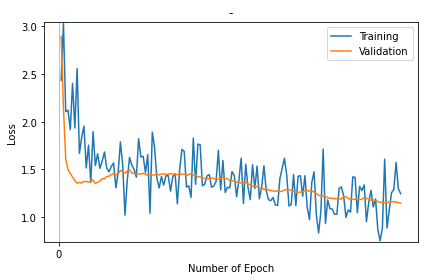

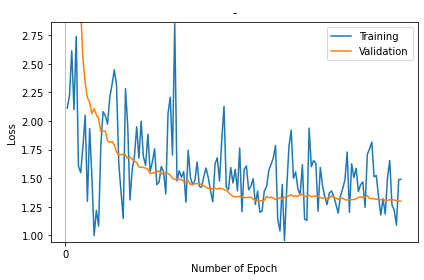

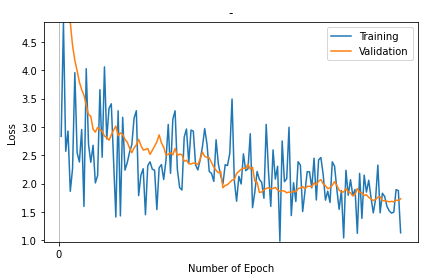

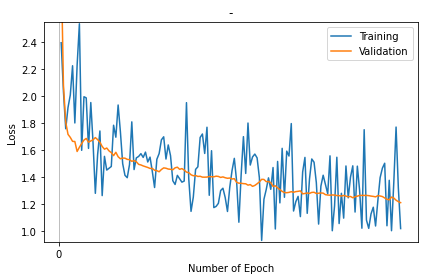

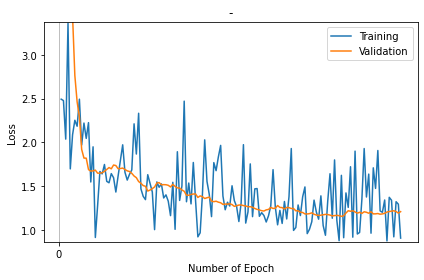

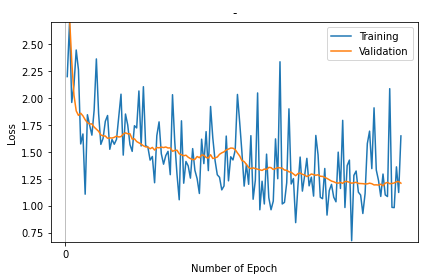

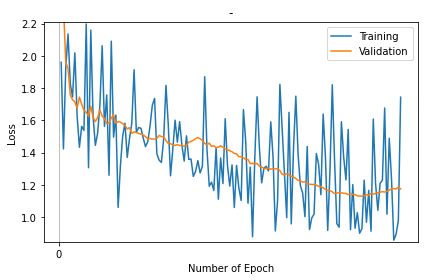

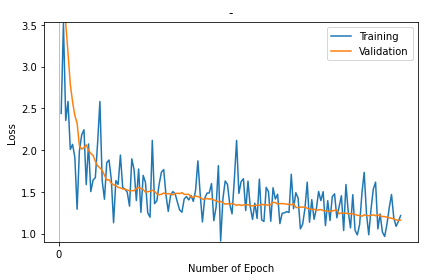

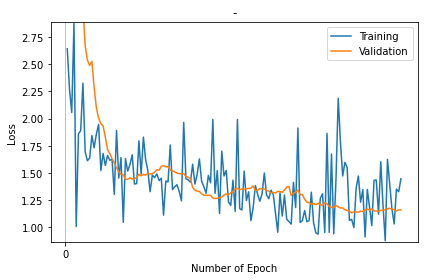

In [7]:
# >> 128-2-50, Epoch: 150, LR: 0.001, DR: 0

Train_Loss=[2.431373357772827, 3.029324531555176, 2.104755163192749, 2.120694637298584, 1.9167242050170898, 2.400980234146118, 1.9337961673736572, 2.5557141304016113, 1.6687142848968506, 1.8344478607177734, 1.9535129070281982, 1.5156023502349854, 1.7548694610595703, 1.3640799522399902, 1.8964524269104004, 1.5414164066314697, 1.6639680862426758, 1.5114305019378662, 1.5867575407028198, 1.6825611591339111, 1.5142889022827148, 1.4753050804138184, 1.5313682556152344, 1.5687167644500732, 1.3079198598861694, 1.467423439025879, 1.788509726524353, 1.547621250152588, 1.0223766565322876, 1.3838155269622803, 1.6260383129119873, 1.546612024307251, 1.502845048904419, 1.4192684888839722, 1.8215880393981934, 1.6304492950439453, 1.6373950242996216, 1.4683597087860107, 1.654262900352478, 1.0418461561203003, 1.891220211982727, 1.7295957803726196, 1.4095287322998047, 1.3061614036560059, 1.4255657196044922, 1.3370413780212402, 1.433943748474121, 1.4352542161941528, 1.2727527618408203, 1.4263972043991089, 1.4555974006652832, 1.1404025554656982, 1.499277114868164, 1.70966637134552, 1.6897294521331787, 1.3159116506576538, 1.3285999298095703, 1.2082817554473877, 1.8280665874481201, 1.3443610668182373, 1.7659472227096558, 1.7584812641143799, 1.3294894695281982, 1.3445546627044678, 1.4325963258743286, 1.4461684226989746, 1.3138490915298462, 1.3265113830566406, 1.3746650218963623, 1.7003939151763916, 1.2856321334838867, 1.5940196514129639, 1.258962631225586, 1.31300950050354, 1.3069798946380615, 1.4777860641479492, 1.435614824295044, 1.2144097089767456, 1.384645938873291, 1.618279218673706, 1.1428338289260864, 1.5558931827545166, 1.312807321548462, 1.1847901344299316, 1.5494797229766846, 1.3001428842544556, 1.5358803272247314, 1.1939505338668823, 1.3158780336380005, 1.538735032081604, 1.2809600830078125, 1.1841342449188232, 1.1730942726135254, 1.206788420677185, 1.1301329135894775, 1.1226903200149536, 1.4043211936950684, 1.5085684061050415, 1.617661476135254, 1.4404480457305908, 1.116905689239502, 1.1354644298553467, 1.447493553161621, 1.1205886602401733, 1.429508924484253, 1.4341943264007568, 1.2211534976959229, 1.4355040788650513, 1.1026222705841064, 0.9745333194732666, 1.363186240196228, 1.4752693176269531, 1.0258971452713013, 0.8356543779373169, 1.061378836631775, 1.713409662246704, 0.9353912472724915, 1.1815338134765625, 1.087612271308899, 1.0865025520324707, 1.0315428972244263, 1.031839370727539, 1.3015352487564087, 1.3170959949493408, 1.2242555618286133, 0.9984498023986816, 1.0760618448257446, 1.0526149272918701, 1.4228049516677856, 1.4170596599578857, 1.047839879989624, 1.3226817846298218, 1.2795504331588745, 1.3387246131896973, 0.9539340138435364, 1.1547653675079346, 1.2820969820022583, 1.1077618598937988, 1.1915937662124634, 0.8672653436660767, 0.7530263662338257, 0.8917896747589111, 1.6078872680664062, 0.8871530294418335, 1.0744494199752808, 1.2567863464355469, 1.2894296646118164, 1.5740399360656738, 1.298875093460083, 1.2473297119140625]
Test_Loss=[2.8931617736816406, 2.1461098194122314, 1.607663869857788, 1.497387170791626, 1.4590184688568115, 1.4200905561447144, 1.3850762844085693, 1.3561736345291138, 1.3643542528152466, 1.3599200248718262, 1.375649094581604, 1.3735533952713013, 1.368058443069458, 1.3782647848129272, 1.3896256685256958, 1.352765440940857, 1.3658260107040405, 1.3789921998977661, 1.404797911643982, 1.4015737771987915, 1.4270542860031128, 1.4292405843734741, 1.4469541311264038, 1.4547847509384155, 1.4477523565292358, 1.4517135620117188, 1.4915306568145752, 1.4760798215866089, 1.4607713222503662, 1.4835636615753174, 1.4942688941955566, 1.4639091491699219, 1.4583277702331543, 1.4560075998306274, 1.4519535303115845, 1.45231294631958, 1.4593970775604248, 1.449399471282959, 1.4367518424987793, 1.446759819984436, 1.4420148134231567, 1.4430686235427856, 1.4531599283218384, 1.4435211420059204, 1.452534794807434, 1.452966570854187, 1.4475181102752686, 1.451906442642212, 1.4545559883117676, 1.4528567790985107, 1.4462459087371826, 1.4474126100540161, 1.4511961936950684, 1.4517223834991455, 1.4504948854446411, 1.4378328323364258, 1.4479877948760986, 1.4564628601074219, 1.4378559589385986, 1.4402917623519897, 1.4232655763626099, 1.4215391874313354, 1.4133892059326172, 1.4059029817581177, 1.4022279977798462, 1.404318928718567, 1.4118906259536743, 1.40384840965271, 1.4003132581710815, 1.3970730304718018, 1.4004405736923218, 1.418713092803955, 1.4050507545471191, 1.404854416847229, 1.3810385465621948, 1.3794810771942139, 1.3816580772399902, 1.3665369749069214, 1.3652218580245972, 1.3580305576324463, 1.3621426820755005, 1.3658987283706665, 1.3474568128585815, 1.341475486755371, 1.3255743980407715, 1.3246406316757202, 1.3209044933319092, 1.3112022876739502, 1.3055814504623413, 1.2896209955215454, 1.2990309000015259, 1.2849112749099731, 1.2798163890838623, 1.2738962173461914, 1.274242877960205, 1.274454116821289, 1.268858790397644, 1.2731667757034302, 1.2845569849014282, 1.2892775535583496, 1.2864962816238403, 1.2837622165679932, 1.2704609632492065, 1.2655632495880127, 1.2607433795928955, 1.2646647691726685, 1.2674200534820557, 1.2785886526107788, 1.2797785997390747, 1.2737177610397339, 1.2782126665115356, 1.261896014213562, 1.2486329078674316, 1.2288227081298828, 1.2260531187057495, 1.2207916975021362, 1.217218041419983, 1.205142617225647, 1.1986786127090454, 1.1990225315093994, 1.193837285041809, 1.1931204795837402, 1.191505789756775, 1.1914074420928955, 1.2169764041900635, 1.2137303352355957, 1.1965736150741577, 1.1871360540390015, 1.186880111694336, 1.1903058290481567, 1.202750325202942, 1.1845444440841675, 1.1893939971923828, 1.2042956352233887, 1.1978521347045898, 1.1930255889892578, 1.1798911094665527, 1.1793090105056763, 1.1749427318572998, 1.163917064666748, 1.1548274755477905, 1.1567405462265015, 1.1501176357269287, 1.1531962156295776, 1.1603882312774658, 1.1620993614196777, 1.1627402305603027, 1.1580129861831665, 1.1545073986053467, 1.1460360288619995]
lossGraph(Train_Loss, Test_Loss)

# >> 128-2-50, Epoch: 150, LR: 0.0005, DR: 0

Train_Loss=[2.1123995780944824, 2.2236199378967285, 2.6134748458862305, 2.1004295349121094, 2.7400808334350586, 1.6048110723495483, 1.5480281114578247, 1.7752554416656494, 2.0507354736328125, 1.2971129417419434, 1.9349913597106934, 1.5108989477157593, 0.9978020191192627, 1.2186750173568726, 1.0809181928634644, 1.792424201965332, 2.0817272663116455, 2.0457324981689453, 1.973246693611145, 2.208656072616577, 2.318270683288574, 2.4480977058410645, 2.3154916763305664, 1.6303850412368774, 1.3828696012496948, 1.1477291584014893, 2.2826998233795166, 1.960871696472168, 1.309701919555664, 1.5761868953704834, 1.6926296949386597, 1.9498785734176636, 1.674605369567871, 1.9980162382125854, 1.6877806186676025, 1.6124228239059448, 1.8841369152069092, 1.5602495670318604, 1.6421306133270264, 1.758061408996582, 1.442786455154419, 1.4668208360671997, 1.6022617816925049, 1.5586349964141846, 1.362935185432434, 2.067023754119873, 2.208357095718384, 1.702185034751892, 2.851973533630371, 1.4757016897201538, 1.564707636833191, 1.5081121921539307, 1.5577086210250854, 1.288738489151001, 1.7433384656906128, 1.5074293613433838, 1.4417507648468018, 1.479248046875, 1.6425952911376953, 1.428980827331543, 1.421283483505249, 1.5160452127456665, 1.5888856649398804, 1.5017824172973633, 1.3880705833435059, 1.2938462495803833, 1.625150203704834, 1.6789599657058716, 1.4744486808776855, 1.833862066268921, 2.1286964416503906, 1.4245187044143677, 1.3988683223724365, 1.593017816543579, 1.4579795598983765, 1.5766552686691284, 1.389608383178711, 1.7636773586273193, 1.20833420753479, 1.5776710510253906, 1.6072239875793457, 1.3989503383636475, 1.428168535232544, 1.4952032566070557, 1.2701683044433594, 1.387431263923645, 1.2023022174835205, 1.2118985652923584, 1.3887197971343994, 1.4246515035629272, 1.5693511962890625, 1.6200904846191406, 1.6757606267929077, 1.786420226097107, 1.1397807598114014, 1.038962721824646, 1.4450219869613647, 0.9540441632270813, 1.4087121486663818, 1.7765114307403564, 1.9209877252578735, 1.499821424484253, 1.5539488792419434, 1.407513976097107, 1.3534433841705322, 1.6174416542053223, 1.1411789655685425, 1.1305718421936035, 1.9374936819076538, 1.6005334854125977, 1.6551541090011597, 1.6303081512451172, 1.2107572555541992, 1.5947604179382324, 1.4335081577301025, 1.3397234678268433, 1.2692060470581055, 1.3700042963027954, 1.3883689641952515, 1.3443622589111328, 1.2706613540649414, 1.1943141222000122, 1.3433748483657837, 1.4084786176681519, 1.4851245880126953, 1.7287261486053467, 1.2016185522079468, 1.626774549484253, 1.5054705142974854, 1.5871739387512207, 1.3826971054077148, 1.4440017938613892, 1.4670864343643188, 1.2446215152740479, 1.708246111869812, 1.7565487623214722, 1.8157639503479004, 1.5115177631378174, 1.5238077640533447, 1.341681957244873, 1.178055763244629, 1.3214784860610962, 1.1864428520202637, 1.5011838674545288, 1.6543784141540527, 1.2674810886383057, 1.221479892730713, 1.0897706747055054, 1.4879462718963623, 1.4903467893600464]
Test_Loss=[9.367528915405273, 6.697430610656738, 5.040509223937988, 3.8867173194885254, 3.4680609703063965, 2.9985485076904297, 2.9694597721099854, 2.5452160835266113, 2.3326494693756104, 2.2057504653930664, 2.1632347106933594, 2.063563108444214, 2.1089320182800293, 2.0547828674316406, 2.0193216800689697, 1.90803861618042, 1.9111782312393188, 1.9118508100509644, 1.8259031772613525, 1.8137474060058594, 1.820719599723816, 1.7883249521255493, 1.7296761274337769, 1.6998945474624634, 1.7075929641723633, 1.7076070308685303, 1.7017818689346313, 1.6730949878692627, 1.6876988410949707, 1.6649839878082275, 1.645094871520996, 1.639183521270752, 1.5976788997650146, 1.5966750383377075, 1.5934165716171265, 1.5888108015060425, 1.5786675214767456, 1.5411235094070435, 1.5441923141479492, 1.5491111278533936, 1.5584537982940674, 1.5628879070281982, 1.5370994806289673, 1.5497287511825562, 1.5402494668960571, 1.5420583486557007, 1.5265125036239624, 1.499557614326477, 1.4894766807556152, 1.490355372428894, 1.4896982908248901, 1.4883559942245483, 1.470377802848816, 1.4682613611221313, 1.4804280996322632, 1.444893717765808, 1.4452358484268188, 1.4517827033996582, 1.4514731168746948, 1.4524024724960327, 1.4442049264907837, 1.4347050189971924, 1.4194340705871582, 1.4104647636413574, 1.4071917533874512, 1.4103970527648926, 1.4119292497634888, 1.405125379562378, 1.4122906923294067, 1.4093677997589111, 1.3996332883834839, 1.395079255104065, 1.3763500452041626, 1.3566129207611084, 1.3428921699523926, 1.335627555847168, 1.3396376371383667, 1.3409215211868286, 1.3365873098373413, 1.3296012878417969, 1.3309757709503174, 1.332736849784851, 1.3340986967086792, 1.3183751106262207, 1.3080859184265137, 1.3042526245117188, 1.3013896942138672, 1.3051817417144775, 1.3053492307662964, 1.3405336141586304, 1.3279157876968384, 1.3355542421340942, 1.3260732889175415, 1.3146109580993652, 1.3145465850830078, 1.3319989442825317, 1.3163913488388062, 1.3321672677993774, 1.3351150751113892, 1.3470380306243896, 1.3563181161880493, 1.3396326303482056, 1.3466496467590332, 1.3379346132278442, 1.3654754161834717, 1.3565337657928467, 1.3365572690963745, 1.346747875213623, 1.3511744737625122, 1.3370029926300049, 1.3424664735794067, 1.3429629802703857, 1.3435207605361938, 1.331419825553894, 1.3241256475448608, 1.3255218267440796, 1.3225209712982178, 1.3266605138778687, 1.3462363481521606, 1.3310340642929077, 1.3254070281982422, 1.3149445056915283, 1.3284618854522705, 1.3240516185760498, 1.311591625213623, 1.3094236850738525, 1.3126598596572876, 1.3113371133804321, 1.3142138719558716, 1.3215913772583008, 1.3314393758773804, 1.3376634120941162, 1.3322277069091797, 1.3380941152572632, 1.3469940423965454, 1.3241301774978638, 1.3209298849105835, 1.3201870918273926, 1.3159763813018799, 1.3155982494354248, 1.3113782405853271, 1.3123184442520142, 1.307900071144104, 1.3051189184188843, 1.312595009803772, 1.3124312162399292, 1.3093067407608032, 1.3048830032348633, 1.2982836961746216, 1.2996385097503662]
lossGraph(Train_Loss, Test_Loss)

# >> 128-2-50, Epoch: 150, LR: 0.0001, DR: 0

Train_Loss=[2.834146022796631, 4.834973335266113, 2.5711145401000977, 2.9279918670654297, 1.8651251792907715, 2.2654881477355957, 3.9576656818389893, 2.5461339950561523, 2.38256573677063, 2.954772710800171, 1.5979549884796143, 4.028139591217041, 2.6949801445007324, 2.3769924640655518, 2.6766552925109863, 2.0127058029174805, 2.143566846847534, 3.658203601837158, 2.466157913208008, 4.060513019561768, 2.788693904876709, 3.327868938446045, 3.4086713790893555, 2.397786855697632, 1.4109652042388916, 3.2847163677215576, 1.4309847354888916, 3.1706249713897705, 2.2381319999694824, 2.368757963180542, 2.5515999794006348, 2.6862049102783203, 3.1552977561950684, 3.286461114883423, 1.7886507511138916, 2.149672269821167, 2.262930393218994, 1.4525885581970215, 2.3154118061065674, 2.3844404220581055, 2.2555198669433594, 2.236903190612793, 1.5421323776245117, 2.280916690826416, 2.335467576980591, 2.072643756866455, 2.4117751121520996, 3.04504132270813, 2.1820151805877686, 3.1331162452697754, 3.2851498126983643, 2.2495083808898926, 1.9312094449996948, 1.8877286911010742, 2.820953845977783, 2.9632790088653564, 2.3676676750183105, 2.9450337886810303, 2.9265642166137695, 2.327855110168457, 2.241948366165161, 2.4193661212921143, 2.6497232913970947, 2.9719481468200684, 2.6995158195495605, 2.21523380279541, 2.1809043884277344, 2.039802312850952, 2.7740087509155273, 2.34318470954895, 2.1470892429351807, 1.996079921722412, 2.334665298461914, 2.318894386291504, 2.5325076580047607, 3.4928836822509766, 2.0569612979888916, 1.6899845600128174, 2.1285388469696045, 1.9940507411956787, 2.5253286361694336, 2.229618549346924, 2.2619009017944336, 2.881174087524414, 1.5766063928604126, 1.8531339168548584, 2.214010000228882, 2.072730302810669, 2.0257632732391357, 1.741791009902954, 3.0456361770629883, 2.213719606399536, 1.5986237525939941, 2.5958120822906494, 2.080510377883911, 2.3059659004211426, 0.9838736057281494, 2.7532942295074463, 2.0341930389404297, 2.0870041847229004, 2.9942524433135986, 1.4365642070770264, 2.015573501586914, 1.6857216358184814, 2.3868255615234375, 2.3270623683929443, 1.5074667930603027, 1.8637456893920898, 2.210970878601074, 2.2095305919647217, 1.9260953664779663, 2.4489974975585938, 1.7115877866744995, 2.4194283485412598, 2.4603896141052246, 2.160954475402832, 1.709459900856018, 1.8672752380371094, 1.6683814525604248, 2.384528875350952, 2.3064239025115967, 1.9025481939315796, 1.5467461347579956, 1.8768324851989746, 1.0420598983764648, 2.2358481884002686, 1.7957003116607666, 2.069214344024658, 1.793401837348938, 1.89717698097229, 1.1237038373947144, 2.1810834407806396, 1.3862214088439941, 2.1495778560638428, 1.8507964611053467, 2.0599281787872314, 1.753440022468567, 1.4830809831619263, 1.722625970840454, 2.3275976181030273, 1.4855735301971436, 1.8308695554733276, 1.7735962867736816, 1.5989484786987305, 1.5199663639068604, 1.4796879291534424, 1.497443437576294, 1.8933382034301758, 1.8775436878204346, 1.132631540298462]
Test_Loss=[11.753653526306152, 7.6508402824401855, 7.026049613952637, 5.51491117477417, 4.8441925048828125, 4.434669017791748, 4.174853324890137, 3.9931459426879883, 3.791177749633789, 3.6590523719787598, 3.5604135990142822, 3.381538152694702, 3.219578742980957, 3.189161777496338, 2.960280418395996, 2.908928394317627, 2.9923107624053955, 2.9506564140319824, 2.927340507507324, 2.839482307434082, 2.81380558013916, 2.7656962871551514, 2.859983444213867, 2.942694664001465, 3.016634464263916, 2.844921112060547, 2.895659923553467, 2.8676512241363525, 2.7813892364501953, 2.7321910858154297, 2.6280901432037354, 2.54707407951355, 2.629927635192871, 2.682483434677124, 2.7801616191864014, 2.6755475997924805, 2.593762159347534, 2.60148286819458, 2.620635509490967, 2.516188859939575, 2.586681365966797, 2.6611576080322266, 2.7366631031036377, 2.861179828643799, 2.7198662757873535, 2.6425788402557373, 2.5078532695770264, 2.513336658477783, 2.5477969646453857, 2.506943464279175, 2.6225600242614746, 2.493792772293091, 2.5219929218292236, 2.510756492614746, 2.3943724632263184, 2.4127440452575684, 2.3521230220794678, 2.3458917140960693, 2.364438772201538, 2.3566930294036865, 2.3350138664245605, 2.435253143310547, 2.55672550201416, 2.4795119762420654, 2.463853597640991, 2.455355167388916, 2.3702166080474854, 2.293121099472046, 2.234640598297119, 2.191988945007324, 2.2174816131591797, 1.9273102283477783, 1.968368411064148, 1.9811244010925293, 2.0204885005950928, 2.062476396560669, 2.070608615875244, 2.179910182952881, 2.2173006534576416, 2.2528023719787598, 2.275662660598755, 2.266979217529297, 2.345114231109619, 2.2569494247436523, 2.2883315086364746, 2.042501449584961, 2.02553391456604, 1.8450888395309448, 1.8530577421188354, 1.8917152881622314, 1.9162527322769165, 1.9280797243118286, 1.9094009399414062, 1.9147988557815552, 1.9345123767852783, 1.889909267425537, 1.861966609954834, 1.8765252828598022, 1.8678555488586426, 1.8384227752685547, 1.8521544933319092, 1.8436788320541382, 1.8676519393920898, 1.8556902408599854, 1.9142793416976929, 1.9208976030349731, 1.948880672454834, 1.9085278511047363, 1.9514554738998413, 1.9540477991104126, 1.9455641508102417, 2.0126521587371826, 1.9753602743148804, 2.043954849243164, 2.072671890258789, 1.9955955743789673, 1.963503122329712, 1.9099878072738647, 1.926699161529541, 1.9734517335891724, 2.035748243331909, 1.968451976776123, 1.8839378356933594, 1.8553521633148193, 1.8520690202713013, 1.9169731140136719, 1.8541862964630127, 1.8388092517852783, 1.781205177307129, 1.8089395761489868, 1.9124665260314941, 1.8447542190551758, 1.8415888547897339, 1.7903743982315063, 1.8040820360183716, 1.7585304975509644, 1.728877305984497, 1.7009680271148682, 1.7213566303253174, 1.7614588737487793, 1.7692844867706299, 1.6996407508850098, 1.6988285779953003, 1.6901899576187134, 1.6799731254577637, 1.6866263151168823, 1.6799155473709106, 1.7098430395126343, 1.7006527185440063, 1.7321785688400269]
lossGraph(Train_Loss, Test_Loss)

# >> 128-2-50, Epoch: 150, LR: 0.001, DR: 0

Train_Loss=[2.3936896324157715, 2.032445192337036, 1.7570419311523438, 1.914438009262085, 2.0062286853790283, 2.223400831222534, 1.7999520301818848, 2.2269842624664307, 2.534156322479248, 1.5974199771881104, 1.9941742420196533, 1.9855573177337646, 1.6117804050445557, 1.951068639755249, 1.6499296426773071, 1.2792332172393799, 1.565925121307373, 1.7406282424926758, 1.262436866760254, 1.552821159362793, 1.451433539390564, 1.4644025564193726, 1.4778070449829102, 1.7830418348312378, 1.6946191787719727, 1.9328784942626953, 1.7340672016143799, 1.4986923933029175, 1.4125648736953735, 1.3950551748275757, 1.492405891418457, 1.8080955743789673, 1.4551154375076294, 1.5414848327636719, 1.5522716045379639, 1.572854995727539, 1.5450210571289062, 1.5842957496643066, 1.511261224746704, 1.5472984313964844, 1.4416404962539673, 1.3223645687103271, 1.5312042236328125, 1.5735950469970703, 1.6752309799194336, 1.6976114511489868, 1.5329774618148804, 1.6373019218444824, 1.557639241218567, 1.3726348876953125, 1.344942569732666, 1.412217617034912, 1.3875961303710938, 1.3619059324264526, 1.370121955871582, 1.950319766998291, 1.3871922492980957, 1.1458661556243896, 1.2516677379608154, 1.456451654434204, 1.475538730621338, 1.6926190853118896, 1.7183949947357178, 1.574306607246399, 1.7683407068252563, 1.2647713422775269, 1.5946437120437622, 1.1736706495285034, 1.1823933124542236, 1.2051537036895752, 1.2997963428497314, 1.317190170288086, 1.2480168342590332, 1.1449517011642456, 1.3243218660354614, 1.4478816986083984, 1.5380444526672363, 1.3707449436187744, 1.065446138381958, 1.416934609413147, 1.6987061500549316, 1.4263653755187988, 1.7995021343231201, 1.488598346710205, 1.5485923290252686, 1.5696589946746826, 1.5417698621749878, 1.3946552276611328, 0.9305891990661621, 1.2351828813552856, 1.3070571422576904, 1.3937971591949463, 1.3088927268981934, 1.4701944589614868, 1.015305995941162, 1.5152480602264404, 1.20858633518219, 1.6122649908065796, 1.2500048875808716, 1.5914983749389648, 1.5553306341171265, 1.7955055236816406, 1.1484168767929077, 1.2178627252578735, 1.25661039352417, 1.1070194244384766, 1.4373557567596436, 1.5451020002365112, 1.1312975883483887, 1.3853063583374023, 1.5334742069244385, 1.5093767642974854, 1.3580273389816284, 1.0517207384109497, 1.3324775695800781, 1.413199543952942, 1.3457244634628296, 1.2760056257247925, 1.556618571281433, 1.0023990869522095, 1.1862543821334839, 1.546209454536438, 1.0556954145431519, 1.2795497179031372, 1.0957838296890259, 1.4817490577697754, 1.245816707611084, 1.3999348878860474, 1.4827595949172974, 1.1407657861709595, 1.4804152250289917, 1.30025053024292, 1.0210890769958496, 1.7501928806304932, 1.081653356552124, 1.0201276540756226, 1.1266047954559326, 1.1765129566192627, 1.0375704765319824, 1.2245748043060303, 1.3954912424087524, 1.4655756950378418, 1.5018727779388428, 1.0392677783966064, 1.375638484954834, 1.0026806592941284, 1.358560562133789, 1.7696521282196045, 1.3181796073913574, 1.018479347229004]
Test_Loss=[2.9861905574798584, 2.079939365386963, 1.8058335781097412, 1.7158154249191284, 1.6932597160339355, 1.6638078689575195, 1.662656545639038, 1.588958501815796, 1.6201846599578857, 1.647755742073059, 1.6733639240264893, 1.6855785846710205, 1.6579753160476685, 1.6669431924819946, 1.6755330562591553, 1.6917080879211426, 1.6768369674682617, 1.6577707529067993, 1.6257905960083008, 1.6060402393341064, 1.6144957542419434, 1.5934312343597412, 1.5804569721221924, 1.5582597255706787, 1.5830612182617188, 1.5501850843429565, 1.5349103212356567, 1.5401239395141602, 1.5393848419189453, 1.5306569337844849, 1.5281449556350708, 1.516080379486084, 1.522074580192566, 1.5126081705093384, 1.4936662912368774, 1.4893707036972046, 1.4820233583450317, 1.4766321182250977, 1.470763921737671, 1.4636459350585938, 1.4636354446411133, 1.4499282836914062, 1.4470293521881104, 1.438730001449585, 1.4556866884231567, 1.4675194025039673, 1.4650497436523438, 1.4589040279388428, 1.4573270082473755, 1.4534586668014526, 1.467937707901001, 1.472777247428894, 1.4568109512329102, 1.4623939990997314, 1.4515297412872314, 1.436140775680542, 1.4320110082626343, 1.4166834354400635, 1.4092929363250732, 1.4113149642944336, 1.40421724319458, 1.4054334163665771, 1.3991345167160034, 1.398801326751709, 1.399572491645813, 1.403601884841919, 1.4020370244979858, 1.4014586210250854, 1.406253457069397, 1.4042714834213257, 1.3969848155975342, 1.4008748531341553, 1.3946576118469238, 1.3906399011611938, 1.3923707008361816, 1.3852241039276123, 1.3876274824142456, 1.3606208562850952, 1.3544731140136719, 1.3536320924758911, 1.35110342502594, 1.3498339653015137, 1.3398650884628296, 1.3441524505615234, 1.3308675289154053, 1.3378061056137085, 1.349847435951233, 1.3637796640396118, 1.382948875427246, 1.3819957971572876, 1.3658490180969238, 1.3661768436431885, 1.3590537309646606, 1.3306223154067993, 1.3352165222167969, 1.3193405866622925, 1.307096242904663, 1.2935293912887573, 1.285194993019104, 1.283825397491455, 1.2864246368408203, 1.2914586067199707, 1.2869179248809814, 1.291995644569397, 1.2941783666610718, 1.2973626852035522, 1.2754309177398682, 1.2780919075012207, 1.2815252542495728, 1.278756856918335, 1.2860214710235596, 1.2871005535125732, 1.2779992818832397, 1.2796834707260132, 1.2818963527679443, 1.2807430028915405, 1.2693721055984497, 1.2667546272277832, 1.2652971744537354, 1.2671685218811035, 1.2663789987564087, 1.2628037929534912, 1.2621580362319946, 1.2591962814331055, 1.2635316848754883, 1.2583402395248413, 1.2538461685180664, 1.256022572517395, 1.2464903593063354, 1.2543115615844727, 1.2581968307495117, 1.263832449913025, 1.2634443044662476, 1.263770341873169, 1.2639732360839844, 1.2621511220932007, 1.2588927745819092, 1.256577968597412, 1.253188967704773, 1.2620543241500854, 1.2594988346099854, 1.255371332168579, 1.2455289363861084, 1.234974980354309, 1.2313677072525024, 1.2516000270843506, 1.2446205615997314, 1.228342890739441, 1.2178301811218262, 1.210360050201416]
lossGraph(Train_Loss, Test_Loss)

# >> 128-2-50, Epoch: 150, LR: 0.001, DR: 0.1

Train_Loss=[2.4930167198181152, 2.4768991470336914, 2.036316394805908, 3.360596179962158, 1.6961467266082764, 2.085876941680908, 2.2519781589508057, 2.1836659908294678, 2.4927477836608887, 1.9696627855300903, 2.219852924346924, 2.0445547103881836, 2.224853515625, 1.5463082790374756, 1.948224425315857, 0.911950945854187, 1.2782199382781982, 1.666532039642334, 1.6386935710906982, 1.7464021444320679, 1.5537452697753906, 1.5373106002807617, 1.6419286727905273, 1.5951364040374756, 1.431447982788086, 1.6167006492614746, 1.7907655239105225, 1.9713106155395508, 1.657128095626831, 1.5681045055389404, 1.6342498064041138, 1.683978796005249, 2.2111098766326904, 1.8657803535461426, 2.331916332244873, 1.468080759048462, 1.38273024559021, 1.3447262048721313, 1.629744529724121, 1.5330157279968262, 1.4321454763412476, 1.001753807067871, 1.5471376180648804, 1.4857971668243408, 1.5242924690246582, 1.3636819124221802, 1.3993233442306519, 1.327226161956787, 1.1617094278335571, 1.5424940586090088, 1.005029320716858, 1.8922648429870605, 1.335384488105774, 1.5002816915512085, 2.470500946044922, 1.32036292552948, 1.534380316734314, 1.295845627784729, 1.7691694498062134, 1.3296129703521729, 0.9191666841506958, 0.9652979373931885, 1.4037081003189087, 2.0279347896575928, 1.5534298419952393, 1.405503511428833, 1.1505359411239624, 1.7677810192108154, 1.6755787134170532, 1.833183765411377, 1.9645969867706299, 1.3858120441436768, 1.2288695573806763, 1.31479012966156, 1.2714359760284424, 1.5031507015228271, 1.3336400985717773, 1.2665395736694336, 1.0943012237548828, 1.3084086179733276, 1.9729201793670654, 1.076528549194336, 1.204305648803711, 1.7530369758605957, 1.1501193046569824, 1.468047857284546, 1.4712069034576416, 1.153956651687622, 1.195651650428772, 1.1632283926010132, 1.088888168334961, 1.1595216989517212, 1.2722378969192505, 1.6873780488967896, 1.2579823732376099, 1.056694746017456, 1.2217589616775513, 1.0724186897277832, 1.3235456943511963, 1.1236262321472168, 1.3779791593551636, 1.9287781715393066, 0.9927643537521362, 1.026043176651001, 1.2835242748260498, 1.162545919418335, 1.3771941661834717, 1.4897083044052124, 0.9560577273368835, 1.0062110424041748, 1.0916692018508911, 1.339005708694458, 1.203305959701538, 1.1210187673568726, 1.387794852256775, 1.0480220317840576, 0.9371994733810425, 1.3266915082931519, 1.6407536268234253, 1.1319429874420166, 1.7985652685165405, 1.1072920560836792, 0.8751113414764404, 1.6223900318145752, 0.9093214869499207, 1.4213627576828003, 1.2560395002365112, 1.7206542491912842, 0.9154269099235535, 1.899096131324768, 0.9515429735183716, 0.969486653804779, 1.3501074314117432, 1.9287123680114746, 1.3745992183685303, 1.6364682912826538, 0.9608004093170166, 1.708188772201538, 1.473036527633667, 1.9062819480895996, 1.215368628501892, 1.200056791305542, 1.3404350280761719, 0.8725847601890564, 1.371094822883606, 1.3379342555999756, 0.9191983342170715, 1.3208110332489014, 1.2923955917358398, 0.9047858119010925]
Test_Loss=[14.7422456741333, 9.765022277832031, 5.86754035949707, 4.741442680358887, 3.9338345527648926, 3.44510555267334, 2.7639238834381104, 2.461840867996216, 2.291822671890259, 1.9183133840560913, 1.8195215463638306, 1.818576693534851, 1.6879712343215942, 1.6708579063415527, 1.6731524467468262, 1.6816385984420776, 1.6467516422271729, 1.647537350654602, 1.6524606943130493, 1.6678481101989746, 1.69025719165802, 1.7113416194915771, 1.6969289779663086, 1.7402290105819702, 1.7342920303344727, 1.69752037525177, 1.7006431818008423, 1.7051405906677246, 1.688844084739685, 1.6734915971755981, 1.6661089658737183, 1.6451324224472046, 1.6145671606063843, 1.5957660675048828, 1.551418423652649, 1.5323548316955566, 1.5050398111343384, 1.4974561929702759, 1.4430515766143799, 1.4538158178329468, 1.4703023433685303, 1.489426612854004, 1.535072922706604, 1.539069652557373, 1.514270544052124, 1.5160115957260132, 1.51486074924469, 1.5085369348526, 1.4897794723510742, 1.5188465118408203, 1.496173620223999, 1.4788894653320312, 1.4768023490905762, 1.4551055431365967, 1.440114140510559, 1.395444393157959, 1.3944766521453857, 1.4042450189590454, 1.4085220098495483, 1.4098647832870483, 1.3693511486053467, 1.3873742818832397, 1.3787637948989868, 1.3574886322021484, 1.366056203842163, 1.3731728792190552, 1.3279565572738647, 1.3211965560913086, 1.326467514038086, 1.3157360553741455, 1.30888032913208, 1.2899272441864014, 1.2942696809768677, 1.2928805351257324, 1.2977406978607178, 1.2879338264465332, 1.267443060874939, 1.2754398584365845, 1.282744288444519, 1.2838410139083862, 1.2764599323272705, 1.2722891569137573, 1.2636014223098755, 1.2638652324676514, 1.2573384046554565, 1.2432814836502075, 1.2331334352493286, 1.2264740467071533, 1.218024730682373, 1.214297890663147, 1.227673053741455, 1.232325553894043, 1.2552270889282227, 1.2440714836120605, 1.2455707788467407, 1.2771718502044678, 1.2555350065231323, 1.253658652305603, 1.237459659576416, 1.2553988695144653, 1.2532081604003906, 1.2431279420852661, 1.2432855367660522, 1.216698169708252, 1.2171237468719482, 1.2005242109298706, 1.1977635622024536, 1.181259036064148, 1.180905818939209, 1.184487223625183, 1.1935924291610718, 1.1775693893432617, 1.1686663627624512, 1.1640719175338745, 1.166704773902893, 1.171955943107605, 1.1760990619659424, 1.173883318901062, 1.168290138244629, 1.1581546068191528, 1.1623270511627197, 1.16463303565979, 1.1615110635757446, 1.1535353660583496, 1.1593095064163208, 1.191290259361267, 1.217663288116455, 1.211686611175537, 1.2174663543701172, 1.2035006284713745, 1.1898307800292969, 1.2000534534454346, 1.1868059635162354, 1.2058452367782593, 1.2000954151153564, 1.1888915300369263, 1.2067791223526, 1.1814801692962646, 1.1822776794433594, 1.1857908964157104, 1.177797555923462, 1.181654691696167, 1.188279151916504, 1.2027920484542847, 1.2084399461746216, 1.2123900651931763, 1.217435598373413, 1.2084109783172607, 1.1907541751861572, 1.207216501235962]
lossGraph(Train_Loss, Test_Loss)

# >> 128-2-50, Epoch: 150, LR: 0.001, DR: 0.2

Train_Loss=[2.199002981185913, 2.692603588104248, 1.958761215209961, 2.1215999126434326, 2.446178436279297, 2.262662410736084, 1.5732799768447876, 1.6659668684005737, 1.106346845626831, 1.8447588682174683, 1.747158408164978, 1.6550047397613525, 1.886622667312622, 2.363328456878662, 1.8555994033813477, 1.5693333148956299, 1.6261482238769531, 1.7837857007980347, 1.8375349044799805, 1.5235419273376465, 1.615393877029419, 1.570511817932129, 1.6165411472320557, 1.8214659690856934, 2.0356040000915527, 1.4694181680679321, 1.8513445854187012, 1.7498825788497925, 1.567827582359314, 1.5043675899505615, 1.7427197694778442, 1.7219147682189941, 2.0655159950256348, 1.5543818473815918, 2.105172634124756, 1.5586187839508057, 1.544143557548523, 1.4233462810516357, 1.4568603038787842, 1.2128263711929321, 1.6506086587905884, 1.7783570289611816, 1.4820022583007812, 1.3852046728134155, 1.4653658866882324, 1.5046136379241943, 1.2877535820007324, 2.0308852195739746, 1.5941612720489502, 1.2918834686279297, 1.0545437335968018, 1.7882338762283325, 1.2084672451019287, 1.4103811979293823, 1.3696954250335693, 1.2556737661361694, 1.5299389362335205, 1.3281210660934448, 1.2500096559524536, 1.1131694316864014, 1.6176292896270752, 1.3904914855957031, 1.6876883506774902, 1.325606107711792, 1.9213274717330933, 1.627988338470459, 1.4195621013641357, 1.2869540452957153, 1.2633988857269287, 1.1465123891830444, 1.1830137968063354, 1.6465425491333008, 1.2304661273956299, 1.4541528224945068, 1.4247878789901733, 1.516043782234192, 2.033170700073242, 1.7740979194641113, 1.4950439929962158, 1.1814005374908447, 1.3837100267410278, 1.198214054107666, 1.6502070426940918, 1.0594277381896973, 1.2378723621368408, 2.0471673011779785, 0.9615922570228577, 1.2268476486206055, 1.0155718326568604, 1.4785007238388062, 1.074552059173584, 0.9618380069732666, 1.0422627925872803, 1.6203606128692627, 1.2501457929611206, 2.336906671524048, 1.0157802104949951, 1.0305559635162354, 1.2124626636505127, 1.8995907306671143, 1.201208472251892, 1.251436471939087, 0.8421579003334045, 1.1786500215530396, 1.451419472694397, 1.1350347995758057, 1.2769712209701538, 1.4395555257797241, 1.184043288230896, 1.2647477388381958, 1.0886260271072388, 1.6522719860076904, 1.4713778495788574, 1.0775868892669678, 1.0645970106124878, 1.3452247381210327, 0.9121817350387573, 1.1395230293273926, 1.1974120140075684, 1.0788856744766235, 1.0358527898788452, 1.4971644878387451, 1.159574031829834, 1.7925512790679932, 0.9826102256774902, 1.37198007106781, 1.4233615398406982, 0.6740778684616089, 1.2813738584518433, 1.3216660022735596, 1.1253010034561157, 1.098555088043213, 0.9270139336585999, 1.1122381687164307, 1.5763914585113525, 1.692305564880371, 1.3439033031463623, 1.9089090824127197, 1.331101655960083, 1.2332991361618042, 1.085791826248169, 1.2936433553695679, 1.0998061895370483, 1.084850788116455, 2.086949348449707, 0.9840096235275269, 0.9816281795501709, 1.3604377508163452, 1.1223632097244263, 1.647830605506897]
Test_Loss=[3.8690009117126465, 2.7571935653686523, 2.3437280654907227, 2.026273250579834, 1.8806654214859009, 1.83865487575531, 1.8589643239974976, 1.834409475326538, 1.7981370687484741, 1.7713546752929688, 1.7583255767822266, 1.7598968744277954, 1.7301602363586426, 1.7101309299468994, 1.6908565759658813, 1.6571639776229858, 1.6484911441802979, 1.646738052368164, 1.6258375644683838, 1.6299338340759277, 1.627838134765625, 1.6346417665481567, 1.6462833881378174, 1.6377878189086914, 1.6416221857070923, 1.665228009223938, 1.6764932870864868, 1.6673803329467773, 1.6681100130081177, 1.6184704303741455, 1.6210136413574219, 1.5955159664154053, 1.5832463502883911, 1.5719928741455078, 1.5562400817871094, 1.5462870597839355, 1.5444308519363403, 1.5285530090332031, 1.5408501625061035, 1.516599178314209, 1.5399090051651, 1.5375577211380005, 1.5439964532852173, 1.5395259857177734, 1.5448925495147705, 1.5356738567352295, 1.5368040800094604, 1.5051029920578003, 1.512502908706665, 1.5153069496154785, 1.4818122386932373, 1.4728108644485474, 1.4636664390563965, 1.4688712358474731, 1.4499162435531616, 1.437212347984314, 1.4273124933242798, 1.4300060272216797, 1.4564106464385986, 1.4454408884048462, 1.4705934524536133, 1.4687602519989014, 1.4483574628829956, 1.4421045780181885, 1.473055362701416, 1.437943935394287, 1.4451454877853394, 1.451477289199829, 1.4771137237548828, 1.4904544353485107, 1.5000669956207275, 1.5176540613174438, 1.525658369064331, 1.5353000164031982, 1.533625841140747, 1.5212045907974243, 1.4895250797271729, 1.4617195129394531, 1.4188554286956787, 1.409390926361084, 1.383068323135376, 1.3550174236297607, 1.3440492153167725, 1.350514531135559, 1.344423532485962, 1.3383630514144897, 1.3322938680648804, 1.3271862268447876, 1.3401808738708496, 1.3348677158355713, 1.3553370237350464, 1.3532569408416748, 1.3359988927841187, 1.344172477722168, 1.3537181615829468, 1.3513723611831665, 1.3480829000473022, 1.330725908279419, 1.3287135362625122, 1.3142282962799072, 1.3102185726165771, 1.2940170764923096, 1.2779911756515503, 1.2971495389938354, 1.3032147884368896, 1.2913576364517212, 1.2842551469802856, 1.270485758781433, 1.2796376943588257, 1.2941908836364746, 1.288271427154541, 1.2823054790496826, 1.2868252992630005, 1.2730451822280884, 1.2716683149337769, 1.2624815702438354, 1.2529733180999756, 1.2402478456497192, 1.2281111478805542, 1.2221224308013916, 1.212193489074707, 1.2088388204574585, 1.2158021926879883, 1.207295536994934, 1.225093126296997, 1.2233117818832397, 1.217294692993164, 1.2085109949111938, 1.2132422924041748, 1.2169736623764038, 1.2067639827728271, 1.206048846244812, 1.2043286561965942, 1.2011760473251343, 1.2026253938674927, 1.20885169506073, 1.2038699388504028, 1.192474603652954, 1.193444848060608, 1.1911389827728271, 1.1994075775146484, 1.184259057044983, 1.2086068391799927, 1.2160519361495972, 1.204134464263916, 1.2060911655426025, 1.2104989290237427, 1.221510887145996, 1.2243363857269287, 1.2086561918258667]
lossGraph(Train_Loss, Test_Loss)

# >> 128-2-50, Epoch: 150, LR: 0.001, DR: 0.3

Train_Loss=[1.9601411819458008, 1.4231524467468262, 1.921234130859375, 2.1362030506134033, 1.8269641399383545, 1.7449119091033936, 2.018648386001587, 1.6276774406433105, 1.4332845211029053, 1.562760829925537, 1.5378057956695557, 2.1977593898773193, 1.3063452243804932, 2.159862995147705, 1.6246484518051147, 1.4448469877243042, 1.5200153589248657, 1.695181131362915, 2.062851667404175, 1.5628063678741455, 1.7581413984298706, 1.2599068880081177, 2.091475486755371, 1.4964617490768433, 1.6328355073928833, 1.0600152015686035, 1.3174320459365845, 1.5025548934936523, 1.582239031791687, 1.3702445030212402, 1.4876017570495605, 1.5820541381835938, 1.9139577150344849, 1.526084065437317, 1.5555250644683838, 1.5511157512664795, 1.4914971590042114, 1.4371421337127686, 1.4671005010604858, 1.564244031906128, 1.6930711269378662, 1.7360869646072388, 1.3933308124542236, 1.3530051708221436, 1.3390793800354004, 1.4867087602615356, 1.8167591094970703, 1.576594352722168, 1.255997896194458, 1.4208170175552368, 1.6013891696929932, 1.4647955894470215, 1.5919533967971802, 1.4456905126571655, 1.3476982116699219, 1.5039488077163696, 1.3583025932312012, 1.3595932722091675, 1.2518730163574219, 1.283320665359497, 1.350182056427002, 1.2736406326293945, 1.3159058094024658, 1.8705644607543945, 1.4198853969573975, 1.191580057144165, 1.216652512550354, 1.1651145219802856, 1.4305827617645264, 1.1109139919281006, 1.3667479753494263, 1.2078648805618286, 1.6103076934814453, 1.3202712535858154, 1.1924024820327759, 1.3236706256866455, 1.0595779418945312, 1.3205207586288452, 1.1785093545913696, 1.1029016971588135, 1.6667933464050293, 1.4683029651641846, 1.085705041885376, 1.310049057006836, 0.8782051801681519, 1.3727245330810547, 1.7460483312606812, 1.4315108060836792, 1.2123252153396606, 1.3033945560455322, 1.3153361082077026, 1.2863757610321045, 1.5906503200531006, 1.373296856880188, 0.9139964580535889, 1.1050701141357422, 1.8232046365737915, 1.5455971956253052, 1.2567503452301025, 0.9964321851730347, 1.6498661041259766, 0.9578003883361816, 1.433886170387268, 1.7498290538787842, 1.387230396270752, 1.195366621017456, 1.1487743854522705, 1.0023349523544312, 1.4380992650985718, 0.9222760796546936, 0.9946997165679932, 1.018195390701294, 1.3939560651779175, 1.3271520137786865, 1.1390851736068726, 1.6387670040130615, 1.3724043369293213, 0.9172976016998291, 1.2935597896575928, 1.8210793733596802, 1.3505938053131104, 0.9590964913368225, 0.9368324279785156, 1.5916917324066162, 1.3725862503051758, 1.2305843830108643, 1.5437055826187134, 0.9214879274368286, 1.201599359512329, 0.9308556318283081, 1.027214765548706, 0.8999986052513123, 0.9276434183120728, 1.229142189025879, 0.9680964350700378, 1.165870189666748, 0.9119157195091248, 1.6081472635269165, 1.2077765464782715, 1.0419628620147705, 1.2097513675689697, 1.2286059856414795, 1.676680088043213, 1.0176798105239868, 1.4888997077941895, 1.2375606298446655, 0.8566188812255859, 0.8930341005325317, 0.9779083728790283, 1.743910551071167]
Test_Loss=[2.6941473484039307, 2.317847967147827, 1.9614241123199463, 1.9229137897491455, 1.7586896419525146, 1.7277005910873413, 1.7150534391403198, 1.675435185432434, 1.7445992231369019, 1.7003105878829956, 1.66244375705719, 1.6497559547424316, 1.6253697872161865, 1.6878529787063599, 1.6190656423568726, 1.5920798778533936, 1.6172504425048828, 1.6637852191925049, 1.6271049976348877, 1.6100411415100098, 1.5789198875427246, 1.5860594511032104, 1.6140756607055664, 1.634468913078308, 1.5817441940307617, 1.5922017097473145, 1.5889766216278076, 1.5794893503189087, 1.5671412944793701, 1.5467147827148438, 1.554747462272644, 1.5199711322784424, 1.5287028551101685, 1.5241291522979736, 1.5195021629333496, 1.5151731967926025, 1.5098494291305542, 1.4990485906600952, 1.4857182502746582, 1.4873182773590088, 1.4835718870162964, 1.4841029644012451, 1.4886341094970703, 1.5066940784454346, 1.5000123977661133, 1.4960906505584717, 1.475480079650879, 1.4574089050292969, 1.4551610946655273, 1.4482113122940063, 1.444606065750122, 1.4495246410369873, 1.4437493085861206, 1.4443963766098022, 1.4394538402557373, 1.4460437297821045, 1.4649454355239868, 1.4689010381698608, 1.4769103527069092, 1.4865620136260986, 1.4931414127349854, 1.4857642650604248, 1.4754953384399414, 1.456821084022522, 1.4494177103042603, 1.458418607711792, 1.4384775161743164, 1.4426584243774414, 1.4308631420135498, 1.4339765310287476, 1.442438006401062, 1.4337862730026245, 1.4226564168930054, 1.4169349670410156, 1.4120917320251465, 1.405161738395691, 1.3948408365249634, 1.3916552066802979, 1.3739153146743774, 1.3741463422775269, 1.3678284883499146, 1.3570315837860107, 1.3574928045272827, 1.3314589262008667, 1.3338204622268677, 1.329696774482727, 1.3326913118362427, 1.3155410289764404, 1.3106510639190674, 1.301316738128662, 1.3003239631652832, 1.3035730123519897, 1.2970962524414062, 1.299731969833374, 1.2996058464050293, 1.299121618270874, 1.2889467477798462, 1.2652698755264282, 1.2623845338821411, 1.2694764137268066, 1.2617292404174805, 1.2536057233810425, 1.2483322620391846, 1.2387855052947998, 1.2278324365615845, 1.2239402532577515, 1.2172943353652954, 1.2188349962234497, 1.2057006359100342, 1.203413486480713, 1.202854037284851, 1.2020691633224487, 1.1985756158828735, 1.1906814575195312, 1.1885946989059448, 1.182138204574585, 1.1710851192474365, 1.1653484106063843, 1.1648523807525635, 1.1564183235168457, 1.1455583572387695, 1.1482040882110596, 1.151497721672058, 1.1496189832687378, 1.1471595764160156, 1.1463227272033691, 1.138828158378601, 1.1462045907974243, 1.1404235363006592, 1.1394779682159424, 1.1313663721084595, 1.1306037902832031, 1.1300746202468872, 1.1328307390213013, 1.1387014389038086, 1.135975956916809, 1.1469827890396118, 1.1431745290756226, 1.145638346672058, 1.1512342691421509, 1.1545281410217285, 1.157555341720581, 1.1554299592971802, 1.1594771146774292, 1.1661996841430664, 1.1752101182937622, 1.176758050918579, 1.1744552850723267, 1.1855612993240356, 1.174609899520874]
lossGraph(Train_Loss, Test_Loss)

# >> 128-2-50, Epoch: 150, LR: 0.001, DR: 0.4

Train_Loss=[2.4393532276153564, 3.519711494445801, 2.3549623489379883, 2.5836455821990967, 2.0080065727233887, 2.06850528717041, 1.9139326810836792, 1.2918814420700073, 1.9889520406723022, 2.181478977203369, 2.243875503540039, 1.5870144367218018, 2.0735745429992676, 1.5029728412628174, 1.639948844909668, 1.670670509338379, 2.0881848335266113, 2.582170009613037, 1.6340904235839844, 1.4109596014022827, 1.8488608598709106, 1.881199836730957, 1.6495141983032227, 1.1295288801193237, 1.6347670555114746, 1.5892834663391113, 1.9404858350753784, 1.5532705783843994, 1.5317742824554443, 1.4957730770111084, 1.3282301425933838, 1.8950598239898682, 1.7644294500350952, 1.3955168724060059, 1.7732083797454834, 1.254173755645752, 1.697023868560791, 1.6116836071014404, 1.2488659620285034, 1.1958953142166138, 2.1161601543426514, 1.358576774597168, 1.3934457302093506, 1.5907387733459473, 1.7350618839263916, 1.7671809196472168, 1.4619020223617554, 1.265882968902588, 1.4548758268356323, 1.502507209777832, 1.4794073104858398, 1.3776274919509888, 1.2821059226989746, 1.2559175491333008, 1.4151732921600342, 1.4435539245605469, 1.4026694297790527, 1.4569897651672363, 1.3854296207427979, 1.5199021100997925, 1.8706820011138916, 1.4798147678375244, 1.1392338275909424, 1.4223616123199463, 1.4840764999389648, 1.4873459339141846, 1.5986933708190918, 1.1545300483703613, 1.3166567087173462, 1.8139843940734863, 0.9114481210708618, 1.4179203510284424, 1.63008451461792, 1.5884130001068115, 1.3504457473754883, 1.2367620468139648, 1.6440495252609253, 2.1164302825927734, 1.4814465045928955, 1.6232035160064697, 1.6570765972137451, 1.2761141061782837, 1.6285674571990967, 1.3186825513839722, 1.1697170734405518, 1.3646440505981445, 1.1804585456848145, 1.6520283222198486, 1.1635029315948486, 1.14531672000885, 1.5538160800933838, 1.5016520023345947, 1.1478406190872192, 1.548658847808838, 1.4138883352279663, 1.471083641052246, 1.1195671558380127, 1.243342399597168, 1.2475247383117676, 1.2631683349609375, 1.252791166305542, 1.7104063034057617, 1.2969982624053955, 1.489401936531067, 1.424121379852295, 1.0566517114639282, 1.1132190227508545, 1.2995433807373047, 1.6155757904052734, 1.1357017755508423, 1.406199336051941, 1.1707208156585693, 1.294043779373169, 1.5046130418777466, 1.3947956562042236, 1.502002477645874, 1.095477819442749, 1.3943389654159546, 1.1566704511642456, 1.4415360689163208, 1.476163625717163, 1.1888147592544556, 1.3229936361312866, 1.4535908699035645, 1.0363670587539673, 1.5875473022460938, 1.2639391422271729, 1.0681703090667725, 1.4658609628677368, 1.03920316696167, 0.9839510917663574, 1.108439326286316, 1.477938175201416, 1.7338318824768066, 1.243148922920227, 0.9854624271392822, 1.2916139364242554, 1.5307176113128662, 1.6158921718597412, 1.0557842254638672, 1.2341634035110474, 1.017545461654663, 0.9652796387672424, 1.1138023138046265, 1.3091238737106323, 1.4684348106384277, 1.1876027584075928, 1.0867154598236084, 1.1451632976531982, 1.21548330783844]
Test_Loss=[7.231528282165527, 4.1945109367370605, 3.5145957469940186, 3.1662635803222656, 2.788337469100952, 2.5796141624450684, 2.415701389312744, 2.3211328983306885, 2.0538928508758545, 2.0120294094085693, 2.0291378498077393, 2.0639331340789795, 1.9986459016799927, 1.9591648578643799, 1.9375264644622803, 1.8644434213638306, 1.8124935626983643, 1.7872447967529297, 1.7580132484436035, 1.6984525918960571, 1.6421045064926147, 1.645209789276123, 1.6034852266311646, 1.5831743478775024, 1.5750724077224731, 1.5540294647216797, 1.547696590423584, 1.534680962562561, 1.5320860147476196, 1.5229617357254028, 1.512500524520874, 1.514215350151062, 1.513383388519287, 1.5385538339614868, 1.5529391765594482, 1.539583683013916, 1.5289583206176758, 1.4952077865600586, 1.5013236999511719, 1.5074326992034912, 1.5191584825515747, 1.50450599193573, 1.4749737977981567, 1.4649829864501953, 1.470347285270691, 1.4861701726913452, 1.474246621131897, 1.4793747663497925, 1.472357153892517, 1.4645482301712036, 1.4782509803771973, 1.4832484722137451, 1.4791202545166016, 1.48984956741333, 1.4703965187072754, 1.4686046838760376, 1.4714136123657227, 1.4405864477157593, 1.4333990812301636, 1.4513416290283203, 1.4417812824249268, 1.4336274862289429, 1.4119970798492432, 1.412200927734375, 1.4202831983566284, 1.4122223854064941, 1.4179916381835938, 1.400409460067749, 1.3952906131744385, 1.377744197845459, 1.3865684270858765, 1.3699430227279663, 1.351534128189087, 1.3569138050079346, 1.3540369272232056, 1.3605695962905884, 1.3508895635604858, 1.3375588655471802, 1.3474318981170654, 1.3372091054916382, 1.3423599004745483, 1.3442413806915283, 1.3460172414779663, 1.3336068391799927, 1.3313367366790771, 1.3371033668518066, 1.340379238128662, 1.3379448652267456, 1.3523715734481812, 1.3430805206298828, 1.3453807830810547, 1.3393900394439697, 1.3490923643112183, 1.3747273683547974, 1.3719761371612549, 1.35272216796875, 1.3590612411499023, 1.3593016862869263, 1.3562663793563843, 1.3532665967941284, 1.349393367767334, 1.3448238372802734, 1.3586987257003784, 1.3139737844467163, 1.3098076581954956, 1.3174536228179932, 1.3173178434371948, 1.316788673400879, 1.3035695552825928, 1.2945090532302856, 1.288735032081604, 1.2921595573425293, 1.2806425094604492, 1.284620761871338, 1.2875175476074219, 1.2765651941299438, 1.2715051174163818, 1.2674481868743896, 1.265443205833435, 1.2711783647537231, 1.2780991792678833, 1.2842931747436523, 1.2368398904800415, 1.244976282119751, 1.245230793952942, 1.2444143295288086, 1.2373485565185547, 1.2384217977523804, 1.2354933023452759, 1.229612112045288, 1.217692255973816, 1.2175085544586182, 1.2077311277389526, 1.2251478433609009, 1.2155468463897705, 1.2140063047409058, 1.2180958986282349, 1.2248421907424927, 1.2132858037948608, 1.2256029844284058, 1.2117176055908203, 1.2044439315795898, 1.2037960290908813, 1.1962313652038574, 1.1892986297607422, 1.183110237121582, 1.176763653755188, 1.1635972261428833, 1.158859133720398, 1.1593974828720093]
lossGraph(Train_Loss, Test_Loss)

# >> 128-2-50, Epoch: 150, LR: 0.001, DR: 0.5

Train_Loss=[2.6429696083068848, 2.271223545074463, 2.0557479858398438, 2.875830888748169, 1.0053333044052124, 1.8603729009628296, 1.8885385990142822, 2.3264856338500977, 1.6940970420837402, 1.6118555068969727, 1.6368328332901, 1.843564510345459, 1.7311538457870483, 1.8572560548782349, 1.945981740951538, 1.5211780071258545, 1.6785080432891846, 1.5679570436477661, 1.6609523296356201, 1.615791916847229, 1.625974178314209, 1.3016613721847534, 1.8900974988937378, 1.4519633054733276, 1.640305757522583, 1.0443933010101318, 1.6311501264572144, 1.5160704851150513, 1.5777164697647095, 1.6664732694625854, 1.3970677852630615, 1.4013683795928955, 1.7941988706588745, 1.4879868030548096, 1.8287873268127441, 1.6224827766418457, 1.5187336206436157, 1.3265535831451416, 1.480029821395874, 1.4561693668365479, 1.4904595613479614, 1.4287101030349731, 1.4502408504486084, 1.1106410026550293, 1.4246900081634521, 1.4153658151626587, 1.7564890384674072, 1.345982313156128, 1.3722584247589111, 1.39078688621521, 1.3278429508209229, 1.2414233684539795, 1.9646215438842773, 1.4451732635498047, 1.4356032609939575, 1.4141223430633545, 1.5799131393432617, 1.3967772722244263, 1.4854440689086914, 1.628375768661499, 1.4217960834503174, 1.3720732927322388, 1.3121027946472168, 1.475897192955017, 1.408872127532959, 1.9921462535858154, 1.3116623163223267, 1.5207091569900513, 1.1265017986297607, 1.6990903615951538, 1.4711189270019531, 1.5221855640411377, 1.2321187257766724, 1.200583815574646, 1.43280029296875, 1.145005464553833, 1.9917601346969604, 1.1712058782577515, 1.1576368808746338, 1.5173250436782837, 1.2453635931015015, 1.3252464532852173, 1.0594031810760498, 1.1766433715820312, 1.3830842971801758, 1.3030164241790771, 1.2380712032318115, 1.3066723346710205, 1.4986546039581299, 1.2953435182571411, 1.2624489068984985, 1.3401539325714111, 1.2999697923660278, 1.125577688217163, 0.9531803131103516, 1.315895676612854, 1.1020705699920654, 1.2945582866668701, 1.0731741189956665, 1.05010986328125, 1.0282878875732422, 1.4125123023986816, 1.1801507472991943, 1.9132360219955444, 1.0430123805999756, 1.0593825578689575, 1.152770757675171, 1.0496997833251953, 1.0601741075515747, 1.3218470811843872, 1.0379008054733276, 0.9479401111602783, 0.9349579811096191, 1.2659111022949219, 1.3076369762420654, 0.9505462050437927, 1.8634941577911377, 0.9512214064598083, 1.6740597486495972, 0.9373379945755005, 1.4374052286148071, 2.187147617340088, 1.7827320098876953, 1.4709491729736328, 1.5970826148986816, 1.5489102602005005, 1.0615595579147339, 1.0715875625610352, 0.9956343173980713, 1.3584015369415283, 1.4710383415222168, 1.229598045349121, 1.3456108570098877, 0.9091148376464844, 1.3476569652557373, 1.1799049377441406, 1.0144861936569214, 1.4309618473052979, 1.4341576099395752, 1.1188033819198608, 1.602250099182129, 1.202059268951416, 0.8749150037765503, 1.6241456270217896, 1.3931998014450073, 1.1652710437774658, 1.0293406248092651, 1.3503185510635376, 1.3257335424423218, 1.446068286895752]
Test_Loss=[11.328792572021484, 7.9135284423828125, 5.918912887573242, 5.065187454223633, 4.510283470153809, 3.9274179935455322, 3.4737019538879395, 3.0266058444976807, 2.6725151538848877, 2.5380945205688477, 2.489070177078247, 2.5268824100494385, 2.2860395908355713, 2.1007394790649414, 2.0042731761932373, 1.9522196054458618, 1.9323457479476929, 1.8294388055801392, 1.7133880853652954, 1.6777280569076538, 1.629738688468933, 1.5921401977539062, 1.5468910932540894, 1.5107386112213135, 1.4839509725570679, 1.484013319015503, 1.438422679901123, 1.4411848783493042, 1.452730655670166, 1.4437965154647827, 1.4459820985794067, 1.4569610357284546, 1.4873074293136597, 1.4722001552581787, 1.4867793321609497, 1.4787694215774536, 1.4983521699905396, 1.489203691482544, 1.4926899671554565, 1.5058330297470093, 1.5281436443328857, 1.5248627662658691, 1.5600125789642334, 1.5676106214523315, 1.555298924446106, 1.5571105480194092, 1.5251256227493286, 1.5186916589736938, 1.5091739892959595, 1.4976696968078613, 1.4927947521209717, 1.492159366607666, 1.49245285987854, 1.4673858880996704, 1.4590342044830322, 1.4456106424331665, 1.3665155172348022, 1.339683175086975, 1.3315248489379883, 1.3295307159423828, 1.306411862373352, 1.294318675994873, 1.2919204235076904, 1.293107509613037, 1.2923868894577026, 1.2690120935440063, 1.263474702835083, 1.2653205394744873, 1.2739403247833252, 1.276250958442688, 1.2957097291946411, 1.3059276342391968, 1.2982274293899536, 1.316521167755127, 1.3228157758712769, 1.3535828590393066, 1.356333613395691, 1.343631625175476, 1.3536485433578491, 1.3475596904754639, 1.3538079261779785, 1.356744647026062, 1.3595895767211914, 1.3789628744125366, 1.3371531963348389, 1.3394583463668823, 1.3554342985153198, 1.3552032709121704, 1.3503892421722412, 1.3388185501098633, 1.3317359685897827, 1.315759301185608, 1.3193124532699585, 1.3137410879135132, 1.33104407787323, 1.3252865076065063, 1.3203572034835815, 1.3420194387435913, 1.3685624599456787, 1.3732939958572388, 1.291394829750061, 1.3132991790771484, 1.3219215869903564, 1.343280553817749, 1.2990589141845703, 1.299903154373169, 1.2575162649154663, 1.230853796005249, 1.2262026071548462, 1.2086938619613647, 1.2179627418518066, 1.206350326538086, 1.2201346158981323, 1.205389380455017, 1.2044341564178467, 1.2255644798278809, 1.2149006128311157, 1.1906017065048218, 1.180496096611023, 1.181551218032837, 1.2004767656326294, 1.1871219873428345, 1.1760098934173584, 1.1772830486297607, 1.1601682901382446, 1.1541380882263184, 1.1459790468215942, 1.1327956914901733, 1.1405366659164429, 1.139351725578308, 1.138298749923706, 1.1469931602478027, 1.144437551498413, 1.1597591638565063, 1.1653714179992676, 1.158505916595459, 1.1676206588745117, 1.149773120880127, 1.148789882659912, 1.1468555927276611, 1.154013991355896, 1.1550129652023315, 1.1608117818832397, 1.1690093278884888, 1.1736505031585693, 1.1652226448059082, 1.1613856554031372, 1.149391770362854, 1.158376693725586, 1.1590447425842285]
lossGraph(Train_Loss, Test_Loss)



/tmp/ipykernel_91218/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_91218/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_91218/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_91218/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_91218/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_91218/4288951258.py:

test_loss_min: 1.1460360288619995 test_loss_min_epoch: 149
test_loss_min: 1.2982836961746216 test_loss_min_epoch: 148
test_loss_min: 1.6799155473709106 test_loss_min_epoch: 146
test_loss_min: 1.210360050201416 test_loss_min_epoch: 149
test_loss_min: 1.1535353660583496 test_loss_min_epoch: 123
test_loss_min: 1.184259057044983 test_loss_min_epoch: 141
test_loss_min: 1.1300746202468872 test_loss_min_epoch: 132
test_loss_min: 1.158859133720398 test_loss_min_epoch: 148
test_loss_min: 1.1327956914901733 test_loss_min_epoch: 127


/tmp/ipykernel_91218/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_91218/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_91218/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


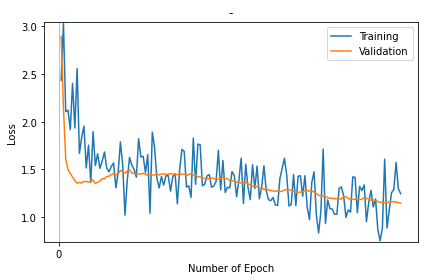

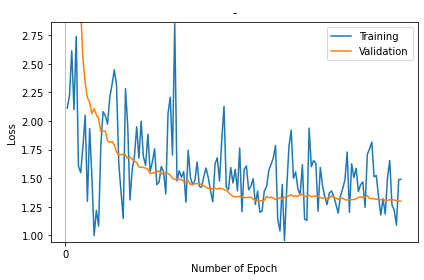

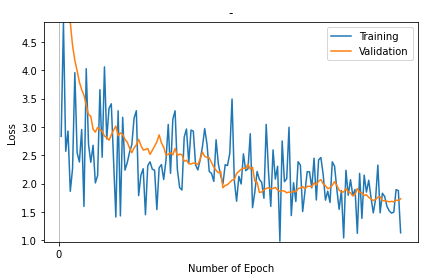

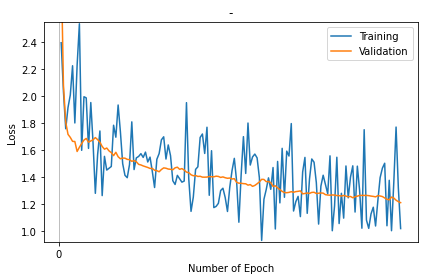

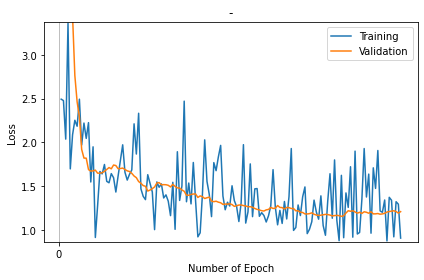

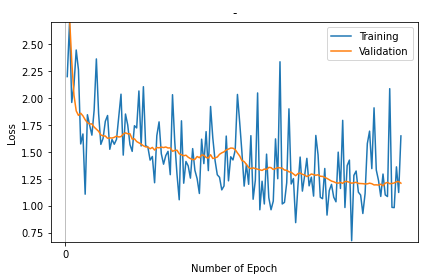

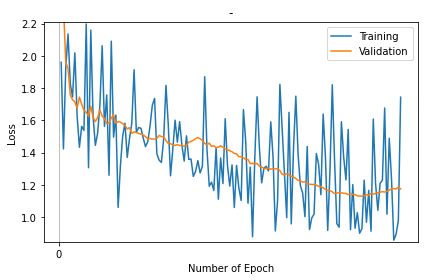

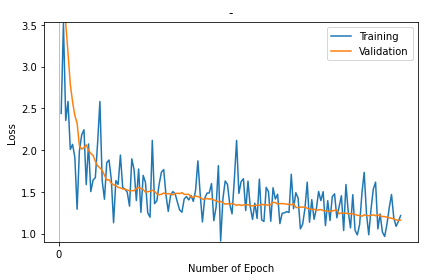

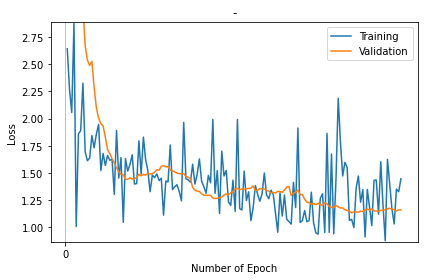

In [5]:

# >> 128-2-50, Epoch: 150, LR: 0.001, DR: 0
Train_Loss= [2.431373357772827, 3.029324531555176, 2.104755163192749, 2.120694637298584, 1.9167242050170898, 2.400980234146118, 1.9337961673736572, 2.5557141304016113, 1.6687142848968506, 1.8344478607177734, 1.9535129070281982, 1.5156023502349854, 1.7548694610595703, 1.3640799522399902, 1.8964524269104004, 1.5414164066314697, 1.6639680862426758, 1.5114305019378662, 1.5867575407028198, 1.6825611591339111, 1.5142889022827148, 1.4753050804138184, 1.5313682556152344, 1.5687167644500732, 1.3079198598861694, 1.467423439025879, 1.788509726524353, 1.547621250152588, 1.0223766565322876, 1.3838155269622803, 1.6260383129119873, 1.546612024307251, 1.502845048904419, 1.4192684888839722, 1.8215880393981934, 1.6304492950439453, 1.6373950242996216, 1.4683597087860107, 1.654262900352478, 1.0418461561203003, 1.891220211982727, 1.7295957803726196, 1.4095287322998047, 1.3061614036560059, 1.4255657196044922, 1.3370413780212402, 1.433943748474121, 1.4352542161941528, 1.2727527618408203, 1.4263972043991089, 1.4555974006652832, 1.1404025554656982, 1.499277114868164, 1.70966637134552, 1.6897294521331787, 1.3159116506576538, 1.3285999298095703, 1.2082817554473877, 1.8280665874481201, 1.3443610668182373, 1.7659472227096558, 1.7584812641143799, 1.3294894695281982, 1.3445546627044678, 1.4325963258743286, 1.4461684226989746, 1.3138490915298462, 1.3265113830566406, 1.3746650218963623, 1.7003939151763916, 1.2856321334838867, 1.5940196514129639, 1.258962631225586, 1.31300950050354, 1.3069798946380615, 1.4777860641479492, 1.435614824295044, 1.2144097089767456, 1.384645938873291, 1.618279218673706, 1.1428338289260864, 1.5558931827545166, 1.312807321548462, 1.1847901344299316, 1.5494797229766846, 1.3001428842544556, 1.5358803272247314, 1.1939505338668823, 1.3158780336380005, 1.538735032081604, 1.2809600830078125, 1.1841342449188232, 1.1730942726135254, 1.206788420677185, 1.1301329135894775, 1.1226903200149536, 1.4043211936950684, 1.5085684061050415, 1.617661476135254, 1.4404480457305908, 1.116905689239502, 1.1354644298553467, 1.447493553161621, 1.1205886602401733, 1.429508924484253, 1.4341943264007568, 1.2211534976959229, 1.4355040788650513, 1.1026222705841064, 0.9745333194732666, 1.363186240196228, 1.4752693176269531, 1.0258971452713013, 0.8356543779373169, 1.061378836631775, 1.713409662246704, 0.9353912472724915, 1.1815338134765625, 1.087612271308899, 1.0865025520324707, 1.0315428972244263, 1.031839370727539, 1.3015352487564087, 1.3170959949493408, 1.2242555618286133, 0.9984498023986816, 1.0760618448257446, 1.0526149272918701, 1.4228049516677856, 1.4170596599578857, 1.047839879989624, 1.3226817846298218, 1.2795504331588745, 1.3387246131896973, 0.9539340138435364, 1.1547653675079346, 1.2820969820022583, 1.1077618598937988, 1.1915937662124634, 0.8672653436660767, 0.7530263662338257, 0.8917896747589111, 1.6078872680664062, 0.8871530294418335, 1.0744494199752808, 1.2567863464355469, 1.2894296646118164, 1.5740399360656738, 1.298875093460083, 1.2473297119140625]
Test_Loss= [2.8931617736816406, 2.1461098194122314, 1.607663869857788, 1.497387170791626, 1.4590184688568115, 1.4200905561447144, 1.3850762844085693, 1.3561736345291138, 1.3643542528152466, 1.3599200248718262, 1.375649094581604, 1.3735533952713013, 1.368058443069458, 1.3782647848129272, 1.3896256685256958, 1.352765440940857, 1.3658260107040405, 1.3789921998977661, 1.404797911643982, 1.4015737771987915, 1.4270542860031128, 1.4292405843734741, 1.4469541311264038, 1.4547847509384155, 1.4477523565292358, 1.4517135620117188, 1.4915306568145752, 1.4760798215866089, 1.4607713222503662, 1.4835636615753174, 1.4942688941955566, 1.4639091491699219, 1.4583277702331543, 1.4560075998306274, 1.4519535303115845, 1.45231294631958, 1.4593970775604248, 1.449399471282959, 1.4367518424987793, 1.446759819984436, 1.4420148134231567, 1.4430686235427856, 1.4531599283218384, 1.4435211420059204, 1.452534794807434, 1.452966570854187, 1.4475181102752686, 1.451906442642212, 1.4545559883117676, 1.4528567790985107, 1.4462459087371826, 1.4474126100540161, 1.4511961936950684, 1.4517223834991455, 1.4504948854446411, 1.4378328323364258, 1.4479877948760986, 1.4564628601074219, 1.4378559589385986, 1.4402917623519897, 1.4232655763626099, 1.4215391874313354, 1.4133892059326172, 1.4059029817581177, 1.4022279977798462, 1.404318928718567, 1.4118906259536743, 1.40384840965271, 1.4003132581710815, 1.3970730304718018, 1.4004405736923218, 1.418713092803955, 1.4050507545471191, 1.404854416847229, 1.3810385465621948, 1.3794810771942139, 1.3816580772399902, 1.3665369749069214, 1.3652218580245972, 1.3580305576324463, 1.3621426820755005, 1.3658987283706665, 1.3474568128585815, 1.341475486755371, 1.3255743980407715, 1.3246406316757202, 1.3209044933319092, 1.3112022876739502, 1.3055814504623413, 1.2896209955215454, 1.2990309000015259, 1.2849112749099731, 1.2798163890838623, 1.2738962173461914, 1.274242877960205, 1.274454116821289, 1.268858790397644, 1.2731667757034302, 1.2845569849014282, 1.2892775535583496, 1.2864962816238403, 1.2837622165679932, 1.2704609632492065, 1.2655632495880127, 1.2607433795928955, 1.2646647691726685, 1.2674200534820557, 1.2785886526107788, 1.2797785997390747, 1.2737177610397339, 1.2782126665115356, 1.261896014213562, 1.2486329078674316, 1.2288227081298828, 1.2260531187057495, 1.2207916975021362, 1.217218041419983, 1.205142617225647, 1.1986786127090454, 1.1990225315093994, 1.193837285041809, 1.1931204795837402, 1.191505789756775, 1.1914074420928955, 1.2169764041900635, 1.2137303352355957, 1.1965736150741577, 1.1871360540390015, 1.186880111694336, 1.1903058290481567, 1.202750325202942, 1.1845444440841675, 1.1893939971923828, 1.2042956352233887, 1.1978521347045898, 1.1930255889892578, 1.1798911094665527, 1.1793090105056763, 1.1749427318572998, 1.163917064666748, 1.1548274755477905, 1.1567405462265015, 1.1501176357269287, 1.1531962156295776, 1.1603882312774658, 1.1620993614196777, 1.1627402305603027, 1.1580129861831665, 1.1545073986053467, 1.1460360288619995]
lossGraph(Train_Loss, Test_Loss)

# >> 128-2-50, Epoch: 150, LR: 0.0005, DR: 0
Train_Loss= [2.1123995780944824, 2.2236199378967285, 2.6134748458862305, 2.1004295349121094, 2.7400808334350586, 1.6048110723495483, 1.5480281114578247, 1.7752554416656494, 2.0507354736328125, 1.2971129417419434, 1.9349913597106934, 1.5108989477157593, 0.9978020191192627, 1.2186750173568726, 1.0809181928634644, 1.792424201965332, 2.0817272663116455, 2.0457324981689453, 1.973246693611145, 2.208656072616577, 2.318270683288574, 2.4480977058410645, 2.3154916763305664, 1.6303850412368774, 1.3828696012496948, 1.1477291584014893, 2.2826998233795166, 1.960871696472168, 1.309701919555664, 1.5761868953704834, 1.6926296949386597, 1.9498785734176636, 1.674605369567871, 1.9980162382125854, 1.6877806186676025, 1.6124228239059448, 1.8841369152069092, 1.5602495670318604, 1.6421306133270264, 1.758061408996582, 1.442786455154419, 1.4668208360671997, 1.6022617816925049, 1.5586349964141846, 1.362935185432434, 2.067023754119873, 2.208357095718384, 1.702185034751892, 2.851973533630371, 1.4757016897201538, 1.564707636833191, 1.5081121921539307, 1.5577086210250854, 1.288738489151001, 1.7433384656906128, 1.5074293613433838, 1.4417507648468018, 1.479248046875, 1.6425952911376953, 1.428980827331543, 1.421283483505249, 1.5160452127456665, 1.5888856649398804, 1.5017824172973633, 1.3880705833435059, 1.2938462495803833, 1.625150203704834, 1.6789599657058716, 1.4744486808776855, 1.833862066268921, 2.1286964416503906, 1.4245187044143677, 1.3988683223724365, 1.593017816543579, 1.4579795598983765, 1.5766552686691284, 1.389608383178711, 1.7636773586273193, 1.20833420753479, 1.5776710510253906, 1.6072239875793457, 1.3989503383636475, 1.428168535232544, 1.4952032566070557, 1.2701683044433594, 1.387431263923645, 1.2023022174835205, 1.2118985652923584, 1.3887197971343994, 1.4246515035629272, 1.5693511962890625, 1.6200904846191406, 1.6757606267929077, 1.786420226097107, 1.1397807598114014, 1.038962721824646, 1.4450219869613647, 0.9540441632270813, 1.4087121486663818, 1.7765114307403564, 1.9209877252578735, 1.499821424484253, 1.5539488792419434, 1.407513976097107, 1.3534433841705322, 1.6174416542053223, 1.1411789655685425, 1.1305718421936035, 1.9374936819076538, 1.6005334854125977, 1.6551541090011597, 1.6303081512451172, 1.2107572555541992, 1.5947604179382324, 1.4335081577301025, 1.3397234678268433, 1.2692060470581055, 1.3700042963027954, 1.3883689641952515, 1.3443622589111328, 1.2706613540649414, 1.1943141222000122, 1.3433748483657837, 1.4084786176681519, 1.4851245880126953, 1.7287261486053467, 1.2016185522079468, 1.626774549484253, 1.5054705142974854, 1.5871739387512207, 1.3826971054077148, 1.4440017938613892, 1.4670864343643188, 1.2446215152740479, 1.708246111869812, 1.7565487623214722, 1.8157639503479004, 1.5115177631378174, 1.5238077640533447, 1.341681957244873, 1.178055763244629, 1.3214784860610962, 1.1864428520202637, 1.5011838674545288, 1.6543784141540527, 1.2674810886383057, 1.221479892730713, 1.0897706747055054, 1.4879462718963623, 1.4903467893600464]
Test_Loss= [9.367528915405273, 6.697430610656738, 5.040509223937988, 3.8867173194885254, 3.4680609703063965, 2.9985485076904297, 2.9694597721099854, 2.5452160835266113, 2.3326494693756104, 2.2057504653930664, 2.1632347106933594, 2.063563108444214, 2.1089320182800293, 2.0547828674316406, 2.0193216800689697, 1.90803861618042, 1.9111782312393188, 1.9118508100509644, 1.8259031772613525, 1.8137474060058594, 1.820719599723816, 1.7883249521255493, 1.7296761274337769, 1.6998945474624634, 1.7075929641723633, 1.7076070308685303, 1.7017818689346313, 1.6730949878692627, 1.6876988410949707, 1.6649839878082275, 1.645094871520996, 1.639183521270752, 1.5976788997650146, 1.5966750383377075, 1.5934165716171265, 1.5888108015060425, 1.5786675214767456, 1.5411235094070435, 1.5441923141479492, 1.5491111278533936, 1.5584537982940674, 1.5628879070281982, 1.5370994806289673, 1.5497287511825562, 1.5402494668960571, 1.5420583486557007, 1.5265125036239624, 1.499557614326477, 1.4894766807556152, 1.490355372428894, 1.4896982908248901, 1.4883559942245483, 1.470377802848816, 1.4682613611221313, 1.4804280996322632, 1.444893717765808, 1.4452358484268188, 1.4517827033996582, 1.4514731168746948, 1.4524024724960327, 1.4442049264907837, 1.4347050189971924, 1.4194340705871582, 1.4104647636413574, 1.4071917533874512, 1.4103970527648926, 1.4119292497634888, 1.405125379562378, 1.4122906923294067, 1.4093677997589111, 1.3996332883834839, 1.395079255104065, 1.3763500452041626, 1.3566129207611084, 1.3428921699523926, 1.335627555847168, 1.3396376371383667, 1.3409215211868286, 1.3365873098373413, 1.3296012878417969, 1.3309757709503174, 1.332736849784851, 1.3340986967086792, 1.3183751106262207, 1.3080859184265137, 1.3042526245117188, 1.3013896942138672, 1.3051817417144775, 1.3053492307662964, 1.3405336141586304, 1.3279157876968384, 1.3355542421340942, 1.3260732889175415, 1.3146109580993652, 1.3145465850830078, 1.3319989442825317, 1.3163913488388062, 1.3321672677993774, 1.3351150751113892, 1.3470380306243896, 1.3563181161880493, 1.3396326303482056, 1.3466496467590332, 1.3379346132278442, 1.3654754161834717, 1.3565337657928467, 1.3365572690963745, 1.346747875213623, 1.3511744737625122, 1.3370029926300049, 1.3424664735794067, 1.3429629802703857, 1.3435207605361938, 1.331419825553894, 1.3241256475448608, 1.3255218267440796, 1.3225209712982178, 1.3266605138778687, 1.3462363481521606, 1.3310340642929077, 1.3254070281982422, 1.3149445056915283, 1.3284618854522705, 1.3240516185760498, 1.311591625213623, 1.3094236850738525, 1.3126598596572876, 1.3113371133804321, 1.3142138719558716, 1.3215913772583008, 1.3314393758773804, 1.3376634120941162, 1.3322277069091797, 1.3380941152572632, 1.3469940423965454, 1.3241301774978638, 1.3209298849105835, 1.3201870918273926, 1.3159763813018799, 1.3155982494354248, 1.3113782405853271, 1.3123184442520142, 1.307900071144104, 1.3051189184188843, 1.312595009803772, 1.3124312162399292, 1.3093067407608032, 1.3048830032348633, 1.2982836961746216, 1.2996385097503662]
lossGraph(Train_Loss, Test_Loss)

# >> 128-2-50, Epoch: 150, LR: 0.0001, DR: 0
Train_Loss= [2.834146022796631, 4.834973335266113, 2.5711145401000977, 2.9279918670654297, 1.8651251792907715, 2.2654881477355957, 3.9576656818389893, 2.5461339950561523, 2.38256573677063, 2.954772710800171, 1.5979549884796143, 4.028139591217041, 2.6949801445007324, 2.3769924640655518, 2.6766552925109863, 2.0127058029174805, 2.143566846847534, 3.658203601837158, 2.466157913208008, 4.060513019561768, 2.788693904876709, 3.327868938446045, 3.4086713790893555, 2.397786855697632, 1.4109652042388916, 3.2847163677215576, 1.4309847354888916, 3.1706249713897705, 2.2381319999694824, 2.368757963180542, 2.5515999794006348, 2.6862049102783203, 3.1552977561950684, 3.286461114883423, 1.7886507511138916, 2.149672269821167, 2.262930393218994, 1.4525885581970215, 2.3154118061065674, 2.3844404220581055, 2.2555198669433594, 2.236903190612793, 1.5421323776245117, 2.280916690826416, 2.335467576980591, 2.072643756866455, 2.4117751121520996, 3.04504132270813, 2.1820151805877686, 3.1331162452697754, 3.2851498126983643, 2.2495083808898926, 1.9312094449996948, 1.8877286911010742, 2.820953845977783, 2.9632790088653564, 2.3676676750183105, 2.9450337886810303, 2.9265642166137695, 2.327855110168457, 2.241948366165161, 2.4193661212921143, 2.6497232913970947, 2.9719481468200684, 2.6995158195495605, 2.21523380279541, 2.1809043884277344, 2.039802312850952, 2.7740087509155273, 2.34318470954895, 2.1470892429351807, 1.996079921722412, 2.334665298461914, 2.318894386291504, 2.5325076580047607, 3.4928836822509766, 2.0569612979888916, 1.6899845600128174, 2.1285388469696045, 1.9940507411956787, 2.5253286361694336, 2.229618549346924, 2.2619009017944336, 2.881174087524414, 1.5766063928604126, 1.8531339168548584, 2.214010000228882, 2.072730302810669, 2.0257632732391357, 1.741791009902954, 3.0456361770629883, 2.213719606399536, 1.5986237525939941, 2.5958120822906494, 2.080510377883911, 2.3059659004211426, 0.9838736057281494, 2.7532942295074463, 2.0341930389404297, 2.0870041847229004, 2.9942524433135986, 1.4365642070770264, 2.015573501586914, 1.6857216358184814, 2.3868255615234375, 2.3270623683929443, 1.5074667930603027, 1.8637456893920898, 2.210970878601074, 2.2095305919647217, 1.9260953664779663, 2.4489974975585938, 1.7115877866744995, 2.4194283485412598, 2.4603896141052246, 2.160954475402832, 1.709459900856018, 1.8672752380371094, 1.6683814525604248, 2.384528875350952, 2.3064239025115967, 1.9025481939315796, 1.5467461347579956, 1.8768324851989746, 1.0420598983764648, 2.2358481884002686, 1.7957003116607666, 2.069214344024658, 1.793401837348938, 1.89717698097229, 1.1237038373947144, 2.1810834407806396, 1.3862214088439941, 2.1495778560638428, 1.8507964611053467, 2.0599281787872314, 1.753440022468567, 1.4830809831619263, 1.722625970840454, 2.3275976181030273, 1.4855735301971436, 1.8308695554733276, 1.7735962867736816, 1.5989484786987305, 1.5199663639068604, 1.4796879291534424, 1.497443437576294, 1.8933382034301758, 1.8775436878204346, 1.132631540298462]
Test_Loss= [11.753653526306152, 7.6508402824401855, 7.026049613952637, 5.51491117477417, 4.8441925048828125, 4.434669017791748, 4.174853324890137, 3.9931459426879883, 3.791177749633789, 3.6590523719787598, 3.5604135990142822, 3.381538152694702, 3.219578742980957, 3.189161777496338, 2.960280418395996, 2.908928394317627, 2.9923107624053955, 2.9506564140319824, 2.927340507507324, 2.839482307434082, 2.81380558013916, 2.7656962871551514, 2.859983444213867, 2.942694664001465, 3.016634464263916, 2.844921112060547, 2.895659923553467, 2.8676512241363525, 2.7813892364501953, 2.7321910858154297, 2.6280901432037354, 2.54707407951355, 2.629927635192871, 2.682483434677124, 2.7801616191864014, 2.6755475997924805, 2.593762159347534, 2.60148286819458, 2.620635509490967, 2.516188859939575, 2.586681365966797, 2.6611576080322266, 2.7366631031036377, 2.861179828643799, 2.7198662757873535, 2.6425788402557373, 2.5078532695770264, 2.513336658477783, 2.5477969646453857, 2.506943464279175, 2.6225600242614746, 2.493792772293091, 2.5219929218292236, 2.510756492614746, 2.3943724632263184, 2.4127440452575684, 2.3521230220794678, 2.3458917140960693, 2.364438772201538, 2.3566930294036865, 2.3350138664245605, 2.435253143310547, 2.55672550201416, 2.4795119762420654, 2.463853597640991, 2.455355167388916, 2.3702166080474854, 2.293121099472046, 2.234640598297119, 2.191988945007324, 2.2174816131591797, 1.9273102283477783, 1.968368411064148, 1.9811244010925293, 2.0204885005950928, 2.062476396560669, 2.070608615875244, 2.179910182952881, 2.2173006534576416, 2.2528023719787598, 2.275662660598755, 2.266979217529297, 2.345114231109619, 2.2569494247436523, 2.2883315086364746, 2.042501449584961, 2.02553391456604, 1.8450888395309448, 1.8530577421188354, 1.8917152881622314, 1.9162527322769165, 1.9280797243118286, 1.9094009399414062, 1.9147988557815552, 1.9345123767852783, 1.889909267425537, 1.861966609954834, 1.8765252828598022, 1.8678555488586426, 1.8384227752685547, 1.8521544933319092, 1.8436788320541382, 1.8676519393920898, 1.8556902408599854, 1.9142793416976929, 1.9208976030349731, 1.948880672454834, 1.9085278511047363, 1.9514554738998413, 1.9540477991104126, 1.9455641508102417, 2.0126521587371826, 1.9753602743148804, 2.043954849243164, 2.072671890258789, 1.9955955743789673, 1.963503122329712, 1.9099878072738647, 1.926699161529541, 1.9734517335891724, 2.035748243331909, 1.968451976776123, 1.8839378356933594, 1.8553521633148193, 1.8520690202713013, 1.9169731140136719, 1.8541862964630127, 1.8388092517852783, 1.781205177307129, 1.8089395761489868, 1.9124665260314941, 1.8447542190551758, 1.8415888547897339, 1.7903743982315063, 1.8040820360183716, 1.7585304975509644, 1.728877305984497, 1.7009680271148682, 1.7213566303253174, 1.7614588737487793, 1.7692844867706299, 1.6996407508850098, 1.6988285779953003, 1.6901899576187134, 1.6799731254577637, 1.6866263151168823, 1.6799155473709106, 1.7098430395126343, 1.7006527185440063, 1.7321785688400269]
lossGraph(Train_Loss, Test_Loss)

# >> 128-2-50, Epoch: 150, LR: 0.001, DR: 0
Train_Loss= [2.3936896324157715, 2.032445192337036, 1.7570419311523438, 1.914438009262085, 2.0062286853790283, 2.223400831222534, 1.7999520301818848, 2.2269842624664307, 2.534156322479248, 1.5974199771881104, 1.9941742420196533, 1.9855573177337646, 1.6117804050445557, 1.951068639755249, 1.6499296426773071, 1.2792332172393799, 1.565925121307373, 1.7406282424926758, 1.262436866760254, 1.552821159362793, 1.451433539390564, 1.4644025564193726, 1.4778070449829102, 1.7830418348312378, 1.6946191787719727, 1.9328784942626953, 1.7340672016143799, 1.4986923933029175, 1.4125648736953735, 1.3950551748275757, 1.492405891418457, 1.8080955743789673, 1.4551154375076294, 1.5414848327636719, 1.5522716045379639, 1.572854995727539, 1.5450210571289062, 1.5842957496643066, 1.511261224746704, 1.5472984313964844, 1.4416404962539673, 1.3223645687103271, 1.5312042236328125, 1.5735950469970703, 1.6752309799194336, 1.6976114511489868, 1.5329774618148804, 1.6373019218444824, 1.557639241218567, 1.3726348876953125, 1.344942569732666, 1.412217617034912, 1.3875961303710938, 1.3619059324264526, 1.370121955871582, 1.950319766998291, 1.3871922492980957, 1.1458661556243896, 1.2516677379608154, 1.456451654434204, 1.475538730621338, 1.6926190853118896, 1.7183949947357178, 1.574306607246399, 1.7683407068252563, 1.2647713422775269, 1.5946437120437622, 1.1736706495285034, 1.1823933124542236, 1.2051537036895752, 1.2997963428497314, 1.317190170288086, 1.2480168342590332, 1.1449517011642456, 1.3243218660354614, 1.4478816986083984, 1.5380444526672363, 1.3707449436187744, 1.065446138381958, 1.416934609413147, 1.6987061500549316, 1.4263653755187988, 1.7995021343231201, 1.488598346710205, 1.5485923290252686, 1.5696589946746826, 1.5417698621749878, 1.3946552276611328, 0.9305891990661621, 1.2351828813552856, 1.3070571422576904, 1.3937971591949463, 1.3088927268981934, 1.4701944589614868, 1.015305995941162, 1.5152480602264404, 1.20858633518219, 1.6122649908065796, 1.2500048875808716, 1.5914983749389648, 1.5553306341171265, 1.7955055236816406, 1.1484168767929077, 1.2178627252578735, 1.25661039352417, 1.1070194244384766, 1.4373557567596436, 1.5451020002365112, 1.1312975883483887, 1.3853063583374023, 1.5334742069244385, 1.5093767642974854, 1.3580273389816284, 1.0517207384109497, 1.3324775695800781, 1.413199543952942, 1.3457244634628296, 1.2760056257247925, 1.556618571281433, 1.0023990869522095, 1.1862543821334839, 1.546209454536438, 1.0556954145431519, 1.2795497179031372, 1.0957838296890259, 1.4817490577697754, 1.245816707611084, 1.3999348878860474, 1.4827595949172974, 1.1407657861709595, 1.4804152250289917, 1.30025053024292, 1.0210890769958496, 1.7501928806304932, 1.081653356552124, 1.0201276540756226, 1.1266047954559326, 1.1765129566192627, 1.0375704765319824, 1.2245748043060303, 1.3954912424087524, 1.4655756950378418, 1.5018727779388428, 1.0392677783966064, 1.375638484954834, 1.0026806592941284, 1.358560562133789, 1.7696521282196045, 1.3181796073913574, 1.018479347229004]
Test_Loss= [2.9861905574798584, 2.079939365386963, 1.8058335781097412, 1.7158154249191284, 1.6932597160339355, 1.6638078689575195, 1.662656545639038, 1.588958501815796, 1.6201846599578857, 1.647755742073059, 1.6733639240264893, 1.6855785846710205, 1.6579753160476685, 1.6669431924819946, 1.6755330562591553, 1.6917080879211426, 1.6768369674682617, 1.6577707529067993, 1.6257905960083008, 1.6060402393341064, 1.6144957542419434, 1.5934312343597412, 1.5804569721221924, 1.5582597255706787, 1.5830612182617188, 1.5501850843429565, 1.5349103212356567, 1.5401239395141602, 1.5393848419189453, 1.5306569337844849, 1.5281449556350708, 1.516080379486084, 1.522074580192566, 1.5126081705093384, 1.4936662912368774, 1.4893707036972046, 1.4820233583450317, 1.4766321182250977, 1.470763921737671, 1.4636459350585938, 1.4636354446411133, 1.4499282836914062, 1.4470293521881104, 1.438730001449585, 1.4556866884231567, 1.4675194025039673, 1.4650497436523438, 1.4589040279388428, 1.4573270082473755, 1.4534586668014526, 1.467937707901001, 1.472777247428894, 1.4568109512329102, 1.4623939990997314, 1.4515297412872314, 1.436140775680542, 1.4320110082626343, 1.4166834354400635, 1.4092929363250732, 1.4113149642944336, 1.40421724319458, 1.4054334163665771, 1.3991345167160034, 1.398801326751709, 1.399572491645813, 1.403601884841919, 1.4020370244979858, 1.4014586210250854, 1.406253457069397, 1.4042714834213257, 1.3969848155975342, 1.4008748531341553, 1.3946576118469238, 1.3906399011611938, 1.3923707008361816, 1.3852241039276123, 1.3876274824142456, 1.3606208562850952, 1.3544731140136719, 1.3536320924758911, 1.35110342502594, 1.3498339653015137, 1.3398650884628296, 1.3441524505615234, 1.3308675289154053, 1.3378061056137085, 1.349847435951233, 1.3637796640396118, 1.382948875427246, 1.3819957971572876, 1.3658490180969238, 1.3661768436431885, 1.3590537309646606, 1.3306223154067993, 1.3352165222167969, 1.3193405866622925, 1.307096242904663, 1.2935293912887573, 1.285194993019104, 1.283825397491455, 1.2864246368408203, 1.2914586067199707, 1.2869179248809814, 1.291995644569397, 1.2941783666610718, 1.2973626852035522, 1.2754309177398682, 1.2780919075012207, 1.2815252542495728, 1.278756856918335, 1.2860214710235596, 1.2871005535125732, 1.2779992818832397, 1.2796834707260132, 1.2818963527679443, 1.2807430028915405, 1.2693721055984497, 1.2667546272277832, 1.2652971744537354, 1.2671685218811035, 1.2663789987564087, 1.2628037929534912, 1.2621580362319946, 1.2591962814331055, 1.2635316848754883, 1.2583402395248413, 1.2538461685180664, 1.256022572517395, 1.2464903593063354, 1.2543115615844727, 1.2581968307495117, 1.263832449913025, 1.2634443044662476, 1.263770341873169, 1.2639732360839844, 1.2621511220932007, 1.2588927745819092, 1.256577968597412, 1.253188967704773, 1.2620543241500854, 1.2594988346099854, 1.255371332168579, 1.2455289363861084, 1.234974980354309, 1.2313677072525024, 1.2516000270843506, 1.2446205615997314, 1.228342890739441, 1.2178301811218262, 1.210360050201416]
lossGraph(Train_Loss, Test_Loss)

# >> 128-2-50, Epoch: 150, LR: 0.001, DR: 0.1
Train_Loss= [2.4930167198181152, 2.4768991470336914, 2.036316394805908, 3.360596179962158, 1.6961467266082764, 2.085876941680908, 2.2519781589508057, 2.1836659908294678, 2.4927477836608887, 1.9696627855300903, 2.219852924346924, 2.0445547103881836, 2.224853515625, 1.5463082790374756, 1.948224425315857, 0.911950945854187, 1.2782199382781982, 1.666532039642334, 1.6386935710906982, 1.7464021444320679, 1.5537452697753906, 1.5373106002807617, 1.6419286727905273, 1.5951364040374756, 1.431447982788086, 1.6167006492614746, 1.7907655239105225, 1.9713106155395508, 1.657128095626831, 1.5681045055389404, 1.6342498064041138, 1.683978796005249, 2.2111098766326904, 1.8657803535461426, 2.331916332244873, 1.468080759048462, 1.38273024559021, 1.3447262048721313, 1.629744529724121, 1.5330157279968262, 1.4321454763412476, 1.001753807067871, 1.5471376180648804, 1.4857971668243408, 1.5242924690246582, 1.3636819124221802, 1.3993233442306519, 1.327226161956787, 1.1617094278335571, 1.5424940586090088, 1.005029320716858, 1.8922648429870605, 1.335384488105774, 1.5002816915512085, 2.470500946044922, 1.32036292552948, 1.534380316734314, 1.295845627784729, 1.7691694498062134, 1.3296129703521729, 0.9191666841506958, 0.9652979373931885, 1.4037081003189087, 2.0279347896575928, 1.5534298419952393, 1.405503511428833, 1.1505359411239624, 1.7677810192108154, 1.6755787134170532, 1.833183765411377, 1.9645969867706299, 1.3858120441436768, 1.2288695573806763, 1.31479012966156, 1.2714359760284424, 1.5031507015228271, 1.3336400985717773, 1.2665395736694336, 1.0943012237548828, 1.3084086179733276, 1.9729201793670654, 1.076528549194336, 1.204305648803711, 1.7530369758605957, 1.1501193046569824, 1.468047857284546, 1.4712069034576416, 1.153956651687622, 1.195651650428772, 1.1632283926010132, 1.088888168334961, 1.1595216989517212, 1.2722378969192505, 1.6873780488967896, 1.2579823732376099, 1.056694746017456, 1.2217589616775513, 1.0724186897277832, 1.3235456943511963, 1.1236262321472168, 1.3779791593551636, 1.9287781715393066, 0.9927643537521362, 1.026043176651001, 1.2835242748260498, 1.162545919418335, 1.3771941661834717, 1.4897083044052124, 0.9560577273368835, 1.0062110424041748, 1.0916692018508911, 1.339005708694458, 1.203305959701538, 1.1210187673568726, 1.387794852256775, 1.0480220317840576, 0.9371994733810425, 1.3266915082931519, 1.6407536268234253, 1.1319429874420166, 1.7985652685165405, 1.1072920560836792, 0.8751113414764404, 1.6223900318145752, 0.9093214869499207, 1.4213627576828003, 1.2560395002365112, 1.7206542491912842, 0.9154269099235535, 1.899096131324768, 0.9515429735183716, 0.969486653804779, 1.3501074314117432, 1.9287123680114746, 1.3745992183685303, 1.6364682912826538, 0.9608004093170166, 1.708188772201538, 1.473036527633667, 1.9062819480895996, 1.215368628501892, 1.200056791305542, 1.3404350280761719, 0.8725847601890564, 1.371094822883606, 1.3379342555999756, 0.9191983342170715, 1.3208110332489014, 1.2923955917358398, 0.9047858119010925]
Test_Loss= [14.7422456741333, 9.765022277832031, 5.86754035949707, 4.741442680358887, 3.9338345527648926, 3.44510555267334, 2.7639238834381104, 2.461840867996216, 2.291822671890259, 1.9183133840560913, 1.8195215463638306, 1.818576693534851, 1.6879712343215942, 1.6708579063415527, 1.6731524467468262, 1.6816385984420776, 1.6467516422271729, 1.647537350654602, 1.6524606943130493, 1.6678481101989746, 1.69025719165802, 1.7113416194915771, 1.6969289779663086, 1.7402290105819702, 1.7342920303344727, 1.69752037525177, 1.7006431818008423, 1.7051405906677246, 1.688844084739685, 1.6734915971755981, 1.6661089658737183, 1.6451324224472046, 1.6145671606063843, 1.5957660675048828, 1.551418423652649, 1.5323548316955566, 1.5050398111343384, 1.4974561929702759, 1.4430515766143799, 1.4538158178329468, 1.4703023433685303, 1.489426612854004, 1.535072922706604, 1.539069652557373, 1.514270544052124, 1.5160115957260132, 1.51486074924469, 1.5085369348526, 1.4897794723510742, 1.5188465118408203, 1.496173620223999, 1.4788894653320312, 1.4768023490905762, 1.4551055431365967, 1.440114140510559, 1.395444393157959, 1.3944766521453857, 1.4042450189590454, 1.4085220098495483, 1.4098647832870483, 1.3693511486053467, 1.3873742818832397, 1.3787637948989868, 1.3574886322021484, 1.366056203842163, 1.3731728792190552, 1.3279565572738647, 1.3211965560913086, 1.326467514038086, 1.3157360553741455, 1.30888032913208, 1.2899272441864014, 1.2942696809768677, 1.2928805351257324, 1.2977406978607178, 1.2879338264465332, 1.267443060874939, 1.2754398584365845, 1.282744288444519, 1.2838410139083862, 1.2764599323272705, 1.2722891569137573, 1.2636014223098755, 1.2638652324676514, 1.2573384046554565, 1.2432814836502075, 1.2331334352493286, 1.2264740467071533, 1.218024730682373, 1.214297890663147, 1.227673053741455, 1.232325553894043, 1.2552270889282227, 1.2440714836120605, 1.2455707788467407, 1.2771718502044678, 1.2555350065231323, 1.253658652305603, 1.237459659576416, 1.2553988695144653, 1.2532081604003906, 1.2431279420852661, 1.2432855367660522, 1.216698169708252, 1.2171237468719482, 1.2005242109298706, 1.1977635622024536, 1.181259036064148, 1.180905818939209, 1.184487223625183, 1.1935924291610718, 1.1775693893432617, 1.1686663627624512, 1.1640719175338745, 1.166704773902893, 1.171955943107605, 1.1760990619659424, 1.173883318901062, 1.168290138244629, 1.1581546068191528, 1.1623270511627197, 1.16463303565979, 1.1615110635757446, 1.1535353660583496, 1.1593095064163208, 1.191290259361267, 1.217663288116455, 1.211686611175537, 1.2174663543701172, 1.2035006284713745, 1.1898307800292969, 1.2000534534454346, 1.1868059635162354, 1.2058452367782593, 1.2000954151153564, 1.1888915300369263, 1.2067791223526, 1.1814801692962646, 1.1822776794433594, 1.1857908964157104, 1.177797555923462, 1.181654691696167, 1.188279151916504, 1.2027920484542847, 1.2084399461746216, 1.2123900651931763, 1.217435598373413, 1.2084109783172607, 1.1907541751861572, 1.207216501235962]
lossGraph(Train_Loss, Test_Loss)

# >> 128-2-50, Epoch: 150, LR: 0.001, DR: 0.2
Train_Loss= [2.199002981185913, 2.692603588104248, 1.958761215209961, 2.1215999126434326, 2.446178436279297, 2.262662410736084, 1.5732799768447876, 1.6659668684005737, 1.106346845626831, 1.8447588682174683, 1.747158408164978, 1.6550047397613525, 1.886622667312622, 2.363328456878662, 1.8555994033813477, 1.5693333148956299, 1.6261482238769531, 1.7837857007980347, 1.8375349044799805, 1.5235419273376465, 1.615393877029419, 1.570511817932129, 1.6165411472320557, 1.8214659690856934, 2.0356040000915527, 1.4694181680679321, 1.8513445854187012, 1.7498825788497925, 1.567827582359314, 1.5043675899505615, 1.7427197694778442, 1.7219147682189941, 2.0655159950256348, 1.5543818473815918, 2.105172634124756, 1.5586187839508057, 1.544143557548523, 1.4233462810516357, 1.4568603038787842, 1.2128263711929321, 1.6506086587905884, 1.7783570289611816, 1.4820022583007812, 1.3852046728134155, 1.4653658866882324, 1.5046136379241943, 1.2877535820007324, 2.0308852195739746, 1.5941612720489502, 1.2918834686279297, 1.0545437335968018, 1.7882338762283325, 1.2084672451019287, 1.4103811979293823, 1.3696954250335693, 1.2556737661361694, 1.5299389362335205, 1.3281210660934448, 1.2500096559524536, 1.1131694316864014, 1.6176292896270752, 1.3904914855957031, 1.6876883506774902, 1.325606107711792, 1.9213274717330933, 1.627988338470459, 1.4195621013641357, 1.2869540452957153, 1.2633988857269287, 1.1465123891830444, 1.1830137968063354, 1.6465425491333008, 1.2304661273956299, 1.4541528224945068, 1.4247878789901733, 1.516043782234192, 2.033170700073242, 1.7740979194641113, 1.4950439929962158, 1.1814005374908447, 1.3837100267410278, 1.198214054107666, 1.6502070426940918, 1.0594277381896973, 1.2378723621368408, 2.0471673011779785, 0.9615922570228577, 1.2268476486206055, 1.0155718326568604, 1.4785007238388062, 1.074552059173584, 0.9618380069732666, 1.0422627925872803, 1.6203606128692627, 1.2501457929611206, 2.336906671524048, 1.0157802104949951, 1.0305559635162354, 1.2124626636505127, 1.8995907306671143, 1.201208472251892, 1.251436471939087, 0.8421579003334045, 1.1786500215530396, 1.451419472694397, 1.1350347995758057, 1.2769712209701538, 1.4395555257797241, 1.184043288230896, 1.2647477388381958, 1.0886260271072388, 1.6522719860076904, 1.4713778495788574, 1.0775868892669678, 1.0645970106124878, 1.3452247381210327, 0.9121817350387573, 1.1395230293273926, 1.1974120140075684, 1.0788856744766235, 1.0358527898788452, 1.4971644878387451, 1.159574031829834, 1.7925512790679932, 0.9826102256774902, 1.37198007106781, 1.4233615398406982, 0.6740778684616089, 1.2813738584518433, 1.3216660022735596, 1.1253010034561157, 1.098555088043213, 0.9270139336585999, 1.1122381687164307, 1.5763914585113525, 1.692305564880371, 1.3439033031463623, 1.9089090824127197, 1.331101655960083, 1.2332991361618042, 1.085791826248169, 1.2936433553695679, 1.0998061895370483, 1.084850788116455, 2.086949348449707, 0.9840096235275269, 0.9816281795501709, 1.3604377508163452, 1.1223632097244263, 1.647830605506897]
Test_Loss= [3.8690009117126465, 2.7571935653686523, 2.3437280654907227, 2.026273250579834, 1.8806654214859009, 1.83865487575531, 1.8589643239974976, 1.834409475326538, 1.7981370687484741, 1.7713546752929688, 1.7583255767822266, 1.7598968744277954, 1.7301602363586426, 1.7101309299468994, 1.6908565759658813, 1.6571639776229858, 1.6484911441802979, 1.646738052368164, 1.6258375644683838, 1.6299338340759277, 1.627838134765625, 1.6346417665481567, 1.6462833881378174, 1.6377878189086914, 1.6416221857070923, 1.665228009223938, 1.6764932870864868, 1.6673803329467773, 1.6681100130081177, 1.6184704303741455, 1.6210136413574219, 1.5955159664154053, 1.5832463502883911, 1.5719928741455078, 1.5562400817871094, 1.5462870597839355, 1.5444308519363403, 1.5285530090332031, 1.5408501625061035, 1.516599178314209, 1.5399090051651, 1.5375577211380005, 1.5439964532852173, 1.5395259857177734, 1.5448925495147705, 1.5356738567352295, 1.5368040800094604, 1.5051029920578003, 1.512502908706665, 1.5153069496154785, 1.4818122386932373, 1.4728108644485474, 1.4636664390563965, 1.4688712358474731, 1.4499162435531616, 1.437212347984314, 1.4273124933242798, 1.4300060272216797, 1.4564106464385986, 1.4454408884048462, 1.4705934524536133, 1.4687602519989014, 1.4483574628829956, 1.4421045780181885, 1.473055362701416, 1.437943935394287, 1.4451454877853394, 1.451477289199829, 1.4771137237548828, 1.4904544353485107, 1.5000669956207275, 1.5176540613174438, 1.525658369064331, 1.5353000164031982, 1.533625841140747, 1.5212045907974243, 1.4895250797271729, 1.4617195129394531, 1.4188554286956787, 1.409390926361084, 1.383068323135376, 1.3550174236297607, 1.3440492153167725, 1.350514531135559, 1.344423532485962, 1.3383630514144897, 1.3322938680648804, 1.3271862268447876, 1.3401808738708496, 1.3348677158355713, 1.3553370237350464, 1.3532569408416748, 1.3359988927841187, 1.344172477722168, 1.3537181615829468, 1.3513723611831665, 1.3480829000473022, 1.330725908279419, 1.3287135362625122, 1.3142282962799072, 1.3102185726165771, 1.2940170764923096, 1.2779911756515503, 1.2971495389938354, 1.3032147884368896, 1.2913576364517212, 1.2842551469802856, 1.270485758781433, 1.2796376943588257, 1.2941908836364746, 1.288271427154541, 1.2823054790496826, 1.2868252992630005, 1.2730451822280884, 1.2716683149337769, 1.2624815702438354, 1.2529733180999756, 1.2402478456497192, 1.2281111478805542, 1.2221224308013916, 1.212193489074707, 1.2088388204574585, 1.2158021926879883, 1.207295536994934, 1.225093126296997, 1.2233117818832397, 1.217294692993164, 1.2085109949111938, 1.2132422924041748, 1.2169736623764038, 1.2067639827728271, 1.206048846244812, 1.2043286561965942, 1.2011760473251343, 1.2026253938674927, 1.20885169506073, 1.2038699388504028, 1.192474603652954, 1.193444848060608, 1.1911389827728271, 1.1994075775146484, 1.184259057044983, 1.2086068391799927, 1.2160519361495972, 1.204134464263916, 1.2060911655426025, 1.2104989290237427, 1.221510887145996, 1.2243363857269287, 1.2086561918258667]
lossGraph(Train_Loss, Test_Loss)

# >> 128-2-50, Epoch: 150, LR: 0.001, DR: 0.3
Train_Loss= [1.9601411819458008, 1.4231524467468262, 1.921234130859375, 2.1362030506134033, 1.8269641399383545, 1.7449119091033936, 2.018648386001587, 1.6276774406433105, 1.4332845211029053, 1.562760829925537, 1.5378057956695557, 2.1977593898773193, 1.3063452243804932, 2.159862995147705, 1.6246484518051147, 1.4448469877243042, 1.5200153589248657, 1.695181131362915, 2.062851667404175, 1.5628063678741455, 1.7581413984298706, 1.2599068880081177, 2.091475486755371, 1.4964617490768433, 1.6328355073928833, 1.0600152015686035, 1.3174320459365845, 1.5025548934936523, 1.582239031791687, 1.3702445030212402, 1.4876017570495605, 1.5820541381835938, 1.9139577150344849, 1.526084065437317, 1.5555250644683838, 1.5511157512664795, 1.4914971590042114, 1.4371421337127686, 1.4671005010604858, 1.564244031906128, 1.6930711269378662, 1.7360869646072388, 1.3933308124542236, 1.3530051708221436, 1.3390793800354004, 1.4867087602615356, 1.8167591094970703, 1.576594352722168, 1.255997896194458, 1.4208170175552368, 1.6013891696929932, 1.4647955894470215, 1.5919533967971802, 1.4456905126571655, 1.3476982116699219, 1.5039488077163696, 1.3583025932312012, 1.3595932722091675, 1.2518730163574219, 1.283320665359497, 1.350182056427002, 1.2736406326293945, 1.3159058094024658, 1.8705644607543945, 1.4198853969573975, 1.191580057144165, 1.216652512550354, 1.1651145219802856, 1.4305827617645264, 1.1109139919281006, 1.3667479753494263, 1.2078648805618286, 1.6103076934814453, 1.3202712535858154, 1.1924024820327759, 1.3236706256866455, 1.0595779418945312, 1.3205207586288452, 1.1785093545913696, 1.1029016971588135, 1.6667933464050293, 1.4683029651641846, 1.085705041885376, 1.310049057006836, 0.8782051801681519, 1.3727245330810547, 1.7460483312606812, 1.4315108060836792, 1.2123252153396606, 1.3033945560455322, 1.3153361082077026, 1.2863757610321045, 1.5906503200531006, 1.373296856880188, 0.9139964580535889, 1.1050701141357422, 1.8232046365737915, 1.5455971956253052, 1.2567503452301025, 0.9964321851730347, 1.6498661041259766, 0.9578003883361816, 1.433886170387268, 1.7498290538787842, 1.387230396270752, 1.195366621017456, 1.1487743854522705, 1.0023349523544312, 1.4380992650985718, 0.9222760796546936, 0.9946997165679932, 1.018195390701294, 1.3939560651779175, 1.3271520137786865, 1.1390851736068726, 1.6387670040130615, 1.3724043369293213, 0.9172976016998291, 1.2935597896575928, 1.8210793733596802, 1.3505938053131104, 0.9590964913368225, 0.9368324279785156, 1.5916917324066162, 1.3725862503051758, 1.2305843830108643, 1.5437055826187134, 0.9214879274368286, 1.201599359512329, 0.9308556318283081, 1.027214765548706, 0.8999986052513123, 0.9276434183120728, 1.229142189025879, 0.9680964350700378, 1.165870189666748, 0.9119157195091248, 1.6081472635269165, 1.2077765464782715, 1.0419628620147705, 1.2097513675689697, 1.2286059856414795, 1.676680088043213, 1.0176798105239868, 1.4888997077941895, 1.2375606298446655, 0.8566188812255859, 0.8930341005325317, 0.9779083728790283, 1.743910551071167]
Test_Loss= [2.6941473484039307, 2.317847967147827, 1.9614241123199463, 1.9229137897491455, 1.7586896419525146, 1.7277005910873413, 1.7150534391403198, 1.675435185432434, 1.7445992231369019, 1.7003105878829956, 1.66244375705719, 1.6497559547424316, 1.6253697872161865, 1.6878529787063599, 1.6190656423568726, 1.5920798778533936, 1.6172504425048828, 1.6637852191925049, 1.6271049976348877, 1.6100411415100098, 1.5789198875427246, 1.5860594511032104, 1.6140756607055664, 1.634468913078308, 1.5817441940307617, 1.5922017097473145, 1.5889766216278076, 1.5794893503189087, 1.5671412944793701, 1.5467147827148438, 1.554747462272644, 1.5199711322784424, 1.5287028551101685, 1.5241291522979736, 1.5195021629333496, 1.5151731967926025, 1.5098494291305542, 1.4990485906600952, 1.4857182502746582, 1.4873182773590088, 1.4835718870162964, 1.4841029644012451, 1.4886341094970703, 1.5066940784454346, 1.5000123977661133, 1.4960906505584717, 1.475480079650879, 1.4574089050292969, 1.4551610946655273, 1.4482113122940063, 1.444606065750122, 1.4495246410369873, 1.4437493085861206, 1.4443963766098022, 1.4394538402557373, 1.4460437297821045, 1.4649454355239868, 1.4689010381698608, 1.4769103527069092, 1.4865620136260986, 1.4931414127349854, 1.4857642650604248, 1.4754953384399414, 1.456821084022522, 1.4494177103042603, 1.458418607711792, 1.4384775161743164, 1.4426584243774414, 1.4308631420135498, 1.4339765310287476, 1.442438006401062, 1.4337862730026245, 1.4226564168930054, 1.4169349670410156, 1.4120917320251465, 1.405161738395691, 1.3948408365249634, 1.3916552066802979, 1.3739153146743774, 1.3741463422775269, 1.3678284883499146, 1.3570315837860107, 1.3574928045272827, 1.3314589262008667, 1.3338204622268677, 1.329696774482727, 1.3326913118362427, 1.3155410289764404, 1.3106510639190674, 1.301316738128662, 1.3003239631652832, 1.3035730123519897, 1.2970962524414062, 1.299731969833374, 1.2996058464050293, 1.299121618270874, 1.2889467477798462, 1.2652698755264282, 1.2623845338821411, 1.2694764137268066, 1.2617292404174805, 1.2536057233810425, 1.2483322620391846, 1.2387855052947998, 1.2278324365615845, 1.2239402532577515, 1.2172943353652954, 1.2188349962234497, 1.2057006359100342, 1.203413486480713, 1.202854037284851, 1.2020691633224487, 1.1985756158828735, 1.1906814575195312, 1.1885946989059448, 1.182138204574585, 1.1710851192474365, 1.1653484106063843, 1.1648523807525635, 1.1564183235168457, 1.1455583572387695, 1.1482040882110596, 1.151497721672058, 1.1496189832687378, 1.1471595764160156, 1.1463227272033691, 1.138828158378601, 1.1462045907974243, 1.1404235363006592, 1.1394779682159424, 1.1313663721084595, 1.1306037902832031, 1.1300746202468872, 1.1328307390213013, 1.1387014389038086, 1.135975956916809, 1.1469827890396118, 1.1431745290756226, 1.145638346672058, 1.1512342691421509, 1.1545281410217285, 1.157555341720581, 1.1554299592971802, 1.1594771146774292, 1.1661996841430664, 1.1752101182937622, 1.176758050918579, 1.1744552850723267, 1.1855612993240356, 1.174609899520874]
lossGraph(Train_Loss, Test_Loss)

# >> 128-2-50, Epoch: 150, LR: 0.001, DR: 0.4
Train_Loss= [2.4393532276153564, 3.519711494445801, 2.3549623489379883, 2.5836455821990967, 2.0080065727233887, 2.06850528717041, 1.9139326810836792, 1.2918814420700073, 1.9889520406723022, 2.181478977203369, 2.243875503540039, 1.5870144367218018, 2.0735745429992676, 1.5029728412628174, 1.639948844909668, 1.670670509338379, 2.0881848335266113, 2.582170009613037, 1.6340904235839844, 1.4109596014022827, 1.8488608598709106, 1.881199836730957, 1.6495141983032227, 1.1295288801193237, 1.6347670555114746, 1.5892834663391113, 1.9404858350753784, 1.5532705783843994, 1.5317742824554443, 1.4957730770111084, 1.3282301425933838, 1.8950598239898682, 1.7644294500350952, 1.3955168724060059, 1.7732083797454834, 1.254173755645752, 1.697023868560791, 1.6116836071014404, 1.2488659620285034, 1.1958953142166138, 2.1161601543426514, 1.358576774597168, 1.3934457302093506, 1.5907387733459473, 1.7350618839263916, 1.7671809196472168, 1.4619020223617554, 1.265882968902588, 1.4548758268356323, 1.502507209777832, 1.4794073104858398, 1.3776274919509888, 1.2821059226989746, 1.2559175491333008, 1.4151732921600342, 1.4435539245605469, 1.4026694297790527, 1.4569897651672363, 1.3854296207427979, 1.5199021100997925, 1.8706820011138916, 1.4798147678375244, 1.1392338275909424, 1.4223616123199463, 1.4840764999389648, 1.4873459339141846, 1.5986933708190918, 1.1545300483703613, 1.3166567087173462, 1.8139843940734863, 0.9114481210708618, 1.4179203510284424, 1.63008451461792, 1.5884130001068115, 1.3504457473754883, 1.2367620468139648, 1.6440495252609253, 2.1164302825927734, 1.4814465045928955, 1.6232035160064697, 1.6570765972137451, 1.2761141061782837, 1.6285674571990967, 1.3186825513839722, 1.1697170734405518, 1.3646440505981445, 1.1804585456848145, 1.6520283222198486, 1.1635029315948486, 1.14531672000885, 1.5538160800933838, 1.5016520023345947, 1.1478406190872192, 1.548658847808838, 1.4138883352279663, 1.471083641052246, 1.1195671558380127, 1.243342399597168, 1.2475247383117676, 1.2631683349609375, 1.252791166305542, 1.7104063034057617, 1.2969982624053955, 1.489401936531067, 1.424121379852295, 1.0566517114639282, 1.1132190227508545, 1.2995433807373047, 1.6155757904052734, 1.1357017755508423, 1.406199336051941, 1.1707208156585693, 1.294043779373169, 1.5046130418777466, 1.3947956562042236, 1.502002477645874, 1.095477819442749, 1.3943389654159546, 1.1566704511642456, 1.4415360689163208, 1.476163625717163, 1.1888147592544556, 1.3229936361312866, 1.4535908699035645, 1.0363670587539673, 1.5875473022460938, 1.2639391422271729, 1.0681703090667725, 1.4658609628677368, 1.03920316696167, 0.9839510917663574, 1.108439326286316, 1.477938175201416, 1.7338318824768066, 1.243148922920227, 0.9854624271392822, 1.2916139364242554, 1.5307176113128662, 1.6158921718597412, 1.0557842254638672, 1.2341634035110474, 1.017545461654663, 0.9652796387672424, 1.1138023138046265, 1.3091238737106323, 1.4684348106384277, 1.1876027584075928, 1.0867154598236084, 1.1451632976531982, 1.21548330783844]
Test_Loss= [7.231528282165527, 4.1945109367370605, 3.5145957469940186, 3.1662635803222656, 2.788337469100952, 2.5796141624450684, 2.415701389312744, 2.3211328983306885, 2.0538928508758545, 2.0120294094085693, 2.0291378498077393, 2.0639331340789795, 1.9986459016799927, 1.9591648578643799, 1.9375264644622803, 1.8644434213638306, 1.8124935626983643, 1.7872447967529297, 1.7580132484436035, 1.6984525918960571, 1.6421045064926147, 1.645209789276123, 1.6034852266311646, 1.5831743478775024, 1.5750724077224731, 1.5540294647216797, 1.547696590423584, 1.534680962562561, 1.5320860147476196, 1.5229617357254028, 1.512500524520874, 1.514215350151062, 1.513383388519287, 1.5385538339614868, 1.5529391765594482, 1.539583683013916, 1.5289583206176758, 1.4952077865600586, 1.5013236999511719, 1.5074326992034912, 1.5191584825515747, 1.50450599193573, 1.4749737977981567, 1.4649829864501953, 1.470347285270691, 1.4861701726913452, 1.474246621131897, 1.4793747663497925, 1.472357153892517, 1.4645482301712036, 1.4782509803771973, 1.4832484722137451, 1.4791202545166016, 1.48984956741333, 1.4703965187072754, 1.4686046838760376, 1.4714136123657227, 1.4405864477157593, 1.4333990812301636, 1.4513416290283203, 1.4417812824249268, 1.4336274862289429, 1.4119970798492432, 1.412200927734375, 1.4202831983566284, 1.4122223854064941, 1.4179916381835938, 1.400409460067749, 1.3952906131744385, 1.377744197845459, 1.3865684270858765, 1.3699430227279663, 1.351534128189087, 1.3569138050079346, 1.3540369272232056, 1.3605695962905884, 1.3508895635604858, 1.3375588655471802, 1.3474318981170654, 1.3372091054916382, 1.3423599004745483, 1.3442413806915283, 1.3460172414779663, 1.3336068391799927, 1.3313367366790771, 1.3371033668518066, 1.340379238128662, 1.3379448652267456, 1.3523715734481812, 1.3430805206298828, 1.3453807830810547, 1.3393900394439697, 1.3490923643112183, 1.3747273683547974, 1.3719761371612549, 1.35272216796875, 1.3590612411499023, 1.3593016862869263, 1.3562663793563843, 1.3532665967941284, 1.349393367767334, 1.3448238372802734, 1.3586987257003784, 1.3139737844467163, 1.3098076581954956, 1.3174536228179932, 1.3173178434371948, 1.316788673400879, 1.3035695552825928, 1.2945090532302856, 1.288735032081604, 1.2921595573425293, 1.2806425094604492, 1.284620761871338, 1.2875175476074219, 1.2765651941299438, 1.2715051174163818, 1.2674481868743896, 1.265443205833435, 1.2711783647537231, 1.2780991792678833, 1.2842931747436523, 1.2368398904800415, 1.244976282119751, 1.245230793952942, 1.2444143295288086, 1.2373485565185547, 1.2384217977523804, 1.2354933023452759, 1.229612112045288, 1.217692255973816, 1.2175085544586182, 1.2077311277389526, 1.2251478433609009, 1.2155468463897705, 1.2140063047409058, 1.2180958986282349, 1.2248421907424927, 1.2132858037948608, 1.2256029844284058, 1.2117176055908203, 1.2044439315795898, 1.2037960290908813, 1.1962313652038574, 1.1892986297607422, 1.183110237121582, 1.176763653755188, 1.1635972261428833, 1.158859133720398, 1.1593974828720093]
lossGraph(Train_Loss, Test_Loss)

# >> 128-2-50, Epoch: 150, LR: 0.001, DR: 0.5
Train_Loss= [2.6429696083068848, 2.271223545074463, 2.0557479858398438, 2.875830888748169, 1.0053333044052124, 1.8603729009628296, 1.8885385990142822, 2.3264856338500977, 1.6940970420837402, 1.6118555068969727, 1.6368328332901, 1.843564510345459, 1.7311538457870483, 1.8572560548782349, 1.945981740951538, 1.5211780071258545, 1.6785080432891846, 1.5679570436477661, 1.6609523296356201, 1.615791916847229, 1.625974178314209, 1.3016613721847534, 1.8900974988937378, 1.4519633054733276, 1.640305757522583, 1.0443933010101318, 1.6311501264572144, 1.5160704851150513, 1.5777164697647095, 1.6664732694625854, 1.3970677852630615, 1.4013683795928955, 1.7941988706588745, 1.4879868030548096, 1.8287873268127441, 1.6224827766418457, 1.5187336206436157, 1.3265535831451416, 1.480029821395874, 1.4561693668365479, 1.4904595613479614, 1.4287101030349731, 1.4502408504486084, 1.1106410026550293, 1.4246900081634521, 1.4153658151626587, 1.7564890384674072, 1.345982313156128, 1.3722584247589111, 1.39078688621521, 1.3278429508209229, 1.2414233684539795, 1.9646215438842773, 1.4451732635498047, 1.4356032609939575, 1.4141223430633545, 1.5799131393432617, 1.3967772722244263, 1.4854440689086914, 1.628375768661499, 1.4217960834503174, 1.3720732927322388, 1.3121027946472168, 1.475897192955017, 1.408872127532959, 1.9921462535858154, 1.3116623163223267, 1.5207091569900513, 1.1265017986297607, 1.6990903615951538, 1.4711189270019531, 1.5221855640411377, 1.2321187257766724, 1.200583815574646, 1.43280029296875, 1.145005464553833, 1.9917601346969604, 1.1712058782577515, 1.1576368808746338, 1.5173250436782837, 1.2453635931015015, 1.3252464532852173, 1.0594031810760498, 1.1766433715820312, 1.3830842971801758, 1.3030164241790771, 1.2380712032318115, 1.3066723346710205, 1.4986546039581299, 1.2953435182571411, 1.2624489068984985, 1.3401539325714111, 1.2999697923660278, 1.125577688217163, 0.9531803131103516, 1.315895676612854, 1.1020705699920654, 1.2945582866668701, 1.0731741189956665, 1.05010986328125, 1.0282878875732422, 1.4125123023986816, 1.1801507472991943, 1.9132360219955444, 1.0430123805999756, 1.0593825578689575, 1.152770757675171, 1.0496997833251953, 1.0601741075515747, 1.3218470811843872, 1.0379008054733276, 0.9479401111602783, 0.9349579811096191, 1.2659111022949219, 1.3076369762420654, 0.9505462050437927, 1.8634941577911377, 0.9512214064598083, 1.6740597486495972, 0.9373379945755005, 1.4374052286148071, 2.187147617340088, 1.7827320098876953, 1.4709491729736328, 1.5970826148986816, 1.5489102602005005, 1.0615595579147339, 1.0715875625610352, 0.9956343173980713, 1.3584015369415283, 1.4710383415222168, 1.229598045349121, 1.3456108570098877, 0.9091148376464844, 1.3476569652557373, 1.1799049377441406, 1.0144861936569214, 1.4309618473052979, 1.4341576099395752, 1.1188033819198608, 1.602250099182129, 1.202059268951416, 0.8749150037765503, 1.6241456270217896, 1.3931998014450073, 1.1652710437774658, 1.0293406248092651, 1.3503185510635376, 1.3257335424423218, 1.446068286895752]
Test_Loss= [11.328792572021484, 7.9135284423828125, 5.918912887573242, 5.065187454223633, 4.510283470153809, 3.9274179935455322, 3.4737019538879395, 3.0266058444976807, 2.6725151538848877, 2.5380945205688477, 2.489070177078247, 2.5268824100494385, 2.2860395908355713, 2.1007394790649414, 2.0042731761932373, 1.9522196054458618, 1.9323457479476929, 1.8294388055801392, 1.7133880853652954, 1.6777280569076538, 1.629738688468933, 1.5921401977539062, 1.5468910932540894, 1.5107386112213135, 1.4839509725570679, 1.484013319015503, 1.438422679901123, 1.4411848783493042, 1.452730655670166, 1.4437965154647827, 1.4459820985794067, 1.4569610357284546, 1.4873074293136597, 1.4722001552581787, 1.4867793321609497, 1.4787694215774536, 1.4983521699905396, 1.489203691482544, 1.4926899671554565, 1.5058330297470093, 1.5281436443328857, 1.5248627662658691, 1.5600125789642334, 1.5676106214523315, 1.555298924446106, 1.5571105480194092, 1.5251256227493286, 1.5186916589736938, 1.5091739892959595, 1.4976696968078613, 1.4927947521209717, 1.492159366607666, 1.49245285987854, 1.4673858880996704, 1.4590342044830322, 1.4456106424331665, 1.3665155172348022, 1.339683175086975, 1.3315248489379883, 1.3295307159423828, 1.306411862373352, 1.294318675994873, 1.2919204235076904, 1.293107509613037, 1.2923868894577026, 1.2690120935440063, 1.263474702835083, 1.2653205394744873, 1.2739403247833252, 1.276250958442688, 1.2957097291946411, 1.3059276342391968, 1.2982274293899536, 1.316521167755127, 1.3228157758712769, 1.3535828590393066, 1.356333613395691, 1.343631625175476, 1.3536485433578491, 1.3475596904754639, 1.3538079261779785, 1.356744647026062, 1.3595895767211914, 1.3789628744125366, 1.3371531963348389, 1.3394583463668823, 1.3554342985153198, 1.3552032709121704, 1.3503892421722412, 1.3388185501098633, 1.3317359685897827, 1.315759301185608, 1.3193124532699585, 1.3137410879135132, 1.33104407787323, 1.3252865076065063, 1.3203572034835815, 1.3420194387435913, 1.3685624599456787, 1.3732939958572388, 1.291394829750061, 1.3132991790771484, 1.3219215869903564, 1.343280553817749, 1.2990589141845703, 1.299903154373169, 1.2575162649154663, 1.230853796005249, 1.2262026071548462, 1.2086938619613647, 1.2179627418518066, 1.206350326538086, 1.2201346158981323, 1.205389380455017, 1.2044341564178467, 1.2255644798278809, 1.2149006128311157, 1.1906017065048218, 1.180496096611023, 1.181551218032837, 1.2004767656326294, 1.1871219873428345, 1.1760098934173584, 1.1772830486297607, 1.1601682901382446, 1.1541380882263184, 1.1459790468215942, 1.1327956914901733, 1.1405366659164429, 1.139351725578308, 1.138298749923706, 1.1469931602478027, 1.144437551498413, 1.1597591638565063, 1.1653714179992676, 1.158505916595459, 1.1676206588745117, 1.149773120880127, 1.148789882659912, 1.1468555927276611, 1.154013991355896, 1.1550129652023315, 1.1608117818832397, 1.1690093278884888, 1.1736505031585693, 1.1652226448059082, 1.1613856554031372, 1.149391770362854, 1.158376693725586, 1.1590447425842285]
lossGraph(Train_Loss, Test_Loss)


/tmp/ipykernel_91218/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_91218/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_91218/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_91218/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_91218/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


test_loss_min: 2.21325945854187 test_loss_min_epoch: 126
test_loss_min: 2.4736886024475098 test_loss_min_epoch: 127
test_loss_min: 13.461280822753906 test_loss_min_epoch: 148
test_loss_min: 15.901554107666016 test_loss_min_epoch: 149
test_loss_min: 39.93574523925781 test_loss_min_epoch: 146


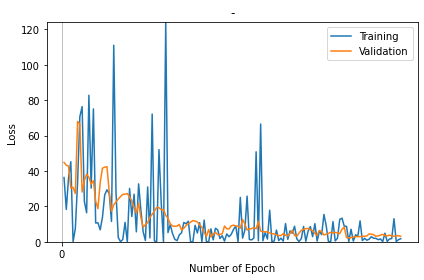

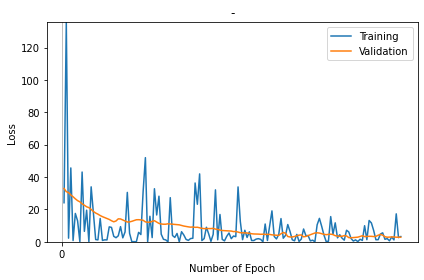

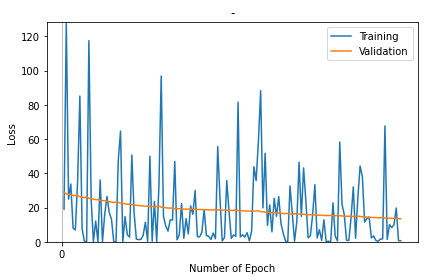

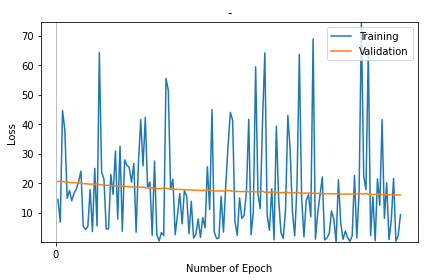

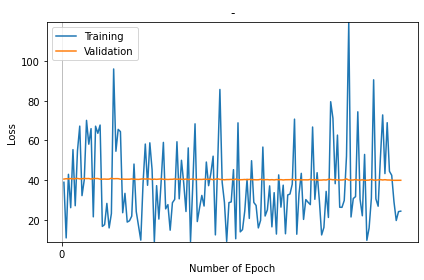

In [4]:
# >> 128-2-50, Epoch: 150, LR: 0.01, DR: 0

Train_Loss=[36.31801986694336, 18.287443161010742, 36.19318389892578, 45.26342010498047, 1.877539261840866e-06, 7.491223335266113, 33.668025970458984, 70.73558807373047, 76.3985595703125, 22.72702980041504, 16.389850616455078, 82.79704284667969, 30.318405151367188, 75.09162902832031, 10.613985061645508, 10.722745895385742, 6.762566566467285, 13.863578796386719, 26.510944366455078, 29.37535285949707, 27.269317626953125, 11.504537582397461, 111.04730224609375, 27.640758514404297, 2.457939624786377, 0.0, 1.3474256992340088, 10.972850799560547, 0.0, 30.149322509765625, 14.272588729858398, 26.86326789855957, 5.616277694702148, 32.71477127075195, 17.91705894470215, 5.692398548126221, 0.7406843900680542, 30.9921932220459, 2.181572914123535, 72.17855834960938, 0.42090973258018494, 0.0, 52.07722091674805, 22.136005401611328, 0.01110825501382351, 123.96416473388672, 5.187595844268799, 9.666902542114258, 4.696566581726074, 1.4016846418380737, 0.6490064263343811, 3.899984359741211, 5.081989288330078, 10.890972137451172, 10.21264362335205, 11.591202735900879, 5.960463766996327e-08, 2.9802320611338473e-08, 9.320777893066406, 4.956383228302002, 10.816458702087402, 0.0, 12.251749038696289, 0.0001516625052317977, 0.022326355800032616, 7.298649311065674, 1.076872706413269, 7.640432357788086, 6.761425971984863, 1.8339608907699585, 3.4495325088500977, 0.35835739970207214, 4.445133209228516, 2.8560972213745117, 4.202068328857422, 7.0425567626953125, 8.910239219665527, 0.03236079961061478, 25.08327293395996, 2.0365729331970215, 6.5754313468933105, 25.788402557373047, 1.3249706029891968, 1.0515692234039307, 2.096132755279541, 50.86668395996094, 0.5203794836997986, 66.54813385009766, 0.560021162033081, 5.186550617218018, 1.535436749458313, 17.847259521484375, 0.000499699090141803, 0.48930099606513977, 6.610052108764648, 0.6949964761734009, 2.068744659423828, 0.3491899371147156, 10.289443969726562, 1.3775490522384644, 6.1492204666137695, 4.834136962890625, 8.784308433532715, 1.6685786247253418, 0.13738857209682465, 1.8276501893997192, 8.676321029663086, 0.2843954563140869, 6.032905101776123, 8.620750427246094, 2.9073970317840576, 10.238042831420898, 0.3892184793949127, 6.049645900726318, 4.027618885040283, 15.462532043457031, 9.119887351989746, 0.12608833611011505, 0.09995025396347046, 11.424266815185547, 0.5023512244224548, 2.0414516925811768, 12.635465621948242, 13.362236022949219, 8.806060791015625, 8.712348937988281, 0.12869520485401154, 7.0804338455200195, 0.37286457419395447, 3.9616317749023438, 3.1572937965393066, 11.813194274902344, 0.6680120229721069, 1.9636136293411255, 0.8717820048332214, 1.4818559885025024, 2.875189781188965, 1.993981957435608, 1.941540002822876, 1.18944251537323, 1.6274763345718384, 0.09174875169992447, 4.852101802825928, 0.17642077803611755, 1.6003894805908203, 1.7920022010803223, 13.029618263244629, 0.1225748211145401, 1.172800064086914, 1.7510895729064941]
Test_Loss=[44.83634948730469, 43.28846740722656, 42.765689849853516, 30.429758071899414, 30.76436996459961, 27.276933670043945, 68.04141235351562, 66.41034698486328, 28.099803924560547, 34.6545295715332, 38.251380920410156, 36.422401428222656, 32.56840896606445, 34.5288200378418, 22.96494483947754, 18.719633102416992, 33.58933639526367, 41.58967208862305, 42.13798904418945, 42.437679290771484, 28.20413589477539, 17.249507904052734, 20.848915100097656, 22.598041534423828, 24.196964263916016, 25.605972290039062, 26.76970100402832, 26.914737701416016, 27.262393951416016, 25.318510055541992, 22.986177444458008, 19.302465438842773, 16.219446182250977, 21.753767013549805, 13.769362449645996, 8.29684066772461, 9.627641677856445, 10.84160041809082, 13.843080520629883, 15.50432300567627, 17.391468048095703, 19.409530639648438, 19.296226501464844, 18.208274841308594, 18.128101348876953, 14.962532043457031, 13.230301856994629, 10.167661666870117, 8.913738250732422, 8.739815711975098, 8.84846305847168, 9.779413223266602, 6.626856803894043, 7.641071319580078, 9.230425834655762, 10.171592712402344, 11.097137451171875, 11.997085571289062, 11.69725227355957, 11.203368186950684, 9.58495044708252, 8.287150382995605, 5.388264179229736, 3.0385868549346924, 6.888346195220947, 2.6870861053466797, 4.329082489013672, 5.287528038024902, 4.0240254402160645, 4.137812614440918, 4.529639720916748, 8.894817352294922, 7.34070348739624, 7.236392974853516, 9.012250900268555, 9.41222858428955, 8.946426391601562, 8.737472534179688, 7.635357856750488, 12.615315437316895, 10.099006652832031, 6.663296699523926, 7.259515285491943, 7.457219123840332, 8.003338813781738, 7.342830657958984, 11.454889297485352, 6.091796875, 5.601104259490967, 5.63674783706665, 5.662304401397705, 4.9553704261779785, 4.557624340057373, 4.489569664001465, 3.9209299087524414, 3.544008255004883, 3.5305793285369873, 4.608508110046387, 3.6816563606262207, 3.2651805877685547, 4.635636329650879, 6.5681376457214355, 3.5647034645080566, 3.1915435791015625, 4.979010581970215, 6.471933364868164, 6.9469218254089355, 7.426013469696045, 7.56066370010376, 6.940952777862549, 6.287023067474365, 4.672020435333252, 3.730865001678467, 6.424636363983154, 5.710046768188477, 3.8526694774627686, 4.260356903076172, 4.739538192749023, 5.342522621154785, 5.009694576263428, 5.296964645385742, 5.083614349365234, 4.5875067710876465, 7.078986167907715, 8.278820037841797, 2.388725757598877, 2.21325945854187, 2.3434696197509766, 2.7056872844696045, 2.9156291484832764, 2.9534120559692383, 2.9092535972595215, 2.99053692817688, 3.1461880207061768, 3.3078112602233887, 4.473928928375244, 4.300158500671387, 3.980513572692871, 3.1202166080474854, 3.357954502105713, 3.733443021774292, 4.183189392089844, 3.6449644565582275, 3.3036439418792725, 3.7662124633789062, 3.2225160598754883, 3.1318323612213135, 3.3243296146392822, 3.4479188919067383, 3.089726448059082]
# >> 128-2-50, Epoch: 150, LR: 0.001, DR: 0
lossGraph(Train_Loss, Test_Loss)

Train_Loss=[24.12457847595215, 135.51976013183594, 2.233959674835205, 45.626251220703125, 0.7761988639831543, 17.510936737060547, 12.933611869812012, 0.05477041378617287, 43.08823776245117, 6.438860893249512, 19.51906967163086, 0.004287305288016796, 33.943748474121094, 17.36928939819336, 1.383193850517273, 1.1696208715438843, 14.404178619384766, 0.8263833522796631, 1.1968258619308472, 1.1431556940078735, 9.2263822555542, 8.884316444396973, 3.3732151985168457, 2.5190517902374268, 3.6933608055114746, 9.36698055267334, 2.4248340129852295, 6.0645341873168945, 30.50660514831543, 5.26550817489624, 0.043579161167144775, 0.10376705974340439, 0.009246106259524822, 5.829217433929443, 4.472080230712891, 31.11219024658203, 51.98106002807617, 0.016255252063274384, 15.763278007507324, 2.598505735397339, 32.781341552734375, 16.559555053710938, 28.16781234741211, 4.696537494659424, 1.5230674743652344, 1.1677659749984741, 0.0009941471507772803, 27.26618003845215, 3.8917951583862305, 2.70066237449646, 5.137724876403809, 0.008707522414624691, 6.219139099121094, 4.186039924621582, 1.4679327011108398, 0.8698675632476807, 2.0027644634246826, 2.1779472827911377, 36.32583999633789, 23.173599243164062, 41.94482421875, 0.749874472618103, 1.9682977199554443, 8.970852851867676, 4.9010796546936035, 0.2573626935482025, 4.603018760681152, 32.09030532836914, 1.2319974899291992, 16.867748260498047, 1.4849368333816528, 0.5679215788841248, 3.399043321609497, 5.4394330978393555, 1.9247307777404785, 3.55515718460083, 3.157590389251709, 33.89290237426758, 12.58654499053955, 1.3109092712402344, 7.103871822357178, 2.665754795074463, 6.163165092468262, 0.7782030701637268, 0.7791699171066284, 1.6545121669769287, 1.9264113903045654, 1.5136171579360962, 0.008144891820847988, 10.98304557800293, 0.8053855895996094, 9.809873580932617, 19.084745407104492, 3.2762539386749268, 1.7641525268554688, 4.521921157836914, 14.34797477722168, 2.2034006118774414, 3.939072608947754, 10.657083511352539, 6.379726409912109, 1.2176790237426758, 0.6225323677062988, 4.559303283691406, 0.20107915997505188, 1.7178548574447632, 7.895330429077148, 3.8631553649902344, 3.793665647506714, 0.5351940989494324, 0.9994915723800659, 0.005402839742600918, 10.49681282043457, 14.468640327453613, 9.589288711547852, 4.198968887329102, 0.1479959934949875, 0.3445408344268799, 15.568643569946289, 4.683252811431885, 11.701886177062988, 2.4326348304748535, 4.3641157150268555, 2.2661406993865967, 0.9919288158416748, 7.125514984130859, 6.048746109008789, 2.060878276824951, 0.4638517200946808, 1.1691961288452148, 0.1417948454618454, 1.564833641052246, 0.8279174566268921, 9.930309295654297, 1.2943003177642822, 13.154644012451172, 11.647544860839844, 7.019930839538574, 1.264068603515625, 1.2934653759002686, 4.787940979003906, 5.530374050140381, 1.528165340423584, 1.9916982650756836, 0.5971401333808899, 2.9331154823303223, 1.1452754735946655, 17.260244369506836, 2.5634920597076416, 3.2342891693115234]
Test_Loss=[32.942726135253906, 30.95721435546875, 30.393056869506836, 28.922348022460938, 27.804813385009766, 26.538156509399414, 25.418582916259766, 24.698991775512695, 23.454120635986328, 22.585969924926758, 21.622333526611328, 21.11302375793457, 19.9887638092041, 18.72609519958496, 17.76616096496582, 17.06603240966797, 16.21002769470215, 15.520124435424805, 14.920401573181152, 14.378152847290039, 13.797273635864258, 12.996273040771484, 12.34915542602539, 12.855804443359375, 14.181410789489746, 14.102312088012695, 13.483834266662598, 12.933178901672363, 12.216684341430664, 12.278599739074707, 12.654722213745117, 13.118295669555664, 13.605512619018555, 13.64576244354248, 13.521641731262207, 13.279224395751953, 12.289724349975586, 12.075254440307617, 12.115893363952637, 12.646261215209961, 13.02259635925293, 12.155487060546875, 11.358574867248535, 10.993579864501953, 10.843404769897461, 10.852877616882324, 11.123880386352539, 10.985969543457031, 10.897927284240723, 10.771463394165039, 10.572092056274414, 10.464937210083008, 10.082587242126465, 9.724812507629395, 9.462998390197754, 9.22688102722168, 9.03195571899414, 9.135499954223633, 8.933686256408691, 8.982447624206543, 8.619505882263184, 8.302335739135742, 8.136505126953125, 8.131205558776855, 8.093666076660156, 8.171664237976074, 8.286958694458008, 7.8292622566223145, 7.657323837280273, 7.234811305999756, 6.956593036651611, 6.892210960388184, 6.78684139251709, 6.687026500701904, 6.627382278442383, 6.300806045532227, 6.383683681488037, 5.986985206604004, 5.607882022857666, 5.531310081481934, 5.508896827697754, 5.442532539367676, 5.1766357421875, 4.971594333648682, 4.826294898986816, 4.788275718688965, 4.743911266326904, 4.637913227081299, 4.685720920562744, 4.575982570648193, 4.5740838050842285, 4.5514092445373535, 4.278834342956543, 4.148337364196777, 3.998695135116577, 3.9306604862213135, 4.9555792808532715, 5.772257328033447, 5.273006916046143, 3.2545013427734375, 2.9692513942718506, 2.9924659729003906, 3.2838103771209717, 3.7180278301239014, 4.1215057373046875, 4.218323707580566, 3.058023452758789, 3.3143274784088135, 3.8296728134155273, 4.380304336547852, 4.882855415344238, 5.414374828338623, 5.549768924713135, 5.400173187255859, 4.9737114906311035, 4.591856479644775, 4.400508403778076, 4.540310859680176, 4.72084379196167, 4.453537940979004, 3.7656402587890625, 3.516876220703125, 3.413698673248291, 3.380194902420044, 3.819866418838501, 3.630053997039795, 2.565962791442871, 2.4736886024475098, 2.6042439937591553, 2.7529070377349854, 2.8538615703582764, 3.3164865970611572, 3.72655987739563, 3.197237968444824, 3.3057780265808105, 3.38126540184021, 3.364323139190674, 3.2403624057769775, 3.357102155685425, 4.059075355529785, 4.566046714782715, 4.086297035217285, 3.1306750774383545, 2.8165414333343506, 2.915966272354126, 2.976759910583496, 3.012800693511963, 2.8150458335876465, 2.8297500610351562, 2.802006483078003]
# >> 128-2-50, Epoch: 150, LR: 0.0001, DR: 0
lossGraph(Train_Loss, Test_Loss)

Train_Loss=[19.08976936340332, 128.08743286132812, 24.886730194091797, 33.69991683959961, 7.9806342124938965, 6.880692958831787, 34.95916748046875, 85.10049438476562, 7.5745158195495605, 0.35666677355766296, 1.123522270063404e-05, 117.44486236572266, 24.65067481994629, 0.00032396355527453125, 12.140475273132324, 2.9802320611338473e-08, 36.10193634033203, 0.01028857659548521, 15.945047378540039, 26.467994689941406, 17.157672882080078, 13.060522079467773, 0.0037477428559213877, 0.0019505503587424755, 47.73477554321289, 64.59495544433594, 0.021999625489115715, 14.678878784179688, 4.1561360359191895, 2.755068302154541, 50.6762580871582, 16.980548858642578, 1.5574415922164917, 1.2865827083587646, 1.41591477394104, 3.7028427124023438, 11.450164794921875, 0.20042124390602112, 50.00786209106445, 0.3469074070453644, 23.576875686645508, 0.012632548809051514, 33.180938720703125, 96.75492858886719, 14.908807754516602, 9.269584655761719, 6.231845378875732, 12.81796646118164, 12.694117546081543, 46.91704177856445, 1.1165804862976074, 4.186782360076904, 22.296117782592773, 2.0993549823760986, 13.498575210571289, 4.615957736968994, 20.98979949951172, 16.03277587890625, 29.95308494567871, 2.939577579498291, 2.8648509979248047, 5.576364517211914, 18.82697105407715, 3.5988669395446777, 3.233015775680542, 1.3506568670272827, 5.064110279083252, 1.7935441732406616, 55.57651138305664, 25.7025089263916, 0.43903812766075134, 2.494361400604248, 35.732261657714844, 17.881528854370117, 1.9528251886367798, 4.012752056121826, 3.221065044403076, 81.57160186767578, 2.8639779090881348, 4.121084690093994, 2.7254583835601807, 5.349161624908447, 0.4764367341995239, 6.202322959899902, 43.800926208496094, 35.714115142822266, 58.4928092956543, 88.22163391113281, 19.806167602539062, 51.68474197387695, 9.550359725952148, 21.519786834716797, 5.810245513916016, 25.42844009399414, 14.900525093078613, 26.351356506347656, 10.624752044677734, 4.973813056945801, 0.42348334193229675, 0.06510808318853378, 32.6313591003418, 16.094730377197266, 0.35700124502182007, 11.755240440368652, 46.42287063598633, 14.827259063720703, 43.1478157043457, 24.1207275390625, 2.3006975650787354, 3.562641143798828, 15.577723503112793, 33.38051986694336, 2.230170726776123, 7.066298007965088, 0.7748787999153137, 12.819369316101074, 0.03446758911013603, 0.3370213806629181, 0.04646550491452217, 22.725622177124023, 3.2197189331054688, 0.4815576374530792, 58.305171966552734, 21.968029022216797, 15.871143341064453, 0.9396635890007019, 0.6990518569946289, 13.97838020324707, 32.04613494873047, 2.0396971702575684, 25.439416885375977, 44.28033447265625, 38.1609001159668, 11.525456428527832, 13.506978034973145, 14.487491607666016, 2.2975246906280518, 3.400413990020752, 0.7731246948242188, 0.3435514569282532, 1.5860404968261719, 1.7112022638320923, 67.64006042480469, 1.370492696762085, 9.968323707580566, 8.282877922058105, 9.982182502746582, 19.74594497680664, 0.6515814065933228, 0.6486039161682129]
Test_Loss=[28.97793197631836, 28.015214920043945, 27.78134536743164, 27.337617874145508, 27.061363220214844, 26.98307991027832, 27.043214797973633, 26.294231414794922, 25.986478805541992, 25.749052047729492, 26.260835647583008, 25.44343376159668, 25.037551879882812, 24.8834228515625, 24.593902587890625, 24.62189483642578, 24.176055908203125, 24.071495056152344, 23.941022872924805, 23.68023681640625, 23.447181701660156, 23.169048309326172, 22.990144729614258, 23.121768951416016, 23.04640769958496, 22.44112205505371, 22.344501495361328, 22.102079391479492, 21.924833297729492, 22.057003021240234, 21.67718505859375, 21.41722869873047, 21.259445190429688, 21.120071411132812, 21.01496696472168, 20.94363784790039, 20.770967483520508, 20.98309326171875, 20.56907844543457, 20.619375228881836, 20.37734031677246, 20.494945526123047, 20.794885635375977, 20.16868782043457, 19.99791717529297, 19.855785369873047, 19.77240562438965, 19.647066116333008, 19.748197555541992, 19.35376739501953, 19.280054092407227, 19.31785011291504, 19.127944946289062, 19.14434051513672, 19.050994873046875, 19.11968421936035, 19.048147201538086, 19.092578887939453, 18.881202697753906, 18.835023880004883, 18.8208065032959, 18.867206573486328, 18.7283992767334, 18.675813674926758, 18.61756134033203, 18.59355354309082, 18.546016693115234, 18.851900100708008, 18.637470245361328, 18.444623947143555, 18.41739273071289, 18.585784912109375, 18.436662673950195, 18.340774536132812, 18.349760055541992, 18.322948455810547, 18.751708984375, 18.21660041809082, 18.180099487304688, 18.100893020629883, 18.03226089477539, 17.92493438720703, 17.880271911621094, 18.035717010498047, 17.902286529541016, 17.953216552734375, 18.04079818725586, 17.520662307739258, 17.61521339416504, 17.25019645690918, 17.234682083129883, 17.046512603759766, 17.078283309936523, 16.919334411621094, 16.897899627685547, 16.7077579498291, 16.584848403930664, 16.47945785522461, 16.41009521484375, 16.553491592407227, 16.39124298095703, 16.236576080322266, 16.255821228027344, 16.41779899597168, 16.160295486450195, 16.27080726623535, 16.080142974853516, 15.870888710021973, 15.810955047607422, 15.822674751281738, 15.86885929107666, 15.604230880737305, 15.568294525146484, 15.470508575439453, 15.495031356811523, 15.371102333068848, 15.333769798278809, 15.299741744995117, 15.412073135375977, 15.244850158691406, 15.178125381469727, 15.492508888244629, 15.201467514038086, 15.089791297912598, 14.930317878723145, 14.873344421386719, 14.909717559814453, 14.981648445129395, 14.748884201049805, 14.860654830932617, 14.940008163452148, 14.832837104797363, 14.581570625305176, 14.51194953918457, 14.436251640319824, 14.283963203430176, 14.22116470336914, 14.126542091369629, 14.05496883392334, 14.005166053771973, 13.962139129638672, 14.326065063476562, 13.841097831726074, 13.826513290405273, 13.752901077270508, 13.708915710449219, 13.703947067260742, 13.518973350524902, 13.461280822753906, 13.489500045776367]
# >> 128-2-50, Epoch: 150, LR: 1e-05, DR: 0
lossGraph(Train_Loss, Test_Loss)

Train_Loss=[14.429279327392578, 6.749785900115967, 44.593109130859375, 37.82506561279297, 14.77939224243164, 17.46004295349121, 14.014802932739258, 16.52057456970215, 17.97954559326172, 20.465496063232422, 24.04486846923828, 5.302919864654541, 4.239538192749023, 5.241961479187012, 17.809429168701172, 3.521650552749634, 24.969518661499023, 5.45517110824585, 64.21041107177734, 23.687829971313477, 21.31414794921875, 4.446460723876953, 4.408416748046875, 22.884904861450195, 16.129253387451172, 30.896121978759766, 7.743241310119629, 32.45650863647461, 3.6565375328063965, 27.838096618652344, 25.99982452392578, 25.275644302368164, 20.266521453857422, 26.624221801757812, 3.292612314224243, 26.53683853149414, 41.50215530395508, 25.809911727905273, 42.25091552734375, 18.402658462524414, 20.357908248901367, 2.2443668842315674, 27.441064834594727, 2.4664132595062256, 0.35933083295822144, 3.1937742233276367, 2.1924126148223877, 55.46822738647461, 51.37049102783203, 17.854557037353516, 21.28870391845703, 2.4645700454711914, 9.090781211853027, 16.43817901611328, 6.154710292816162, 17.425437927246094, 15.562926292419434, 2.8389437198638916, 13.805425643920898, 1.3273555040359497, 2.6140477657318115, 7.779192924499512, 1.543989896774292, 8.279912948608398, 4.775625228881836, 25.51964569091797, 11.029520988464355, 44.900718688964844, 3.3243255615234375, 1.1523703336715698, 1.3847090005874634, 15.454747200012207, 3.388631820678711, 19.3877010345459, 32.607666015625, 43.93528366088867, 41.23823547363281, 6.942253112792969, 2.25277042388916, 14.975125312805176, 7.9880805015563965, 9.019281387329102, 17.25238609313965, 41.59089279174805, 2.4559671878814697, 10.26134967803955, 59.40400314331055, 16.25650405883789, 11.307774543762207, 41.16526794433594, 64.11348724365234, 9.128230094909668, 3.9462122917175293, 18.01540756225586, 0.751389741897583, 39.28573226928711, 14.796716690063477, 3.2173819541931152, 1.2300201654434204, 10.860298156738281, 42.893165588378906, 31.345417022705078, 10.269286155700684, 2.0623059272766113, 19.379865646362305, 63.61395263671875, 15.18482494354248, 1.7452865839004517, 14.064146041870117, 16.069318771362305, 8.50356388092041, 68.86896514892578, 0.9644590020179749, 9.709258079528809, 15.989709854125977, 22.048614501953125, 0.7046740055084229, 1.3610789775848389, 2.797971725463867, 10.522512435913086, 7.735391139984131, 0.08024892956018448, 21.114063262939453, 6.651956558227539, 0.9119130969047546, 3.671971321105957, 1.561541199684143, 0.22148384153842926, 2.0894594192504883, 22.510976791381836, 1.3847745656967163, 16.844308853149414, 74.43309020996094, 22.341915130615234, 17.766637802124023, 65.05293273925781, 2.1420106887817383, 15.31971549987793, 0.4349546730518341, 21.37082290649414, 12.460390090942383, 41.47565841674805, 8.014761924743652, 20.056148529052734, 0.8175296783447266, 7.312675952911377, 21.56171989440918, 0.3168763220310211, 2.154562473297119, 9.267840385437012]
Test_Loss=[20.483905792236328, 20.65190887451172, 20.546791076660156, 20.34308624267578, 20.29632568359375, 20.2116641998291, 20.163837432861328, 20.109333038330078, 20.06045913696289, 20.018291473388672, 19.83991241455078, 19.77117156982422, 19.71625518798828, 19.733341217041016, 19.586400985717773, 19.660175323486328, 19.482345581054688, 19.78569221496582, 19.478525161743164, 19.40683937072754, 19.247241973876953, 19.190994262695312, 19.249523162841797, 19.15217399597168, 19.185606002807617, 18.98708724975586, 19.083955764770508, 18.8525333404541, 18.947364807128906, 18.884445190429688, 18.82950782775879, 18.749723434448242, 18.739213943481445, 18.547353744506836, 18.64276695251465, 18.688283920288086, 18.546234130859375, 18.603830337524414, 18.414337158203125, 18.384042739868164, 18.231576919555664, 18.34516143798828, 18.15102767944336, 18.099143981933594, 18.080337524414062, 18.03844451904297, 18.330148696899414, 18.268692016601562, 18.02557945251465, 18.00937843322754, 17.85616683959961, 17.860261917114258, 17.86919403076172, 17.770736694335938, 17.806564331054688, 17.7641658782959, 17.655244827270508, 17.692546844482422, 17.586761474609375, 17.564680099487305, 17.568689346313477, 17.503520965576172, 17.518009185791016, 17.46986961364746, 17.571901321411133, 17.456253051757812, 17.63850212097168, 17.355562210083008, 17.315744400024414, 17.29209327697754, 17.354700088500977, 17.2558536529541, 17.330368041992188, 17.387624740600586, 17.433055877685547, 17.391117095947266, 17.155805587768555, 17.103683471679688, 17.159162521362305, 17.092844009399414, 17.076705932617188, 17.105709075927734, 17.23410987854004, 16.972496032714844, 17.00007438659668, 17.281993865966797, 16.995655059814453, 16.94434928894043, 17.10841941833496, 17.230518341064453, 16.87250518798828, 16.820688247680664, 16.887649536132812, 16.761262893676758, 16.979412078857422, 16.80889892578125, 16.718116760253906, 16.6875, 16.728408813476562, 16.907434463500977, 16.819110870361328, 16.671167373657227, 16.60287857055664, 16.69230842590332, 16.946664810180664, 16.630569458007812, 16.529878616333008, 16.588199615478516, 16.58308982849121, 16.519241333007812, 16.87363052368164, 16.43777084350586, 16.474414825439453, 16.496212005615234, 16.5168514251709, 16.368370056152344, 16.35585594177246, 16.34906768798828, 16.38184356689453, 16.35025405883789, 16.288663864135742, 16.404705047607422, 16.301597595214844, 16.252634048461914, 16.257001876831055, 16.231475830078125, 16.211395263671875, 16.211820602416992, 16.32648277282715, 16.18511390686035, 16.269277572631836, 16.611669540405273, 16.276578903198242, 16.23314094543457, 16.508127212524414, 16.104917526245117, 16.170284271240234, 16.063064575195312, 16.17739486694336, 16.10838508605957, 16.272279739379883, 16.051774978637695, 16.11137580871582, 15.977680206298828, 16.0032958984375, 16.076637268066406, 15.931982040405273, 15.930342674255371, 15.961324691772461, 15.901554107666016]
# >> 128-2-50, Epoch: 150, LR: 1e-06, DR: 0
lossGraph(Train_Loss, Test_Loss)

Train_Loss=[38.942012786865234, 10.925317764282227, 42.95805740356445, 26.148025512695312, 55.398887634277344, 27.135271072387695, 54.87071990966797, 67.24687194824219, 32.22161102294922, 40.19106674194336, 70.13603973388672, 58.13224792480469, 65.97457885742188, 21.54100227355957, 67.20399475097656, 63.62840270996094, 67.7713851928711, 16.731033325195312, 17.623289108276367, 28.31415367126465, 15.95797348022461, 23.195465087890625, 96.02996063232422, 54.5772705078125, 65.58734130859375, 64.47284698486328, 23.613971710205078, 33.37122344970703, 18.896757125854492, 19.569835662841797, 21.897436141967773, 48.133583068847656, 24.16606330871582, 16.99004554748535, 9.812943458557129, 38.31602478027344, 58.20817565917969, 37.430564880371094, 58.828800201416016, 45.305084228515625, 8.981807708740234, 37.25692367553711, 20.41261863708496, 39.13042449951172, 59.038536071777344, 25.562862396240234, 27.6929874420166, 14.822973251342773, 28.656103134155273, 30.320676803588867, 59.3663330078125, 30.613237380981445, 50.02610778808594, 38.47288513183594, 24.233518600463867, 56.26715850830078, 9.107930183410645, 37.474517822265625, 68.3934555053711, 19.17304039001465, 26.055355072021484, 32.332489013671875, 26.984861373901367, 49.14705276489258, 37.24650955200195, 43.489376068115234, 52.0953369140625, 12.457143783569336, 48.13447570800781, 85.69500732421875, 38.952510833740234, 28.871944427490234, 9.194682121276855, 28.71599578857422, 29.060543060302734, 45.31177520751953, 10.495233535766602, 68.89046478271484, 13.97514533996582, 15.122577667236328, 24.527484893798828, 40.48150634765625, 20.75258445739746, 49.81364822387695, 28.801971435546875, 27.29328155517578, 15.965227127075195, 19.79717254638672, 56.694583892822266, 21.963932037353516, 25.092266082763672, 37.14044189453125, 16.501501083374023, 33.72175979614258, 12.86764907836914, 42.67131042480469, 26.430335998535156, 37.49528503417969, 13.01468563079834, 32.556583404541016, 33.03403854370117, 37.99591827392578, 70.7572021484375, 12.785140037536621, 33.239253997802734, 43.45586395263672, 20.250246047973633, 30.239871978759766, 28.89158821105957, 27.69563865661621, 66.78528594970703, 30.37438201904297, 43.780296325683594, 29.666988372802734, 12.433952331542969, 16.19194984436035, 34.36848831176758, 21.226167678833008, 79.53791046142578, 71.20941162109375, 38.228973388671875, 62.714622497558594, 26.37728500366211, 26.336002349853516, 29.785072326660156, 52.147438049316406, 119.46784973144531, 21.47405433654785, 30.758243560791016, 31.737476348876953, 74.45085906982422, 30.377450942993164, 22.07914924621582, 52.97386169433594, 9.719156265258789, 15.935368537902832, 30.912355422973633, 90.56448364257812, 30.594867706298828, 26.89088249206543, 51.26997375488281, 72.87788391113281, 43.33045959472656, 68.97063446044922, 44.495635986328125, 42.45653533935547, 29.117313385009766, 19.69930076599121, 24.1732234954834, 24.411388397216797]
Test_Loss=[40.561466217041016, 40.75379180908203, 40.645572662353516, 40.82046890258789, 40.64179992675781, 40.807342529296875, 40.8784065246582, 40.65799331665039, 40.70188903808594, 40.88083267211914, 40.80193328857422, 40.84500503540039, 40.56672668457031, 40.8423957824707, 40.815452575683594, 40.8359260559082, 40.51713180541992, 40.51772689819336, 40.57865524291992, 40.498077392578125, 40.53805923461914, 40.98128128051758, 40.721923828125, 40.78508377075195, 40.77345657348633, 40.51743698120117, 40.572750091552734, 40.479095458984375, 40.47866439819336, 40.48855209350586, 40.64544677734375, 40.493568420410156, 40.44486618041992, 40.39628601074219, 40.567298889160156, 40.685089111328125, 40.55277633666992, 40.67951965332031, 40.59150695800781, 40.363182067871094, 40.53227233886719, 40.42400360107422, 40.534523010253906, 40.65225601196289, 40.44171142578125, 40.450016021728516, 40.36604690551758, 40.4465217590332, 40.45213317871094, 40.62596130371094, 40.444236755371094, 40.55852127075195, 40.4825325012207, 40.39014434814453, 40.5824089050293, 40.28786849975586, 40.4578857421875, 40.64351272583008, 40.336334228515625, 40.37412643432617, 40.40812301635742, 40.370635986328125, 40.502357482910156, 40.42454528808594, 40.45805358886719, 40.50593566894531, 40.257240295410156, 40.4718132019043, 40.69786071777344, 40.4053840637207, 40.33824920654297, 40.21209716796875, 40.3272819519043, 40.32450866699219, 40.419471740722656, 40.20063400268555, 40.55506134033203, 40.21290969848633, 40.21562957763672, 40.269222259521484, 40.36302185058594, 40.23746871948242, 40.412017822265625, 40.27861404418945, 40.26494598388672, 40.19102096557617, 40.210384368896484, 40.43303298950195, 40.21529006958008, 40.23028564453125, 40.3001823425293, 40.16902160644531, 40.27069854736328, 40.1382942199707, 40.31744384765625, 40.213279724121094, 40.27717971801758, 40.12226867675781, 40.23817825317383, 40.23667526245117, 40.26270294189453, 40.45954895019531, 40.09856414794922, 40.21989059448242, 40.27827835083008, 40.13124465942383, 40.188350677490234, 40.175682067871094, 40.1638069152832, 40.39970779418945, 40.171470642089844, 40.24931716918945, 40.157958984375, 40.04757308959961, 40.066429138183594, 40.17400360107422, 40.088775634765625, 40.443092346191406, 40.38727569580078, 40.17986297607422, 40.325775146484375, 40.097572326660156, 40.092628479003906, 40.10912322998047, 40.24208068847656, 40.651275634765625, 40.04409408569336, 40.096641540527344, 40.0980339050293, 40.355865478515625, 40.080074310302734, 40.02410125732422, 40.20909881591797, 39.93827438354492, 39.971832275390625, 40.05936050415039, 40.421504974365234, 40.048133850097656, 40.0207405090332, 40.16590881347656, 40.294254302978516, 40.10770034790039, 40.260250091552734, 40.10459518432617, 40.08656692504883, 39.99911880493164, 39.93574523925781, 39.95808410644531, 39.954410552978516, 39.959197998046875]
lossGraph(Train_Loss, Test_Loss)
